In [142]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset.csv')
df.head()

imdbID             Title  \
0  tt0113497           Jumanji   
1  tt0113277              Heat   
2  tt0114576      Sudden Death   
3  tt0113189         GoldenEye   
4  tt0112760  Cutthroat Island   

                                                Plot  Genre1      Genre2  \
0  After being trapped in a jungle board game for...  Action   Adventure   
1  Hunters and their prey--Neil and his professio...  Action       Crime   
2  A former fireman takes on a group of terrorist...  Action       Crime   
3  When a deadly satellite weapon system falls in...  Action   Adventure   
4  Morgan Adams and her slave, William Shaw, are ...  Action   Adventure   

      Genre3  
0     Family  
1      Drama  
2   Thriller  
3   Thriller  
4     Comedy

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 6 columns):
imdbID    4384 non-null object
Title     4384 non-null object
Plot      4384 non-null object
Genre1    4384 non-null object
Genre2    3868 non-null object
Genre3    2650 non-null object
dtypes: object(6)
memory usage: 205.6+ KB


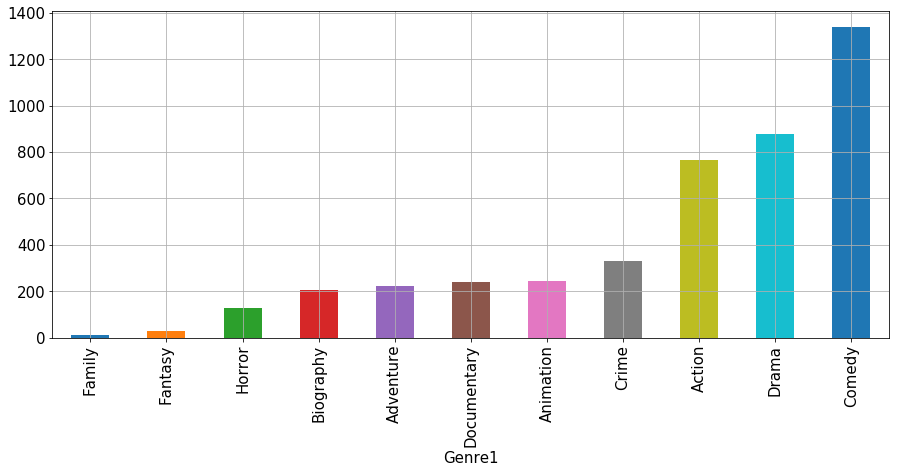

In [151]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,6))
df.groupby('Genre1').Genre1.count().sort_values().plot.bar(ylim=0, grid=True)
plt.show()

In [148]:
df.groupby('Genre1').Genre1.count()

Genre1
Action          765
Adventure       223
Animation       245
Biography       204
Comedy         1339
Crime           328
Documentary     238
Drama           876
Family           11
Fantasy          28
Horror          127
Name: Genre1, dtype: int64

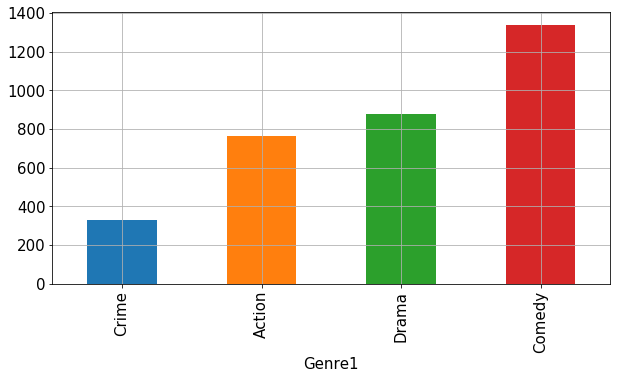

In [150]:
fig = plt.figure(figsize=(8,6))
df_.groupby('Genre1').Genre1.count().sort_values().plot.bar(ylim=0, grid=True, figsize=(10, 5))
plt.show()

In [5]:
df_ = df[df.groupby('Genre1').Genre1.transform(len) > 250]
df_.head()

imdbID             Title  \
0  tt0113497           Jumanji   
1  tt0113277              Heat   
2  tt0114576      Sudden Death   
3  tt0113189         GoldenEye   
4  tt0112760  Cutthroat Island   

                                                Plot  Genre1      Genre2  \
0  After being trapped in a jungle board game for...  Action   Adventure   
1  Hunters and their prey--Neil and his professio...  Action       Crime   
2  A former fireman takes on a group of terrorist...  Action       Crime   
3  When a deadly satellite weapon system falls in...  Action   Adventure   
4  Morgan Adams and her slave, William Shaw, are ...  Action   Adventure   

      Genre3  
0     Family  
1      Drama  
2   Thriller  
3   Thriller  
4     Comedy

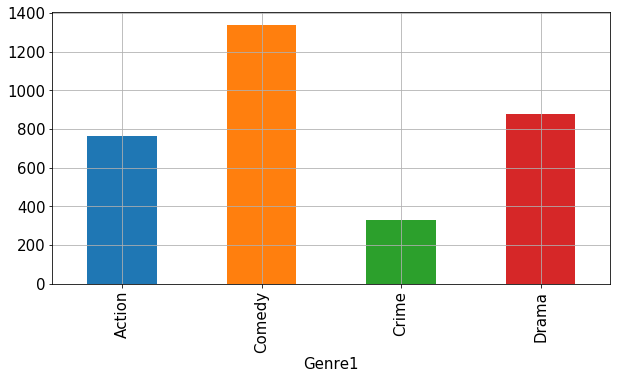

In [137]:
fig = plt.figure(figsize=(8,6))
df_.groupby('Genre1').Genre1.count().plot.bar(ylim=0, grid=True, figsize=(10, 5))
plt.show()

In [7]:
from pprint import pprint

charset = dict()
for item in df['Plot']:
    for char in set(item):
        if char not in charset.keys():
            charset[char] = 0
        charset[char] += 1

print(len(charset), 'characters found.\n')

pprint(charset)

113 characters found.

{' ': 4384,
 '!': 126,
 '"': 665,
 '#': 6,
 '$': 49,
 '%': 6,
 '&': 36,
 "'": 2564,
 '(': 585,
 ')': 583,
 '*': 9,
 '+': 3,
 ',': 3865,
 '-': 2116,
 '.': 4374,
 '/': 110,
 '0': 533,
 '1': 795,
 '2': 371,
 '3': 231,
 '4': 236,
 '5': 288,
 '6': 239,
 '7': 226,
 '8': 225,
 '9': 538,
 ':': 436,
 ';': 317,
 '?': 421,
 'A': 2810,
 'B': 1921,
 'C': 1782,
 'D': 1347,
 'E': 1021,
 'F': 1138,
 'G': 952,
 'H': 1773,
 'I': 1483,
 'J': 1212,
 'K': 665,
 'L': 1178,
 'M': 1747,
 'N': 1136,
 'O': 846,
 'P': 1144,
 'Q': 90,
 'R': 1127,
 'S': 2091,
 'T': 2530,
 'U': 491,
 'V': 541,
 'W': 1717,
 'X': 46,
 'Y': 464,
 'Z': 110,
 '[': 3,
 ']': 3,
 '^': 1,
 '_': 4,
 'a': 4381,
 'b': 4108,
 'c': 4328,
 'd': 4358,
 'e': 4384,
 'f': 4312,
 'g': 4275,
 'h': 4374,
 'i': 4384,
 'j': 1388,
 'k': 3684,
 'l': 4364,
 'm': 4318,
 'n': 4383,
 'o': 4384,
 'p': 4188,
 'q': 858,
 'r': 4383,
 's': 4384,
 't': 4384,
 'u': 4324,
 'v': 3981,
 'w': 4187,
 'x': 1827,
 'y': 4226,
 'z': 1156,
 '£': 1,
 '¹': 

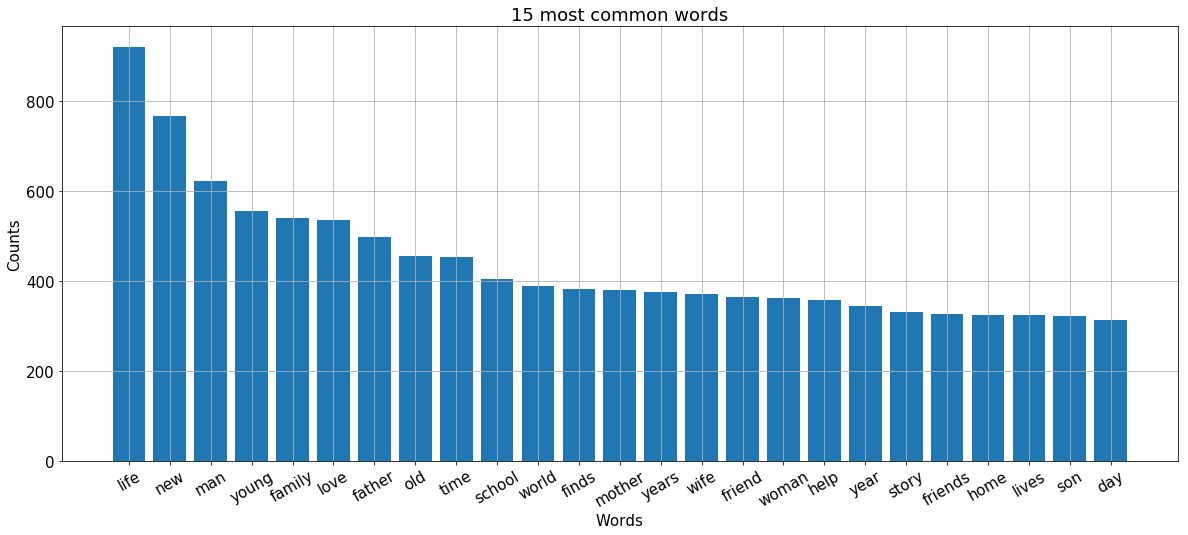

In [133]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(df_['Plot'])

words = count_vectorizer.get_feature_names()
total_counts = np.zeros(len(words))

for t in count_data:
    total_counts+=t.toarray()[0]

count_dict = (zip(words, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:25]

words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]

x_pos = np.arange(len(words))

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(20,8))

plt.grid()
plt.bar(x_pos, counts, align='center')
plt.xticks(x_pos, words, rotation=30) 
plt.xlabel('Words')
plt.ylabel('Counts')

plt.title('15 most common words')
plt.show()

In [9]:
import re
import unicodedata
import inflect

from nltk.corpus import stopwords

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = nltk.LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = nltk.WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [10]:
def preprocess_plot(plot, non_ascii, lowerc, punc, nums, stops):
    words = plot.split(' ')
    
    if non_ascii:
        words = remove_non_ascii(words)
    if lowerc:
        words = to_lowercase(words)
    if punc:
        words = remove_punctuation(words)
    if nums:
        words = replace_numbers(words)
    else:
        words = [word for word in words if not word.isdigit()]
    if stops:
        words = remove_stopwords(words)
    
    return ''.join(str(w)+' ' for w in words)

def preprocess_plots(data, non_ascii=True, lowerc=True, punc=True, nums=True, stops=False):
    num_plots = data['Plot'].size
    print(num_plots)
    clean_plots = []
    tags = []
    
    for index, row in data.iterrows():
        preprocessed_plot = preprocess_plot(row['Plot'], non_ascii, lowerc, punc, nums, stops)
        clean_plots.append(preprocessed_plot)
        tags.append(row['Genre1'])

    new_data = {'ID' : data['imdbID'], 'plot': clean_plots, 'tags': tags}
    return pd.DataFrame(new_data)

In [134]:
plots_ = preprocess_plots(df_.reset_index(drop=True))

rnd = np.random.rand(len(plots_)) < 0.8

train_data = plots_[rnd]
test_data = plots_[~rnd]

display(train_data)

3308


ID                                               plot    tags
0     tt0113497  after being trapped in a jungle board game for...  Action
2     tt0114576  a former fireman takes on a group of terrorist...  Action
3     tt0113189  when a deadly satellite weapon system falls in...  Action
4     tt0112760  morgan adams and her slave william shaw are on...  Action
6     tt0112401  professional hitman robert rath wants to fulfi...  Action
7     tt0112819  a vietnam vet adjusts to life after the war wh...  Action
9     tt0116839  jobe is resuscitated by jonathan walker he wan...  Action
10    tt0116367  after a bank heist in abilene with several cas...  Action
11    tt0113010  max kirkpatrick is a cop who protects kate mcq...  Action
13    tt0115759  broken arrow is the term used to describe a nu...  Action
14    tt0111173  lone group of teens led by recently released j...  Action
15    tt0117110  the muppets are back into action in another mo...  Action
16    tt0113326  keong comes from hong kong to visit new york f...  Action
17    tt0112442  marcus burnett is a henpecked family man mike ...  Action
18    tt0112462  the dark knight of gotham city confronts a das...  Action
19    tt0112495  laura is trying to pick up the pieces of her l...  Action
20    tt0112715  a megalomaniac ceo sends his son into the dang...  Action
21    tt0112740  when some russian rebels takes control of some...  Action
22    tt0112851  a gunslinger is embroiled in a war with a loca...  Action
23    tt0112864  john mcclane is now almost a fullblown alcohol...  Action
24    tt0112887  jordan white and amy blue two troubled teens p...  Action
25    tt0113071  lancelot lives by the sword in fact theyre nex...  Action
26    tt0113481  in two thousand and twenty-one the whole world...  Action
27    tt0113492  in the year two thousand, one hundred and thir...  Action
28    tt0113820  six teenagers tommy kimberly adam billy rocky ...  Action
29    tt0113957  angela bennetts a software engineer type who w...  Action
30    tt0114194  some people lose their faith because heaven sh...  Action
32    tt0114558  set in the year one thousand, nine hundred and...  Action
33    tt0114781  seal team commander casey ryback has retired f...  Action
35    tt0109676  a team of skydiving crooks led by deaagentturn...  Action
...         ...                                                ...     ...
3274  tt0804529  set in a nearfuture militarized world marked b...   Drama
3275  tt0380510  a 14yearold girl in suburban 1970s pennsylvani...   Drama
3276  tt0806203  four friends fleeing a viral pandemic soon lea...   Drama
3277  tt0780653  lawrence talbots childhood ended the night his...   Drama
3278  tt0844330  royal navy captain wentworth was haughtily tur...   Drama
3280  tt0368226  in san francisco we follow johnny a man who ha...   Drama
3281  tt0914863  a convert to islam sends the us government a t...   Drama
3283  tt0485947  in the year two thousand and ninety-two one hu...   Drama
3285  tt0816556  sixteenyearold alice palmer drowns while swimm...   Drama
3286  tt0947798  nina portman is a ballerina in a new york city...   Drama
3287  tt0478304  the story of a family in waco texas in one tho...   Drama
3288  tt0100791  harry mention an enigmatic drifter from the so...   Drama
3289  tt0844794  a young womans penchant for sensational gothic...   Drama
3290  tt0466893  margaret centers on a 17yearold new york city ...   Drama
3291  tt0960770  young beautiful and intelligent trevor screenw...   Drama
3292  tt0165623  a man is released from prison after serving te...   Drama
3293  tt0816442  in one thousand, nine hundred and thirty-eight...   Drama
3294  tt0845439  on the day before their holiday trip to dubai ...   Drama
3295  tt0105744  a young man living in a cold southern village ...   Drama
3296  tt0435651  after the ruin a colorless equalitarian societ...   Drama
3297  tt0470752  caleb a twenty-six year old programmer at the ...   Drama
3298  tt0847833  reuniting the actors 

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def make_vectors(vectorizer, ft, train_data, test_data):
    train_data_ = vectorizer.fit_transform(train_data['plot'], train_data['tags'])
    test_data_ = vectorizer.transform(test_data['plot'])
    
    return train_data_.toarray(), test_data_.toarray(), train_data['tags'], test_data['tags']

def train_and_predict(clf, clf_name, X_train, y_train, X_test, y_test):
    print(clf_name)
    
    print('Training...')
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    training_time = end - start
    print('\tFinished in {} seconds.'.format(training_time))

    print('Predicting...')
    start = time.time()
    predicted_labels = clf.predict(X_test)
    end = time.time()
    predicting_time = end - start
    print('\tFinished in {}.\n'.format(predicting_time))

    acc_score = accuracy_score(y_test, predicted_labels)
    conf_mat = confusion_matrix(y_test, predicted_labels)
    report = classification_report(y_test, predicted_labels)
    
    return [acc_score, conf_mat, report, training_time, predicting_time]

patterns = [ # non_ascii, lowerc, punc, nums, stops
    [True, True, True, True, True],
    [False, True, True, True, True],
    [True, False, True, True, True],
    [True, True, False, True, True],
    [True, True, True, False, True],
    [True, True, True, True, False],
    [False, True, True, True, False],
    [True, False, True, True, False],
    [True, True, False, True, False],
    [True, True, True, False, False],
]


vectorizers = [CountVectorizer(), TfidfVectorizer(sublinear_tf=True, norm='l2', encoding='latin-1', ngram_range=(1, 2))]

In [153]:
import time

from sklearn.utils import shuffle

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

d = {}

for i in [0, 1]:
    for pi, pattern in enumerate(patterns):
        print('='*80)
        print('non_ascii, lowerc, punc, nums, stops')
        print(pattern)
        print('='*80)
        
        plots_ = preprocess_plots(df_.reset_index(drop=True), pattern[0], pattern[1], pattern[2], pattern[3], pattern[4])
        plots_ = shuffle(plots_)

        train_data, test_data = train_test_split(plots_, test_size=0.1)

        
        for ft in [1000, 2500, 5000]:
            if i == 0:
                vectorizer = CountVectorizer(analyzer='word', max_features=ft)
            else:
                vectorizer = TfidfVectorizer(sublinear_tf=True, norm='l2', encoding='latin-1', 
                                             ngram_range=(1, 2), max_features=ft)
            
            X_train, X_test, y_train, y_test = make_vectors(vectorizer, ft, train_data, test_data)
            
            # Logistic Regression
            for c in [0.25, 0.50, 0.75, 1.00, 1.50]:                
                clf_name = 'Logistic Regression'
                clf = LogisticRegression(C=c, max_iter=1000, n_jobs=-1, verbose=True)

                lst = train_and_predict(clf, clf_name, X_train, y_train, X_test, y_test)
                
                if i == 0:
                    key = clf_name +'_cnt_vec_ft'+ str(ft) +'_pattern'+ str(pi) +'_c'+ str(c)
                else:
                    key = clf_name +'_tfidf_vec_'+ str(ft) +'_pattern'+ str(pi) +'_c'+ str(c)
                
                print('='*80)
                print(key)
                print('='*80)
                for l in lst:
                    print(l)
                print('='*80)
                
                d.update({key : lst})

            # Naive Bayes
            for alpha in [0.25, 0.50, 0.75, 1.00, 1.50]:
                clf_name = 'Naive Bayes'
                clf = BernoulliNB(alpha=alpha)

                lst = train_and_predict(clf, clf_name, X_train, y_train, X_test, y_test)
                
                if i == 0:
                    key = clf_name +'_cnt_vec_ft'+ str(ft) +'_pattern'+ str(pi) +'_alpha'+ str(alpha)
                else:
                    key = clf_name +'_tfidf_vec_'+ str(ft) +'_pattern'+ str(pi) +'_alpha'+ str(alpha)
                
                print('='*80)
                print(key)
                print('='*80)
                for l in lst:
                    print(l)
                print('='*80)
                
                d.update({key : lst})

            # Neural Network
            for max_iter in [1000, 1500]:
                clf_name = 'Neural Network'
                clf = MLPClassifier(max_iter=max_iter, verbose=True)

                lst = train_and_predict(clf, clf_name, X_train, y_train, X_test, y_test)
                
                if i == 0:
                    key = clf_name +'_cnt_vec_ft'+ str(ft) +'_pattern'+ str(pi) +'_iter'+ str(max_iter)
                else:
                    key = clf_name +'_tfidf_vec_'+ str(ft) +'_pattern'+ str(pi) +'_iter'+ str(max_iter)
                
                print('='*80)
                print(key)
                print('='*80)
                for l in lst:
                    print(l)
                print('='*80)
                
                d.update({key : lst})

            # Random Forests
            for est in [100]:
                clf_name = 'Random Forests'
                clf = RandomForestClassifier(n_estimators=est, n_jobs=-1, verbose=True, bootstrap=True)

                lst = train_and_predict(clf, clf_name, X_train, y_train, X_test, y_test)
                
                if i == 0:
                    key = clf_name +'_cnt_vec_ft'+ str(ft) +'_pattern'+ str(pi) +'_est'+ str(est)
                else:
                    key = clf_name +'_tfidf_vec_'+ str(ft) +'_pattern'+ str(pi) +'_est'+ str(est)
                
                print('='*80)
                print(key)
                print('='*80)
                for l in lst:
                    print(l)
                print('='*80)
                
                d.update({key : lst})

non_ascii, lowerc, punc, nums, stops
[True, True, True, True, True]
3308
Logistic Regression
Training...
[LibLinear]	Finished in 0.09371399879455566 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern0_c0.25
0.552870090634441
[[47 11  1 10]
 [12 92  3 41]
 [10 12  6  6]
 [ 6 35  1 38]]
             precision    recall  f1-score   support

     Action       0.63      0.68      0.65        69
     Comedy       0.61      0.62      0.62       148
      Crime       0.55      0.18      0.27        34
      Drama       0.40      0.47      0.43        80

avg / total       0.56      0.55      0.54       331

0.09371399879455566
0.0
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.11643767356872559 seconds.
Predicting...
	Finished in 0.0019958019256591797.

Logistic Regression_cnt_vec_ft1000_pattern0_c0.5
0.5377643504531722
[[47 10  1 11]
 [14 86  7 41]
 [10 12  6  6]
 [ 9 29  3 39]]
             precision    recall  f1-score   support

     Action       0.59      0.68      0.63        69
     Comedy       0.63      0.58      0.60       148
      Crime       0.35      0.18      0.24        34
      Drama       0.40      0.49      0.44        80

avg / total       0.54      0.54      0.53       331

0.11643767356872559
0.0019958019256591797
Logistic Regression
Training...
[LibLinear]	Finished in 0.11430788040161133 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern0_c0.75
0.540785498489426
[[47  9  2 11]
 [15 86  9 38]
 [ 9 11  7  7]
 [ 9 29  3 39]]
             precision    recall  f1-score   support

     Action       0.59      0.68      0.63        69
     Comedy       0.64      0.58      0.61       148
      Cr

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.1360015869140625 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern0_c1.0
0.5438066465256798
[[48  9  2 10]
 [16 85 10 37]
 [ 7 11  8  8]
 [ 9 29  3 39]]
             precision    recall  f1-score   support

     Action       0.60      0.70      0.64        69
     Comedy       0.63      0.57      0.60       148
      Crime       0.35      0.24      0.28        34
      Drama       0.41      0.49      0.45        80

avg / total       0.54      0.54      0.54       331

0.1360015869140625
0.0
Logistic Regression
Training...
[LibLinear]	Finished in 0.14058828353881836 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern0_c1.5
0.5317220543806647
[[48 10  2  9]
 [16 83 10 39]
 [ 6 11  9  8]
 [ 9 31  4 36]]
             precision    recall  f1-score   support

     Action       0.61      0.70      0.65        69
     Comedy       0.61      0.56      0.59       148
      Crime       0.36      0.26      0.31    

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.08260130882263184 seconds.
Predicting...
	Finished in 0.007979154586791992.

Naive Bayes_cnt_vec_ft1000_pattern0_alpha0.25
0.56797583081571
[[52  8  2  7]
 [11 93  5 39]
 [ 6 11  8  9]
 [ 7 35  3 35]]
             precision    recall  f1-score   support

     Action       0.68      0.75      0.72        69
     Comedy       0.63      0.63      0.63       148
      Crime       0.44      0.24      0.31        34
      Drama       0.39      0.44      0.41        80

avg / total       0.57      0.57      0.56       331

0.08260130882263184
0.007979154586791992
Naive Bayes
Training...
	Finished in 0.05942106246948242 seconds.
Predicting...
	Finished in 0.01566481590270996.

Naive Bayes_cnt_vec_ft1000_pattern0_alpha0.5
0.5740181268882175
[[51  8  3  7]
 [12 94  3 39]
 [ 5 11 10  8]
 [ 7 37  1 35]]
             precision    recall  f1-score   support

     Action       0.68      0.74      0.71        69
     Comedy       0.63      0.64      0.63       148
      Crime       0.59

Iteration 1, loss = 1.36132449
Iteration 2, loss = 1.15730289
Iteration 3, loss = 1.02444998
Iteration 4, loss = 0.91190780
Iteration 5, loss = 0.81563379
Iteration 6, loss = 0.73449890
Iteration 7, loss = 0.66415808
Iteration 8, loss = 0.60263098
Iteration 9, loss = 0.54971253
Iteration 10, loss = 0.50230553
Iteration 11, loss = 0.45954782
Iteration 12, loss = 0.42285969
Iteration 13, loss = 0.38770504
Iteration 14, loss = 0.35738984
Iteration 15, loss = 0.32894348
Iteration 16, loss = 0.30300583
Iteration 17, loss = 0.27922820
Iteration 18, loss = 0.25787215
Iteration 19, loss = 0.23819295
Iteration 20, loss = 0.22017483
Iteration 21, loss = 0.20300168
Iteration 22, loss = 0.18767086
Iteration 23, loss = 0.17338159
Iteration 24, loss = 0.16048393
Iteration 25, loss = 0.14874796
Iteration 26, loss = 0.13803869
Iteration 27, loss = 0.12824932
Iteration 28, loss = 0.11910376
Iteration 29, loss = 0.11057995
Iteration 30, loss = 0.10306173
Iteration 31, loss = 0.09609219
Iteration 32, los

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 1.6926062107086182 seconds.
Predicting...
	Finished in 0.10941481590270996.

Random Forests_cnt_vec_ft1000_pattern0_est100
0.5166163141993958
[[47 10  0 12]
 [12 96  2 38]
 [13 13  1  7]
 [ 7 44  2 27]]
             precision    recall  f1-score   support

     Action       0.59      0.68      0.64        69
     Comedy       0.59      0.65      0.62       148
      Crime       0.20      0.03      0.05        34
      Drama       0.32      0.34      0.33        80

avg / total       0.49      0.52      0.49       331

1.6926062107086182
0.10941481590270996
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.2426612377166748 seconds.
Predicting...
	Finished in 0.00722193717956543.

Logistic Regression_cnt_vec_ft2500_pattern0_c0.25
0.5649546827794562
[[50 13  1  5]
 [10 92  2 44]
 [ 9  9  7  9]
 [ 5 37  0 38]]
             precision    recall  f1-score   support

     Action       0.68      0.72      0.70        69
     Comedy       0.61      0.62      0.62       148
      Crime       0.70      0.21      0.32        34
      Drama       0.40      0.47      0.43        80

avg / total       0.58      0.56      0.56       331

0.2426612377166748
0.00722193717956543
Logistic Regression
Training...
[LibLinear]	Finished in 0.14192867279052734 seconds.
Predicting...
	Finished in 0.01563119888305664.

Logistic Regression_cnt_vec_ft2500_pattern0_c0.5
0.5589123867069486
[[49 12  1  7]
 [11 87  5 45]
 [ 8  9  8  9]
 [ 5 33  1 41]]
             precision    recall  f1-score   support

     Action       0.67      0.71      0.69        69
     Comedy       0.62      0.59      0.60       1

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]	Finished in 0.18799805641174316 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft2500_pattern0_c0.75
0.5589123867069486
[[50 12  1  6]
 [11 87  6 44]
 [ 8  9  8  9]
 [ 5 34  1 40]]
             precision    recall  f1-score   support

     Action       0.68      0.72      0.70        69
     Comedy       0.61      0.59      0.60       148
      Crime       0.50      0.24      0.32        34
      Drama       0.40      0.50      0.45        80

avg / total       0.56      0.56      0.55       331

0.18799805641174316
0.0
Logistic Regression
Training...


C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]	Finished in 0.1903214454650879 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft2500_pattern0_c1.0
0.552870090634441
[[49 12  1  7]
 [11 86  6 45]
 [ 8  9  8  9]
 [ 5 34  1 40]]
             precision    recall  f1-score   support

     Action       0.67      0.71      0.69        69
     Comedy       0.61      0.58      0.60       148
      Crime       0.50      0.24      0.32        34
      Drama       0.40      0.50      0.44        80

avg / total       0.56      0.55      0.55       331

0.1903214454650879
0.0
Logistic Regression
Training...
[LibLinear]	Finished in 0.31375765800476074 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft2500_pattern0_c1.5
0.5377643504531722
[[48 12  1  8]
 [10 83  8 47]
 [ 8  9  8  9]
 [ 6 32  3 39]]
             precision    recall  f1-score   support

     Action       0.67      0.70      0.68        69
     Comedy       0.61      0.56      0.58       148
      Crime       0.40      0.24    

Iteration 1, loss = 1.31241086
Iteration 2, loss = 1.03568817
Iteration 3, loss = 0.83376504
Iteration 4, loss = 0.67332124
Iteration 5, loss = 0.54918155
Iteration 6, loss = 0.45072195
Iteration 7, loss = 0.37334427
Iteration 8, loss = 0.31149341
Iteration 9, loss = 0.26217358
Iteration 10, loss = 0.22153321
Iteration 11, loss = 0.18806291
Iteration 12, loss = 0.16044741
Iteration 13, loss = 0.13756052
Iteration 14, loss = 0.11855281
Iteration 15, loss = 0.10254817
Iteration 16, loss = 0.08910920
Iteration 17, loss = 0.07811655
Iteration 18, loss = 0.06861109
Iteration 19, loss = 0.06070411
Iteration 20, loss = 0.05395896
Iteration 21, loss = 0.04823627
Iteration 22, loss = 0.04327361
Iteration 23, loss = 0.03895553
Iteration 24, loss = 0.03528395
Iteration 25, loss = 0.03205330
Iteration 26, loss = 0.02923150
Iteration 27, loss = 0.02675174
Iteration 28, loss = 0.02455908
Iteration 29, loss = 0.02263632
Iteration 30, loss = 0.02091195
Iteration 31, loss = 0.01936213
Iteration 32, los

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 3.4331235885620117 seconds.
Predicting...
	Finished in 0.1251068115234375.

Random Forests_cnt_vec_ft2500_pattern0_est100
0.5226586102719033
[[45 14  0 10]
 [12 99  3 34]
 [ 9 15  5  5]
 [ 8 47  1 24]]
             precision    recall  f1-score   support

     Action       0.61      0.65      0.63        69
     Comedy       0.57      0.67      0.61       148
      Crime       0.56      0.15      0.23        34
      Drama       0.33      0.30      0.31        80

avg / total       0.52      0.52      0.51       331

3.4331235885620117
0.1251068115234375
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.2026691436767578 seconds.
Predicting...
	Finished in 0.01267862319946289.

Logistic Regression_cnt_vec_ft5000_pattern0_c0.25
0.56797583081571
[[50 13  1  5]
 [ 8 95  3 42]
 [ 9 11  6  8]
 [ 4 39  0 37]]
             precision    recall  f1-score   support

     Action       0.70      0.72      0.71        69
     Comedy       0.60      0.64      0.62       148
      Crime       0.60      0.18      0.27        34
      Drama       0.40      0.46      0.43        80

avg / total       0.57      0.57      0.56       331

0.2026691436767578
0.01267862319946289
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.23613548278808594 seconds.
Predicting...
	Finished in 0.015621662139892578.

Logistic Regression_cnt_vec_ft5000_pattern0_c0.5
0.595166163141994
[[51 13  1  4]
 [ 8 97  5 38]
 [ 7 10  9  8]
 [ 4 35  1 40]]
             precision    recall  f1-score   support

     Action       0.73      0.74      0.73        69
     Comedy       0.63      0.66      0.64       148
      Crime       0.56      0.26      0.36        34
      Drama       0.44      0.50      0.47        80

avg / total       0.60      0.60      0.59       331

0.23613548278808594
0.015621662139892578
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.25162267684936523 seconds.
Predicting...
	Finished in 0.01323080062866211.

Logistic Regression_cnt_vec_ft5000_pattern0_c0.75
0.5861027190332326
[[51 13  1  4]
 [ 8 95  5 40]
 [ 7 10  9  8]
 [ 4 34  3 39]]
             precision    recall  f1-score   support

     Action       0.73      0.74      0.73        69
     Comedy       0.62      0.64      0.63       148
      Crime       0.50      0.26      0.35        34
      Drama       0.43      0.49      0.46        80

avg / total       0.59      0.59      0.58       331

0.25162267684936523
0.01323080062866211
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.26318788528442383 seconds.
Predicting...
	Finished in 0.01417994499206543.

Logistic Regression_cnt_vec_ft5000_pattern0_c1.0
0.5740181268882175
[[50 12  1  6]
 [ 8 91  5 44]
 [ 7 11  9  7]
 [ 4 33  3 40]]
             precision    recall  f1-score   support

     Action       0.72      0.72      0.72        69
     Comedy       0.62      0.61      0.62       148
      Crime       0.50      0.26      0.35        34
      Drama       0.41      0.50      0.45        80

avg / total       0.58      0.57      0.57       331

0.26318788528442383
0.01417994499206543
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.3061807155609131 seconds.
Predicting...
	Finished in 0.007308244705200195.

Logistic Regression_cnt_vec_ft5000_pattern0_c1.5
0.5709969788519638
[[51 10  1  7]
 [ 9 89  6 44]
 [ 7 11  9  7]
 [ 4 33  3 40]]
             precision    recall  f1-score   support

     Action       0.72      0.74      0.73        69
     Comedy       0.62      0.60      0.61       148
      Crime       0.47      0.26      0.34        34
      Drama       0.41      0.50      0.45        80

avg / total       0.58      0.57      0.57       331

0.3061807155609131
0.007308244705200195
Naive Bayes
Training...
	Finished in 0.2963273525238037 seconds.
Predicting...
	Finished in 0.03124237060546875.

Naive Bayes_cnt_vec_ft5000_pattern0_alpha0.25
0.6042296072507553
[[53  8  4  4]
 [ 7 99  6 36]
 [ 4 12  8 10]
 [ 7 32  1 40]]
             precision    recall  f1-score   support

     Action       0.75      0.77      0.76        69
     Comedy       0.66      0.67      0.66       148
      Crime       0

Iteration 12, loss = 0.07343293
Iteration 13, loss = 0.06073419
Iteration 14, loss = 0.05098584
Iteration 15, loss = 0.04315970
Iteration 16, loss = 0.03695685
Iteration 17, loss = 0.03196542
Iteration 18, loss = 0.02786782
Iteration 19, loss = 0.02447557
Iteration 20, loss = 0.02166101
Iteration 21, loss = 0.01936045
Iteration 22, loss = 0.01735022
Iteration 23, loss = 0.01564468
Iteration 24, loss = 0.01418540
Iteration 25, loss = 0.01290630
Iteration 26, loss = 0.01181665
Iteration 27, loss = 0.01085339
Iteration 28, loss = 0.01000982
Iteration 29, loss = 0.00925601
Iteration 30, loss = 0.00859782
Iteration 31, loss = 0.00799571
Iteration 32, loss = 0.00746365
Iteration 33, loss = 0.00698663
Iteration 34, loss = 0.00654766
Iteration 35, loss = 0.00615854
Iteration 36, loss = 0.00579973
Iteration 37, loss = 0.00548100
Iteration 38, loss = 0.00517587
Iteration 39, loss = 0.00490425
Iteration 40, loss = 0.00465590
Iteration 41, loss = 0.00442581
Iteration 42, loss = 0.00421316
Iteratio

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 5.420826435089111 seconds.
Predicting...
	Finished in 0.12502384185791016.

Random Forests_cnt_vec_ft5000_pattern0_est100
0.5347432024169184
[[ 45  16   0   8]
 [  9 109   3  27]
 [ 11  16   2   5]
 [  8  49   2  21]]
             precision    recall  f1-score   support

     Action       0.62      0.65      0.63        69
     Comedy       0.57      0.74      0.64       148
      Crime       0.29      0.06      0.10        34
      Drama       0.34      0.26      0.30        80

avg / total       0.50      0.53      0.50       331

5.420826435089111
0.12502384185791016
non_ascii, lowerc, punc, nums, stops
[False, True, True, True, True]
3308
Logistic Regression
Training...
[LibLinear]	Finished in 0.09372115135192871 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern1_c0.25
0.5317220543806647
[[ 34  12   2   8]
 [  7 103   1  21]
 [  5  14   5  12]
 [  9  59   5  34]]
             precision    recall  f1-score   support

     Action       

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))



Predicting...
	Finished in 0.015622615814208984.

Logistic Regression_cnt_vec_ft1000_pattern1_c0.5
0.5317220543806647
[[ 34  12   2   8]
 [  8 101   2  21]
 [  6  15   4  11]
 [  9  56   5  37]]
             precision    recall  f1-score   support

     Action       0.60      0.61      0.60        56
     Comedy       0.55      0.77      0.64       132
      Crime       0.31      0.11      0.16        36
      Drama       0.48      0.35      0.40       107

avg / total       0.51      0.53      0.50       331

0.1093447208404541
0.015622615814208984
Logistic Regression
Training...
[LibLinear]	Finished in 0.09909319877624512 seconds.
Predicting...
	Finished in 0.015625476837158203.

Logistic Regression_cnt_vec_ft1000_pattern1_c0.75
0.513595166163142
[[34 11  3  8]
 [12 93  3 24]
 [ 6 15  4 11]
 [10 53  5 39]]
             precision    recall  f1-score   support

     Action       0.55      0.61      0.58        56
     Comedy       0.54      0.70      0.61       132
      Crime       0

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.11961507797241211 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern1_c1.0
0.5166163141993958
[[35 11  3  7]
 [13 93  3 23]
 [ 6 16  4 10]
 [ 9 54  5 39]]
             precision    recall  f1-score   support

     Action       0.56      0.62      0.59        56
     Comedy       0.53      0.70      0.61       132
      Crime       0.27      0.11      0.16        36
      Drama       0.49      0.36      0.42       107

avg / total       0.50      0.52      0.49       331

0.11961507797241211
0.0
Logistic Regression
Training...
[LibLinear]	Finished in 0.1163933277130127 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern1_c1.5
0.5105740181268882
[[33 12  4  7]
 [13 90  4 25]
 [ 5 13  6 12]
 [10 51  6 40]]
             precision    recall  f1-score   support

     Action       0.54      0.59      0.56        56
     Comedy       0.54      0.68      0.60       132
      Crime       0.30      0.17      0.21   

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.06248307228088379 seconds.
Predicting...
	Finished in 0.008742809295654297.

Naive Bayes_cnt_vec_ft1000_pattern1_alpha0.25
0.5861027190332326
[[ 42   4   7   3]
 [  6 106   2  18]
 [  7  11   8  10]
 [ 15  47   7  38]]
             precision    recall  f1-score   support

     Action       0.60      0.75      0.67        56
     Comedy       0.63      0.80      0.71       132
      Crime       0.33      0.22      0.27        36
      Drama       0.55      0.36      0.43       107

avg / total       0.57      0.59      0.56       331

0.06248307228088379
0.008742809295654297
Naive Bayes
Training...
	Finished in 0.06042051315307617 seconds.
Predicting...
	Finished in 0.0.

Naive Bayes_cnt_vec_ft1000_pattern1_alpha0.5
0.5800604229607251
[[ 41   5   6   4]
 [  8 104   2  18]
 [  7  11   8  10]
 [ 16  46   6  39]]
             precision    recall  f1-score   support

     Action       0.57      0.73      0.64        56
     Comedy       0.63      0.79      0.70       132
    

Iteration 2, loss = 1.08395391
Iteration 3, loss = 0.94829221
Iteration 4, loss = 0.83830340
Iteration 5, loss = 0.74676256
Iteration 6, loss = 0.67243253
Iteration 7, loss = 0.60727917
Iteration 8, loss = 0.55267176
Iteration 9, loss = 0.50421278
Iteration 10, loss = 0.46024706
Iteration 11, loss = 0.42219147
Iteration 12, loss = 0.38726577
Iteration 13, loss = 0.35620976
Iteration 14, loss = 0.32748991
Iteration 15, loss = 0.30193479
Iteration 16, loss = 0.27841531
Iteration 17, loss = 0.25642886
Iteration 18, loss = 0.23669561
Iteration 19, loss = 0.21865755
Iteration 20, loss = 0.20190319
Iteration 21, loss = 0.18730568
Iteration 22, loss = 0.17312372
Iteration 23, loss = 0.16012188
Iteration 24, loss = 0.14864721
Iteration 25, loss = 0.13767970
Iteration 26, loss = 0.12823906
Iteration 27, loss = 0.11912085
Iteration 28, loss = 0.11119494
Iteration 29, loss = 0.10368505
Iteration 30, loss = 0.09661299
Iteration 31, loss = 0.09012117
Iteration 32, loss = 0.08434484
Iteration 33, lo

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 1.4317553043365479 seconds.
Predicting...
	Finished in 0.10941123962402344.

Random Forests_cnt_vec_ft1000_pattern1_est100
0.5196374622356495
[[ 36  10   2   8]
 [ 16 102   0  14]
 [  9  15   3   9]
 [ 13  63   0  31]]
             precision    recall  f1-score   support

     Action       0.49      0.64      0.55        56
     Comedy       0.54      0.77      0.63       132
      Crime       0.60      0.08      0.15        36
      Drama       0.50      0.29      0.37       107

avg / total       0.52      0.52      0.48       331

1.4317553043365479
0.10941123962402344
Logistic Regression
Training...
[LibLinear]	Finished in 0.12900042533874512 seconds.
Predicting...
	Finished in 0.0049893856048583984.

Logistic Regression_cnt_vec_ft2500_pattern1_c0.25
0.5468277945619335
[[ 37  10   4   5]
 [  8 101   0  23]
 [  7  16   5   8]
 [ 11  56   2  38]]
             precision    recall  f1-score   support

     Action       0.59      0.66      0.62        56
     Comedy       0

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.16854214668273926 seconds.
Predicting...
	Finished in 0.0049877166748046875.

Logistic Regression_cnt_vec_ft2500_pattern1_c0.5
0.5438066465256798
[[35 12  4  5]
 [11 96  0 25]
 [ 7 12  7 10]
 [10 52  3 42]]
             precision    recall  f1-score   support

     Action       0.56      0.62      0.59        56
     Comedy       0.56      0.73      0.63       132
      Crime       0.50      0.19      0.28        36
      Drama       0.51      0.39      0.44       107

avg / total       0.54      0.54      0.53       331

0.16854214668273926
0.0049877166748046875
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.1666715145111084 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft2500_pattern1_c0.75
0.540785498489426
[[35 12  4  5]
 [12 95  0 25]
 [ 7 11  8 10]
 [12 51  3 41]]
             precision    recall  f1-score   support

     Action       0.53      0.62      0.57        56
     Comedy       0.56      0.72      0.63       132
      Crime       0.53      0.22      0.31        36
      Drama       0.51      0.38      0.44       107

avg / total       0.54      0.54      0.52       331

0.1666715145111084
0.0
Logistic Regression
Training...
[LibLinear]	Finished in 0.16700506210327148 seconds.
Predicting...
	Finished in 0.015622854232788086.

Logistic Regression_cnt_vec_ft2500_pattern1_c1.0
0.5498489425981873
[[36 10  5  5]
 [12 97  0 23]
 [ 7 12  7 10]
 [12 49  4 42]]
             precision    recall  f1-score   support

     Action       0.54      0.64      0.59        56
     Comedy       0.58      0.73      0.65       132
      Crime       0.44      0

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))



Logistic Regression_cnt_vec_ft2500_pattern1_c1.5
0.540785498489426
[[35 11  5  5]
 [12 97  0 23]
 [ 7 13  6 10]
 [13 49  4 41]]
             precision    recall  f1-score   support

     Action       0.52      0.62      0.57        56
     Comedy       0.57      0.73      0.64       132
      Crime       0.40      0.17      0.24        36
      Drama       0.52      0.38      0.44       107

avg / total       0.53      0.54      0.52       331

0.18076133728027344
0.0
Naive Bayes
Training...
	Finished in 0.1535930633544922 seconds.
Predicting...
	Finished in 0.017954111099243164.

Naive Bayes_cnt_vec_ft2500_pattern1_alpha0.25
0.5740181268882175
[[ 38   9   7   2]
 [  5 103   1  23]
 [  7  11  10   8]
 [ 18  43   7  39]]
             precision    recall  f1-score   support

     Action       0.56      0.68      0.61        56
     Comedy       0.62      0.78      0.69       132
      Crime       0.40      0.28      0.33        36
      Drama       0.54      0.36      0.44       107

av

Iteration 1, loss = 1.28917143
Iteration 2, loss = 1.01504043
Iteration 3, loss = 0.81539625
Iteration 4, loss = 0.66024036
Iteration 5, loss = 0.53932690
Iteration 6, loss = 0.44453514
Iteration 7, loss = 0.37005231
Iteration 8, loss = 0.31053123
Iteration 9, loss = 0.26181919
Iteration 10, loss = 0.22187240
Iteration 11, loss = 0.18917124
Iteration 12, loss = 0.16157698
Iteration 13, loss = 0.13928821
Iteration 14, loss = 0.12006613
Iteration 15, loss = 0.10420343
Iteration 16, loss = 0.09089046
Iteration 17, loss = 0.07965963
Iteration 18, loss = 0.07023323
Iteration 19, loss = 0.06214332
Iteration 20, loss = 0.05518810
Iteration 21, loss = 0.04932989
Iteration 22, loss = 0.04427696
Iteration 23, loss = 0.03998502
Iteration 24, loss = 0.03614895
Iteration 25, loss = 0.03287355
Iteration 26, loss = 0.02998064
Iteration 27, loss = 0.02746756
Iteration 28, loss = 0.02525232
Iteration 29, loss = 0.02321990
Iteration 30, loss = 0.02149277
Iteration 31, loss = 0.01989361
Iteration 32, los

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 3.1970465183258057 seconds.
Predicting...
	Finished in 0.10940837860107422.

Random Forests_cnt_vec_ft2500_pattern1_est100
0.5226586102719033
[[ 39  10   2   5]
 [ 14 104   2  12]
 [ 11  16   2   7]
 [ 13  66   0  28]]
             precision    recall  f1-score   support

     Action       0.51      0.70      0.59        56
     Comedy       0.53      0.79      0.63       132
      Crime       0.33      0.06      0.10        36
      Drama       0.54      0.26      0.35       107

avg / total       0.51      0.52      0.48       331

3.1970465183258057
0.10940837860107422
Logistic Regression
Training...
[LibLinear]	Finished in 0.18744945526123047 seconds.

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))



Predicting...
	Finished in 0.024644136428833008.

Logistic Regression_cnt_vec_ft5000_pattern1_c0.25
0.56797583081571
[[ 37   9   4   6]
 [  5 105   0  22]
 [  9  13   6   8]
 [ 10  55   2  40]]
             precision    recall  f1-score   support

     Action       0.61      0.66      0.63        56
     Comedy       0.58      0.80      0.67       132
      Crime       0.50      0.17      0.25        36
      Drama       0.53      0.37      0.44       107

avg / total       0.56      0.57      0.54       331

0.18744945526123047
0.024644136428833008
Logistic Regression
Training...
[LibLinear]	Finished in 0.258059024810791 seconds.
Predicting...
	Finished in 0.009970903396606445.

Logistic Regression_cnt_vec_ft5000_pattern1_c0.5
0.56797583081571
[[36 10  4  6]
 [ 7 99  0 26]
 [ 9  9  9  9]
 [10 48  5 44]]
             precision    recall  f1-score   support

     Action       0.58      0.64      0.61        56
     Comedy       0.60      0.75      0.66       132
      Crime       0.50 

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.25231480598449707 seconds.
Predicting...
	Finished in 0.010969877243041992.

Logistic Regression_cnt_vec_ft5000_pattern1_c0.75
0.5649546827794562
[[36 10  4  6]
 [ 8 97  0 27]
 [ 9  9  9  9]
 [10 48  4 45]]
             precision    recall  f1-score   support

     Action       0.57      0.64      0.61        56
     Comedy       0.59      0.73      0.66       132
      Crime       0.53      0.25      0.34        36
      Drama       0.52      0.42      0.46       107

avg / total       0.56      0.56      0.55       331

0.25231480598449707
0.010969877243041992
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.27809882164001465 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft5000_pattern1_c1.0
0.5649546827794562
[[37 10  4  5]
 [ 8 96  0 28]
 [ 9  9  9  9]
 [ 9 48  5 45]]
             precision    recall  f1-score   support

     Action       0.59      0.66      0.62        56
     Comedy       0.59      0.73      0.65       132
      Crime       0.50      0.25      0.33        36
      Drama       0.52      0.42      0.46       107

avg / total       0.56      0.56      0.55       331

0.27809882164001465
0.0
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.2736668586730957 seconds.
Predicting...
	Finished in 0.01796889305114746.

Logistic Regression_cnt_vec_ft5000_pattern1_c1.5
0.5619335347432024
[[35 12  4  5]
 [ 8 96  0 28]
 [ 9  9  9  9]
 [10 46  5 46]]
             precision    recall  f1-score   support

     Action       0.56      0.62      0.59        56
     Comedy       0.59      0.73      0.65       132
      Crime       0.50      0.25      0.33        36
      Drama       0.52      0.43      0.47       107

avg / total       0.55      0.56      0.55       331

0.2736668586730957
0.01796889305114746
Naive Bayes
Training...
	Finished in 0.2693164348602295 seconds.
Predicting...
	Finished in 0.03789806365966797.

Naive Bayes_cnt_vec_ft5000_pattern1_alpha0.25
0.595166163141994
[[ 39   7   6   4]
 [  4 105   1  22]
 [  9  12   8   7]
 [ 17  40   5  45]]
             precision    recall  f1-score   support

     Action       0.57      0.70      0.62        56
     Comedy       0.64      0.80      0.71       132
      

Iteration 12, loss = 0.07991151
Iteration 13, loss = 0.06623160
Iteration 14, loss = 0.05553705
Iteration 15, loss = 0.04714144
Iteration 16, loss = 0.04023692
Iteration 17, loss = 0.03470536
Iteration 18, loss = 0.03025107
Iteration 19, loss = 0.02656119
Iteration 20, loss = 0.02347411
Iteration 21, loss = 0.02085338
Iteration 22, loss = 0.01869120
Iteration 23, loss = 0.01679934
Iteration 24, loss = 0.01521172
Iteration 25, loss = 0.01381521
Iteration 26, loss = 0.01263244
Iteration 27, loss = 0.01155518
Iteration 28, loss = 0.01065002
Iteration 29, loss = 0.00983571
Iteration 30, loss = 0.00911083
Iteration 31, loss = 0.00847013
Iteration 32, loss = 0.00789685
Iteration 33, loss = 0.00738795
Iteration 34, loss = 0.00690964
Iteration 35, loss = 0.00648778
Iteration 36, loss = 0.00610371
Iteration 37, loss = 0.00575545
Iteration 38, loss = 0.00544137
Iteration 39, loss = 0.00514904
Iteration 40, loss = 0.00487957
Iteration 41, loss = 0.00463628
Iteration 42, loss = 0.00440572
Iteratio

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 5.528299331665039 seconds.
Predicting...
	Finished in 0.12503981590270996.

Random Forests_cnt_vec_ft5000_pattern1_est100
0.5468277945619335
[[ 40  11   2   3]
 [ 12 109   0  11]
 [  8  17   3   8]
 [ 11  67   0  29]]
             precision    recall  f1-score   support

     Action       0.56      0.71      0.63        56
     Comedy       0.53      0.83      0.65       132
      Crime       0.60      0.08      0.15        36
      Drama       0.57      0.27      0.37       107

avg / total       0.56      0.55      0.50       331

5.528299331665039
0.12503981590270996
non_ascii, lowerc, punc, nums, stops
[True, False, True, True, True]
3308
Logistic Regression
Training...
[LibLinear]	Finished in 0.09372138977050781 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern2_c0.25
0.5347432024169184
[[41 12  8 11]
 [ 6 85  4 29]
 [13 12  6  3]
 [11 44  1 45]]
             precision    recall  f1-score   support

     Action       0.58      0.57  

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))



Predicting...
	Finished in 0.015624523162841797.

Logistic Regression_cnt_vec_ft1000_pattern2_c0.5
0.5045317220543807
[[38 14  8 12]
 [ 6 83  5 30]
 [13 12  6  3]
 [12 45  4 40]]
             precision    recall  f1-score   support

     Action       0.55      0.53      0.54        72
     Comedy       0.54      0.67      0.60       124
      Crime       0.26      0.18      0.21        34
      Drama       0.47      0.40      0.43       101

avg / total       0.49      0.50      0.49       331

0.09372425079345703
0.015624523162841797
Logistic Regression
Training...
[LibLinear]	Finished in 0.1277616024017334 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern2_c0.75
0.4954682779456193
[[37 14  9 12]
 [ 9 81  7 27]
 [13 11  7  3]
 [12 46  4 39]]
             precision    recall  f1-score   support

     Action       0.52      0.51      0.52        72
     Comedy       0.53      0.65      0.59       124
      Crime       0.26      0.21      0.23        3

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.13431119918823242 seconds.
Predicting...
	Finished in 0.0029952526092529297.

Logistic Regression_cnt_vec_ft1000_pattern2_c1.0
0.4954682779456193
[[37 14  9 12]
 [ 9 79  7 29]
 [13 11  7  3]
 [10 45  5 41]]
             precision    recall  f1-score   support

     Action       0.54      0.51      0.52        72
     Comedy       0.53      0.64      0.58       124
      Crime       0.25      0.21      0.23        34
      Drama       0.48      0.41      0.44       101

avg / total       0.49      0.50      0.49       331

0.13431119918823242
0.0029952526092529297
Logistic Regression
Training...
[LibLinear]	Finished in 0.11951494216918945 seconds.
Predicting...
	Finished in 0.015620708465576172.

Logistic Regression_cnt_vec_ft1000_pattern2_c1.5
0.486404833836858
[[36 13 11 12]
 [10 78  8 28]
 [13 11  7  3]
 [12 43  6 40]]
             precision    recall  f1-score   support

     Action       0.51      0.50      0.50        72
     Comedy       0.54      0.63      0.58   

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.06248188018798828 seconds.
Predicting...
	Finished in 0.012172460556030273.

Naive Bayes_cnt_vec_ft1000_pattern2_alpha0.25
0.5709969788519638
[[45 10  4 13]
 [ 6 83  8 27]
 [13  8 10  3]
 [12 37  1 51]]
             precision    recall  f1-score   support

     Action       0.59      0.62      0.61        72
     Comedy       0.60      0.67      0.63       124
      Crime       0.43      0.29      0.35        34
      Drama       0.54      0.50      0.52       101

avg / total       0.56      0.57      0.57       331

0.06248188018798828
0.012172460556030273
Naive Bayes
Training...
	Finished in 0.06363415718078613 seconds.
Predicting...
	Finished in 0.0.

Naive Bayes_cnt_vec_ft1000_pattern2_alpha0.5
0.5800604229607251
[[45 12  4 11]
 [ 6 85  7 26]
 [12  8 11  3]
 [12 37  1 51]]
             precision    recall  f1-score   support

     Action       0.60      0.62      0.61        72
     Comedy       0.60      0.69      0.64       124
      Crime       0.48      0.32    

Iteration 1, loss = 1.29640251
Iteration 2, loss = 1.11033566
Iteration 3, loss = 0.97669364
Iteration 4, loss = 0.86526539
Iteration 5, loss = 0.77137159
Iteration 6, loss = 0.69297741
Iteration 7, loss = 0.62664415
Iteration 8, loss = 0.57016804
Iteration 9, loss = 0.51992464
Iteration 10, loss = 0.47705655
Iteration 11, loss = 0.43632869
Iteration 12, loss = 0.40054603
Iteration 13, loss = 0.36821172
Iteration 14, loss = 0.33911524
Iteration 15, loss = 0.31194315
Iteration 16, loss = 0.28745275
Iteration 17, loss = 0.26423244
Iteration 18, loss = 0.24367263
Iteration 19, loss = 0.22488701
Iteration 20, loss = 0.20783569
Iteration 21, loss = 0.19177296
Iteration 22, loss = 0.17751068
Iteration 23, loss = 0.16392864
Iteration 24, loss = 0.15226332
Iteration 25, loss = 0.14101063
Iteration 26, loss = 0.13116841
Iteration 27, loss = 0.12194447
Iteration 28, loss = 0.11341611
Iteration 29, loss = 0.10594513
Iteration 30, loss = 0.09862885
Iteration 31, loss = 0.09206633
Iteration 32, los

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 1.4576609134674072 seconds.
Predicting...
	Finished in 0.11263871192932129.

Random Forests_cnt_vec_ft1000_pattern2_est100
0.5347432024169184
[[49 11  3  9]
 [ 7 93  0 24]
 [16 11  3  4]
 [14 54  1 32]]
             precision    recall  f1-score   support

     Action       0.57      0.68      0.62        72
     Comedy       0.55      0.75      0.63       124
      Crime       0.43      0.09      0.15        34
      Drama       0.46      0.32      0.38       101

avg / total       0.52      0.53      0.50       331

1.4576609134674072
0.11263871192932129
Logistic Regression
Training...
[LibLinear]	Finished in 0.14055299758911133 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft2500_pattern2_c0.25
0.5438066465256798
[[38 15  7 12]
 [ 7 85  4 28]
 [13 11  6  4]
 [ 6 43  1 51]]
             precision    recall  f1-score   support

     Action       0.59      0.53      0.56        72
     Comedy       0.55      0.69      0.61       124
      Crime     

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]	Finished in 0.17925262451171875 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft2500_pattern2_c0.5
0.5347432024169184
[[38 15  8 11]
 [ 7 85  5 27]
 [14 11  5  4]
 [ 7 43  2 49]]
             precision    recall  f1-score   support

     Action       0.58      0.53      0.55        72
     Comedy       0.55      0.69      0.61       124
      Crime       0.25      0.15      0.19        34
      Drama       0.54      0.49      0.51       101

avg / total       0.52      0.53      0.52       331

0.17925262451171875
0.0
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.18135881423950195 seconds.
Predicting...
	Finished in 0.015621423721313477.

Logistic Regression_cnt_vec_ft2500_pattern2_c0.75
0.5347432024169184
[[38 13  9 12]
 [ 8 83  5 28]
 [13 11  6  4]
 [ 7 42  2 50]]
             precision    recall  f1-score   support

     Action       0.58      0.53      0.55        72
     Comedy       0.56      0.67      0.61       124
      Crime       0.27      0.18      0.21        34
      Drama       0.53      0.50      0.51       101

avg / total       0.52      0.53      0.53       331

0.18135881423950195
0.015621423721313477
Logistic Regression
Training...
[LibLinear]	Finished in 0.20441293716430664 seconds.
Predicting...
	Finished in 0.005986213684082031.

Logistic Regression_cnt_vec_ft2500_pattern2_c1.0
0.5347432024169184
[[38 13 10 11]
 [ 8 81  5 30]
 [13 10  7  4]
 [ 7 41  2 51]]
             precision    recall  f1-score   support

     Action       0.58      0.53      0.55        72
     Comedy       0.56      0.65      0.60   

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.2130594253540039 seconds.
Predicting...
	Finished in 0.005987882614135742.

Logistic Regression_cnt_vec_ft2500_pattern2_c1.5
0.5287009063444109
[[37 13 10 12]
 [ 8 82  6 28]
 [14  9  7  4]
 [ 7 42  3 49]]
             precision    recall  f1-score   support

     Action       0.56      0.51      0.54        72
     Comedy       0.56      0.66      0.61       124
      Crime       0.27      0.21      0.23        34
      Drama       0.53      0.49      0.51       101

avg / total       0.52      0.53      0.52       331

0.2130594253540039
0.005987882614135742
Naive Bayes
Training...
	Finished in 0.1376805305480957 seconds.
Predicting...
	Finished in 0.015620708465576172.

Naive Bayes_cnt_vec_ft2500_pattern2_alpha0.25
0.6283987915407855
[[46  8  8 10]
 [ 2 95  5 22]
 [10 10 10  4]
 [ 9 33  2 57]]
             precision    recall  f1-score   support

     Action       0.69      0.64      0.66        72
     Comedy       0.65      0.77      0.70       124
      Crime       

Iteration 1, loss = 1.28566729
Iteration 2, loss = 1.03174035
Iteration 3, loss = 0.83368658
Iteration 4, loss = 0.67451860
Iteration 5, loss = 0.54925936
Iteration 6, loss = 0.45157619
Iteration 7, loss = 0.37377248
Iteration 8, loss = 0.31156880
Iteration 9, loss = 0.26230082
Iteration 10, loss = 0.22199135
Iteration 11, loss = 0.18789438
Iteration 12, loss = 0.16024364
Iteration 13, loss = 0.13755633
Iteration 14, loss = 0.11837147
Iteration 15, loss = 0.10238313
Iteration 16, loss = 0.08912531
Iteration 17, loss = 0.07802333
Iteration 18, loss = 0.06863181
Iteration 19, loss = 0.06063477
Iteration 20, loss = 0.05403206
Iteration 21, loss = 0.04809628
Iteration 22, loss = 0.04314385
Iteration 23, loss = 0.03880012
Iteration 24, loss = 0.03510119
Iteration 25, loss = 0.03190930
Iteration 26, loss = 0.02901819
Iteration 27, loss = 0.02657797
Iteration 28, loss = 0.02436837
Iteration 29, loss = 0.02244220
Iteration 30, loss = 0.02071069
Iteration 31, loss = 0.01918410
Iteration 32, los

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 3.262369155883789 seconds.
Predicting...
	Finished in 0.12496685981750488.

Random Forests_cnt_vec_ft2500_pattern2_est100
0.5377643504531722
[[49 13  1  9]
 [ 7 98  0 19]
 [20  9  1  4]
 [14 56  1 30]]
             precision    recall  f1-score   support

     Action       0.54      0.68      0.60        72
     Comedy       0.56      0.79      0.65       124
      Crime       0.33      0.03      0.05        34
      Drama       0.48      0.30      0.37       101

avg / total       0.51      0.54      0.49       331

3.262369155883789
0.12496685981750488
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.22192096710205078 seconds.
Predicting...
	Finished in 0.009974002838134766.

Logistic Regression_cnt_vec_ft5000_pattern2_c0.25
0.5800604229607251
[[43 13  5 11]
 [ 5 94  3 22]
 [12 13  6  3]
 [ 8 44  0 49]]
             precision    recall  f1-score   support

     Action       0.63      0.60      0.61        72
     Comedy       0.57      0.76      0.65       124
      Crime       0.43      0.18      0.25        34
      Drama       0.58      0.49      0.53       101

avg / total       0.57      0.58      0.56       331

0.22192096710205078
0.009974002838134766
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.241288423538208 seconds.
Predicting...
	Finished in 0.005296945571899414.

Logistic Regression_cnt_vec_ft5000_pattern2_c0.5
0.552870090634441
[[40 14  7 11]
 [ 7 88  4 25]
 [13 12  6  3]
 [ 8 43  1 49]]
             precision    recall  f1-score   support

     Action       0.59      0.56      0.57        72
     Comedy       0.56      0.71      0.63       124
      Crime       0.33      0.18      0.23        34
      Drama       0.56      0.49      0.52       101

avg / total       0.54      0.55      0.54       331

0.241288423538208
0.005296945571899414
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.27428412437438965 seconds.
Predicting...
	Finished in 0.009971380233764648.

Logistic Regression_cnt_vec_ft5000_pattern2_c0.75
0.5589123867069486
[[40 14  7 11]
 [ 7 89  4 24]
 [13 11  6  4]
 [ 8 42  1 50]]
             precision    recall  f1-score   support

     Action       0.59      0.56      0.57        72
     Comedy       0.57      0.72      0.64       124
      Crime       0.33      0.18      0.23        34
      Drama       0.56      0.50      0.53       101

avg / total       0.55      0.56      0.55       331

0.27428412437438965
0.009971380233764648
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.2583010196685791 seconds.
Predicting...
	Finished in 0.00897669792175293.

Logistic Regression_cnt_vec_ft5000_pattern2_c1.0
0.552870090634441
[[40 14  7 11]
 [ 7 88  4 25]
 [13 10  6  5]
 [ 9 42  1 49]]
             precision    recall  f1-score   support

     Action       0.58      0.56      0.57        72
     Comedy       0.57      0.71      0.63       124
      Crime       0.33      0.18      0.23        34
      Drama       0.54      0.49      0.51       101

avg / total       0.54      0.55      0.54       331

0.2583010196685791
0.00897669792175293
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.28525209426879883 seconds.
Predicting...
	Finished in 0.021605730056762695.

Logistic Regression_cnt_vec_ft5000_pattern2_c1.5
0.5438066465256798
[[41 11  7 13]
 [ 8 84  5 27]
 [12 11  7  4]
 [10 41  2 48]]
             precision    recall  f1-score   support

     Action       0.58      0.57      0.57        72
     Comedy       0.57      0.68      0.62       124
      Crime       0.33      0.21      0.25        34
      Drama       0.52      0.48      0.50       101

avg / total       0.53      0.54      0.53       331

0.28525209426879883
0.021605730056762695
Naive Bayes
Training...
	Finished in 0.27090024948120117 seconds.
Predicting...
	Finished in 0.03490471839904785.

Naive Bayes_cnt_vec_ft5000_pattern2_alpha0.25
0.6465256797583081
[[50  8  7  7]
 [ 3 99  3 19]
 [ 7 10 12  5]
 [ 9 36  3 53]]
             precision    recall  f1-score   support

     Action       0.72      0.69      0.71        72
     Comedy       0.65      0.80      0.71       124
      Crime     

Iteration 14, loss = 0.05173606
Iteration 15, loss = 0.04400817
Iteration 16, loss = 0.03783021
Iteration 17, loss = 0.03285120
Iteration 18, loss = 0.02868477
Iteration 19, loss = 0.02527190
Iteration 20, loss = 0.02240817
Iteration 21, loss = 0.01996379
Iteration 22, loss = 0.01796190
Iteration 23, loss = 0.01617703
Iteration 24, loss = 0.01472551
Iteration 25, loss = 0.01339077
Iteration 26, loss = 0.01225735
Iteration 27, loss = 0.01127315
Iteration 28, loss = 0.01039229
Iteration 29, loss = 0.00962582
Iteration 30, loss = 0.00893719
Iteration 31, loss = 0.00832081
Iteration 32, loss = 0.00776702
Iteration 33, loss = 0.00727518
Iteration 34, loss = 0.00682922
Iteration 35, loss = 0.00641807
Iteration 36, loss = 0.00604874
Iteration 37, loss = 0.00571388
Iteration 38, loss = 0.00540450
Iteration 39, loss = 0.00512319
Iteration 40, loss = 0.00485892
Iteration 41, loss = 0.00462220
Iteration 42, loss = 0.00440227
Iteration 43, loss = 0.00419357
Iteration 44, loss = 0.00400666
Iteratio

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 5.510206937789917 seconds.
Predicting...
	Finished in 0.12134432792663574.

Random Forests_cnt_vec_ft5000_pattern2_est100
0.540785498489426
[[ 51  12   1   8]
 [  6 100   1  17]
 [ 17  14   2   1]
 [ 15  59   1  26]]
             precision    recall  f1-score   support

     Action       0.57      0.71      0.63        72
     Comedy       0.54      0.81      0.65       124
      Crime       0.40      0.06      0.10        34
      Drama       0.50      0.26      0.34       101

avg / total       0.52      0.54      0.49       331

5.510206937789917
0.12134432792663574
non_ascii, lowerc, punc, nums, stops
[True, True, False, True, True]
3308
Logistic Regression
Training...
[LibLinear]	Finished in 0.07813858985900879 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern3_c0.25
0.525679758308157
[[41 13  7 18]
 [12 95  4 28]
 [11 15  5  5]
 [12 30  2 33]]
             precision    recall  f1-score   support

     Action       0.54      0.52    

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))



Predicting...
	Finished in 0.017726659774780273.

Logistic Regression_cnt_vec_ft1000_pattern3_c0.5
0.486404833836858
[[40 13  8 18]
 [14 87  4 34]
 [13 14  4  5]
 [14 30  3 30]]
             precision    recall  f1-score   support

     Action       0.49      0.51      0.50        79
     Comedy       0.60      0.63      0.61       139
      Crime       0.21      0.11      0.15        36
      Drama       0.34      0.39      0.37        77

avg / total       0.47      0.49      0.48       331

0.09376096725463867
0.017726659774780273
Logistic Regression
Training...
[LibLinear]	Finished in 0.12019157409667969 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern3_c0.75
0.4743202416918429
[[38 13  9 19]
 [14 86  4 35]
 [12 15  4  5]
 [15 29  4 29]]
             precision    recall  f1-score   support

     Action       0.48      0.48      0.48        79
     Comedy       0.60      0.62      0.61       139
      Crime       0.19      0.11      0.14        3

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.1329045295715332 seconds.
Predicting...
	Finished in 0.0019960403442382812.

Logistic Regression_cnt_vec_ft1000_pattern3_c1.0
0.47129909365558914
[[38 13  9 19]
 [13 84  5 37]
 [12 13  5  6]
 [14 29  5 29]]
             precision    recall  f1-score   support

     Action       0.49      0.48      0.49        79
     Comedy       0.60      0.60      0.60       139
      Crime       0.21      0.14      0.17        36
      Drama       0.32      0.38      0.35        77

avg / total       0.47      0.47      0.47       331

0.1329045295715332
0.0019960403442382812
Logistic Regression
Training...
[LibLinear]	Finished in 0.11366605758666992 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern3_c1.5
0.459214501510574
[[36 13 10 20]
 [14 82  5 38]
 [12 13  5  6]
 [15 28  5 29]]
             precision    recall  f1-score   support

     Action       0.47      0.46      0.46        79
     Comedy       0.60      0.59      0.60       139
      Crim

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.07200169563293457 seconds.
Predicting...
	Finished in 0.007977962493896484.

Naive Bayes_cnt_vec_ft1000_pattern3_alpha0.25
0.525679758308157
[[47 10 13  9]
 [18 83  4 34]
 [ 9  8  9 10]
 [11 28  3 35]]
             precision    recall  f1-score   support

     Action       0.55      0.59      0.57        79
     Comedy       0.64      0.60      0.62       139
      Crime       0.31      0.25      0.28        36
      Drama       0.40      0.45      0.42        77

avg / total       0.53      0.53      0.53       331

0.07200169563293457
0.007977962493896484
Naive Bayes
Training...
	Finished in 0.05170130729675293 seconds.
Predicting...
	Finished in 0.015623807907104492.

Naive Bayes_cnt_vec_ft1000_pattern3_alpha0.5
0.5317220543806647
[[47 10 14  8]
 [17 86  3 33]
 [ 8  9  8 11]
 [11 28  3 35]]
             precision    recall  f1-score   support

     Action       0.57      0.59      0.58        79
     Comedy       0.65      0.62      0.63       139
      Crime       0.

Iteration 1, loss = 1.28956184
Iteration 2, loss = 1.10803141
Iteration 3, loss = 0.97208746
Iteration 4, loss = 0.85743559
Iteration 5, loss = 0.76085637
Iteration 6, loss = 0.68190352
Iteration 7, loss = 0.61394947
Iteration 8, loss = 0.55738952
Iteration 9, loss = 0.50656892
Iteration 10, loss = 0.46302852
Iteration 11, loss = 0.42432574
Iteration 12, loss = 0.38854016
Iteration 13, loss = 0.35712633
Iteration 14, loss = 0.32802672
Iteration 15, loss = 0.30199094
Iteration 16, loss = 0.27818293
Iteration 17, loss = 0.25620614
Iteration 18, loss = 0.23603831
Iteration 19, loss = 0.21774038
Iteration 20, loss = 0.20112530
Iteration 21, loss = 0.18565384
Iteration 22, loss = 0.17174988
Iteration 23, loss = 0.15852515
Iteration 24, loss = 0.14707481
Iteration 25, loss = 0.13617888
Iteration 26, loss = 0.12617740
Iteration 27, loss = 0.11721971
Iteration 28, loss = 0.10887537
Iteration 29, loss = 0.10126604
Iteration 30, loss = 0.09426663
Iteration 31, loss = 0.08806925
Iteration 32, los

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 1.4466638565063477 seconds.
Predicting...
	Finished in 0.1094059944152832.

Random Forests_cnt_vec_ft1000_pattern3_est100
0.5226586102719033
[[51 17  1 10]
 [19 90  7 23]
 [12 13  4  7]
 [12 37  0 28]]
             precision    recall  f1-score   support

     Action       0.54      0.65      0.59        79
     Comedy       0.57      0.65      0.61       139
      Crime       0.33      0.11      0.17        36
      Drama       0.41      0.36      0.39        77

avg / total       0.50      0.52      0.50       331

1.4466638565063477
0.1094059944152832
Logistic Regression
Training...
[LibLinear]	Finished in 0.1384284496307373 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft2500_pattern3_c0.25
0.5770392749244713
[[48 11  7 13]
 [15 99  4 21]
 [10 10 10  6]
 [12 28  3 34]]
             precision    recall  f1-score   support

     Action       0.56      0.61      0.59        79
     Comedy       0.67      0.71      0.69       139
      Crime       0

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]	Finished in 0.1682131290435791 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft2500_pattern3_c0.5
0.5589123867069486
[[46 11  8 14]
 [14 95  4 26]
 [ 9 12  9  6]
 [11 28  3 35]]
             precision    recall  f1-score   support

     Action       0.57      0.58      0.58        79
     Comedy       0.65      0.68      0.67       139
      Crime       0.38      0.25      0.30        36
      Drama       0.43      0.45      0.44        77

avg / total       0.55      0.56      0.55       331

0.1682131290435791
0.0
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.18242430686950684 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft2500_pattern3_c0.75
0.5619335347432024
[[47 10  8 14]
 [15 93  5 26]
 [ 9 11 10  6]
 [10 28  3 36]]
             precision    recall  f1-score   support

     Action       0.58      0.59      0.59        79
     Comedy       0.65      0.67      0.66       139
      Crime       0.38      0.28      0.32        36
      Drama       0.44      0.47      0.45        77

avg / total       0.56      0.56      0.56       331

0.18242430686950684
0.0
Logistic Regression
Training...
[LibLinear]	Finished in 0.18408513069152832 seconds.
Predicting...
	Finished in 0.01217508316040039.

Logistic Regression_cnt_vec_ft2500_pattern3_c1.0
0.5589123867069486
[[46 10  8 15]
 [15 93  5 26]
 [ 8 11 10  7]
 [ 9 29  3 36]]
             precision    recall  f1-score   support

     Action       0.59      0.58      0.59        79
     Comedy       0.65      0.67      0.66       139
      Crime       0.38     

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))



Predicting...
	Finished in 0.005497932434082031.

Logistic Regression_cnt_vec_ft2500_pattern3_c1.5
0.5468277945619335
[[44  9  8 18]
 [15 90  5 29]
 [ 7 10 11  8]
 [ 9 29  3 36]]
             precision    recall  f1-score   support

     Action       0.59      0.56      0.57        79
     Comedy       0.65      0.65      0.65       139
      Crime       0.41      0.31      0.35        36
      Drama       0.40      0.47      0.43        77

avg / total       0.55      0.55      0.55       331

0.1736888885498047
0.005497932434082031
Naive Bayes
Training...
	Finished in 0.14279723167419434 seconds.
Predicting...
	Finished in 0.015623092651367188.

Naive Bayes_cnt_vec_ft2500_pattern3_alpha0.25
0.6072507552870091
[[52  8 12  7]
 [10 89  4 36]
 [ 7  7 13  9]
 [11 17  2 47]]
             precision    recall  f1-score   support

     Action       0.65      0.66      0.65        79
     Comedy       0.74      0.64      0.68       139
      Crime       0.42      0.36      0.39        36
    

Iteration 1, loss = 1.28769426
Iteration 2, loss = 1.00402533
Iteration 3, loss = 0.79924106
Iteration 4, loss = 0.64502619
Iteration 5, loss = 0.52583074
Iteration 6, loss = 0.43299007
Iteration 7, loss = 0.35985802
Iteration 8, loss = 0.30180232
Iteration 9, loss = 0.25539601
Iteration 10, loss = 0.21651379
Iteration 11, loss = 0.18454179
Iteration 12, loss = 0.15839597
Iteration 13, loss = 0.13591574
Iteration 14, loss = 0.11731906
Iteration 15, loss = 0.10164375
Iteration 16, loss = 0.08883770
Iteration 17, loss = 0.07774852
Iteration 18, loss = 0.06848615
Iteration 19, loss = 0.06070577
Iteration 20, loss = 0.05388467
Iteration 21, loss = 0.04810357
Iteration 22, loss = 0.04321696
Iteration 23, loss = 0.03896642
Iteration 24, loss = 0.03529226
Iteration 25, loss = 0.03197773
Iteration 26, loss = 0.02921272
Iteration 27, loss = 0.02674936
Iteration 28, loss = 0.02452995
Iteration 29, loss = 0.02258493
Iteration 30, loss = 0.02085732
Iteration 31, loss = 0.01929613
Iteration 32, los

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 3.27689528465271 seconds.
Predicting...
	Finished in 0.10947847366333008.

Random Forests_cnt_vec_ft2500_pattern3_est100
0.5287009063444109
[[ 50  16   3  10]
 [ 18 101   5  15]
 [ 13  15   3   5]
 [ 14  42   0  21]]
             precision    recall  f1-score   support

     Action       0.53      0.63      0.57        79
     Comedy       0.58      0.73      0.65       139
      Crime       0.27      0.08      0.13        36
      Drama       0.41      0.27      0.33        77

avg / total       0.49      0.53      0.50       331

3.27689528465271
0.10947847366333008
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.20307278633117676 seconds.
Predicting...
	Finished in 0.011554241180419922.

Logistic Regression_cnt_vec_ft5000_pattern3_c0.25
0.5589123867069486
[[48 11  6 14]
 [16 93  4 26]
 [10 10  9  7]
 [11 27  4 35]]
             precision    recall  f1-score   support

     Action       0.56      0.61      0.59        79
     Comedy       0.66      0.67      0.66       139
      Crime       0.39      0.25      0.31        36
      Drama       0.43      0.45      0.44        77

avg / total       0.55      0.56      0.55       331

0.20307278633117676
0.011554241180419922
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.22610783576965332 seconds.
Predicting...
	Finished in 0.01562356948852539.

Logistic Regression_cnt_vec_ft5000_pattern3_c0.5
0.5558912386706949
[[47 11  7 14]
 [15 93  4 27]
 [ 9 11  9  7]
 [12 27  3 35]]
             precision    recall  f1-score   support

     Action       0.57      0.59      0.58        79
     Comedy       0.65      0.67      0.66       139
      Crime       0.39      0.25      0.31        36
      Drama       0.42      0.45      0.44        77

avg / total       0.55      0.56      0.55       331

0.22610783576965332
0.01562356948852539
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.26581406593322754 seconds.
Predicting...
	Finished in 0.015624523162841797.

Logistic Regression_cnt_vec_ft5000_pattern3_c0.75
0.5498489425981873
[[45 11  7 16]
 [15 91  4 29]
 [ 8 11 10  7]
 [12 26  3 36]]
             precision    recall  f1-score   support

     Action       0.56      0.57      0.57        79
     Comedy       0.65      0.65      0.65       139
      Crime       0.42      0.28      0.33        36
      Drama       0.41      0.47      0.44        77

avg / total       0.55      0.55      0.55       331

0.26581406593322754
0.015624523162841797
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.26337409019470215 seconds.
Predicting...
	Finished in 0.010972261428833008.

Logistic Regression_cnt_vec_ft5000_pattern3_c1.0
0.5498489425981873
[[45 11  7 16]
 [15 91  4 29]
 [ 8 11 10  7]
 [11 26  4 36]]
             precision    recall  f1-score   support

     Action       0.57      0.57      0.57        79
     Comedy       0.65      0.65      0.65       139
      Crime       0.40      0.28      0.33        36
      Drama       0.41      0.47      0.44        77

avg / total       0.55      0.55      0.55       331

0.26337409019470215
0.010972261428833008
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.27924108505249023 seconds.
Predicting...
	Finished in 0.009973526000976562.

Logistic Regression_cnt_vec_ft5000_pattern3_c1.5
0.5468277945619335
[[43 11  7 18]
 [15 89  4 31]
 [ 8 11 11  6]
 [10 25  4 38]]
             precision    recall  f1-score   support

     Action       0.57      0.54      0.55        79
     Comedy       0.65      0.64      0.65       139
      Crime       0.42      0.31      0.35        36
      Drama       0.41      0.49      0.45        77

avg / total       0.55      0.55      0.55       331

0.27924108505249023
0.009973526000976562
Naive Bayes
Training...
	Finished in 0.268831729888916 seconds.
Predicting...
	Finished in 0.031238794326782227.

Naive Bayes_cnt_vec_ft5000_pattern3_alpha0.25
0.5830815709969789
[[44  9 13 13]
 [13 94  2 30]
 [ 8  6 12 10]
 [11 22  1 43]]
             precision    recall  f1-score   support

     Action       0.58      0.56      0.57        79
     Comedy       0.72      0.68      0.70       139
      Crime      

Iteration 13, loss = 0.06567446
Iteration 14, loss = 0.05476596
Iteration 15, loss = 0.04612049
Iteration 16, loss = 0.03943030
Iteration 17, loss = 0.03390475
Iteration 18, loss = 0.02946543
Iteration 19, loss = 0.02582485
Iteration 20, loss = 0.02283370
Iteration 21, loss = 0.02029215
Iteration 22, loss = 0.01813404
Iteration 23, loss = 0.01630452
Iteration 24, loss = 0.01475677
Iteration 25, loss = 0.01337347
Iteration 26, loss = 0.01221255
Iteration 27, loss = 0.01119354
Iteration 28, loss = 0.01030565
Iteration 29, loss = 0.00952611
Iteration 30, loss = 0.00881362
Iteration 31, loss = 0.00819534
Iteration 32, loss = 0.00763870
Iteration 33, loss = 0.00713060
Iteration 34, loss = 0.00668712
Iteration 35, loss = 0.00628042
Iteration 36, loss = 0.00591076
Iteration 37, loss = 0.00557164
Iteration 38, loss = 0.00526704
Iteration 39, loss = 0.00498466
Iteration 40, loss = 0.00472820
Iteration 41, loss = 0.00448920
Iteration 42, loss = 0.00427178
Iteration 43, loss = 0.00406859
Iteratio

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 5.3437182903289795 seconds.
Predicting...
	Finished in 0.13366007804870605.

Random Forests_cnt_vec_ft5000_pattern3_est100
0.5468277945619335
[[ 48  20   3   8]
 [ 12 110   4  13]
 [ 10  20   4   2]
 [ 13  45   0  19]]
             precision    recall  f1-score   support

     Action       0.58      0.61      0.59        79
     Comedy       0.56      0.79      0.66       139
      Crime       0.36      0.11      0.17        36
      Drama       0.45      0.25      0.32        77

avg / total       0.52      0.55      0.51       331

5.3437182903289795
0.13366007804870605
non_ascii, lowerc, punc, nums, stops
[True, True, True, False, True]
3308
Logistic Regression
Training...
[LibLinear]	Finished in 0.09372186660766602 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern4_c0.25
0.552870090634441
[[ 48  14   6   6]
 [  5 102   3  21]
 [ 15  13   3  10]
 [  9  44   2  30]]
             precision    recall  f1-score   support

     Action      

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))



Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern4_c0.5
0.5438066465256798
[[50 11  7  6]
 [ 4 98  4 25]
 [14 11  4 12]
 [ 9 46  2 28]]
             precision    recall  f1-score   support

     Action       0.65      0.68      0.66        74
     Comedy       0.59      0.75      0.66       131
      Crime       0.24      0.10      0.14        41
      Drama       0.39      0.33      0.36        85

avg / total       0.51      0.54      0.52       331

0.09372639656066895
0.0
Logistic Regression
Training...
[LibLinear]	Finished in 0.10723233222961426 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern4_c0.75
0.5468277945619335
[[49 11  8  6]
 [ 5 96  5 25]
 [15 10  5 11]
 [ 7 45  2 31]]
             precision    recall  f1-score   support

     Action       0.64      0.66      0.65        74
     Comedy       0.59      0.73      0.66       131
      Crime       0.25      0.12      0.16        41
      Drama       0.42      0.3

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.10558581352233887 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern4_c1.0
0.5317220543806647
[[47 12  8  7]
 [ 5 95  6 25]
 [15 10  5 11]
 [ 8 46  2 29]]
             precision    recall  f1-score   support

     Action       0.63      0.64      0.63        74
     Comedy       0.58      0.73      0.65       131
      Crime       0.24      0.12      0.16        41
      Drama       0.40      0.34      0.37        85

avg / total       0.50      0.53      0.51       331

0.10558581352233887
0.0
Logistic Regression
Training...
[LibLinear]	Finished in 0.10822176933288574 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern4_c1.5
0.5105740181268882
[[45 14  8  7]
 [ 7 88  8 28]
 [15 11  5 10]
 [ 8 44  2 31]]
             precision    recall  f1-score   support

     Action       0.60      0.61      0.60        74
     Comedy       0.56      0.67      0.61       131
      Crime       0.22      0.12      0.16  

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))



Predicting...
	Finished in 0.0229489803314209.

Naive Bayes_cnt_vec_ft1000_pattern4_alpha0.25
0.5981873111782477
[[56 10  6  2]
 [ 6 97  6 22]
 [11 10  8 12]
 [ 8 37  3 37]]
             precision    recall  f1-score   support

     Action       0.69      0.76      0.72        74
     Comedy       0.63      0.74      0.68       131
      Crime       0.35      0.20      0.25        41
      Drama       0.51      0.44      0.47        85

avg / total       0.58      0.60      0.58       331

0.0624852180480957
0.0229489803314209
Naive Bayes
Training...
	Finished in 0.06489396095275879 seconds.
Predicting...
	Finished in 0.0.

Naive Bayes_cnt_vec_ft1000_pattern4_alpha0.5
0.595166163141994
[[55 11  6  2]
 [ 6 97  6 22]
 [12 10  7 12]
 [ 7 37  3 38]]
             precision    recall  f1-score   support

     Action       0.69      0.74      0.71        74
     Comedy       0.63      0.74      0.68       131
      Crime       0.32      0.17      0.22        41
      Drama       0.51      0.

Iteration 1, loss = 1.29933708
Iteration 2, loss = 1.11374642
Iteration 3, loss = 0.97956552
Iteration 4, loss = 0.86709476
Iteration 5, loss = 0.77442429
Iteration 6, loss = 0.69683460
Iteration 7, loss = 0.63074019
Iteration 8, loss = 0.57351346
Iteration 9, loss = 0.52320442
Iteration 10, loss = 0.47842546
Iteration 11, loss = 0.43914719
Iteration 12, loss = 0.40327079
Iteration 13, loss = 0.37073205
Iteration 14, loss = 0.34126224
Iteration 15, loss = 0.31436536
Iteration 16, loss = 0.28980387
Iteration 17, loss = 0.26768671
Iteration 18, loss = 0.24731946
Iteration 19, loss = 0.22890077
Iteration 20, loss = 0.21172736
Iteration 21, loss = 0.19544252
Iteration 22, loss = 0.18088814
Iteration 23, loss = 0.16765416
Iteration 24, loss = 0.15556423
Iteration 25, loss = 0.14448537
Iteration 26, loss = 0.13428181
Iteration 27, loss = 0.12505541
Iteration 28, loss = 0.11646954
Iteration 29, loss = 0.10867780
Iteration 30, loss = 0.10146656
Iteration 31, loss = 0.09464228
Iteration 32, los

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 1.5155150890350342 seconds.
Predicting...
	Finished in 0.12049984931945801.

Random Forests_cnt_vec_ft1000_pattern4_est100
0.56797583081571
[[58 13  0  3]
 [13 99  2 17]
 [15 20  3  3]
 [ 9 48  0 28]]
             precision    recall  f1-score   support

     Action       0.61      0.78      0.69        74
     Comedy       0.55      0.76      0.64       131
      Crime       0.60      0.07      0.13        41
      Drama       0.55      0.33      0.41        85

avg / total       0.57      0.57      0.53       331

1.5155150890350342
0.12049984931945801
Logistic Regression
Training...
[LibLinear]	Finished in 0.12496662139892578 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft2500_pattern4_c0.25
0.595166163141994
[[ 52  12   3   7]
 [  5 100   3  23]
 [ 11  10   7  13]
 [  5  42   0  38]]
             precision    recall  f1-score   support

     Action       0.71      0.70      0.71        74
     Comedy       0.61      0.76      0.68       131
   

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.16203713417053223 seconds.
Predicting...
	Finished in 0.015622854232788086.

Logistic Regression_cnt_vec_ft2500_pattern4_c0.5
0.5800604229607251
[[51 12  4  7]
 [ 4 98  6 23]
 [10 10  7 14]
 [ 7 42  0 36]]
             precision    recall  f1-score   support

     Action       0.71      0.69      0.70        74
     Comedy       0.60      0.75      0.67       131
      Crime       0.41      0.17      0.24        41
      Drama       0.45      0.42      0.44        85

avg / total       0.56      0.58      0.56       331

0.16203713417053223
0.015622854232788086
Logistic Regression
Training...
[LibLinear]	Finished in 0.13411235809326172 seconds.
Predicting...
	Finished in 0.015622615814208984.

Logistic Regression_cnt_vec_ft2500_pattern4_c0.75
0.56797583081571
[[50 11  6  7]
 [ 4 96  7 24]
 [10 10  7 14]
 [ 8 41  1 35]]
             precision    recall  f1-score   support

     Action       0.69      0.68      0.68        74
     Comedy       0.61      0.73      0.66     

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]	Finished in 0.1896076202392578 seconds.
Predicting...
	Finished in 0.004987239837646484.

Logistic Regression_cnt_vec_ft2500_pattern4_c1.0
0.5589123867069486
[[49 12  6  7]
 [ 5 94  6 26]
 [10 10  7 14]
 [ 7 41  2 35]]
             precision    recall  f1-score   support

     Action       0.69      0.66      0.68        74
     Comedy       0.60      0.72      0.65       131
      Crime       0.33      0.17      0.23        41
      Drama       0.43      0.41      0.42        85

avg / total       0.54      0.56      0.55       331

0.1896076202392578
0.004987239837646484
Logistic Regression
Training...


C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]	Finished in 0.172532320022583 seconds.
Predicting...
	Finished in 0.004986763000488281.

Logistic Regression_cnt_vec_ft2500_pattern4_c1.5
0.5619335347432024
[[48 12  6  8]
 [ 5 95  6 25]
 [10 10  7 14]
 [ 7 39  3 36]]
             precision    recall  f1-score   support

     Action       0.69      0.65      0.67        74
     Comedy       0.61      0.73      0.66       131
      Crime       0.32      0.17      0.22        41
      Drama       0.43      0.42      0.43        85

avg / total       0.55      0.56      0.55       331

0.172532320022583
0.004986763000488281
Naive Bayes
Training...
	Finished in 0.15358400344848633 seconds.
Predicting...
	Finished in 0.018949270248413086.

Naive Bayes_cnt_vec_ft2500_pattern4_alpha0.25
0.6253776435045317
[[58  8  4  4]
 [ 6 97  3 25]
 [10  8 11 12]
 [ 9 33  2 41]]
             precision    recall  f1-score   support

     Action       0.70      0.78      0.74        74
     Comedy       0.66      0.74      0.70       131
      Cr

Iteration 1, loss = 1.24771443
Iteration 2, loss = 0.99728324
Iteration 3, loss = 0.80545459
Iteration 4, loss = 0.65576394
Iteration 5, loss = 0.53757558
Iteration 6, loss = 0.44346478
Iteration 7, loss = 0.36913729
Iteration 8, loss = 0.30968675
Iteration 9, loss = 0.26104704
Iteration 10, loss = 0.22176770
Iteration 11, loss = 0.18815785
Iteration 12, loss = 0.16145931
Iteration 13, loss = 0.13873903
Iteration 14, loss = 0.11999054
Iteration 15, loss = 0.10402440
Iteration 16, loss = 0.09063839
Iteration 17, loss = 0.07971079
Iteration 18, loss = 0.07019856
Iteration 19, loss = 0.06218720
Iteration 20, loss = 0.05546311
Iteration 21, loss = 0.04954504
Iteration 22, loss = 0.04448706
Iteration 23, loss = 0.04017688
Iteration 24, loss = 0.03639681
Iteration 25, loss = 0.03312571
Iteration 26, loss = 0.03028247
Iteration 27, loss = 0.02770844
Iteration 28, loss = 0.02540842
Iteration 29, loss = 0.02343654
Iteration 30, loss = 0.02164083
Iteration 31, loss = 0.02005251
Iteration 32, los

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 3.356989622116089 seconds.
Predicting...
	Finished in 0.10941076278686523.

Random Forests_cnt_vec_ft2500_pattern4_est100
0.56797583081571
[[ 58  14   0   2]
 [ 11 103   2  15]
 [ 19  18   3   1]
 [  8  53   0  24]]
             precision    recall  f1-score   support

     Action       0.60      0.78      0.68        74
     Comedy       0.55      0.79      0.65       131
      Crime       0.60      0.07      0.13        41
      Drama       0.57      0.28      0.38        85

avg / total       0.57      0.57      0.52       331

3.356989622116089
0.10941076278686523
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.2031116485595703 seconds.
Predicting...
	Finished in 0.028853416442871094.

Logistic Regression_cnt_vec_ft5000_pattern4_c0.25
0.622356495468278
[[ 57  11   0   6]
 [  4 106   4  17]
 [  9  11   8  13]
 [  7  43   0  35]]
             precision    recall  f1-score   support

     Action       0.74      0.77      0.75        74
     Comedy       0.62      0.81      0.70       131
      Crime       0.67      0.20      0.30        41
      Drama       0.49      0.41      0.45        85

avg / total       0.62      0.62      0.60       331

0.2031116485595703
0.028853416442871094
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.21748924255371094 seconds.
Predicting...
	Finished in 0.002282857894897461.

Logistic Regression_cnt_vec_ft5000_pattern4_c0.5
0.6072507552870091
[[ 57  10   1   6]
 [  4 101   5  21]
 [  8  11   8  14]
 [  8  42   0  35]]
             precision    recall  f1-score   support

     Action       0.74      0.77      0.75        74
     Comedy       0.62      0.77      0.68       131
      Crime       0.57      0.20      0.29        41
      Drama       0.46      0.41      0.43        85

avg / total       0.60      0.61      0.59       331

0.21748924255371094
0.002282857894897461
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.2241370677947998 seconds.
Predicting...
	Finished in 0.011966943740844727.

Logistic Regression_cnt_vec_ft5000_pattern4_c0.75
0.595166163141994
[[58  9  1  6]
 [ 4 96  7 24]
 [ 8 11  8 14]
 [ 8 42  0 35]]
             precision    recall  f1-score   support

     Action       0.74      0.78      0.76        74
     Comedy       0.61      0.73      0.66       131
      Crime       0.50      0.20      0.28        41
      Drama       0.44      0.41      0.43        85

avg / total       0.58      0.60      0.58       331

0.2241370677947998
0.011966943740844727
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.24309802055358887 seconds.
Predicting...
	Finished in 0.008975982666015625.

Logistic Regression_cnt_vec_ft5000_pattern4_c1.0
0.5891238670694864
[[56 10  2  6]
 [ 5 95  7 24]
 [ 8 12  8 13]
 [ 9 40  0 36]]
             precision    recall  f1-score   support

     Action       0.72      0.76      0.74        74
     Comedy       0.61      0.73      0.66       131
      Crime       0.47      0.20      0.28        41
      Drama       0.46      0.42      0.44        85

avg / total       0.58      0.59      0.57       331

0.24309802055358887
0.008975982666015625
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.2642843723297119 seconds.
Predicting...
	Finished in 0.009973287582397461.

Logistic Regression_cnt_vec_ft5000_pattern4_c1.5
0.5861027190332326
[[56 10  2  6]
 [ 5 94  7 25]
 [ 8 12  9 12]
 [ 9 40  1 35]]
             precision    recall  f1-score   support

     Action       0.72      0.76      0.74        74
     Comedy       0.60      0.72      0.66       131
      Crime       0.47      0.22      0.30        41
      Drama       0.45      0.41      0.43        85

avg / total       0.57      0.59      0.57       331

0.2642843723297119
0.009973287582397461
Naive Bayes
Training...
	Finished in 0.26862406730651855 seconds.
Predicting...
	Finished in 0.0312497615814209.

Naive Bayes_cnt_vec_ft5000_pattern4_alpha0.25
0.649546827794562
[[ 59   8   3   4]
 [  6 101   1  23]
 [ 10  10   8  13]
 [  8  28   2  47]]
             precision    recall  f1-score   support

     Action       0.71      0.80      0.75        74
     Comedy       0.69      0.77      0.73       131
    

Iteration 12, loss = 0.08167859
Iteration 13, loss = 0.06777187
Iteration 14, loss = 0.05679041
Iteration 15, loss = 0.04822831
Iteration 16, loss = 0.04122996
Iteration 17, loss = 0.03562062
Iteration 18, loss = 0.03100717
Iteration 19, loss = 0.02723449
Iteration 20, loss = 0.02407306
Iteration 21, loss = 0.02145487
Iteration 22, loss = 0.01919957
Iteration 23, loss = 0.01729718
Iteration 24, loss = 0.01566097
Iteration 25, loss = 0.01425405
Iteration 26, loss = 0.01304428
Iteration 27, loss = 0.01194801
Iteration 28, loss = 0.01101474
Iteration 29, loss = 0.01017819
Iteration 30, loss = 0.00943861
Iteration 31, loss = 0.00876824
Iteration 32, loss = 0.00818247
Iteration 33, loss = 0.00765529
Iteration 34, loss = 0.00717324
Iteration 35, loss = 0.00673632
Iteration 36, loss = 0.00634497
Iteration 37, loss = 0.00598034
Iteration 38, loss = 0.00565693
Iteration 39, loss = 0.00535795
Iteration 40, loss = 0.00508029
Iteration 41, loss = 0.00482750
Iteration 42, loss = 0.00459535
Iteratio

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 5.523505687713623 seconds.
Predicting...
	Finished in 0.12501978874206543.

Random Forests_cnt_vec_ft5000_pattern4_est100
0.5589123867069486
[[ 58  14   0   2]
 [ 12 104   1  14]
 [ 15  19   3   4]
 [  8  57   0  20]]
             precision    recall  f1-score   support

     Action       0.62      0.78      0.69        74
     Comedy       0.54      0.79      0.64       131
      Crime       0.75      0.07      0.13        41
      Drama       0.50      0.24      0.32        85

avg / total       0.57      0.56      0.51       331

5.523505687713623
0.12501978874206543
non_ascii, lowerc, punc, nums, stops
[True, True, True, True, False]
3308
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.24806499481201172 seconds.
Predicting...
	Finished in 0.001996755599975586.

Logistic Regression_cnt_vec_ft1000_pattern5_c0.25
0.5558912386706949
[[44 28  6  6]
 [10 93  1 22]
 [ 4  9  8  8]
 [ 9 38  6 39]]
             precision    recall  f1-score   support

     Action       0.66      0.52      0.58        84
     Comedy       0.55      0.74      0.63       126
      Crime       0.38      0.28      0.32        29
      Drama       0.52      0.42      0.47        92

avg / total       0.56      0.56      0.55       331

0.24806499481201172
0.001996755599975586
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.2950406074523926 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern5_c0.5
0.540785498489426
[[42 26  7  9]
 [10 90  3 23]
 [ 3  9 10  7]
 [11 38  6 37]]
             precision    recall  f1-score   support

     Action       0.64      0.50      0.56        84
     Comedy       0.55      0.71      0.62       126
      Crime       0.38      0.34      0.36        29
      Drama       0.49      0.40      0.44        92

avg / total       0.54      0.54      0.53       331

0.2950406074523926
0.0
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.3649923801422119 seconds.
Predicting...
	Finished in 0.002992868423461914.

Logistic Regression_cnt_vec_ft1000_pattern5_c0.75
0.5317220543806647
[[39 28  7 10]
 [10 87  6 23]
 [ 3  8 11  7]
 [10 37  6 39]]
             precision    recall  f1-score   support

     Action       0.63      0.46      0.53        84
     Comedy       0.54      0.69      0.61       126
      Crime       0.37      0.38      0.37        29
      Drama       0.49      0.42      0.46        92

avg / total       0.54      0.53      0.53       331

0.3649923801422119
0.002992868423461914
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.4110071659088135 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern5_c1.0
0.5196374622356495
[[39 28  7 10]
 [ 9 85  7 25]
 [ 4  8 10  7]
 [10 38  6 38]]
             precision    recall  f1-score   support

     Action       0.63      0.46      0.53        84
     Comedy       0.53      0.67      0.60       126
      Crime       0.33      0.34      0.34        29
      Drama       0.47      0.41      0.44        92

avg / total       0.52      0.52      0.52       331

0.4110071659088135
0.0
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.45578861236572266 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern5_c1.5
0.513595166163142
[[37 27  8 12]
 [ 9 83  8 26]
 [ 3  7 12  7]
 [10 38  6 38]]
             precision    recall  f1-score   support

     Action       0.63      0.44      0.52        84
     Comedy       0.54      0.66      0.59       126
      Crime       0.35      0.41      0.38        29
      Drama       0.46      0.41      0.43        92

avg / total       0.52      0.51      0.51       331

0.45578861236572266
0.0
Naive Bayes
Training...
	Finished in 0.07810163497924805 seconds.
Predicting...
	Finished in 0.0.

Naive Bayes_cnt_vec_ft1000_pattern5_alpha0.25
0.5377643504531722
[[53 17  7  7]
 [10 79  6 31]
 [ 4  8 10  7]
 [13 39  4 36]]
             precision    recall  f1-score   support

     Action       0.66      0.63      0.65        84
     Comedy       0.55      0.63      0.59       126
      Crime       0.37      0.34      0.36        29
      Drama   

Iteration 103, loss = 0.00455982
Iteration 104, loss = 0.00446062
Iteration 105, loss = 0.00436648
Iteration 106, loss = 0.00427435
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
	Finished in 12.452649593353271 seconds.
Predicting...
	Finished in 0.005006313323974609.

Neural Network_cnt_vec_ft1000_pattern5_iter1000
0.5317220543806647
[[44 26  6  8]
 [ 6 91  8 21]
 [ 6  6  9  8]
 [13 40  7 32]]
             precision    recall  f1-score   support

     Action       0.64      0.52      0.58        84
     Comedy       0.56      0.72      0.63       126
      Crime       0.30      0.31      0.31        29
      Drama       0.46      0.35      0.40        92

avg / total       0.53      0.53      0.52       331

12.452649593353271
0.005006313323974609
Neural Network
Training...
Iteration 1, loss = 1.30720717
Iteration 2, loss = 1.10184268
Iteration 3, loss = 0.96311122
Iteration 4, loss = 0.85691020
Iteration 5, loss = 0.76640020
Iteration 6, lo

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 1.0486762523651123 seconds.
Predicting...
	Finished in 0.10948657989501953.

Random Forests_cnt_vec_ft1000_pattern5_est100
0.4954682779456193
[[ 37  41   1   5]
 [  9 101   0  16]
 [ 10  11   2   6]
 [ 10  57   1  24]]
             precision    recall  f1-score   support

     Action       0.56      0.44      0.49        84
     Comedy       0.48      0.80      0.60       126
      Crime       0.50      0.07      0.12        29
      Drama       0.47      0.26      0.34        92

avg / total       0.50      0.50      0.46       331

1.0486762523651123
0.10948657989501953
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.36389899253845215 seconds.
Predicting...
	Finished in 0.00500035285949707.

Logistic Regression_cnt_vec_ft2500_pattern5_c0.25
0.5830815709969789
[[50 24  5  5]
 [ 7 95  3 21]
 [ 3  9  8  9]
 [ 6 40  6 40]]
             precision    recall  f1-score   support

     Action       0.76      0.60      0.67        84
     Comedy       0.57      0.75      0.65       126
      Crime       0.36      0.28      0.31        29
      Drama       0.53      0.43      0.48        92

avg / total       0.59      0.58      0.58       331

0.36389899253845215
0.00500035285949707
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.39471435546875 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft2500_pattern5_c0.5
0.5709969788519638
[[49 22  7  6]
 [ 8 92  4 22]
 [ 3  9  9  8]
 [ 7 37  9 39]]
             precision    recall  f1-score   support

     Action       0.73      0.58      0.65        84
     Comedy       0.57      0.73      0.64       126
      Crime       0.31      0.31      0.31        29
      Drama       0.52      0.42      0.47        92

avg / total       0.58      0.57      0.57       331

0.39471435546875
0.0
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.435164213180542 seconds.
Predicting...
	Finished in 0.005984783172607422.

Logistic Regression_cnt_vec_ft2500_pattern5_c0.75
0.5619335347432024
[[48 22  8  6]
 [ 8 90  4 24]
 [ 3  9  9  8]
 [ 8 36  9 39]]
             precision    recall  f1-score   support

     Action       0.72      0.57      0.64        84
     Comedy       0.57      0.71      0.64       126
      Crime       0.30      0.31      0.31        29
      Drama       0.51      0.42      0.46        92

avg / total       0.57      0.56      0.56       331

0.435164213180542
0.005984783172607422
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.4845247268676758 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft2500_pattern5_c1.0
0.5558912386706949
[[48 21  8  7]
 [10 86  5 25]
 [ 3  8 10  8]
 [ 8 35  9 40]]
             precision    recall  f1-score   support

     Action       0.70      0.57      0.63        84
     Comedy       0.57      0.68      0.62       126
      Crime       0.31      0.34      0.33        29
      Drama       0.50      0.43      0.47        92

avg / total       0.56      0.56      0.55       331

0.4845247268676758
0.0
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.5298655033111572 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft2500_pattern5_c1.5
0.5377643504531722
[[46 20  8 10]
 [11 83  5 27]
 [ 3  7 11  8]
 [ 8 36 10 38]]
             precision    recall  f1-score   support

     Action       0.68      0.55      0.61        84
     Comedy       0.57      0.66      0.61       126
      Crime       0.32      0.38      0.35        29
      Drama       0.46      0.41      0.43        92

avg / total       0.54      0.54      0.54       331

0.5298655033111572
0.0
Naive Bayes
Training...
	Finished in 0.14059019088745117 seconds.
Predicting...
	Finished in 0.01561737060546875.

Naive Bayes_cnt_vec_ft2500_pattern5_alpha0.25
0.6072507552870091
[[60 13  5  6]
 [ 6 84  7 29]
 [ 2  5 15  7]
 [ 9 39  2 42]]
             precision    recall  f1-score   support

     Action       0.78      0.71      0.75        84
     Comedy       0.60      0.67      0.63       126
      Crime       0.52      0.52      0.52        29

Iteration 2, loss = 1.00491742
Iteration 3, loss = 0.81773287
Iteration 4, loss = 0.66870209
Iteration 5, loss = 0.55123710
Iteration 6, loss = 0.45543525
Iteration 7, loss = 0.37831448
Iteration 8, loss = 0.31626986
Iteration 9, loss = 0.26431077
Iteration 10, loss = 0.22221637
Iteration 11, loss = 0.18686355
Iteration 12, loss = 0.15803297
Iteration 13, loss = 0.13436547
Iteration 14, loss = 0.11491142
Iteration 15, loss = 0.09903376
Iteration 16, loss = 0.08592495
Iteration 17, loss = 0.07444433
Iteration 18, loss = 0.06527990
Iteration 19, loss = 0.05739667
Iteration 20, loss = 0.05089815
Iteration 21, loss = 0.04522694
Iteration 22, loss = 0.04050798
Iteration 23, loss = 0.03642512
Iteration 24, loss = 0.03289736
Iteration 25, loss = 0.02986568
Iteration 26, loss = 0.02711464
Iteration 27, loss = 0.02486061
Iteration 28, loss = 0.02272889
Iteration 29, loss = 0.02093341
Iteration 30, loss = 0.01935110
Iteration 31, loss = 0.01784419
Iteration 32, loss = 0.01661950
Iteration 33, lo

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 2.2629222869873047 seconds.
Predicting...
	Finished in 0.1250324249267578.

Random Forests_cnt_vec_ft2500_pattern5_est100
0.5015105740181269
[[ 38  42   0   4]
 [  6 110   0  10]
 [  9  18   0   2]
 [  7  67   0  18]]
             precision    recall  f1-score   support

     Action       0.63      0.45      0.53        84
     Comedy       0.46      0.87      0.61       126
      Crime       0.00      0.00      0.00        29
      Drama       0.53      0.20      0.29        92

avg / total       0.48      0.50      0.44       331

2.2629222869873047
0.1250324249267578


C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.42655277252197266 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft5000_pattern5_c0.25
0.5921450151057401
[[54 18  6  6]
 [ 6 97  3 20]
 [ 3  9 10  7]
 [12 40  5 35]]
             precision    recall  f1-score   support

     Action       0.72      0.64      0.68        84
     Comedy       0.59      0.77      0.67       126
      Crime       0.42      0.34      0.38        29
      Drama       0.51      0.38      0.44        92

avg / total       0.59      0.59      0.58       331

0.42655277252197266
0.0
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.5198974609375 seconds.
Predicting...
	Finished in 0.009974241256713867.

Logistic Regression_cnt_vec_ft5000_pattern5_c0.5
0.5891238670694864
[[54 18  6  6]
 [ 6 95  4 21]
 [ 3  9 10  7]
 [11 39  6 36]]
             precision    recall  f1-score   support

     Action       0.73      0.64      0.68        84
     Comedy       0.59      0.75      0.66       126
      Crime       0.38      0.34      0.36        29
      Drama       0.51      0.39      0.44        92

avg / total       0.59      0.59      0.58       331

0.5198974609375
0.009974241256713867
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.512913703918457 seconds.
Predicting...
	Finished in 0.015621662139892578.

Logistic Regression_cnt_vec_ft5000_pattern5_c0.75
0.5921450151057401
[[52 20  7  5]
 [ 6 95  5 20]
 [ 3  6 13  7]
 [11 39  6 36]]
             precision    recall  f1-score   support

     Action       0.72      0.62      0.67        84
     Comedy       0.59      0.75      0.66       126
      Crime       0.42      0.45      0.43        29
      Drama       0.53      0.39      0.45        92

avg / total       0.59      0.59      0.59       331

0.512913703918457
0.015621662139892578
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.553196907043457 seconds.
Predicting...
	Finished in 0.009973764419555664.

Logistic Regression_cnt_vec_ft5000_pattern5_c1.0
0.5921450151057401
[[52 20  7  5]
 [ 6 95  5 20]
 [ 3  6 13  7]
 [11 39  6 36]]
             precision    recall  f1-score   support

     Action       0.72      0.62      0.67        84
     Comedy       0.59      0.75      0.66       126
      Crime       0.42      0.45      0.43        29
      Drama       0.53      0.39      0.45        92

avg / total       0.59      0.59      0.59       331

0.553196907043457
0.009973764419555664
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.5772984027862549 seconds.
Predicting...
	Finished in 0.015622138977050781.

Logistic Regression_cnt_vec_ft5000_pattern5_c1.5
0.5740181268882175
[[50 20  8  6]
 [ 6 93  5 22]
 [ 2  6 13  8]
 [11 40  7 34]]
             precision    recall  f1-score   support

     Action       0.72      0.60      0.65        84
     Comedy       0.58      0.74      0.65       126
      Crime       0.39      0.45      0.42        29
      Drama       0.49      0.37      0.42        92

avg / total       0.58      0.57      0.57       331

0.5772984027862549
0.015622138977050781
Naive Bayes
Training...
	Finished in 0.31282520294189453 seconds.
Predicting...
	Finished in 0.03191518783569336.

Naive Bayes_cnt_vec_ft5000_pattern5_alpha0.25
0.6465256797583081
[[60 14  4  6]
 [ 6 94  2 24]
 [ 4  5 13  7]
 [ 9 34  2 47]]
             precision    recall  f1-score   support

     Action       0.76      0.71      0.74        84
     Comedy       0.64      0.75      0.69       126
      Crime       

Iteration 15, loss = 0.04635232
Iteration 16, loss = 0.03963253
Iteration 17, loss = 0.03423244
Iteration 18, loss = 0.02989829
Iteration 19, loss = 0.02621465
Iteration 20, loss = 0.02315554
Iteration 21, loss = 0.02063525
Iteration 22, loss = 0.01846403
Iteration 23, loss = 0.01666811
Iteration 24, loss = 0.01506219
Iteration 25, loss = 0.01370139
Iteration 26, loss = 0.01250575
Iteration 27, loss = 0.01145359
Iteration 28, loss = 0.01052729
Iteration 29, loss = 0.00973197
Iteration 30, loss = 0.00900337
Iteration 31, loss = 0.00836605
Iteration 32, loss = 0.00781284
Iteration 33, loss = 0.00726582
Iteration 34, loss = 0.00681020
Iteration 35, loss = 0.00639180
Iteration 36, loss = 0.00600241
Iteration 37, loss = 0.00566336
Iteration 38, loss = 0.00534063
Iteration 39, loss = 0.00505639
Iteration 40, loss = 0.00479114
Iteration 41, loss = 0.00454687
Iteration 42, loss = 0.00432403
Iteration 43, loss = 0.00411911
Iteration 44, loss = 0.00392800
Iteration 45, loss = 0.00374825
Iteratio

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 3.6640055179595947 seconds.
Predicting...
	Finished in 0.12524080276489258.

Random Forests_cnt_vec_ft5000_pattern5_est100
0.4984894259818731
[[ 36  44   1   3]
 [  5 111   0  10]
 [  7  17   0   5]
 [  7  67   0  18]]
             precision    recall  f1-score   support

     Action       0.65      0.43      0.52        84
     Comedy       0.46      0.88      0.61       126
      Crime       0.00      0.00      0.00        29
      Drama       0.50      0.20      0.28        92

avg / total       0.48      0.50      0.44       331

3.6640055179595947
0.12524080276489258
non_ascii, lowerc, punc, nums, stops
[False, True, True, True, False]
3308
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.24863719940185547 seconds.
Predicting...
	Finished in 0.0029926300048828125.

Logistic Regression_cnt_vec_ft1000_pattern6_c0.25
0.5558912386706949
[[44 16  6 10]
 [12 93  2 24]
 [ 5  9  5  9]
 [14 38  2 42]]
             precision    recall  f1-score   support

     Action       0.59      0.58      0.58        76
     Comedy       0.60      0.71      0.65       131
      Crime       0.33      0.18      0.23        28
      Drama       0.49      0.44      0.46        96

avg / total       0.54      0.56      0.54       331

0.24863719940185547
0.0029926300048828125
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.3004636764526367 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern6_c0.5
0.5438066465256798
[[41 18  6 11]
 [14 87  2 28]
 [ 5  9  5  9]
 [14 33  2 47]]
             precision    recall  f1-score   support

     Action       0.55      0.54      0.55        76
     Comedy       0.59      0.66      0.63       131
      Crime       0.33      0.18      0.23        28
      Drama       0.49      0.49      0.49        96

avg / total       0.53      0.54      0.54       331

0.3004636764526367
0.0
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.36377787590026855 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern6_c0.75
0.5377643504531722
[[43 16  6 11]
 [14 84  5 28]
 [ 5  8  6  9]
 [15 34  2 45]]
             precision    recall  f1-score   support

     Action       0.56      0.57      0.56        76
     Comedy       0.59      0.64      0.62       131
      Crime       0.32      0.21      0.26        28
      Drama       0.48      0.47      0.48        96

avg / total       0.53      0.54      0.53       331

0.36377787590026855
0.0
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.3575434684753418 seconds.
Predicting...
	Finished in 0.0029649734497070312.

Logistic Regression_cnt_vec_ft1000_pattern6_c1.0
0.5347432024169184
[[43 16  7 10]
 [14 84  5 28]
 [ 5  7  7  9]
 [14 35  4 43]]
             precision    recall  f1-score   support

     Action       0.57      0.57      0.57        76
     Comedy       0.59      0.64      0.62       131
      Crime       0.30      0.25      0.27        28
      Drama       0.48      0.45      0.46        96

avg / total       0.53      0.53      0.53       331

0.3575434684753418
0.0029649734497070312
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.39317870140075684 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern6_c1.5
0.5226586102719033
[[43 15  8 10]
 [16 79  5 31]
 [ 5  7  7  9]
 [14 34  4 44]]
             precision    recall  f1-score   support

     Action       0.55      0.57      0.56        76
     Comedy       0.59      0.60      0.59       131
      Crime       0.29      0.25      0.27        28
      Drama       0.47      0.46      0.46        96

avg / total       0.52      0.52      0.52       331

0.39317870140075684
0.0
Naive Bayes
Training...
	Finished in 0.0624845027923584 seconds.
Predicting...
	Finished in 0.015621423721313477.

Naive Bayes_cnt_vec_ft1000_pattern6_alpha0.25
0.5468277945619335
[[48 12  9  7]
 [13 84  5 29]
 [ 3 10  6  9]
 [19 30  4 43]]
             precision    recall  f1-score   support

     Action       0.58      0.63      0.60        76
     Comedy       0.62      0.64      0.63       131
      Crime       0.25      0.21      0.23        

Iteration 101, loss = 0.00470999
Iteration 102, loss = 0.00460468
Iteration 103, loss = 0.00450089
Iteration 104, loss = 0.00440948
Iteration 105, loss = 0.00431290
Iteration 106, loss = 0.00422176
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
	Finished in 12.393463611602783 seconds.
Predicting...
	Finished in 0.0.

Neural Network_cnt_vec_ft1000_pattern6_iter1000
0.5377643504531722
[[42 16  8 10]
 [14 85  7 25]
 [ 5  9  4 10]
 [18 27  4 47]]
             precision    recall  f1-score   support

     Action       0.53      0.55      0.54        76
     Comedy       0.62      0.65      0.63       131
      Crime       0.17      0.14      0.16        28
      Drama       0.51      0.49      0.50        96

avg / total       0.53      0.54      0.53       331

12.393463611602783
0.0
Neural Network
Training...
Iteration 1, loss = 1.35231981
Iteration 2, loss = 1.14438250
Iteration 3, loss = 0.99760797
Iteration 4, loss = 0.88297186
Iteration 5, l

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 1.0878779888153076 seconds.
Predicting...
	Finished in 0.1169438362121582.

Random Forests_cnt_vec_ft1000_pattern6_est100
0.5619335347432024
[[ 48  23   0   5]
 [ 10 110   0  11]
 [  8  14   0   6]
 [ 14  53   1  28]]
             precision    recall  f1-score   support

     Action       0.60      0.63      0.62        76
     Comedy       0.55      0.84      0.66       131
      Crime       0.00      0.00      0.00        28
      Drama       0.56      0.29      0.38        96

avg / total       0.52      0.56      0.52       331

1.0878779888153076
0.1169438362121582
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.3154566287994385 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft2500_pattern6_c0.25
0.5558912386706949
[[45 14  6 11]
 [11 92  1 27]
 [ 4 10  5  9]
 [13 39  2 42]]
             precision    recall  f1-score   support

     Action       0.62      0.59      0.60        76
     Comedy       0.59      0.70      0.64       131
      Crime       0.36      0.18      0.24        28
      Drama       0.47      0.44      0.45        96

avg / total       0.54      0.56      0.55       331

0.3154566287994385
0.0
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.39496397972106934 seconds.
Predicting...
	Finished in 0.00598454475402832.

Logistic Regression_cnt_vec_ft2500_pattern6_c0.5
0.5287009063444109
[[44 13  6 13]
 [12 88  1 30]
 [ 5  9  5  9]
 [16 40  2 38]]
             precision    recall  f1-score   support

     Action       0.57      0.58      0.58        76
     Comedy       0.59      0.67      0.63       131
      Crime       0.36      0.18      0.24        28
      Drama       0.42      0.40      0.41        96

avg / total       0.52      0.53      0.52       331

0.39496397972106934
0.00598454475402832
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.3938901424407959 seconds.
Predicting...
	Finished in 0.015595436096191406.

Logistic Regression_cnt_vec_ft2500_pattern6_c0.75
0.5347432024169184
[[44 13  7 12]
 [12 87  2 30]
 [ 5  9  5  9]
 [16 37  2 41]]
             precision    recall  f1-score   support

     Action       0.57      0.58      0.58        76
     Comedy       0.60      0.66      0.63       131
      Crime       0.31      0.18      0.23        28
      Drama       0.45      0.43      0.44        96

avg / total       0.52      0.53      0.53       331

0.3938901424407959
0.015595436096191406
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.4603888988494873 seconds.
Predicting...
	Finished in 0.004957675933837891.

Logistic Regression_cnt_vec_ft2500_pattern6_c1.0
0.5287009063444109
[[44 13  7 12]
 [11 87  2 31]
 [ 5 11  4  8]
 [16 38  2 40]]
             precision    recall  f1-score   support

     Action       0.58      0.58      0.58        76
     Comedy       0.58      0.66      0.62       131
      Crime       0.27      0.14      0.19        28
      Drama       0.44      0.42      0.43        96

avg / total       0.51      0.53      0.52       331

0.4603888988494873
0.004957675933837891
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.5096902847290039 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft2500_pattern6_c1.5
0.525679758308157
[[43 13  8 12]
 [12 85  2 32]
 [ 5 10  5  8]
 [15 38  2 41]]
             precision    recall  f1-score   support

     Action       0.57      0.57      0.57        76
     Comedy       0.58      0.65      0.61       131
      Crime       0.29      0.18      0.22        28
      Drama       0.44      0.43      0.43        96

avg / total       0.51      0.53      0.52       331

0.5096902847290039
0.0
Naive Bayes
Training...
	Finished in 0.14058232307434082 seconds.
Predicting...
	Finished in 0.03123950958251953.

Naive Bayes_cnt_vec_ft2500_pattern6_alpha0.25
0.6102719033232629
[[52 14  6  4]
 [11 90  3 27]
 [ 3 11  5  9]
 [13 27  1 55]]
             precision    recall  f1-score   support

     Action       0.66      0.68      0.67        76
     Comedy       0.63      0.69      0.66       131
      Crime       0.33      0.18      0.23        28


Iteration 2, loss = 1.01684371
Iteration 3, loss = 0.82706762
Iteration 4, loss = 0.67487724
Iteration 5, loss = 0.55556548
Iteration 6, loss = 0.46172276
Iteration 7, loss = 0.38479804
Iteration 8, loss = 0.32436705
Iteration 9, loss = 0.27293413
Iteration 10, loss = 0.23099925
Iteration 11, loss = 0.19701841
Iteration 12, loss = 0.16799921
Iteration 13, loss = 0.14336543
Iteration 14, loss = 0.12327805
Iteration 15, loss = 0.10633514
Iteration 16, loss = 0.09211239
Iteration 17, loss = 0.08024471
Iteration 18, loss = 0.07035501
Iteration 19, loss = 0.06216259
Iteration 20, loss = 0.05486777
Iteration 21, loss = 0.04887464
Iteration 22, loss = 0.04366955
Iteration 23, loss = 0.03929735
Iteration 24, loss = 0.03553208
Iteration 25, loss = 0.03212740
Iteration 26, loss = 0.02915621
Iteration 27, loss = 0.02657564
Iteration 28, loss = 0.02432180
Iteration 29, loss = 0.02234156
Iteration 30, loss = 0.02056023
Iteration 31, loss = 0.01904981
Iteration 32, loss = 0.01764251
Iteration 33, lo

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 2.3096461296081543 seconds.
Predicting...
	Finished in 0.11493277549743652.

Random Forests_cnt_vec_ft2500_pattern6_est100
0.540785498489426
[[ 44  28   0   4]
 [  9 115   0   7]
 [  7  16   0   5]
 [ 14  61   1  20]]
             precision    recall  f1-score   support

     Action       0.59      0.58      0.59        76
     Comedy       0.52      0.88      0.66       131
      Crime       0.00      0.00      0.00        28
      Drama       0.56      0.21      0.30        96

avg / total       0.50      0.54      0.48       331

2.3096461296081543
0.11493277549743652
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.4335134029388428 seconds.
Predicting...
	Finished in 0.009973287582397461.

Logistic Regression_cnt_vec_ft5000_pattern6_c0.25
0.5709969788519638
[[48 13  6  9]
 [10 94  2 25]
 [ 5  9  4 10]
 [14 37  2 43]]
             precision    recall  f1-score   support

     Action       0.62      0.63      0.63        76
     Comedy       0.61      0.72      0.66       131
      Crime       0.29      0.14      0.19        28
      Drama       0.49      0.45      0.47        96

avg / total       0.55      0.57      0.56       331

0.4335134029388428
0.009973287582397461
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.46876025199890137 seconds.
Predicting...
	Finished in 0.015621662139892578.

Logistic Regression_cnt_vec_ft5000_pattern6_c0.5
0.5649546827794562
[[48 10  6 12]
 [11 91  2 27]
 [ 4  9  4 11]
 [15 35  2 44]]
             precision    recall  f1-score   support

     Action       0.62      0.63      0.62        76
     Comedy       0.63      0.69      0.66       131
      Crime       0.29      0.14      0.19        28
      Drama       0.47      0.46      0.46        96

avg / total       0.55      0.56      0.55       331

0.46876025199890137
0.015621662139892578
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.529918909072876 seconds.
Predicting...
	Finished in 0.009974241256713867.

Logistic Regression_cnt_vec_ft5000_pattern6_c0.75
0.56797583081571
[[47 11  6 12]
 [10 92  2 27]
 [ 4  7  5 12]
 [15 35  2 44]]
             precision    recall  f1-score   support

     Action       0.62      0.62      0.62        76
     Comedy       0.63      0.70      0.67       131
      Crime       0.33      0.18      0.23        28
      Drama       0.46      0.46      0.46        96

avg / total       0.56      0.57      0.56       331

0.529918909072876
0.009974241256713867
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.549767255783081 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft5000_pattern6_c1.0
0.5649546827794562
[[46 12  6 12]
 [10 92  2 27]
 [ 4  7  5 12]
 [15 34  3 44]]
             precision    recall  f1-score   support

     Action       0.61      0.61      0.61        76
     Comedy       0.63      0.70      0.67       131
      Crime       0.31      0.18      0.23        28
      Drama       0.46      0.46      0.46        96

avg / total       0.55      0.56      0.56       331

0.549767255783081
0.0
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.545661449432373 seconds.
Predicting...
	Finished in 0.008975744247436523.

Logistic Regression_cnt_vec_ft5000_pattern6_c1.5
0.552870090634441
[[44 11  7 14]
 [10 91  2 28]
 [ 3  8  5 12]
 [15 35  3 43]]
             precision    recall  f1-score   support

     Action       0.61      0.58      0.59        76
     Comedy       0.63      0.69      0.66       131
      Crime       0.29      0.18      0.22        28
      Drama       0.44      0.45      0.45        96

avg / total       0.54      0.55      0.55       331

0.545661449432373
0.008975744247436523
Naive Bayes
Training...
	Finished in 0.266679048538208 seconds.
Predicting...
	Finished in 0.03125.

Naive Bayes_cnt_vec_ft5000_pattern6_alpha0.25
0.6132930513595166
[[53 12  4  7]
 [10 98  1 22]
 [ 1 12  6  9]
 [11 37  2 46]]
             precision    recall  f1-score   support

     Action       0.71      0.70      0.70        76
     Comedy       0.62      0.75      0.68       131
      Crime       0.46      0.21   

Iteration 14, loss = 0.05294118
Iteration 15, loss = 0.04484786
Iteration 16, loss = 0.03830387
Iteration 17, loss = 0.03312959
Iteration 18, loss = 0.02879399
Iteration 19, loss = 0.02526330
Iteration 20, loss = 0.02229688
Iteration 21, loss = 0.01983526
Iteration 22, loss = 0.01779127
Iteration 23, loss = 0.01602190
Iteration 24, loss = 0.01451751
Iteration 25, loss = 0.01321220
Iteration 26, loss = 0.01207175
Iteration 27, loss = 0.01107052
Iteration 28, loss = 0.01020341
Iteration 29, loss = 0.00942496
Iteration 30, loss = 0.00875393
Iteration 31, loss = 0.00812153
Iteration 32, loss = 0.00758676
Iteration 33, loss = 0.00708719
Iteration 34, loss = 0.00664489
Iteration 35, loss = 0.00624414
Iteration 36, loss = 0.00588270
Iteration 37, loss = 0.00554528
Iteration 38, loss = 0.00524545
Iteration 39, loss = 0.00496592
Iteration 40, loss = 0.00470948
Iteration 41, loss = 0.00447675
Iteration 42, loss = 0.00425622
Iteration 43, loss = 0.00405682
Iteration 44, loss = 0.00387311
Iteratio

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


	Finished in 3.7478013038635254 seconds.
Predicting...
	Finished in 0.12503409385681152.

Random Forests_cnt_vec_ft5000_pattern6_est100
0.552870090634441
[[ 44  26   0   6]
 [  7 118   0   6]
 [  7  17   0   4]
 [  8  67   0  21]]
             precision    recall  f1-score   support

     Action       0.67      0.58      0.62        76
     Comedy       0.52      0.90      0.66       131
      Crime       0.00      0.00      0.00        28
      Drama       0.57      0.22      0.32        96

avg / total       0.52      0.55      0.49       331

3.7478013038635254
0.12503409385681152
non_ascii, lowerc, punc, nums, stops
[True, False, True, True, False]
3308
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.2526102066040039 seconds.
Predicting...
	Finished in 0.001994609832763672.

Logistic Regression_cnt_vec_ft1000_pattern7_c0.25
0.5438066465256798
[[43 22  3 10]
 [ 9 96  4 24]
 [ 5 11  5  7]
 [ 7 45  4 36]]
             precision    recall  f1-score   support

     Action       0.67      0.55      0.61        78
     Comedy       0.55      0.72      0.63       133
      Crime       0.31      0.18      0.23        28
      Drama       0.47      0.39      0.43        92

avg / total       0.54      0.54      0.53       331

0.2526102066040039
0.001994609832763672
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.3011009693145752 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern7_c0.5
0.525679758308157
[[41 21  5 11]
 [ 9 92  5 27]
 [ 7  7  5  9]
 [ 7 44  5 36]]
             precision    recall  f1-score   support

     Action       0.64      0.53      0.58        78
     Comedy       0.56      0.69      0.62       133
      Crime       0.25      0.18      0.21        28
      Drama       0.43      0.39      0.41        92

avg / total       0.52      0.53      0.52       331

0.3011009693145752
0.0
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.37142229080200195 seconds.
Predicting...
	Finished in 0.001993417739868164.

Logistic Regression_cnt_vec_ft1000_pattern7_c0.75
0.525679758308157
[[42 19  6 11]
 [ 8 90  7 28]
 [ 6  6  7  9]
 [ 8 44  5 35]]
             precision    recall  f1-score   support

     Action       0.66      0.54      0.59        78
     Comedy       0.57      0.68      0.62       133
      Crime       0.28      0.25      0.26        28
      Drama       0.42      0.38      0.40        92

avg / total       0.52      0.53      0.52       331

0.37142229080200195
0.001993417739868164
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.36417150497436523 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern7_c1.0
0.5075528700906344
[[41 19  6 12]
 [ 8 88  7 30]
 [ 7  6  7  8]
 [ 8 47  5 32]]
             precision    recall  f1-score   support

     Action       0.64      0.53      0.58        78
     Comedy       0.55      0.66      0.60       133
      Crime       0.28      0.25      0.26        28
      Drama       0.39      0.35      0.37        92

avg / total       0.50      0.51      0.50       331

0.36417150497436523
0.0
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.4345662593841553 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern7_c1.5
0.4954682779456193
[[39 21  6 12]
 [10 85  8 30]
 [ 7  6  7  8]
 [ 8 46  5 33]]
             precision    recall  f1-score   support

     Action       0.61      0.50      0.55        78
     Comedy       0.54      0.64      0.58       133
      Crime       0.27      0.25      0.26        28
      Drama       0.40      0.36      0.38        92

avg / total       0.49      0.50      0.49       331

0.4345662593841553
0.0
Naive Bayes
Training...
	Finished in 0.06248617172241211 seconds.
Predicting...
	Finished in 0.0.

Naive Bayes_cnt_vec_ft1000_pattern7_alpha0.25
0.5861027190332326
[[51 13  5  9]
 [13 93  3 24]
 [ 6  6  9  7]
 [11 35  5 41]]
             precision    recall  f1-score   support

     Action       0.63      0.65      0.64        78
     Comedy       0.63      0.70      0.66       133
      Crime       0.41      0.32      0.36        28
      Drama    

Iteration 103, loss = 0.00495963
Iteration 104, loss = 0.00484794
Iteration 105, loss = 0.00474105
Iteration 106, loss = 0.00463889
Iteration 107, loss = 0.00454110
Iteration 108, loss = 0.00444647
Iteration 109, loss = 0.00435422
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
	Finished in 12.747980117797852 seconds.
Predicting...
	Finished in 0.0039899349212646484.

Neural Network_cnt_vec_ft1000_pattern7_iter1000
0.5045317220543807
[[37 16  9 16]
 [10 90  8 25]
 [ 8  9  5  6]
 [ 8 45  4 35]]
             precision    recall  f1-score   support

     Action       0.59      0.47      0.52        78
     Comedy       0.56      0.68      0.61       133
      Crime       0.19      0.18      0.19        28
      Drama       0.43      0.38      0.40        92

avg / total       0.50      0.50      0.50       331

12.747980117797852
0.0039899349212646484
Neural Network
Training...
Iteration 1, loss = 1.31472260
Iteration 2, loss = 1.13060285
Iterati

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 1.0855686664581299 seconds.
Predicting...
	Finished in 0.10942482948303223.

Random Forests_cnt_vec_ft1000_pattern7_est100
0.5196374622356495
[[ 38  36   0   4]
 [ 10 113   0  10]
 [  7  16   1   4]
 [  9  63   0  20]]
             precision    recall  f1-score   support

     Action       0.59      0.49      0.54        78
     Comedy       0.50      0.85      0.63       133
      Crime       1.00      0.04      0.07        28
      Drama       0.53      0.22      0.31        92

avg / total       0.57      0.52      0.47       331

1.0855686664581299
0.10942482948303223
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.3255329132080078 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft2500_pattern7_c0.25
0.5830815709969789
[[ 47  17   4  10]
 [ 10 102   2  19]
 [  5  12   6   5]
 [  7  45   2  38]]
             precision    recall  f1-score   support

     Action       0.68      0.60      0.64        78
     Comedy       0.58      0.77      0.66       133
      Crime       0.43      0.21      0.29        28
      Drama       0.53      0.41      0.46        92

avg / total       0.58      0.58      0.57       331

0.3255329132080078
0.0
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.4016292095184326 seconds.
Predicting...
	Finished in 0.004987478256225586.

Logistic Regression_cnt_vec_ft2500_pattern7_c0.5
0.5619335347432024
[[46 15  5 12]
 [11 96  4 22]
 [ 6 10  6  6]
 [ 7 43  4 38]]
             precision    recall  f1-score   support

     Action       0.66      0.59      0.62        78
     Comedy       0.59      0.72      0.65       133
      Crime       0.32      0.21      0.26        28
      Drama       0.49      0.41      0.45        92

avg / total       0.55      0.56      0.55       331

0.4016292095184326
0.004987478256225586
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.45778393745422363 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft2500_pattern7_c0.75
0.5709969788519638
[[44 16  5 13]
 [10 95  5 23]
 [ 7  8  7  6]
 [ 7 38  4 43]]
             precision    recall  f1-score   support

     Action       0.65      0.56      0.60        78
     Comedy       0.61      0.71      0.66       133
      Crime       0.33      0.25      0.29        28
      Drama       0.51      0.47      0.49        92

avg / total       0.56      0.57      0.56       331

0.45778393745422363
0.0
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.5116555690765381 seconds.
Predicting...
	Finished in 0.004987478256225586.

Logistic Regression_cnt_vec_ft2500_pattern7_c1.0
0.5709969788519638
[[44 16  5 13]
 [10 93  5 25]
 [ 6  8  8  6]
 [ 7 37  4 44]]
             precision    recall  f1-score   support

     Action       0.66      0.56      0.61        78
     Comedy       0.60      0.70      0.65       133
      Crime       0.36      0.29      0.32        28
      Drama       0.50      0.48      0.49        92

avg / total       0.57      0.57      0.57       331

0.5116555690765381
0.004987478256225586
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.5419118404388428 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft2500_pattern7_c1.5
0.5619335347432024
[[44 14  6 14]
 [10 92  5 26]
 [ 6  9  7  6]
 [ 7 38  4 43]]
             precision    recall  f1-score   support

     Action       0.66      0.56      0.61        78
     Comedy       0.60      0.69      0.64       133
      Crime       0.32      0.25      0.28        28
      Drama       0.48      0.47      0.48        92

avg / total       0.56      0.56      0.56       331

0.5419118404388428
0.0
Naive Bayes
Training...
	Finished in 0.14059114456176758 seconds.
Predicting...
	Finished in 0.031241655349731445.

Naive Bayes_cnt_vec_ft2500_pattern7_alpha0.25
0.6132930513595166
[[57  7  5  9]
 [10 95  4 24]
 [ 8  5  9  6]
 [10 37  3 42]]
             precision    recall  f1-score   support

     Action       0.67      0.73      0.70        78
     Comedy       0.66      0.71      0.69       133
      Crime       0.43      0.32      0.37        2

Iteration 1, loss = 1.27796837
Iteration 2, loss = 0.98686050
Iteration 3, loss = 0.79888060
Iteration 4, loss = 0.65779578
Iteration 5, loss = 0.54782540
Iteration 6, loss = 0.45948022
Iteration 7, loss = 0.38792949
Iteration 8, loss = 0.32839875
Iteration 9, loss = 0.27848020
Iteration 10, loss = 0.23752320
Iteration 11, loss = 0.20281368
Iteration 12, loss = 0.17368735
Iteration 13, loss = 0.14884262
Iteration 14, loss = 0.12863961
Iteration 15, loss = 0.11099990
Iteration 16, loss = 0.09683501
Iteration 17, loss = 0.08428369
Iteration 18, loss = 0.07376185
Iteration 19, loss = 0.06520520
Iteration 20, loss = 0.05769257
Iteration 21, loss = 0.05152547
Iteration 22, loss = 0.04592643
Iteration 23, loss = 0.04130725
Iteration 24, loss = 0.03728277
Iteration 25, loss = 0.03374805
Iteration 26, loss = 0.03067953
Iteration 27, loss = 0.02796761
Iteration 28, loss = 0.02564695
Iteration 29, loss = 0.02355540
Iteration 30, loss = 0.02180155
Iteration 31, loss = 0.02008089
Iteration 32, los

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 2.291013240814209 seconds.
Predicting...
	Finished in 0.1251053810119629.

Random Forests_cnt_vec_ft2500_pattern7_est100
0.552870090634441
[[ 43  32   0   3]
 [  5 120   0   8]
 [  3  22   1   2]
 [  8  65   0  19]]
             precision    recall  f1-score   support

     Action       0.73      0.55      0.63        78
     Comedy       0.50      0.90      0.65       133
      Crime       1.00      0.04      0.07        28
      Drama       0.59      0.21      0.31        92

avg / total       0.62      0.55      0.50       331

2.291013240814209
0.1251053810119629
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.4189915657043457 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft5000_pattern7_c0.25
0.5861027190332326
[[48 15  4 11]
 [ 9 99  2 23]
 [ 5  8  8  7]
 [ 6 45  2 39]]
             precision    recall  f1-score   support

     Action       0.71      0.62      0.66        78
     Comedy       0.59      0.74      0.66       133
      Crime       0.50      0.29      0.36        28
      Drama       0.49      0.42      0.45        92

avg / total       0.58      0.59      0.58       331

0.4189915657043457
0.0
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.4964301586151123 seconds.
Predicting...
	Finished in 0.015580415725708008.

Logistic Regression_cnt_vec_ft5000_pattern7_c0.5
0.56797583081571
[[46 15  4 13]
 [ 9 95  3 26]
 [ 4  8  8  8]
 [ 7 44  2 39]]
             precision    recall  f1-score   support

     Action       0.70      0.59      0.64        78
     Comedy       0.59      0.71      0.64       133
      Crime       0.47      0.29      0.36        28
      Drama       0.45      0.42      0.44        92

avg / total       0.57      0.57      0.56       331

0.4964301586151123
0.015580415725708008
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.5034985542297363 seconds.
Predicting...
	Finished in 0.009971857070922852.

Logistic Regression_cnt_vec_ft5000_pattern7_c0.75
0.56797583081571
[[45 14  4 15]
 [ 9 94  5 25]
 [ 4  7  9  8]
 [ 6 43  3 40]]
             precision    recall  f1-score   support

     Action       0.70      0.58      0.63        78
     Comedy       0.59      0.71      0.65       133
      Crime       0.43      0.32      0.37        28
      Drama       0.45      0.43      0.44        92

avg / total       0.57      0.57      0.56       331

0.5034985542297363
0.009971857070922852
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.5422208309173584 seconds.
Predicting...
	Finished in 0.01562356948852539.

Logistic Regression_cnt_vec_ft5000_pattern7_c1.0
0.5589123867069486
[[45 13  5 15]
 [ 9 91  5 28]
 [ 6  5  9  8]
 [ 6 43  3 40]]
             precision    recall  f1-score   support

     Action       0.68      0.58      0.62        78
     Comedy       0.60      0.68      0.64       133
      Crime       0.41      0.32      0.36        28
      Drama       0.44      0.43      0.44        92

avg / total       0.56      0.56      0.56       331

0.5422208309173584
0.01562356948852539
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.6227705478668213 seconds.
Predicting...
	Finished in 0.008975982666015625.

Logistic Regression_cnt_vec_ft5000_pattern7_c1.5
0.552870090634441
[[45 13  5 15]
 [10 88  5 30]
 [ 6  4  8 10]
 [ 6 41  3 42]]
             precision    recall  f1-score   support

     Action       0.67      0.58      0.62        78
     Comedy       0.60      0.66      0.63       133
      Crime       0.38      0.29      0.33        28
      Drama       0.43      0.46      0.44        92

avg / total       0.55      0.55      0.55       331

0.6227705478668213
0.008975982666015625
Naive Bayes
Training...
	Finished in 0.26215028762817383 seconds.
Predicting...
	Finished in 0.031246185302734375.

Naive Bayes_cnt_vec_ft5000_pattern7_alpha0.25
0.6555891238670695
[[ 57  12   4   5]
 [  4 105   3  21]
 [  7   8   9   4]
 [ 10  33   3  46]]
             precision    recall  f1-score   support

     Action       0.73      0.73      0.73        78
     Comedy       0.66      0.79      0.72       133
  

Iteration 14, loss = 0.04916361
Iteration 15, loss = 0.04134410
Iteration 16, loss = 0.03542360
Iteration 17, loss = 0.03043857
Iteration 18, loss = 0.02650386
Iteration 19, loss = 0.02328711
Iteration 20, loss = 0.02056250
Iteration 21, loss = 0.01833188
Iteration 22, loss = 0.01635908
Iteration 23, loss = 0.01474917
Iteration 24, loss = 0.01334352
Iteration 25, loss = 0.01214526
Iteration 26, loss = 0.01111701
Iteration 27, loss = 0.01018493
Iteration 28, loss = 0.00938621
Iteration 29, loss = 0.00867308
Iteration 30, loss = 0.00804208
Iteration 31, loss = 0.00749160
Iteration 32, loss = 0.00695928
Iteration 33, loss = 0.00651548
Iteration 34, loss = 0.00610762
Iteration 35, loss = 0.00574277
Iteration 36, loss = 0.00539960
Iteration 37, loss = 0.00509627
Iteration 38, loss = 0.00482118
Iteration 39, loss = 0.00456686
Iteration 40, loss = 0.00433279
Iteration 41, loss = 0.00411507
Iteration 42, loss = 0.00391204
Iteration 43, loss = 0.00373084
Iteration 44, loss = 0.00356333
Iteratio

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


	Finished in 4.058475494384766 seconds.
Predicting...
	Finished in 0.1250293254852295.

Random Forests_cnt_vec_ft5000_pattern7_est100
0.5438066465256798
[[ 38  37   0   3]
 [  4 120   0   9]
 [  4  23   0   1]
 [  6  64   0  22]]
             precision    recall  f1-score   support

     Action       0.73      0.49      0.58        78
     Comedy       0.49      0.90      0.64       133
      Crime       0.00      0.00      0.00        28
      Drama       0.63      0.24      0.35        92

avg / total       0.54      0.54      0.49       331

4.058475494384766
0.1250293254852295
non_ascii, lowerc, punc, nums, stops
[True, True, False, True, False]
3308
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.24691128730773926 seconds.
Predicting...
	Finished in 0.0029892921447753906.

Logistic Regression_cnt_vec_ft1000_pattern8_c0.25
0.56797583081571
[[ 39  15   8  11]
 [  9 100   2  27]
 [  4   9   6   8]
 [ 15  33   2  43]]
             precision    recall  f1-score   support

     Action       0.58      0.53      0.56        73
     Comedy       0.64      0.72      0.68       138
      Crime       0.33      0.22      0.27        27
      Drama       0.48      0.46      0.47        93

avg / total       0.56      0.57      0.56       331

0.24691128730773926
0.0029892921447753906
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.2942357063293457 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern8_c0.5
0.5377643504531722
[[37 13 11 12]
 [11 94  4 29]
 [ 2 10  7  8]
 [15 35  3 40]]
             precision    recall  f1-score   support

     Action       0.57      0.51      0.54        73
     Comedy       0.62      0.68      0.65       138
      Crime       0.28      0.26      0.27        27
      Drama       0.45      0.43      0.44        93

avg / total       0.53      0.54      0.53       331

0.2942357063293457
0.0
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.3457331657409668 seconds.
Predicting...
	Finished in 0.0019948482513427734.

Logistic Regression_cnt_vec_ft1000_pattern8_c0.75
0.5287009063444109
[[39 11 11 12]
 [13 89  5 31]
 [ 2  9  8  8]
 [16 35  3 39]]
             precision    recall  f1-score   support

     Action       0.56      0.53      0.55        73
     Comedy       0.62      0.64      0.63       138
      Crime       0.30      0.30      0.30        27
      Drama       0.43      0.42      0.43        93

avg / total       0.53      0.53      0.53       331

0.3457331657409668
0.0019948482513427734
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.3520522117614746 seconds.
Predicting...
	Finished in 0.0019941329956054688.

Logistic Regression_cnt_vec_ft1000_pattern8_c1.0
0.5287009063444109
[[39 13 11 10]
 [14 86  5 33]
 [ 2  9  8  8]
 [15 32  4 42]]
             precision    recall  f1-score   support

     Action       0.56      0.53      0.55        73
     Comedy       0.61      0.62      0.62       138
      Crime       0.29      0.30      0.29        27
      Drama       0.45      0.45      0.45        93

avg / total       0.53      0.53      0.53       331

0.3520522117614746
0.0019941329956054688
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.42586469650268555 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern8_c1.5
0.513595166163142
[[38 13 11 11]
 [14 84  7 33]
 [ 2  9  8  8]
 [14 34  5 40]]
             precision    recall  f1-score   support

     Action       0.56      0.52      0.54        73
     Comedy       0.60      0.61      0.60       138
      Crime       0.26      0.30      0.28        27
      Drama       0.43      0.43      0.43        93

avg / total       0.52      0.51      0.51       331

0.42586469650268555
0.0
Naive Bayes
Training...
	Finished in 0.062455177307128906 seconds.
Predicting...
	Finished in 0.0.

Naive Bayes_cnt_vec_ft1000_pattern8_alpha0.25
0.56797583081571
[[47  5 11 10]
 [10 85  8 35]
 [ 8 10  5  4]
 [12 26  4 51]]
             precision    recall  f1-score   support

     Action       0.61      0.64      0.63        73
     Comedy       0.67      0.62      0.64       138
      Crime       0.18      0.19      0.18        27
      Drama    

Iteration 102, loss = 0.00437408
Iteration 103, loss = 0.00427502
Iteration 104, loss = 0.00418310
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
	Finished in 12.284702062606812 seconds.
Predicting...
	Finished in 0.0029942989349365234.

Neural Network_cnt_vec_ft1000_pattern8_iter1000
0.5196374622356495
[[41 16  8  8]
 [18 84  5 31]
 [ 6 10  7  4]
 [17 31  5 40]]
             precision    recall  f1-score   support

     Action       0.50      0.56      0.53        73
     Comedy       0.60      0.61      0.60       138
      Crime       0.28      0.26      0.27        27
      Drama       0.48      0.43      0.45        93

avg / total       0.52      0.52      0.52       331

12.284702062606812
0.0029942989349365234
Neural Network
Training...
Iteration 1, loss = 1.26901292
Iteration 2, loss = 1.08251262
Iteration 3, loss = 0.95010390
Iteration 4, loss = 0.84484973
Iteration 5, loss = 0.75925713
Iteration 6, loss = 0.68361869
Iteration 7, lo

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 1.0418446063995361 seconds.
Predicting...
	Finished in 0.10941958427429199.

Random Forests_cnt_vec_ft1000_pattern8_est100
0.5649546827794562
[[ 41  27   0   5]
 [  6 121   0  11]
 [  9  16   1   1]
 [ 14  54   1  24]]
             precision    recall  f1-score   support

     Action       0.59      0.56      0.57        73
     Comedy       0.56      0.88      0.68       138
      Crime       0.50      0.04      0.07        27
      Drama       0.59      0.26      0.36        93

avg / total       0.57      0.56      0.52       331

1.0418446063995361
0.10941958427429199
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.411745548248291 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft2500_pattern8_c0.25
0.56797583081571
[[ 45  15   6   7]
 [  8 100   4  26]
 [  5   7   7   8]
 [ 17  37   3  36]]
             precision    recall  f1-score   support

     Action       0.60      0.62      0.61        73
     Comedy       0.63      0.72      0.67       138
      Crime       0.35      0.26      0.30        27
      Drama       0.47      0.39      0.42        93

avg / total       0.55      0.57      0.56       331

0.411745548248291
0.0
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.5570874214172363 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft2500_pattern8_c0.5
0.5770392749244713
[[44 13  7  9]
 [ 9 99  4 26]
 [ 4  7  7  9]
 [14 35  3 41]]
             precision    recall  f1-score   support

     Action       0.62      0.60      0.61        73
     Comedy       0.64      0.72      0.68       138
      Crime       0.33      0.26      0.29        27
      Drama       0.48      0.44      0.46        93

avg / total       0.57      0.58      0.57       331

0.5570874214172363
0.0
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.5026059150695801 seconds.
Predicting...
	Finished in 0.015588760375976562.

Logistic Regression_cnt_vec_ft2500_pattern8_c0.75
0.5740181268882175
[[43 12  7 11]
 [10 98  3 27]
 [ 5  8  7  7]
 [14 34  3 42]]
             precision    recall  f1-score   support

     Action       0.60      0.59      0.59        73
     Comedy       0.64      0.71      0.68       138
      Crime       0.35      0.26      0.30        27
      Drama       0.48      0.45      0.47        93

avg / total       0.56      0.57      0.57       331

0.5026059150695801
0.015588760375976562
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.4448268413543701 seconds.
Predicting...
	Finished in 0.004987478256225586.

Logistic Regression_cnt_vec_ft2500_pattern8_c1.0
0.5709969788519638
[[43 12  7 11]
 [ 9 97  3 29]
 [ 4  9  7  7]
 [14 34  3 42]]
             precision    recall  f1-score   support

     Action       0.61      0.59      0.60        73
     Comedy       0.64      0.70      0.67       138
      Crime       0.35      0.26      0.30        27
      Drama       0.47      0.45      0.46        93

avg / total       0.56      0.57      0.57       331

0.4448268413543701
0.004987478256225586
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.4770700931549072 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft2500_pattern8_c1.5
0.5770392749244713
[[43 13  7 10]
 [ 9 98  3 28]
 [ 5  8  7  7]
 [15 31  4 43]]
             precision    recall  f1-score   support

     Action       0.60      0.59      0.59        73
     Comedy       0.65      0.71      0.68       138
      Crime       0.33      0.26      0.29        27
      Drama       0.49      0.46      0.48        93

avg / total       0.57      0.58      0.57       331

0.4770700931549072
0.0
Naive Bayes
Training...
	Finished in 0.14058923721313477 seconds.
Predicting...
	Finished in 0.015622854232788086.

Naive Bayes_cnt_vec_ft2500_pattern8_alpha0.25
0.5770392749244713
[[46  7  9 11]
 [ 9 92  7 30]
 [ 7  6  9  5]
 [ 8 35  6 44]]
             precision    recall  f1-score   support

     Action       0.66      0.63      0.64        73
     Comedy       0.66      0.67      0.66       138
      Crime       0.29      0.33      0.31        2

Iteration 1, loss = 1.28054181
Iteration 2, loss = 1.01392698
Iteration 3, loss = 0.81318968
Iteration 4, loss = 0.65517815
Iteration 5, loss = 0.53918519
Iteration 6, loss = 0.43985722
Iteration 7, loss = 0.36146305
Iteration 8, loss = 0.30050620
Iteration 9, loss = 0.25098478
Iteration 10, loss = 0.21050579
Iteration 11, loss = 0.17825963
Iteration 12, loss = 0.15073743
Iteration 13, loss = 0.12889169
Iteration 14, loss = 0.11057043
Iteration 15, loss = 0.09527341
Iteration 16, loss = 0.08258875
Iteration 17, loss = 0.07235330
Iteration 18, loss = 0.06330811
Iteration 19, loss = 0.05598603
Iteration 20, loss = 0.04958478
Iteration 21, loss = 0.04436602
Iteration 22, loss = 0.03978433
Iteration 23, loss = 0.03576934
Iteration 24, loss = 0.03242722
Iteration 25, loss = 0.02946247
Iteration 26, loss = 0.02678457
Iteration 27, loss = 0.02453077
Iteration 28, loss = 0.02250780
Iteration 29, loss = 0.02076830
Iteration 30, loss = 0.01918393
Iteration 31, loss = 0.01776223
Iteration 32, los

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 3.1425344944000244 seconds.
Predicting...
	Finished in 0.12240314483642578.

Random Forests_cnt_vec_ft2500_pattern8_est100
0.5800604229607251
[[ 41  28   1   3]
 [  4 127   0   7]
 [  9  14   2   2]
 [ 10  60   1  22]]
             precision    recall  f1-score   support

     Action       0.64      0.56      0.60        73
     Comedy       0.55      0.92      0.69       138
      Crime       0.50      0.07      0.13        27
      Drama       0.65      0.24      0.35        93

avg / total       0.60      0.58      0.53       331

3.1425344944000244
0.12240314483642578
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.5991718769073486 seconds.
Predicting...
	Finished in 0.010969400405883789.

Logistic Regression_cnt_vec_ft5000_pattern8_c0.25
0.5709969788519638
[[ 43  15   5  10]
 [  8 100   2  28]
 [  4   7   7   9]
 [ 14  37   3  39]]
             precision    recall  f1-score   support

     Action       0.62      0.59      0.61        73
     Comedy       0.63      0.72      0.67       138
      Crime       0.41      0.26      0.32        27
      Drama       0.45      0.42      0.44        93

avg / total       0.56      0.57      0.56       331

0.5991718769073486
0.010969400405883789
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.8155717849731445 seconds.
Predicting...
	Finished in 0.010972023010253906.

Logistic Regression_cnt_vec_ft5000_pattern8_c0.5
0.5558912386706949
[[42 15  6 10]
 [ 9 95  3 31]
 [ 4  6  9  8]
 [15 37  3 38]]
             precision    recall  f1-score   support

     Action       0.60      0.58      0.59        73
     Comedy       0.62      0.69      0.65       138
      Crime       0.43      0.33      0.38        27
      Drama       0.44      0.41      0.42        93

avg / total       0.55      0.56      0.55       331

0.8155717849731445
0.010972023010253906
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.6954693794250488 seconds.
Predicting...
	Finished in 0.015623092651367188.

Logistic Regression_cnt_vec_ft5000_pattern8_c0.75
0.5558912386706949
[[43 15  6  9]
 [ 9 94  3 32]
 [ 3  6  9  9]
 [15 37  3 38]]
             precision    recall  f1-score   support

     Action       0.61      0.59      0.60        73
     Comedy       0.62      0.68      0.65       138
      Crime       0.43      0.33      0.38        27
      Drama       0.43      0.41      0.42        93

avg / total       0.55      0.56      0.55       331

0.6954693794250488
0.015623092651367188
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.8650805950164795 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft5000_pattern8_c1.0
0.5558912386706949
[[44 13  7  9]
 [10 91  4 33]
 [ 3  6  9  9]
 [16 34  3 40]]
             precision    recall  f1-score   support

     Action       0.60      0.60      0.60        73
     Comedy       0.63      0.66      0.65       138
      Crime       0.39      0.33      0.36        27
      Drama       0.44      0.43      0.43        93

avg / total       0.55      0.56      0.55       331

0.8650805950164795
0.0
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.735614538192749 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft5000_pattern8_c1.5
0.5558912386706949
[[44 13  7  9]
 [10 91  4 33]
 [ 3  6  8 10]
 [15 34  3 41]]
             precision    recall  f1-score   support

     Action       0.61      0.60      0.61        73
     Comedy       0.63      0.66      0.65       138
      Crime       0.36      0.30      0.33        27
      Drama       0.44      0.44      0.44        93

avg / total       0.55      0.56      0.55       331

0.735614538192749
0.0
Naive Bayes
Training...
	Finished in 0.34629178047180176 seconds.
Predicting...
	Finished in 0.04686594009399414.

Naive Bayes_cnt_vec_ft5000_pattern8_alpha0.25
0.6012084592145015
[[ 47   8   9   9]
 [  6 100   7  25]
 [  8   6   9   4]
 [ 11  33   6  43]]
             precision    recall  f1-score   support

     Action       0.65      0.64      0.65        73
     Comedy       0.68      0.72      0.70       138
      Crime       0.29      0.33      

Iteration 15, loss = 0.04359132
Iteration 16, loss = 0.03712516
Iteration 17, loss = 0.03211422
Iteration 18, loss = 0.02794249
Iteration 19, loss = 0.02451763
Iteration 20, loss = 0.02160970
Iteration 21, loss = 0.01922736
Iteration 22, loss = 0.01714746
Iteration 23, loss = 0.01543822
Iteration 24, loss = 0.01394919
Iteration 25, loss = 0.01267238
Iteration 26, loss = 0.01155588
Iteration 27, loss = 0.01056824
Iteration 28, loss = 0.00971128
Iteration 29, loss = 0.00895611
Iteration 30, loss = 0.00829140
Iteration 31, loss = 0.00768441
Iteration 32, loss = 0.00715528
Iteration 33, loss = 0.00668391
Iteration 34, loss = 0.00624480
Iteration 35, loss = 0.00585340
Iteration 36, loss = 0.00550037
Iteration 37, loss = 0.00517715
Iteration 38, loss = 0.00488845
Iteration 39, loss = 0.00461964
Iteration 40, loss = 0.00437136
Iteration 41, loss = 0.00415377
Iteration 42, loss = 0.00394045
Iteration 43, loss = 0.00375229
Iteration 44, loss = 0.00357307
Iteration 45, loss = 0.00341182
Iteratio

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 3.8101444244384766 seconds.
Predicting...
	Finished in 0.12497186660766602.

Random Forests_cnt_vec_ft5000_pattern8_est100
0.56797583081571
[[ 42  27   0   4]
 [  4 129   0   5]
 [  6  19   2   0]
 [ 12  66   0  15]]
             precision    recall  f1-score   support

     Action       0.66      0.58      0.61        73
     Comedy       0.54      0.93      0.68       138
      Crime       1.00      0.07      0.14        27
      Drama       0.62      0.16      0.26        93

avg / total       0.63      0.57      0.50       331

3.8101444244384766
0.12497186660766602
non_ascii, lowerc, punc, nums, stops
[True, True, True, False, False]
3308
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.26987457275390625 seconds.
Predicting...
	Finished in 0.0029904842376708984.

Logistic Regression_cnt_vec_ft1000_pattern9_c0.25
0.56797583081571
[[47 12  3 13]
 [10 95  3 23]
 [ 6  8  8 10]
 [13 38  4 38]]
             precision    recall  f1-score   support

     Action       0.62      0.63      0.62        75
     Comedy       0.62      0.73      0.67       131
      Crime       0.44      0.25      0.32        32
      Drama       0.45      0.41      0.43        93

avg / total       0.56      0.57      0.56       331

0.26987457275390625
0.0029904842376708984
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.29433655738830566 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern9_c0.5
0.540785498489426
[[44 12  6 13]
 [12 91  3 25]
 [ 7  8  6 11]
 [13 38  4 38]]
             precision    recall  f1-score   support

     Action       0.58      0.59      0.58        75
     Comedy       0.61      0.69      0.65       131
      Crime       0.32      0.19      0.24        32
      Drama       0.44      0.41      0.42        93

avg / total       0.53      0.54      0.53       331

0.29433655738830566
0.0
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.3362445831298828 seconds.
Predicting...
	Finished in 0.0019936561584472656.

Logistic Regression_cnt_vec_ft1000_pattern9_c0.75
0.540785498489426
[[42 13  7 13]
 [14 91  2 24]
 [ 7  8  6 11]
 [12 37  4 40]]
             precision    recall  f1-score   support

     Action       0.56      0.56      0.56        75
     Comedy       0.61      0.69      0.65       131
      Crime       0.32      0.19      0.24        32
      Drama       0.45      0.43      0.44        93

avg / total       0.53      0.54      0.53       331

0.3362445831298828
0.0019936561584472656
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.37285375595092773 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern9_c1.0
0.5347432024169184
[[42 14  6 13]
 [14 91  2 24]
 [ 7  8  6 11]
 [12 39  4 38]]
             precision    recall  f1-score   support

     Action       0.56      0.56      0.56        75
     Comedy       0.60      0.69      0.64       131
      Crime       0.33      0.19      0.24        32
      Drama       0.44      0.41      0.42        93

avg / total       0.52      0.53      0.52       331

0.37285375595092773
0.0
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.40828800201416016 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft1000_pattern9_c1.5
0.5317220543806647
[[42 14  6 13]
 [13 88  3 27]
 [ 8  8  5 11]
 [11 37  4 41]]
             precision    recall  f1-score   support

     Action       0.57      0.56      0.56        75
     Comedy       0.60      0.67      0.63       131
      Crime       0.28      0.16      0.20        32
      Drama       0.45      0.44      0.44        93

avg / total       0.52      0.53      0.52       331

0.40828800201416016
0.0
Naive Bayes
Training...
	Finished in 0.062447547912597656 seconds.
Predicting...
	Finished in 0.01562190055847168.

Naive Bayes_cnt_vec_ft1000_pattern9_alpha0.25
0.5981873111782477
[[51  8  8  8]
 [10 84  4 33]
 [ 2  7 13 10]
 [ 8 26  9 50]]
             precision    recall  f1-score   support

     Action       0.72      0.68      0.70        75
     Comedy       0.67      0.64      0.66       131
      Crime       0.38      0.41      0.39       

Iteration 101, loss = 0.00518109
Iteration 102, loss = 0.00506270
Iteration 103, loss = 0.00495270
Iteration 104, loss = 0.00485061
Iteration 105, loss = 0.00475024
Iteration 106, loss = 0.00464879
Iteration 107, loss = 0.00455320
Iteration 108, loss = 0.00445550
Iteration 109, loss = 0.00436201
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
	Finished in 12.534688234329224 seconds.
Predicting...
	Finished in 0.01563286781311035.

Neural Network_cnt_vec_ft1000_pattern9_iter1000
0.5075528700906344
[[45 13  7 10]
 [15 83  5 28]
 [ 5  9  8 10]
 [10 43  8 32]]
             precision    recall  f1-score   support

     Action       0.60      0.60      0.60        75
     Comedy       0.56      0.63      0.59       131
      Crime       0.29      0.25      0.27        32
      Drama       0.40      0.34      0.37        93

avg / total       0.50      0.51      0.50       331

12.534688234329224
0.01563286781311035
Neural Network
Training...
Iterati

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 1.0901939868927002 seconds.
Predicting...
	Finished in 0.11946678161621094.

Random Forests_cnt_vec_ft1000_pattern9_est100
0.5196374622356495
[[ 35  32   1   7]
 [  7 110   1  13]
 [  6  20   2   4]
 [ 11  55   2  25]]
             precision    recall  f1-score   support

     Action       0.59      0.47      0.52        75
     Comedy       0.51      0.84      0.63       131
      Crime       0.33      0.06      0.11        32
      Drama       0.51      0.27      0.35        93

avg / total       0.51      0.52      0.48       331

1.0901939868927002
0.11946678161621094
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.36547327041625977 seconds.
Predicting...
	Finished in 0.004984855651855469.

Logistic Regression_cnt_vec_ft2500_pattern9_c0.25
0.5770392749244713
[[51 12  3  9]
 [11 97  3 20]
 [ 7  7  6 12]
 [14 40  2 37]]
             precision    recall  f1-score   support

     Action       0.61      0.68      0.65        75
     Comedy       0.62      0.74      0.68       131
      Crime       0.43      0.19      0.26        32
      Drama       0.47      0.40      0.43        93

avg / total       0.56      0.58      0.56       331

0.36547327041625977
0.004984855651855469
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.40650010108947754 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft2500_pattern9_c0.5
0.5770392749244713
[[52 11  3  9]
 [12 94  3 22]
 [ 8  7  5 12]
 [13 37  3 40]]
             precision    recall  f1-score   support

     Action       0.61      0.69      0.65        75
     Comedy       0.63      0.72      0.67       131
      Crime       0.36      0.16      0.22        32
      Drama       0.48      0.43      0.45        93

avg / total       0.56      0.58      0.56       331

0.40650010108947754
0.0
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.38629603385925293 seconds.
Predicting...
	Finished in 0.015594959259033203.

Logistic Regression_cnt_vec_ft2500_pattern9_c0.75
0.5709969788519638
[[52 11  3  9]
 [12 92  3 24]
 [ 8  7  5 12]
 [11 39  3 40]]
             precision    recall  f1-score   support

     Action       0.63      0.69      0.66        75
     Comedy       0.62      0.70      0.66       131
      Crime       0.36      0.16      0.22        32
      Drama       0.47      0.43      0.45        93

avg / total       0.55      0.57      0.56       331

0.38629603385925293
0.015594959259033203
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.4308793544769287 seconds.
Predicting...
	Finished in 0.004987239837646484.

Logistic Regression_cnt_vec_ft2500_pattern9_c1.0
0.5619335347432024
[[50 10  5 10]
 [12 91  4 24]
 [ 8  6  6 12]
 [11 39  4 39]]
             precision    recall  f1-score   support

     Action       0.62      0.67      0.64        75
     Comedy       0.62      0.69      0.66       131
      Crime       0.32      0.19      0.24        32
      Drama       0.46      0.42      0.44        93

avg / total       0.55      0.56      0.55       331

0.4308793544769287
0.004987239837646484
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.6569814682006836 seconds.
Predicting...
	Finished in 0.015616893768310547.

Logistic Regression_cnt_vec_ft2500_pattern9_c1.5
0.5498489425981873
[[46 12  7 10]
 [12 91  4 24]
 [ 8  5  7 12]
 [11 40  4 38]]
             precision    recall  f1-score   support

     Action       0.60      0.61      0.61        75
     Comedy       0.61      0.69      0.65       131
      Crime       0.32      0.22      0.26        32
      Drama       0.45      0.41      0.43        93

avg / total       0.54      0.55      0.54       331

0.6569814682006836
0.015616893768310547
Naive Bayes
Training...
	Finished in 0.17183399200439453 seconds.
Predicting...
	Finished in 0.02886652946472168.

Naive Bayes_cnt_vec_ft2500_pattern9_alpha0.25
0.622356495468278
[[54  8  9  4]
 [ 6 90  7 28]
 [ 5  5 11 11]
 [11 25  6 51]]
             precision    recall  f1-score   support

     Action       0.71      0.72      0.72        75
     Comedy       0.70      0.69      0.69       131
      Crime       0

Iteration 2, loss = 1.00376511
Iteration 3, loss = 0.80867214
Iteration 4, loss = 0.65966939
Iteration 5, loss = 0.54134503
Iteration 6, loss = 0.44733900
Iteration 7, loss = 0.37180389
Iteration 8, loss = 0.31072054
Iteration 9, loss = 0.26043444
Iteration 10, loss = 0.21926899
Iteration 11, loss = 0.18576294
Iteration 12, loss = 0.15790218
Iteration 13, loss = 0.13446934
Iteration 14, loss = 0.11551910
Iteration 15, loss = 0.09956610
Iteration 16, loss = 0.08642267
Iteration 17, loss = 0.07566514
Iteration 18, loss = 0.06644319
Iteration 19, loss = 0.05850334
Iteration 20, loss = 0.05191287
Iteration 21, loss = 0.04629919
Iteration 22, loss = 0.04152171
Iteration 23, loss = 0.03737037
Iteration 24, loss = 0.03390367
Iteration 25, loss = 0.03079131
Iteration 26, loss = 0.02795427
Iteration 27, loss = 0.02562093
Iteration 28, loss = 0.02348011
Iteration 29, loss = 0.02161472
Iteration 30, loss = 0.01997981
Iteration 31, loss = 0.01850603
Iteration 32, loss = 0.01718980
Iteration 33, lo

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 2.3070285320281982 seconds.
Predicting...
	Finished in 0.11529111862182617.

Random Forests_cnt_vec_ft2500_pattern9_est100
0.5196374622356495
[[ 42  28   0   5]
 [  6 112   1  12]
 [  7  21   1   3]
 [  8  66   2  17]]
             precision    recall  f1-score   support

     Action       0.67      0.56      0.61        75
     Comedy       0.49      0.85      0.63       131
      Crime       0.25      0.03      0.06        32
      Drama       0.46      0.18      0.26        93

avg / total       0.50      0.52      0.46       331

2.3070285320281982
0.11529111862182617
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.4457883834838867 seconds.
Predicting...
	Finished in 0.00997304916381836.

Logistic Regression_cnt_vec_ft5000_pattern9_c0.25
0.6072507552870091
[[54 10  3  8]
 [11 97  3 20]
 [ 6  6  9 11]
 [12 38  2 41]]
             precision    recall  f1-score   support

     Action       0.65      0.72      0.68        75
     Comedy       0.64      0.74      0.69       131
      Crime       0.53      0.28      0.37        32
      Drama       0.51      0.44      0.47        93

avg / total       0.60      0.61      0.60       331

0.4457883834838867
0.00997304916381836
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.4777538776397705 seconds.
Predicting...
	Finished in 0.015585899353027344.

Logistic Regression_cnt_vec_ft5000_pattern9_c0.5
0.595166163141994
[[53 10  4  8]
 [11 96  3 21]
 [ 6  6  8 12]
 [13 38  2 40]]
             precision    recall  f1-score   support

     Action       0.64      0.71      0.67        75
     Comedy       0.64      0.73      0.68       131
      Crime       0.47      0.25      0.33        32
      Drama       0.49      0.43      0.46        93

avg / total       0.58      0.60      0.58       331

0.4777538776397705
0.015585899353027344
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.5333466529846191 seconds.
Predicting...
	Finished in 0.008976221084594727.

Logistic Regression_cnt_vec_ft5000_pattern9_c0.75
0.5800604229607251
[[52  9  5  9]
 [11 94  4 22]
 [ 7  6  7 12]
 [13 38  3 39]]
             precision    recall  f1-score   support

     Action       0.63      0.69      0.66        75
     Comedy       0.64      0.72      0.68       131
      Crime       0.37      0.22      0.27        32
      Drama       0.48      0.42      0.45        93

avg / total       0.56      0.58      0.57       331

0.5333466529846191
0.008976221084594727
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.5271444320678711 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_cnt_vec_ft5000_pattern9_c1.0
0.5800604229607251
[[51  9  5 10]
 [11 94  4 22]
 [ 6  7  8 11]
 [12 39  3 39]]
             precision    recall  f1-score   support

     Action       0.64      0.68      0.66        75
     Comedy       0.63      0.72      0.67       131
      Crime       0.40      0.25      0.31        32
      Drama       0.48      0.42      0.45        93

avg / total       0.57      0.58      0.57       331

0.5271444320678711
0.0
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.6022725105285645 seconds.
Predicting...
	Finished in 0.009974241256713867.

Logistic Regression_cnt_vec_ft5000_pattern9_c1.5
0.56797583081571
[[50  9  6 10]
 [13 92  4 22]
 [ 6  7  8 11]
 [11 40  4 38]]
             precision    recall  f1-score   support

     Action       0.62      0.67      0.65        75
     Comedy       0.62      0.70      0.66       131
      Crime       0.36      0.25      0.30        32
      Drama       0.47      0.41      0.44        93

avg / total       0.55      0.57      0.56       331

0.6022725105285645
0.009974241256713867
Naive Bayes
Training...
	Finished in 0.2588813304901123 seconds.
Predicting...
	Finished in 0.046866655349731445.

Naive Bayes_cnt_vec_ft5000_pattern9_alpha0.25
0.6193353474320241
[[53 10 10  2]
 [ 4 96  3 28]
 [ 7  6  4 15]
 [ 9 28  4 52]]
             precision    recall  f1-score   support

     Action       0.73      0.71      0.72        75
     Comedy       0.69      0.73      0.71       131
      Crime       0.

Iteration 13, loss = 0.06097784
Iteration 14, loss = 0.05111239
Iteration 15, loss = 0.04315856
Iteration 16, loss = 0.03697846
Iteration 17, loss = 0.03192194
Iteration 18, loss = 0.02779139
Iteration 19, loss = 0.02435817
Iteration 20, loss = 0.02152033
Iteration 21, loss = 0.01918350
Iteration 22, loss = 0.01721291
Iteration 23, loss = 0.01548136
Iteration 24, loss = 0.01402111
Iteration 25, loss = 0.01276296
Iteration 26, loss = 0.01169380
Iteration 27, loss = 0.01071918
Iteration 28, loss = 0.00988285
Iteration 29, loss = 0.00912743
Iteration 30, loss = 0.00848624
Iteration 31, loss = 0.00789206
Iteration 32, loss = 0.00735543
Iteration 33, loss = 0.00687369
Iteration 34, loss = 0.00644620
Iteration 35, loss = 0.00606169
Iteration 36, loss = 0.00570343
Iteration 37, loss = 0.00538740
Iteration 38, loss = 0.00509018
Iteration 39, loss = 0.00482148
Iteration 40, loss = 0.00458130
Iteration 41, loss = 0.00435139
Iteration 42, loss = 0.00414071
Iteration 43, loss = 0.00394910
Iteratio

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 3.7892491817474365 seconds.
Predicting...
	Finished in 0.1250293254852295.

Random Forests_cnt_vec_ft5000_pattern9_est100
0.5166163141993958
[[ 38  33   0   4]
 [  3 115   1  12]
 [  7  21   0   4]
 [  8  67   0  18]]
             precision    recall  f1-score   support

     Action       0.68      0.51      0.58        75
     Comedy       0.49      0.88      0.63       131
      Crime       0.00      0.00      0.00        32
      Drama       0.47      0.19      0.27        93

avg / total       0.48      0.52      0.46       331

3.7892491817474365
0.1250293254852295
non_ascii, lowerc, punc, nums, stops
[True, True, True, True, True]
3308
Logistic Regression
Training...
[LibLinear]	Finished in 0.04689955711364746 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_1000_pattern0_c0.25
0.5800604229607251
[[ 43  29   0   4]
 [  8 124   0  11]
 [  0  22   0   1]
 [  3  61   0  25]]
             precision    recall  f1-score   support

     Action       0

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserW

	Finished in 0.05422830581665039 seconds.
Predicting...
	Finished in 0.0010006427764892578.

Logistic Regression_tfidf_vec_1000_pattern0_c1.0
0.5830815709969789
[[ 47  18   2   9]
 [  9 112   0  22]
 [  1  15   2   5]
 [ 10  44   3  32]]
             precision    recall  f1-score   support

     Action       0.70      0.62      0.66        76
     Comedy       0.59      0.78      0.67       143
      Crime       0.29      0.09      0.13        23
      Drama       0.47      0.36      0.41        89

avg / total       0.56      0.58      0.56       331

0.05422830581665039
0.0010006427764892578
Logistic Regression
Training...
[LibLinear]	Finished in 0.05796647071838379 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_1000_pattern0_c1.5
0.5830815709969789
[[ 48  17   2   9]
 [ 10 108   1  24]
 [  1  13   4   5]
 [ 11  42   3  33]]
             precision    recall  f1-score   support

     Action       0.69      0.63      0.66        76
     Comedy       0.60      0

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))



Predicting...
	Finished in 0.015791654586791992.

Naive Bayes_tfidf_vec_1000_pattern0_alpha0.5
0.5830815709969789
[[ 46  18   8   4]
 [ 13 109   5  16]
 [  3  12   4   4]
 [  9  38   8  34]]
             precision    recall  f1-score   support

     Action       0.65      0.61      0.63        76
     Comedy       0.62      0.76      0.68       143
      Crime       0.16      0.17      0.17        23
      Drama       0.59      0.38      0.46        89

avg / total       0.58      0.58      0.57       331

0.06248784065246582
0.015791654586791992
Naive Bayes
Training...
	Finished in 0.05984139442443848 seconds.
Predicting...
	Finished in 0.005984306335449219.

Naive Bayes_tfidf_vec_1000_pattern0_alpha0.75
0.5891238670694864
[[ 46  18   9   3]
 [ 13 111   4  15]
 [  3  12   4   4]
 [  8  38   9  34]]
             precision    recall  f1-score   support

     Action       0.66      0.61      0.63        76
     Comedy       0.62      0.78      0.69       143
      Crime       0.15      

Iteration 151, loss = 0.01223136
Iteration 152, loss = 0.01203557
Iteration 153, loss = 0.01182341
Iteration 154, loss = 0.01162709
Iteration 155, loss = 0.01143403
Iteration 156, loss = 0.01124949
Iteration 157, loss = 0.01106495
Iteration 158, loss = 0.01088127
Iteration 159, loss = 0.01070342
Iteration 160, loss = 0.01054799
Iteration 161, loss = 0.01037822
Iteration 162, loss = 0.01020566
Iteration 163, loss = 0.01004259
Iteration 164, loss = 0.00989403
Iteration 165, loss = 0.00974366
Iteration 166, loss = 0.00959051
Iteration 167, loss = 0.00945085
Iteration 168, loss = 0.00930577
Iteration 169, loss = 0.00916747
Iteration 170, loss = 0.00903703
Iteration 171, loss = 0.00889782
Iteration 172, loss = 0.00877427
Iteration 173, loss = 0.00864236
Iteration 174, loss = 0.00852254
Iteration 175, loss = 0.00839671
Iteration 176, loss = 0.00827836
Iteration 177, loss = 0.00816149
Iteration 178, loss = 0.00805278
Iteration 179, loss = 0.00794046
Iteration 180, loss = 0.00782891
Iteration 

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 1.7692961692810059 seconds.
Predicting...
	Finished in 0.10935091972351074.

Random Forests_tfidf_vec_1000_pattern0_est100
0.5649546827794562
[[ 45  23   0   8]
 [ 19 103   1  20]
 [  2  15   3   3]
 [  6  45   2  36]]
             precision    recall  f1-score   support

     Action       0.62      0.59      0.61        76
     Comedy       0.55      0.72      0.63       143
      Crime       0.50      0.13      0.21        23
      Drama       0.54      0.40      0.46        89

avg / total       0.56      0.56      0.55       331

1.7692961692810059
0.10935091972351074
Logistic Regression
Training...
[LibLinear]	Finished in 0.04689455032348633 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_2500_pattern0_c0.25
0.5861027190332326
[[ 38  34   0   4]
 [  4 134   0   5]
 [  0  21   0   2]
 [  3  64   0  22]]
             precision    recall  f1-score   support

     Action       0.84      0.50      0.63        76
     Comedy       0.53      0.94     

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))



Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_2500_pattern0_c0.75
0.6193353474320241
[[ 50  22   0   4]
 [  9 121   0  13]
 [  0  21   0   2]
 [  8  45   2  34]]
             precision    recall  f1-score   support

     Action       0.75      0.66      0.70        76
     Comedy       0.58      0.85      0.69       143
      Crime       0.00      0.00      0.00        23
      Drama       0.64      0.38      0.48        89

avg / total       0.59      0.62      0.59       331

0.06248617172241211
0.0
Logistic Regression
Training...
[LibLinear]	Finished in 0.07072138786315918 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_2500_pattern0_c1.0
0.6344410876132931
[[ 52  18   1   5]
 [ 10 118   0  15]
 [  2  16   3   2]
 [  7  43   2  37]]
             precision    recall  f1-score   support

     Action       0.73      0.68      0.71        76
     Comedy       0.61      0.83      0.70       143
      Crime       0.50      0.13      0.21        23

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.13833308219909668 seconds.
Predicting...
	Finished in 0.015620946884155273.

Naive Bayes_tfidf_vec_2500_pattern0_alpha0.25
0.6435045317220544
[[ 53   9  10   4]
 [  9 111   6  17]
 [  3  11   5   4]
 [ 10  28   7  44]]
             precision    recall  f1-score   support

     Action       0.71      0.70      0.70        76
     Comedy       0.70      0.78      0.74       143
      Crime       0.18      0.22      0.20        23
      Drama       0.64      0.49      0.56        89

avg / total       0.65      0.64      0.64       331

0.13833308219909668
0.015620946884155273
Naive Bayes
Training...
	Finished in 0.12497186660766602 seconds.
Predicting...
	Finished in 0.015624523162841797.

Naive Bayes_tfidf_vec_2500_pattern0_alpha0.5
0.6586102719033232
[[ 52   9  10   5]
 [  7 116   4  16]
 [  3  11   5   4]
 [  9  28   7  45]]
             precision    recall  f1-score   support

     Action       0.73      0.68      0.71        76
     Comedy       0.71      0.81      0.

Iteration 1, loss = 1.37397702
Iteration 2, loss = 1.26588425
Iteration 3, loss = 1.16718694
Iteration 4, loss = 1.06796337
Iteration 5, loss = 0.96520327
Iteration 6, loss = 0.86472459
Iteration 7, loss = 0.77294166
Iteration 8, loss = 0.69084643
Iteration 9, loss = 0.61967607
Iteration 10, loss = 0.55703726
Iteration 11, loss = 0.50235088
Iteration 12, loss = 0.45361934
Iteration 13, loss = 0.41095045
Iteration 14, loss = 0.37308773
Iteration 15, loss = 0.33828065
Iteration 16, loss = 0.30754513
Iteration 17, loss = 0.27994630
Iteration 18, loss = 0.25557985
Iteration 19, loss = 0.23248685
Iteration 20, loss = 0.21190734
Iteration 21, loss = 0.19362141
Iteration 22, loss = 0.17707273
Iteration 23, loss = 0.16206682
Iteration 24, loss = 0.14831966
Iteration 25, loss = 0.13634758
Iteration 26, loss = 0.12543100
Iteration 27, loss = 0.11532062
Iteration 28, loss = 0.10660173
Iteration 29, loss = 0.09843281
Iteration 30, loss = 0.09091503
Iteration 31, loss = 0.08429473
Iteration 32, los

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 3.753819465637207 seconds.
Predicting...
	Finished in 0.11543941497802734.

Random Forests_tfidf_vec_2500_pattern0_est100
0.5589123867069486
[[ 47  19   0  10]
 [ 16 109   1  17]
 [  3  16   2   2]
 [  9  50   3  27]]
             precision    recall  f1-score   support

     Action       0.63      0.62      0.62        76
     Comedy       0.56      0.76      0.65       143
      Crime       0.33      0.09      0.14        23
      Drama       0.48      0.30      0.37        89

avg / total       0.54      0.56      0.53       331

3.753819465637207
0.11543941497802734
Logistic Regression
Training...
[LibLinear]	Finished in 0.09983181953430176 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_5000_pattern0_c0.25
0.56797583081571
[[ 34  39   0   3]
 [  4 136   0   3]
 [  0  22   0   1]
 [  1  70   0  18]]
             precision    recall  f1-score   support

     Action       0.87      0.45      0.59        76
     Comedy       0.51      0.95      0.6

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.11738371849060059 seconds.
Predicting...
	Finished in 0.005986452102661133.

Logistic Regression_tfidf_vec_5000_pattern0_c0.5
0.6072507552870091
[[ 47  25   0   4]
 [  6 129   0   8]
 [  0  21   0   2]
 [  5  59   0  25]]
             precision    recall  f1-score   support

     Action       0.81      0.62      0.70        76
     Comedy       0.55      0.90      0.68       143
      Crime       0.00      0.00      0.00        23
      Drama       0.64      0.28      0.39        89

avg / total       0.60      0.61      0.56       331

0.11738371849060059
0.005986452102661133
Logistic Regression
Training...
[LibLinear]	Finished in 0.12148022651672363 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_5000_pattern0_c0.75
0.6374622356495468
[[ 50  22   0   4]
 [  8 125   0  10]
 [  0  20   0   3]
 [  6  45   2  36]]
             precision    recall  f1-score   support

     Action       0.78      0.66      0.71        76
     Comedy       0.59      0.

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.1509542465209961 seconds.
Predicting...
	Finished in 0.003993511199951172.

Logistic Regression_tfidf_vec_5000_pattern0_c1.0
0.649546827794562
[[ 52  18   1   5]
 [  9 123   0  11]
 [  0  18   2   3]
 [  7  42   2  38]]
             precision    recall  f1-score   support

     Action       0.76      0.68      0.72        76
     Comedy       0.61      0.86      0.72       143
      Crime       0.40      0.09      0.14        23
      Drama       0.67      0.43      0.52        89

avg / total       0.65      0.65      0.62       331

0.1509542465209961
0.003993511199951172
Logistic Regression
Training...
[LibLinear]	Finished in 0.1143960952758789 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_5000_pattern0_c1.5
0.6525679758308157
[[ 55  15   2   4]
 [  9 120   0  14]
 [  0  14   3   6]
 [  9  40   2  38]]
             precision    recall  f1-score   support

     Action       0.75      0.72      0.74        76
     Comedy       0.63      0.84   

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.271334171295166 seconds.
Predicting...
	Finished in 0.03124403953552246.

Naive Bayes_tfidf_vec_5000_pattern0_alpha0.25
0.6586102719033232
[[ 55  11   8   2]
 [  8 114   2  19]
 [  2   9   6   6]
 [ 10  29   7  43]]
             precision    recall  f1-score   support

     Action       0.73      0.72      0.73        76
     Comedy       0.70      0.80      0.75       143
      Crime       0.26      0.26      0.26        23
      Drama       0.61      0.48      0.54        89

avg / total       0.65      0.66      0.65       331

0.271334171295166
0.03124403953552246
Naive Bayes
Training...
	Finished in 0.291933536529541 seconds.
Predicting...
	Finished in 0.027924537658691406.

Naive Bayes_tfidf_vec_5000_pattern0_alpha0.5
0.6525679758308157
[[ 54  12   7   3]
 [  8 115   3  17]
 [  2  10   5   6]
 [  8  35   4  42]]
             precision    recall  f1-score   support

     Action       0.75      0.71      0.73        76
     Comedy       0.67      0.80      0.73      

Iteration 12, loss = 0.31245912
Iteration 13, loss = 0.26619528
Iteration 14, loss = 0.22818211
Iteration 15, loss = 0.19594581
Iteration 16, loss = 0.16900882
Iteration 17, loss = 0.14629837
Iteration 18, loss = 0.12702735
Iteration 19, loss = 0.11124281
Iteration 20, loss = 0.09771215
Iteration 21, loss = 0.08633076
Iteration 22, loss = 0.07673688
Iteration 23, loss = 0.06856723
Iteration 24, loss = 0.06160737
Iteration 25, loss = 0.05569967
Iteration 26, loss = 0.05033913
Iteration 27, loss = 0.04593050
Iteration 28, loss = 0.04195420
Iteration 29, loss = 0.03852087
Iteration 30, loss = 0.03547481
Iteration 31, loss = 0.03280940
Iteration 32, loss = 0.03043815
Iteration 33, loss = 0.02833862
Iteration 34, loss = 0.02639490
Iteration 35, loss = 0.02468534
Iteration 36, loss = 0.02314909
Iteration 37, loss = 0.02175191
Iteration 38, loss = 0.02048056
Iteration 39, loss = 0.01932670
Iteration 40, loss = 0.01828603
Iteration 41, loss = 0.01731050
Iteration 42, loss = 0.01642337
Iteratio

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 6.152687311172485 seconds.
Predicting...
	Finished in 0.12511301040649414.

Random Forests_tfidf_vec_5000_pattern0_est100
0.5800604229607251
[[ 46  24   1   5]
 [ 15 112   0  16]
 [  3  15   3   2]
 [  5  50   3  31]]
             precision    recall  f1-score   support

     Action       0.67      0.61      0.63        76
     Comedy       0.56      0.78      0.65       143
      Crime       0.43      0.13      0.20        23
      Drama       0.57      0.35      0.43        89

avg / total       0.58      0.58      0.56       331

6.152687311172485
0.12511301040649414
non_ascii, lowerc, punc, nums, stops
[False, True, True, True, True]
3308
Logistic Regression
Training...
[LibLinear]	Finished in 0.04690122604370117 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_1000_pattern1_c0.25
0.540785498489426
[[ 32  31   0   4]
 [  3 120   0  10]
 [  8  24   0   2]
 [  7  63   0  27]]
             precision    recall  f1-score   support

     Action       0

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserW

	Finished in 0.053186655044555664 seconds.
Predicting...
	Finished in 0.0009999275207519531.

Logistic Regression_tfidf_vec_1000_pattern1_c1.0
0.552870090634441
[[ 41  19   0   7]
 [  8 105   0  20]
 [  8  18   1   7]
 [ 10  49   2  36]]
             precision    recall  f1-score   support

     Action       0.61      0.61      0.61        67
     Comedy       0.55      0.79      0.65       133
      Crime       0.33      0.03      0.05        34
      Drama       0.51      0.37      0.43        97

avg / total       0.53      0.55      0.52       331

0.053186655044555664
0.0009999275207519531
Logistic Regression
Training...
[LibLinear]	Finished in 0.04818844795227051 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_1000_pattern1_c1.5
0.5468277945619335
[[ 40  18   1   8]
 [  8 102   0  23]
 [ 10  13   2   9]
 [ 10  47   3  37]]
             precision    recall  f1-score   support

     Action       0.59      0.60      0.59        67
     Comedy       0.57      

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))



Naive Bayes_tfidf_vec_1000_pattern1_alpha0.5
0.5740181268882175
[[41 13  9  4]
 [ 9 97  6 21]
 [ 9 13  7  5]
 [10 38  4 45]]
             precision    recall  f1-score   support

     Action       0.59      0.61      0.60        67
     Comedy       0.60      0.73      0.66       133
      Crime       0.27      0.21      0.23        34
      Drama       0.60      0.46      0.52        97

avg / total       0.57      0.57      0.56       331

0.04686141014099121
0.015624046325683594
Naive Bayes
Training...
	Finished in 0.059838294982910156 seconds.
Predicting...
	Finished in 0.004229068756103516.

Naive Bayes_tfidf_vec_1000_pattern1_alpha0.75
0.5770392749244713
[[42 13  8  4]
 [ 9 97  6 21]
 [ 9 13  7  5]
 [11 38  3 45]]
             precision    recall  f1-score   support

     Action       0.59      0.63      0.61        67
     Comedy       0.60      0.73      0.66       133
      Crime       0.29      0.21      0.24        34
      Drama       0.60      0.46      0.52        97

av

Iteration 154, loss = 0.01135787
Iteration 155, loss = 0.01117157
Iteration 156, loss = 0.01099257
Iteration 157, loss = 0.01082048
Iteration 158, loss = 0.01064634
Iteration 159, loss = 0.01048427
Iteration 160, loss = 0.01031055
Iteration 161, loss = 0.01015361
Iteration 162, loss = 0.00999111
Iteration 163, loss = 0.00983025
Iteration 164, loss = 0.00967980
Iteration 165, loss = 0.00953803
Iteration 166, loss = 0.00938943
Iteration 167, loss = 0.00925743
Iteration 168, loss = 0.00911610
Iteration 169, loss = 0.00898723
Iteration 170, loss = 0.00884938
Iteration 171, loss = 0.00872276
Iteration 172, loss = 0.00859394
Iteration 173, loss = 0.00847318
Iteration 174, loss = 0.00834674
Iteration 175, loss = 0.00822874
Iteration 176, loss = 0.00811635
Iteration 177, loss = 0.00799751
Iteration 178, loss = 0.00789772
Iteration 179, loss = 0.00778833
Iteration 180, loss = 0.00768082
Iteration 181, loss = 0.00758124
Iteration 182, loss = 0.00747586
Iteration 183, loss = 0.00737378
Iteration 

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 1.7633733749389648 seconds.
Predicting...
	Finished in 0.10935449600219727.

Random Forests_tfidf_vec_1000_pattern1_est100
0.552870090634441
[[ 40  20   0   7]
 [ 11 106   1  15]
 [  8  15   3   8]
 [ 12  48   3  34]]
             precision    recall  f1-score   support

     Action       0.56      0.60      0.58        67
     Comedy       0.56      0.80      0.66       133
      Crime       0.43      0.09      0.15        34
      Drama       0.53      0.35      0.42        97

avg / total       0.54      0.55      0.52       331

1.7633733749389648
0.10935449600219727
Logistic Regression
Training...
[LibLinear]	Finished in 0.046892404556274414 seconds.
Predicting...
	Finished in 0.015591621398925781.

Logistic Regression_tfidf_vec_2500_pattern1_c0.25
0.5166163141993958
[[ 28  36   0   3]
 [  0 127   0   6]
 [  4  27   0   3]
 [  5  76   0  16]]
             precision    recall  f1-score   support

     Action       0.76      0.42      0.54        67
     Comedy       0.

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_


Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_2500_pattern1_c0.75
0.5770392749244713
[[ 41  22   0   4]
 [  4 115   0  14]
 [  7  21   1   5]
 [  8  54   1  34]]
             precision    recall  f1-score   support

     Action       0.68      0.61      0.65        67
     Comedy       0.54      0.86      0.67       133
      Crime       0.50      0.03      0.06        34
      Drama       0.60      0.35      0.44        97

avg / total       0.58      0.58      0.53       331

0.061994075775146484
0.0
Logistic Regression
Training...
[LibLinear]	Finished in 0.06981587409973145 seconds.
Predicting...
	Finished in 0.0020208358764648438.

Logistic Regression_tfidf_vec_2500_pattern1_c1.0
0.56797583081571
[[ 44  19   0   4]
 [  5 108   0  20]
 [  7  21   1   5]
 [  9  52   1  35]]
             precision    recall  f1-score   support

     Action       0.68      0.66      0.67        67
     Comedy       0.54      0.81      0.65       133
      Crime       0.50      0.03   

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.1326453685760498 seconds.
Predicting...
	Finished in 0.014960050582885742.

Naive Bayes_tfidf_vec_2500_pattern1_alpha0.25
0.595166163141994
[[50 12  3  2]
 [ 5 94  5 29]
 [ 4 13  9  8]
 [10 35  8 44]]
             precision    recall  f1-score   support

     Action       0.72      0.75      0.74        67
     Comedy       0.61      0.71      0.66       133
      Crime       0.36      0.26      0.31        34
      Drama       0.53      0.45      0.49        97

avg / total       0.58      0.60      0.59       331

0.1326453685760498
0.014960050582885742
Naive Bayes
Training...
	Finished in 0.1072075366973877 seconds.
Predicting...
	Finished in 0.015617847442626953.

Naive Bayes_tfidf_vec_2500_pattern1_alpha0.5
0.5861027190332326
[[46 12  6  3]
 [ 7 94  5 27]
 [ 5 11  9  9]
 [ 9 36  7 45]]
             precision    recall  f1-score   support

     Action       0.69      0.69      0.69        67
     Comedy       0.61      0.71      0.66       133
      Crime       0.33 

Iteration 1, loss = 1.33835492
Iteration 2, loss = 1.24983504
Iteration 3, loss = 1.15283735
Iteration 4, loss = 1.04803909
Iteration 5, loss = 0.94269128
Iteration 6, loss = 0.84280723
Iteration 7, loss = 0.75454044
Iteration 8, loss = 0.67733273
Iteration 9, loss = 0.60937763
Iteration 10, loss = 0.54995522
Iteration 11, loss = 0.49689081
Iteration 12, loss = 0.44995707
Iteration 13, loss = 0.40768447
Iteration 14, loss = 0.36981240
Iteration 15, loss = 0.33600536
Iteration 16, loss = 0.30531505
Iteration 17, loss = 0.27764328
Iteration 18, loss = 0.25303099
Iteration 19, loss = 0.23012757
Iteration 20, loss = 0.21041729
Iteration 21, loss = 0.19160632
Iteration 22, loss = 0.17509136
Iteration 23, loss = 0.16013301
Iteration 24, loss = 0.14712239
Iteration 25, loss = 0.13465982
Iteration 26, loss = 0.12359581
Iteration 27, loss = 0.11388343
Iteration 28, loss = 0.10478617
Iteration 29, loss = 0.09687434
Iteration 30, loss = 0.08962694
Iteration 31, loss = 0.08301463
Iteration 32, los

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 3.736569881439209 seconds.
Predicting...
	Finished in 0.12501978874206543.

Random Forests_tfidf_vec_2500_pattern1_est100
0.5589123867069486
[[ 42  21   0   4]
 [ 11 107   0  15]
 [ 13  15   0   6]
 [  9  50   2  36]]
             precision    recall  f1-score   support

     Action       0.56      0.63      0.59        67
     Comedy       0.55      0.80      0.66       133
      Crime       0.00      0.00      0.00        34
      Drama       0.59      0.37      0.46        97

avg / total       0.51      0.56      0.52       331

3.736569881439209
0.12501978874206543
Logistic Regression
Training...
[LibLinear]	Finished in 0.09372973442077637 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_5000_pattern1_c0.25
0.5075528700906344
[[ 25  39   0   3]
 [  0 130   0   3]
 [  2  29   0   3]
 [  4  80   0  13]]
             precision    recall  f1-score   support

     Action       0.81      0.37      0.51        67
     Comedy       0.47      0.98      0

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_

Logistic Regression_tfidf_vec_5000_pattern1_c0.5
0.5649546827794562
[[ 37  26   0   4]
 [  2 120   0  11]
 [  5  25   0   4]
 [  5  62   0  30]]
             precision    recall  f1-score   support

     Action       0.76      0.55      0.64        67
     Comedy       0.52      0.90      0.66       133
      Crime       0.00      0.00      0.00        34
      Drama       0.61      0.31      0.41        97

avg / total       0.54      0.56      0.51       331

0.09372925758361816
0.0
Logistic Regression
Training...
[LibLinear]	Finished in 0.10266590118408203 seconds.
Predicting...
	Finished in 0.003992557525634766.

Logistic Regression_tfidf_vec_5000_pattern1_c0.75
0.5740181268882175
[[ 39  24   0   4]
 [  3 116   0  14]
 [  7  22   0   5]
 [  7  54   1  35]]
             precision    recall  f1-score   support

     Action       0.70      0.58      0.63        67
     Comedy       0.54      0.87      0.66       133
      Crime       0.00      0.00      0.00        34
      Drama     

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.07788658142089844 seconds.
Predicting...
	Finished in 0.004990339279174805.

Logistic Regression_tfidf_vec_5000_pattern1_c1.0
0.5921450151057401
[[ 42  21   0   4]
 [  4 114   0  15]
 [  6  21   1   6]
 [  8  49   1  39]]
             precision    recall  f1-score   support

     Action       0.70      0.63      0.66        67
     Comedy       0.56      0.86      0.67       133
      Crime       0.50      0.03      0.06        34
      Drama       0.61      0.40      0.48        97

avg / total       0.60      0.59      0.55       331

0.07788658142089844
0.004990339279174805
Logistic Regression
Training...
[LibLinear]	Finished in 0.08701848983764648 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_5000_pattern1_c1.5
0.5800604229607251
[[ 43  19   0   5]
 [  5 109   0  19]
 [  7  19   1   7]
 [  9  48   1  39]]
             precision    recall  f1-score   support

     Action       0.67      0.64      0.66        67
     Comedy       0.56      0.8

Iteration 71, loss = 0.00558185
Iteration 72, loss = 0.00545118
Iteration 73, loss = 0.00532590
Iteration 74, loss = 0.00520763
Iteration 75, loss = 0.00509250
Iteration 76, loss = 0.00498438
Iteration 77, loss = 0.00487848
Iteration 78, loss = 0.00477835
Iteration 79, loss = 0.00468285
Iteration 80, loss = 0.00459104
Iteration 81, loss = 0.00450101
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
	Finished in 54.09660339355469 seconds.
Predicting...
	Finished in 0.009975433349609375.

Neural Network_tfidf_vec_5000_pattern1_iter1000
0.5861027190332326
[[43 16  2  6]
 [ 8 93  1 31]
 [ 6 14  7  7]
 [ 8 35  3 51]]
             precision    recall  f1-score   support

     Action       0.66      0.64      0.65        67
     Comedy       0.59      0.70      0.64       133
      Crime       0.54      0.21      0.30        34
      Drama       0.54      0.53      0.53        97

avg / total       0.58      0.59      0.57       331

54.09660339355469


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 5.878937244415283 seconds.
Predicting...
	Finished in 0.1249690055847168.

Random Forests_tfidf_vec_5000_pattern1_est100
0.5558912386706949
[[ 42  20   0   5]
 [  9 107   1  16]
 [ 10  13   2   9]
 [  9  53   2  33]]
             precision    recall  f1-score   support

     Action       0.60      0.63      0.61        67
     Comedy       0.55      0.80      0.66       133
      Crime       0.40      0.06      0.10        34
      Drama       0.52      0.34      0.41        97

avg / total       0.54      0.56      0.52       331

5.878937244415283
0.1249690055847168
non_ascii, lowerc, punc, nums, stops
[True, False, True, True, True]
3308
Logistic Regression
Training...
[LibLinear]	Finished in 0.03126883506774902 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_1000_pattern2_c0.25
0.5347432024169184
[[ 33  36   0   5]
 [  3 118   0  10]
 [  7  24   0   5]
 [  6  58   0  26]]
             precision    recall  f1-score   support

     Action       0.

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserW


Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_1000_pattern2_c1.0
0.5770392749244713
[[ 46  19   1   8]
 [  4 106   2  19]
 [  9  15   3   9]
 [ 10  44   0  36]]
             precision    recall  f1-score   support

     Action       0.67      0.62      0.64        74
     Comedy       0.58      0.81      0.67       131
      Crime       0.50      0.08      0.14        36
      Drama       0.50      0.40      0.44        90

avg / total       0.57      0.58      0.55       331

0.04686617851257324
0.0
Logistic Regression
Training...
[LibLinear]	Finished in 0.06493639945983887 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_1000_pattern2_c1.5
0.5861027190332326
[[ 49  17   1   7]
 [  4 103   2  22]
 [  8  14   5   9]
 [ 10  42   1  37]]
             precision    recall  f1-score   support

     Action       0.69      0.66      0.68        74
     Comedy       0.59      0.79      0.67       131
      Crime       0.56      0.14      0.22        36


C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))



Predicting...
	Finished in 0.010639190673828125.

Naive Bayes_tfidf_vec_1000_pattern2_alpha0.5
0.5709969788519638
[[44 14  9  7]
 [ 9 95  2 25]
 [ 6 12 14  4]
 [ 9 43  2 36]]
             precision    recall  f1-score   support

     Action       0.65      0.59      0.62        74
     Comedy       0.58      0.73      0.64       131
      Crime       0.52      0.39      0.44        36
      Drama       0.50      0.40      0.44        90

avg / total       0.57      0.57      0.56       331

0.062485456466674805
0.010639190673828125
Naive Bayes
Training...
	Finished in 0.05209517478942871 seconds.
Predicting...
	Finished in 0.015622377395629883.

Naive Bayes_tfidf_vec_1000_pattern2_alpha0.75
0.5589123867069486
[[44 14  9  7]
 [ 9 93  3 26]
 [ 7 12 14  3]
 [ 9 45  2 34]]
             precision    recall  f1-score   support

     Action       0.64      0.59      0.62        74
     Comedy       0.57      0.71      0.63       131
      Crime       0.50      0.39      0.44        36
      

Iteration 152, loss = 0.01159220
Iteration 153, loss = 0.01139449
Iteration 154, loss = 0.01120839
Iteration 155, loss = 0.01101889
Iteration 156, loss = 0.01084637
Iteration 157, loss = 0.01066763
Iteration 158, loss = 0.01049260
Iteration 159, loss = 0.01032422
Iteration 160, loss = 0.01016949
Iteration 161, loss = 0.01001434
Iteration 162, loss = 0.00986107
Iteration 163, loss = 0.00970422
Iteration 164, loss = 0.00956139
Iteration 165, loss = 0.00941297
Iteration 166, loss = 0.00926852
Iteration 167, loss = 0.00913298
Iteration 168, loss = 0.00899313
Iteration 169, loss = 0.00886342
Iteration 170, loss = 0.00873379
Iteration 171, loss = 0.00860837
Iteration 172, loss = 0.00848173
Iteration 173, loss = 0.00836540
Iteration 174, loss = 0.00824873
Iteration 175, loss = 0.00812815
Iteration 176, loss = 0.00801829
Iteration 177, loss = 0.00791472
Iteration 178, loss = 0.00780031
Iteration 179, loss = 0.00769210
Iteration 180, loss = 0.00758490
Iteration 181, loss = 0.00748130
Iteration 

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 1.745861530303955 seconds.
Predicting...
	Finished in 0.10861802101135254.

Random Forests_tfidf_vec_1000_pattern2_est100
0.5498489425981873
[[52 15  0  7]
 [11 95  2 23]
 [12 16  2  6]
 [10 46  1 33]]
             precision    recall  f1-score   support

     Action       0.61      0.70      0.65        74
     Comedy       0.55      0.73      0.63       131
      Crime       0.40      0.06      0.10        36
      Drama       0.48      0.37      0.42        90

avg / total       0.53      0.55      0.52       331

1.745861530303955
0.10861802101135254
Logistic Regression
Training...
[LibLinear]	Finished in 0.04689741134643555 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_2500_pattern2_c0.25
0.525679758308157
[[ 30  40   0   4]
 [  2 122   0   7]
 [  7  25   0   4]
 [  4  64   0  22]]
             precision    recall  f1-score   support

     Action       0.70      0.41      0.51        74
     Comedy       0.49      0.93      0.64       131
   

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_

	Finished in 0.0.

Logistic Regression_tfidf_vec_2500_pattern2_c0.75
0.595166163141994
[[ 48  22   0   4]
 [  3 116   0  12]
 [  7  19   0  10]
 [  6  51   0  33]]
             precision    recall  f1-score   support

     Action       0.75      0.65      0.70        74
     Comedy       0.56      0.89      0.68       131
      Crime       0.00      0.00      0.00        36
      Drama       0.56      0.37      0.44        90

avg / total       0.54      0.60      0.55       331

0.06252264976501465
0.0
Logistic Regression
Training...
[LibLinear]	Finished in 0.06981563568115234 seconds.
Predicting...
	Finished in 0.0019996166229248047.

Logistic Regression_tfidf_vec_2500_pattern2_c1.0
0.6012084592145015
[[ 48  22   0   4]
 [  4 114   0  13]
 [  8  17   2   9]
 [  6  49   0  35]]
             precision    recall  f1-score   support

     Action       0.73      0.65      0.69        74
     Comedy       0.56      0.87      0.68       131
      Crime       1.00      0.06      0.11        

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.12886428833007812 seconds.
Predicting...
	Finished in 0.015637874603271484.

Naive Bayes_tfidf_vec_2500_pattern2_alpha0.25
0.6132930513595166
[[51  9  9  5]
 [ 9 99  3 20]
 [ 6 12 13  5]
 [ 8 39  3 40]]
             precision    recall  f1-score   support

     Action       0.69      0.69      0.69        74
     Comedy       0.62      0.76      0.68       131
      Crime       0.46      0.36      0.41        36
      Drama       0.57      0.44      0.50        90

avg / total       0.61      0.61      0.60       331

0.12886428833007812
0.015637874603271484
Naive Bayes
Training...
	Finished in 0.1249542236328125 seconds.
Predicting...
	Finished in 0.01562643051147461.

Naive Bayes_tfidf_vec_2500_pattern2_alpha0.5
0.622356495468278
[[ 51   9   9   5]
 [  9 101   2  19]
 [  6  11  14   5]
 [  7  41   2  40]]
             precision    recall  f1-score   support

     Action       0.70      0.69      0.69        74
     Comedy       0.62      0.77      0.69       131
      

Iteration 1, loss = 1.33781094
Iteration 2, loss = 1.26158947
Iteration 3, loss = 1.17155755
Iteration 4, loss = 1.07007133
Iteration 5, loss = 0.96647964
Iteration 6, loss = 0.86604243
Iteration 7, loss = 0.77788007
Iteration 8, loss = 0.69766498
Iteration 9, loss = 0.62791153
Iteration 10, loss = 0.56629907
Iteration 11, loss = 0.51120717
Iteration 12, loss = 0.46228102
Iteration 13, loss = 0.41925538
Iteration 14, loss = 0.37995776
Iteration 15, loss = 0.34489605
Iteration 16, loss = 0.31382109
Iteration 17, loss = 0.28555406
Iteration 18, loss = 0.26031690
Iteration 19, loss = 0.23633163
Iteration 20, loss = 0.21583633
Iteration 21, loss = 0.19679151
Iteration 22, loss = 0.17977815
Iteration 23, loss = 0.16460149
Iteration 24, loss = 0.15061809
Iteration 25, loss = 0.13823604
Iteration 26, loss = 0.12708741
Iteration 27, loss = 0.11710096
Iteration 28, loss = 0.10755386
Iteration 29, loss = 0.09930671
Iteration 30, loss = 0.09178024
Iteration 31, loss = 0.08499447
Iteration 32, los

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 3.6048617362976074 seconds.
Predicting...
	Finished in 0.10937905311584473.

Random Forests_tfidf_vec_2500_pattern2_est100
0.5649546827794562
[[ 51  19   0   4]
 [  8 109   1  13]
 [ 11  17   1   7]
 [  8  55   1  26]]
             precision    recall  f1-score   support

     Action       0.65      0.69      0.67        74
     Comedy       0.55      0.83      0.66       131
      Crime       0.33      0.03      0.05        36
      Drama       0.52      0.29      0.37        90

avg / total       0.54      0.56      0.52       331

3.6048617362976074
0.10937905311584473
Logistic Regression
Training...
[LibLinear]	Finished in 0.07810544967651367 seconds.
Predicting...
	Finished in 0.01562356948852539.

Logistic Regression_tfidf_vec_5000_pattern2_c0.25
0.49244712990936557
[[ 24  47   0   3]
 [  2 124   0   5]
 [  4  30   0   2]
 [  2  73   0  15]]
             precision    recall  f1-score   support

     Action       0.75      0.32      0.45        74
     Comedy       0.

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_

Logistic Regression_tfidf_vec_5000_pattern2_c0.5
0.5558912386706949
[[ 38  32   0   4]
 [  3 120   0   8]
 [  7  22   0   7]
 [  4  60   0  26]]
             precision    recall  f1-score   support

     Action       0.73      0.51      0.60        74
     Comedy       0.51      0.92      0.66       131
      Crime       0.00      0.00      0.00        36
      Drama       0.58      0.29      0.39        90

avg / total       0.52      0.56      0.50       331

0.07810354232788086
0.015619516372680664
Logistic Regression
Training...
[LibLinear]	Finished in 0.11015963554382324 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_5000_pattern2_c0.75
0.5921450151057401
[[ 46  24   0   4]
 [  3 117   0  11]
 [  7  20   1   8]
 [  5  53   0  32]]
             precision    recall  f1-score   support

     Action       0.75      0.62      0.68        74
     Comedy       0.55      0.89      0.68       131
      Crime       1.00      0.03      0.05        36
      Drama     

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.09680867195129395 seconds.
Predicting...
	Finished in 0.003992557525634766.

Logistic Regression_tfidf_vec_5000_pattern2_c1.0
0.5861027190332326
[[ 47  23   0   4]
 [  4 112   0  15]
 [  7  20   2   7]
 [  6  51   0  33]]
             precision    recall  f1-score   support

     Action       0.73      0.64      0.68        74
     Comedy       0.54      0.85      0.66       131
      Crime       1.00      0.06      0.11        36
      Drama       0.56      0.37      0.44        90

avg / total       0.64      0.59      0.55       331

0.09680867195129395
0.003992557525634766
Logistic Regression
Training...
[LibLinear]	Finished in 0.10949921607971191 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_5000_pattern2_c1.5
0.6132930513595166
[[ 52  17   1   4]
 [  5 110   0  16]
 [  7  18   4   7]
 [  7  46   0  37]]
             precision    recall  f1-score   support

     Action       0.73      0.70      0.72        74
     Comedy       0.58      0.8

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.2510991096496582 seconds.
Predicting...
	Finished in 0.031241893768310547.

Naive Bayes_tfidf_vec_5000_pattern2_alpha0.25
0.6012084592145015
[[51 12  6  5]
 [10 95  1 25]
 [ 7 11 12  6]
 [ 7 38  4 41]]
             precision    recall  f1-score   support

     Action       0.68      0.69      0.68        74
     Comedy       0.61      0.73      0.66       131
      Crime       0.52      0.33      0.41        36
      Drama       0.53      0.46      0.49        90

avg / total       0.59      0.60      0.59       331

0.2510991096496582
0.031241893768310547
Naive Bayes
Training...
	Finished in 0.2542877197265625 seconds.
Predicting...
	Finished in 0.029919862747192383.

Naive Bayes_tfidf_vec_5000_pattern2_alpha0.5
0.6132930513595166
[[ 52  12   5   5]
 [  9 100   0  22]
 [  7  14  10   5]
 [  7  39   3  41]]
             precision    recall  f1-score   support

     Action       0.69      0.70      0.70        74
     Comedy       0.61      0.76      0.68       131
      

Iteration 13, loss = 0.25200726
Iteration 14, loss = 0.21558056
Iteration 15, loss = 0.18610844
Iteration 16, loss = 0.16058708
Iteration 17, loss = 0.13934015
Iteration 18, loss = 0.12129233
Iteration 19, loss = 0.10636677
Iteration 20, loss = 0.09368814
Iteration 21, loss = 0.08305705
Iteration 22, loss = 0.07406341
Iteration 23, loss = 0.06625353
Iteration 24, loss = 0.05950531
Iteration 25, loss = 0.05386851
Iteration 26, loss = 0.04887532
Iteration 27, loss = 0.04456291
Iteration 28, loss = 0.04081108
Iteration 29, loss = 0.03751249
Iteration 30, loss = 0.03459687
Iteration 31, loss = 0.03201800
Iteration 32, loss = 0.02972251
Iteration 33, loss = 0.02765320
Iteration 34, loss = 0.02582383
Iteration 35, loss = 0.02416979
Iteration 36, loss = 0.02266735
Iteration 37, loss = 0.02131480
Iteration 38, loss = 0.02008396
Iteration 39, loss = 0.01895910
Iteration 40, loss = 0.01792369
Iteration 41, loss = 0.01700593
Iteration 42, loss = 0.01613092
Iteration 43, loss = 0.01533082
Iteratio

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 5.757545232772827 seconds.
Predicting...
	Finished in 0.12502241134643555.

Random Forests_tfidf_vec_5000_pattern2_est100
0.5619335347432024
[[ 50  20   1   3]
 [  8 108   2  13]
 [ 10  19   1   6]
 [  7  55   1  27]]
             precision    recall  f1-score   support

     Action       0.67      0.68      0.67        74
     Comedy       0.53      0.82      0.65       131
      Crime       0.20      0.03      0.05        36
      Drama       0.55      0.30      0.39        90

avg / total       0.53      0.56      0.52       331

5.757545232772827
0.12502241134643555
non_ascii, lowerc, punc, nums, stops
[True, True, False, True, True]
3308
Logistic Regression
Training...
[LibLinear]	Finished in 0.04686331748962402 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_1000_pattern3_c0.25
0.552870090634441
[[ 35  33   0   4]
 [  4 127   0  10]
 [  9  21   1   7]
 [  5  55   0  20]]
             precision    recall  f1-score   support

     Action       0

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))



Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_1000_pattern3_c1.0
0.5740181268882175
[[ 47  16   0   9]
 [ 12 111   2  16]
 [ 10  15   3  10]
 [ 10  41   0  29]]
             precision    recall  f1-score   support

     Action       0.59      0.65      0.62        72
     Comedy       0.61      0.79      0.69       141
      Crime       0.60      0.08      0.14        38
      Drama       0.45      0.36      0.40        80

avg / total       0.57      0.57      0.54       331

0.0468602180480957
0.0
Logistic Regression
Training...
[LibLinear]	Finished in 0.07081103324890137 seconds.
Predicting...
	Finished in 0.0009968280792236328.

Logistic Regression_tfidf_vec_1000_pattern3_c1.5
0.5800604229607251
[[ 48  15   0   9]
 [ 13 107   4  17]
 [ 10  14   4  10]
 [  8  38   1  33]]
             precision    recall  f1-score   support

     Action       0.61      0.67      0.64        72
     Comedy       0.61      0.76      0.68       141
      Crime       0.44      0.11    

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.0673363208770752 seconds.
Predicting...
	Finished in 0.0069811344146728516.

Naive Bayes_tfidf_vec_1000_pattern3_alpha0.5
0.5770392749244713
[[49 11  4  8]
 [12 94  8 27]
 [11  9  9  9]
 [ 8 28  5 39]]
             precision    recall  f1-score   support

     Action       0.61      0.68      0.64        72
     Comedy       0.66      0.67      0.66       141
      Crime       0.35      0.24      0.28        38
      Drama       0.47      0.49      0.48        80

avg / total       0.57      0.58      0.57       331

0.0673363208770752
0.0069811344146728516
Naive Bayes
Training...
	Finished in 0.04806041717529297 seconds.
Predicting...
	Finished in 0.015621423721313477.

Naive Bayes_tfidf_vec_1000_pattern3_alpha0.75
0.5891238670694864
[[50 10  4  8]
 [12 96  9 24]
 [11  9 10  8]
 [ 8 28  5 39]]
             precision    recall  f1-score   support

     Action       0.62      0.69      0.65        72
     Comedy       0.67      0.68      0.68       141
      Crime       0

Iteration 151, loss = 0.01284830
Iteration 152, loss = 0.01263582
Iteration 153, loss = 0.01240772
Iteration 154, loss = 0.01221992
Iteration 155, loss = 0.01200829
Iteration 156, loss = 0.01181356
Iteration 157, loss = 0.01165808
Iteration 158, loss = 0.01144968
Iteration 159, loss = 0.01125429
Iteration 160, loss = 0.01108065
Iteration 161, loss = 0.01089272
Iteration 162, loss = 0.01072018
Iteration 163, loss = 0.01055360
Iteration 164, loss = 0.01038868
Iteration 165, loss = 0.01023897
Iteration 166, loss = 0.01007009
Iteration 167, loss = 0.00991717
Iteration 168, loss = 0.00977477
Iteration 169, loss = 0.00963765
Iteration 170, loss = 0.00949126
Iteration 171, loss = 0.00935381
Iteration 172, loss = 0.00921346
Iteration 173, loss = 0.00907718
Iteration 174, loss = 0.00894164
Iteration 175, loss = 0.00882097
Iteration 176, loss = 0.00869622
Iteration 177, loss = 0.00856882
Iteration 178, loss = 0.00844860
Iteration 179, loss = 0.00833448
Iteration 180, loss = 0.00821744
Iteration 

Iteration 189, loss = 0.00785565
Iteration 190, loss = 0.00776021
Iteration 191, loss = 0.00765272
Iteration 192, loss = 0.00755708
Iteration 193, loss = 0.00747096
Iteration 194, loss = 0.00737068
Iteration 195, loss = 0.00727991
Iteration 196, loss = 0.00718773
Iteration 197, loss = 0.00710267
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
	Finished in 17.13371515274048 seconds.
Predicting...
	Finished in 0.0.

Neural Network_tfidf_vec_1000_pattern3_iter1500
0.5045317220543807
[[41 18  3 10]
 [14 80 13 34]
 [12  7 11  8]
 [ 9 33  3 35]]
             precision    recall  f1-score   support

     Action       0.54      0.57      0.55        72
     Comedy       0.58      0.57      0.57       141
      Crime       0.37      0.29      0.32        38
      Drama       0.40      0.44      0.42        80

avg / total       0.50      0.50      0.50       331

17.13371515274048
0.0
Random Forests
Training...


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 1.6847124099731445 seconds.
Predicting...
	Finished in 0.10949397087097168.

Random Forests_tfidf_vec_1000_pattern3_est100
0.5105740181268882
[[41 17  1 13]
 [14 91  5 31]
 [12 11  6  9]
 [11 36  2 31]]
             precision    recall  f1-score   support

     Action       0.53      0.57      0.55        72
     Comedy       0.59      0.65      0.61       141
      Crime       0.43      0.16      0.23        38
      Drama       0.37      0.39      0.38        80

avg / total       0.50      0.51      0.50       331

1.6847124099731445
0.10949397087097168
Logistic Regression
Training...
[LibLinear]	Finished in 0.0625159740447998 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_2500_pattern3_c0.25
0.5589123867069486
[[ 36  32   0   4]
 [  2 134   0   5]
 [  4  29   0   5]
 [  5  60   0  15]]
             precision    recall  f1-score   support

     Action       0.77      0.50      0.61        72
     Comedy       0.53      0.95      0.68       141
 

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserW

	Finished in 0.0.

Logistic Regression_tfidf_vec_2500_pattern3_c0.75
0.6012084592145015
[[ 50  13   0   9]
 [  6 119   2  14]
 [ 12  15   2   9]
 [  6  46   0  28]]
             precision    recall  f1-score   support

     Action       0.68      0.69      0.68        72
     Comedy       0.62      0.84      0.71       141
      Crime       0.50      0.05      0.10        38
      Drama       0.47      0.35      0.40        80

avg / total       0.58      0.60      0.56       331

0.062483787536621094
0.0
Logistic Regression
Training...
[LibLinear]	Finished in 0.07080984115600586 seconds.
Predicting...
	Finished in 0.0019960403442382812.

Logistic Regression_tfidf_vec_2500_pattern3_c1.0
0.6102719033232629
[[ 50  12   0  10]
 [  6 119   2  14]
 [ 11  14   3  10]
 [  6  44   0  30]]
             precision    recall  f1-score   support

     Action       0.68      0.69      0.69        72
     Comedy       0.63      0.84      0.72       141
      Crime       0.60      0.08      0.14      

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.13228249549865723 seconds.
Predicting...
	Finished in 0.021361351013183594.

Naive Bayes_tfidf_vec_2500_pattern3_alpha0.25
0.6102719033232629
[[54  3  4 11]
 [12 96 10 23]
 [ 8 10 13  7]
 [ 9 30  2 39]]
             precision    recall  f1-score   support

     Action       0.65      0.75      0.70        72
     Comedy       0.69      0.68      0.69       141
      Crime       0.45      0.34      0.39        38
      Drama       0.49      0.49      0.49        80

avg / total       0.61      0.61      0.61       331

0.13228249549865723
0.021361351013183594
Naive Bayes
Training...
	Finished in 0.15131783485412598 seconds.
Predicting...
	Finished in 0.015624523162841797.

Naive Bayes_tfidf_vec_2500_pattern3_alpha0.5
0.6283987915407855
[[ 55   3   4  10]
 [ 10 102   8  21]
 [  8  10  12   8]
 [  8  29   4  39]]
             precision    recall  f1-score   support

     Action       0.68      0.76      0.72        72
     Comedy       0.71      0.72      0.72       141
   

Iteration 1, loss = 1.39876160
Iteration 2, loss = 1.28761919
Iteration 3, loss = 1.17611488
Iteration 4, loss = 1.06888564
Iteration 5, loss = 0.96427969
Iteration 6, loss = 0.86353823
Iteration 7, loss = 0.77268805
Iteration 8, loss = 0.69242579
Iteration 9, loss = 0.62302473
Iteration 10, loss = 0.56221745
Iteration 11, loss = 0.50830209
Iteration 12, loss = 0.46011370
Iteration 13, loss = 0.41659232
Iteration 14, loss = 0.37916543
Iteration 15, loss = 0.34383575
Iteration 16, loss = 0.31259121
Iteration 17, loss = 0.28448756
Iteration 18, loss = 0.25964122
Iteration 19, loss = 0.23674967
Iteration 20, loss = 0.21579991
Iteration 21, loss = 0.19718209
Iteration 22, loss = 0.18011591
Iteration 23, loss = 0.16530855
Iteration 24, loss = 0.15114928
Iteration 25, loss = 0.13887314
Iteration 26, loss = 0.12763035
Iteration 27, loss = 0.11787115
Iteration 28, loss = 0.10862069
Iteration 29, loss = 0.10009740
Iteration 30, loss = 0.09258882
Iteration 31, loss = 0.08603060
Iteration 32, los

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 3.5481550693511963 seconds.
Predicting...
	Finished in 0.11445927619934082.

Random Forests_tfidf_vec_2500_pattern3_est100
0.5347432024169184
[[ 49  14   1   8]
 [ 10 100   6  25]
 [ 13  14   4   7]
 [ 14  41   1  24]]
             precision    recall  f1-score   support

     Action       0.57      0.68      0.62        72
     Comedy       0.59      0.71      0.65       141
      Crime       0.33      0.11      0.16        38
      Drama       0.38      0.30      0.33        80

avg / total       0.50      0.53      0.51       331

3.5481550693511963
0.11445927619934082
Logistic Regression
Training...
[LibLinear]	Finished in 0.07810544967651367 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_5000_pattern3_c0.25
0.5438066465256798
[[ 33  37   0   2]
 [  2 136   0   3]
 [  4  30   0   4]
 [  2  67   0  11]]
             precision    recall  f1-score   support

     Action       0.80      0.46      0.58        72
     Comedy       0.50      0.96     

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]	Finished in 0.0990133285522461 seconds.
Predicting...
	Finished in 0.0039997100830078125.

Logistic Regression_tfidf_vec_5000_pattern3_c0.75
0.6163141993957704
[[ 48  16   0   8]
 [  6 124   1  10]
 [ 11  16   2   9]
 [  6  44   0  30]]
             precision    recall  f1-score   support

     Action       0.68      0.67      0.67        72
     Comedy       0.62      0.88      0.73       141
      Crime       0.67      0.05      0.10        38
      Drama       0.53      0.38      0.44        80

avg / total       0.61      0.62      0.57       331

0.0990133285522461
0.0039997100830078125
Logistic Regression
Training...
[LibLinear]	Finished in 0.08178257942199707 seconds.
Predicting...
	Finished in 0.0029938220977783203.

Logistic Regression_tfidf_vec_5000_pattern3_c1.0
0.6163141993957704
[[ 50  14   0   8]
 [  6 121   2  12]
 [ 10  15   3  10]
 [  8  42   0  30]]
             precision    recall  f1-score   support

     Action       0.68      0.69      0.68        72
 

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.10254359245300293 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_5000_pattern3_c1.5
0.6253776435045317
[[ 52  12   0   8]
 [  8 118   2  13]
 [ 11  13   5   9]
 [  8  39   1  32]]
             precision    recall  f1-score   support

     Action       0.66      0.72      0.69        72
     Comedy       0.65      0.84      0.73       141
      Crime       0.62      0.13      0.22        38
      Drama       0.52      0.40      0.45        80

avg / total       0.62      0.63      0.59       331

0.10254359245300293
0.0
Naive Bayes
Training...
	Finished in 0.29211974143981934 seconds.
Predicting...
	Finished in 0.031243324279785156.

Naive Bayes_tfidf_vec_5000_pattern3_alpha0.25
0.6374622356495468
[[ 53   4   5  10]
 [  8 104   7  22]
 [ 10   9  11   8]
 [ 11  22   4  43]]
             precision    recall  f1-score   support

     Action       0.65      0.74      0.69        72
     Comedy       0.75      0.74      0.74       141
      Crime      

Iteration 1, loss = 1.43223773
Iteration 2, loss = 1.30854216
Iteration 3, loss = 1.17812664
Iteration 4, loss = 1.05419064
Iteration 5, loss = 0.93037249
Iteration 6, loss = 0.80836726
Iteration 7, loss = 0.69551172
Iteration 8, loss = 0.59556318
Iteration 9, loss = 0.50874501
Iteration 10, loss = 0.43327123
Iteration 11, loss = 0.36895054
Iteration 12, loss = 0.31433310
Iteration 13, loss = 0.26792883
Iteration 14, loss = 0.22960366
Iteration 15, loss = 0.19643125
Iteration 16, loss = 0.16929728
Iteration 17, loss = 0.14647546
Iteration 18, loss = 0.12726286
Iteration 19, loss = 0.11112674
Iteration 20, loss = 0.09764793
Iteration 21, loss = 0.08611731
Iteration 22, loss = 0.07654292
Iteration 23, loss = 0.06830988
Iteration 24, loss = 0.06139151
Iteration 25, loss = 0.05541159
Iteration 26, loss = 0.05020521
Iteration 27, loss = 0.04569412
Iteration 28, loss = 0.04176824
Iteration 29, loss = 0.03832574
Iteration 30, loss = 0.03530297
Iteration 31, loss = 0.03262222
Iteration 32, los

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 6.078595161437988 seconds.
Predicting...
	Finished in 0.12118959426879883.

Random Forests_tfidf_vec_5000_pattern3_est100
0.5558912386706949
[[ 49  15   0   8]
 [  9 110   3  19]
 [ 14  13   3   8]
 [ 13  45   0  22]]
             precision    recall  f1-score   support

     Action       0.58      0.68      0.62        72
     Comedy       0.60      0.78      0.68       141
      Crime       0.50      0.08      0.14        38
      Drama       0.39      0.28      0.32        80

avg / total       0.53      0.56      0.52       331

6.078595161437988
0.12118959426879883
non_ascii, lowerc, punc, nums, stops
[True, True, True, False, True]
3308
Logistic Regression
Training...
[LibLinear]	Finished in 0.046901702880859375 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_1000_pattern4_c0.25
0.5589123867069486
[[ 41  35   0   7]
 [  3 124   0   7]
 [  4  17   0   7]
 [  3  63   0  20]]
             precision    recall  f1-score   support

     Action      

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserW


Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_1000_pattern4_c1.0
0.5891238670694864
[[ 55  17   0  11]
 [  9 108   0  17]
 [  3  12   2  11]
 [  9  47   0  30]]
             precision    recall  f1-score   support

     Action       0.72      0.66      0.69        83
     Comedy       0.59      0.81      0.68       134
      Crime       1.00      0.07      0.13        28
      Drama       0.43      0.35      0.39        86

avg / total       0.62      0.59      0.56       331

0.04686331748962402
0.0
Logistic Regression
Training...
[LibLinear]	Finished in 0.0608370304107666 seconds.
Predicting...
	Finished in 0.0009987354278564453.

Logistic Regression_tfidf_vec_1000_pattern4_c1.5
0.5800604229607251
[[ 56  16   0  11]
 [ 10 102   0  22]
 [  3  12   2  11]
 [  9  45   0  32]]
             precision    recall  f1-score   support

     Action       0.72      0.67      0.70        83
     Comedy       0.58      0.76      0.66       134
      Crime       1.00      0.07    

Iteration 75, loss = 0.07070668
Iteration 76, loss = 0.06842214
Iteration 77, loss = 0.06626496
Iteration 78, loss = 0.06396719
Iteration 79, loss = 0.06197436
Iteration 80, loss = 0.05994784
Iteration 81, loss = 0.05805561
Iteration 82, loss = 0.05618059
Iteration 83, loss = 0.05445351
Iteration 84, loss = 0.05275769
Iteration 85, loss = 0.05116449
Iteration 86, loss = 0.04965198
Iteration 87, loss = 0.04814896
Iteration 88, loss = 0.04667278
Iteration 89, loss = 0.04537147
Iteration 90, loss = 0.04406115
Iteration 91, loss = 0.04273341
Iteration 92, loss = 0.04150676
Iteration 93, loss = 0.04034671
Iteration 94, loss = 0.03922415
Iteration 95, loss = 0.03814566
Iteration 96, loss = 0.03707804
Iteration 97, loss = 0.03609403
Iteration 98, loss = 0.03514791
Iteration 99, loss = 0.03421445
Iteration 100, loss = 0.03334729
Iteration 101, loss = 0.03238694
Iteration 102, loss = 0.03159558
Iteration 103, loss = 0.03081829
Iteration 104, loss = 0.02998179
Iteration 105, loss = 0.02926795
It

Iteration 117, loss = 0.02133817
Iteration 118, loss = 0.02088580
Iteration 119, loss = 0.02040878
Iteration 120, loss = 0.01997004
Iteration 121, loss = 0.01954493
Iteration 122, loss = 0.01913609
Iteration 123, loss = 0.01871529
Iteration 124, loss = 0.01833148
Iteration 125, loss = 0.01794866
Iteration 126, loss = 0.01758435
Iteration 127, loss = 0.01721928
Iteration 128, loss = 0.01688277
Iteration 129, loss = 0.01654946
Iteration 130, loss = 0.01622334
Iteration 131, loss = 0.01592768
Iteration 132, loss = 0.01559934
Iteration 133, loss = 0.01528122
Iteration 134, loss = 0.01498929
Iteration 135, loss = 0.01471950
Iteration 136, loss = 0.01444470
Iteration 137, loss = 0.01416927
Iteration 138, loss = 0.01390260
Iteration 139, loss = 0.01364262
Iteration 140, loss = 0.01339138
Iteration 141, loss = 0.01315835
Iteration 142, loss = 0.01291610
Iteration 143, loss = 0.01268428
Iteration 144, loss = 0.01246425
Iteration 145, loss = 0.01225043
Iteration 146, loss = 0.01203749
Iteration 

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 1.7551331520080566 seconds.
Predicting...
	Finished in 0.10941720008850098.

Random Forests_tfidf_vec_1000_pattern4_est100
0.5498489425981873
[[ 52  17   0  14]
 [ 12 102   2  18]
 [  7  14   2   5]
 [  9  49   2  26]]
             precision    recall  f1-score   support

     Action       0.65      0.63      0.64        83
     Comedy       0.56      0.76      0.65       134
      Crime       0.33      0.07      0.12        28
      Drama       0.41      0.30      0.35        86

avg / total       0.53      0.55      0.52       331

1.7551331520080566
0.10941720008850098
Logistic Regression
Training...
[LibLinear]	Finished in 0.062459468841552734 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_2500_pattern4_c0.25
0.5468277945619335
[[ 37  41   0   5]
 [  2 129   0   3]
 [  2  22   0   4]
 [  2  69   0  15]]
             precision    recall  f1-score   support

     Action       0.86      0.45      0.59        83
     Comedy       0.49      0.96    

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))



Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_2500_pattern4_c0.75
0.6253776435045317
[[ 55  19   0   9]
 [  5 119   0  10]
 [  4  13   2   9]
 [  4  51   0  31]]
             precision    recall  f1-score   support

     Action       0.81      0.66      0.73        83
     Comedy       0.59      0.89      0.71       134
      Crime       1.00      0.07      0.13        28
      Drama       0.53      0.36      0.43        86

avg / total       0.66      0.63      0.59       331

0.0624852180480957
0.0
Logistic Regression
Training...
[LibLinear]	Finished in 0.06582450866699219 seconds.
Predicting...
	Finished in 0.0030066967010498047.

Logistic Regression_tfidf_vec_2500_pattern4_c1.0
0.6193353474320241
[[ 56  17   0  10]
 [  6 115   0  13]
 [  4  12   2  10]
 [  3  51   0  32]]
             precision    recall  f1-score   support

     Action       0.81      0.67      0.74        83
     Comedy       0.59      0.86      0.70       134
      Crime       1.00      0.07   

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.13962697982788086 seconds.
Predicting...
	Finished in 0.02393817901611328.

Naive Bayes_tfidf_vec_2500_pattern4_alpha0.25
0.6344410876132931
[[62  3  8 10]
 [13 98  4 19]
 [ 4  8  6 10]
 [10 29  3 44]]
             precision    recall  f1-score   support

     Action       0.70      0.75      0.72        83
     Comedy       0.71      0.73      0.72       134
      Crime       0.29      0.21      0.24        28
      Drama       0.53      0.51      0.52        86

avg / total       0.62      0.63      0.63       331

0.13962697982788086
0.02393817901611328
Naive Bayes
Training...
	Finished in 0.1281266212463379 seconds.
Predicting...
	Finished in 0.015653133392333984.

Naive Bayes_tfidf_vec_2500_pattern4_alpha0.5
0.6404833836858006
[[ 62   5   9   7]
 [ 12 100   5  17]
 [  4   8   6  10]
 [  9  31   2  44]]
             precision    recall  f1-score   support

     Action       0.71      0.75      0.73        83
     Comedy       0.69      0.75      0.72       134
      

Iteration 1, loss = 1.37378059
Iteration 2, loss = 1.27532456
Iteration 3, loss = 1.16708077
Iteration 4, loss = 1.05986419
Iteration 5, loss = 0.95320601
Iteration 6, loss = 0.85488992
Iteration 7, loss = 0.76636030
Iteration 8, loss = 0.68819975
Iteration 9, loss = 0.62002078
Iteration 10, loss = 0.55931339
Iteration 11, loss = 0.50601287
Iteration 12, loss = 0.45871006
Iteration 13, loss = 0.41547426
Iteration 14, loss = 0.37674141
Iteration 15, loss = 0.34252819
Iteration 16, loss = 0.31157805
Iteration 17, loss = 0.28381367
Iteration 18, loss = 0.25848816
Iteration 19, loss = 0.23586347
Iteration 20, loss = 0.21533724
Iteration 21, loss = 0.19651707
Iteration 22, loss = 0.18016202
Iteration 23, loss = 0.16470165
Iteration 24, loss = 0.15046154
Iteration 25, loss = 0.13827360
Iteration 26, loss = 0.12707972
Iteration 27, loss = 0.11728347
Iteration 28, loss = 0.10806336
Iteration 29, loss = 0.09997256
Iteration 30, loss = 0.09237292
Iteration 31, loss = 0.08572836
Iteration 32, los

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 3.7224462032318115 seconds.
Predicting...
	Finished in 0.10941195487976074.

Random Forests_tfidf_vec_2500_pattern4_est100
0.5347432024169184
[[ 49  23   0  11]
 [  9 107   0  18]
 [  4  15   2   7]
 [ 13  53   1  19]]
             precision    recall  f1-score   support

     Action       0.65      0.59      0.62        83
     Comedy       0.54      0.80      0.64       134
      Crime       0.67      0.07      0.13        28
      Drama       0.35      0.22      0.27        86

avg / total       0.53      0.53      0.50       331

3.7224462032318115
0.10941195487976074
Logistic Regression
Training...
[LibLinear]	Finished in 0.08558964729309082 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_5000_pattern4_c0.25
0.4984894259818731
[[ 28  51   0   4]
 [  1 130   0   3]
 [  0  25   0   3]
 [  2  77   0   7]]
             precision    recall  f1-score   support

     Action       0.90      0.34      0.49        83
     Comedy       0.46      0.97     

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_

[LibLinear]	Finished in 0.1014866828918457 seconds.
Predicting...
	Finished in 0.002995729446411133.

Logistic Regression_tfidf_vec_5000_pattern4_c0.75
0.6163141993957704
[[ 53  24   0   6]
 [  3 121   0  10]
 [  5  14   1   8]
 [  3  54   0  29]]
             precision    recall  f1-score   support

     Action       0.83      0.64      0.72        83
     Comedy       0.57      0.90      0.70       134
      Crime       1.00      0.04      0.07        28
      Drama       0.55      0.34      0.42        86

avg / total       0.66      0.62      0.58       331

0.1014866828918457
0.002995729446411133
Logistic Regression
Training...
[LibLinear]	Finished in 0.08676743507385254 seconds.
Predicting...
	Finished in 0.003000497817993164.

Logistic Regression_tfidf_vec_5000_pattern4_c1.0
0.6193353474320241
[[ 55  20   0   8]
 [  3 117   0  14]
 [  4  13   2   9]
 [  3  52   0  31]]
             precision    recall  f1-score   support

     Action       0.85      0.66      0.74        83
    

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.0903465747833252 seconds.
Predicting...
	Finished in 0.003993988037109375.

Logistic Regression_tfidf_vec_5000_pattern4_c1.5
0.6314199395770392
[[ 58  16   0   9]
 [  4 115   0  15]
 [  5  10   2  11]
 [  4  48   0  34]]
             precision    recall  f1-score   support

     Action       0.82      0.70      0.75        83
     Comedy       0.61      0.86      0.71       134
      Crime       1.00      0.07      0.13        28
      Drama       0.49      0.40      0.44        86

avg / total       0.66      0.63      0.60       331

0.0903465747833252
0.003993988037109375
Naive Bayes
Training...
	Finished in 0.25145792961120605 seconds.
Predicting...
	Finished in 0.025905132293701172.

Naive Bayes_tfidf_vec_5000_pattern4_alpha0.25
0.6283987915407855
[[63  5  7  8]
 [10 95  3 26]
 [ 4 10  6  8]
 [ 7 33  2 44]]
             precision    recall  f1-score   support

     Action       0.75      0.76      0.75        83
     Comedy       0.66      0.71      0.69       134
 

Iteration 1, loss = 1.39799182
Iteration 2, loss = 1.28751257
Iteration 3, loss = 1.17153993
Iteration 4, loss = 1.05224084
Iteration 5, loss = 0.92491762
Iteration 6, loss = 0.79695426
Iteration 7, loss = 0.68096122
Iteration 8, loss = 0.57987499
Iteration 9, loss = 0.49328151
Iteration 10, loss = 0.42001840
Iteration 11, loss = 0.35753449
Iteration 12, loss = 0.30510602
Iteration 13, loss = 0.26051544
Iteration 14, loss = 0.22343661
Iteration 15, loss = 0.19196632
Iteration 16, loss = 0.16561666
Iteration 17, loss = 0.14338081
Iteration 18, loss = 0.12520950
Iteration 19, loss = 0.10930601
Iteration 20, loss = 0.09618027
Iteration 21, loss = 0.08509716
Iteration 22, loss = 0.07570868
Iteration 23, loss = 0.06764271
Iteration 24, loss = 0.06086495
Iteration 25, loss = 0.05497717
Iteration 26, loss = 0.04990762
Iteration 27, loss = 0.04546916
Iteration 28, loss = 0.04158696
Iteration 29, loss = 0.03825629
Iteration 30, loss = 0.03523698
Iteration 31, loss = 0.03259520
Iteration 32, los

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 5.8875205516815186 seconds.
Predicting...
	Finished in 0.1255178451538086.

Random Forests_tfidf_vec_5000_pattern4_est100
0.56797583081571
[[ 52  22   0   9]
 [  8 111   0  15]
 [  5  16   1   6]
 [ 11  51   0  24]]
             precision    recall  f1-score   support

     Action       0.68      0.63      0.65        83
     Comedy       0.56      0.83      0.66       134
      Crime       1.00      0.04      0.07        28
      Drama       0.44      0.28      0.34        86

avg / total       0.60      0.57      0.53       331

5.8875205516815186
0.1255178451538086
non_ascii, lowerc, punc, nums, stops
[True, True, True, True, False]
3308
Logistic Regression
Training...
[LibLinear]	Finished in 0.06248807907104492 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_1000_pattern5_c0.25
0.4984894259818731
[[42 45  0  5]
 [ 2 98  0  6]
 [ 6 23  0  8]
 [ 4 67  0 25]]
             precision    recall  f1-score   support

     Action       0.78      0.46    

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.09230422973632812 seconds.
Predicting...
	Finished in 0.0009975433349609375.

Logistic Regression_tfidf_vec_1000_pattern5_c0.75
0.525679758308157
[[57 27  0  8]
 [10 84  1 11]
 [ 8 18  1 10]
 [ 8 56  0 32]]
             precision    recall  f1-score   support

     Action       0.69      0.62      0.65        92
     Comedy       0.45      0.79      0.58       106
      Crime       0.50      0.03      0.05        37
      Drama       0.52      0.33      0.41        96

avg / total       0.54      0.53      0.49       331

0.09230422973632812
0.0009975433349609375
Logistic Regression
Training...
[LibLinear]	Finished in 0.08571124076843262 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_1000_pattern5_c1.0
0.540785498489426
[[57 27  0  8]
 [10 84  1 11]
 [ 8 18  2  9]
 [ 8 52  0 36]]
             precision    recall  f1-score   support

     Action       0.69      0.62      0.65        92
     Comedy       0.46      0.79      0.59       106
      Cri

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.0.

Logistic Regression_tfidf_vec_1000_pattern5_c1.5
0.5498489425981873
[[62 21  0  9]
 [11 82  1 12]
 [ 8 16  3 10]
 [12 48  1 35]]
             precision    recall  f1-score   support

     Action       0.67      0.67      0.67        92
     Comedy       0.49      0.77      0.60       106
      Crime       0.60      0.08      0.14        37
      Drama       0.53      0.36      0.43        96

avg / total       0.56      0.55      0.52       331

0.09372448921203613
0.0
Naive Bayes
Training...
	Finished in 0.06283116340637207 seconds.
Predicting...
	Finished in 0.006983280181884766.

Naive Bayes_tfidf_vec_1000_pattern5_alpha0.25
0.56797583081571
[[66 15  6  5]
 [15 72  3 16]
 [ 7 11  8 11]
 [ 9 41  4 42]]
             precision    recall  f1-score   support

     Action       0.68      0.72      0.70        92
     Comedy       0.52      0.68      0.59       106
      Crime       0.38      0.22      0.28        37
      Drama       0.57      0.44      0.49        96



Iteration 103, loss = 0.04599577
Iteration 104, loss = 0.04481357
Iteration 105, loss = 0.04365726
Iteration 106, loss = 0.04253740
Iteration 107, loss = 0.04143732
Iteration 108, loss = 0.04038420
Iteration 109, loss = 0.03952912
Iteration 110, loss = 0.03852324
Iteration 111, loss = 0.03751295
Iteration 112, loss = 0.03663162
Iteration 113, loss = 0.03576913
Iteration 114, loss = 0.03496327
Iteration 115, loss = 0.03416641
Iteration 116, loss = 0.03341590
Iteration 117, loss = 0.03252556
Iteration 118, loss = 0.03178345
Iteration 119, loss = 0.03106713
Iteration 120, loss = 0.03045566
Iteration 121, loss = 0.02972956
Iteration 122, loss = 0.02902700
Iteration 123, loss = 0.02841801
Iteration 124, loss = 0.02778801
Iteration 125, loss = 0.02721006
Iteration 126, loss = 0.02659954
Iteration 127, loss = 0.02600062
Iteration 128, loss = 0.02547003
Iteration 129, loss = 0.02495439
Iteration 130, loss = 0.02442621
Iteration 131, loss = 0.02394741
Iteration 132, loss = 0.02345583
Iteration 

Iteration 126, loss = 0.02612859
Iteration 127, loss = 0.02558312
Iteration 128, loss = 0.02507279
Iteration 129, loss = 0.02456358
Iteration 130, loss = 0.02404484
Iteration 131, loss = 0.02355724
Iteration 132, loss = 0.02308537
Iteration 133, loss = 0.02259493
Iteration 134, loss = 0.02217254
Iteration 135, loss = 0.02176351
Iteration 136, loss = 0.02131420
Iteration 137, loss = 0.02089177
Iteration 138, loss = 0.02050403
Iteration 139, loss = 0.02012160
Iteration 140, loss = 0.01969506
Iteration 141, loss = 0.01933274
Iteration 142, loss = 0.01897742
Iteration 143, loss = 0.01861690
Iteration 144, loss = 0.01831241
Iteration 145, loss = 0.01796305
Iteration 146, loss = 0.01771475
Iteration 147, loss = 0.01741870
Iteration 148, loss = 0.01702340
Iteration 149, loss = 0.01672459
Iteration 150, loss = 0.01641207
Iteration 151, loss = 0.01611848
Iteration 152, loss = 0.01582272
Iteration 153, loss = 0.01554749
Iteration 154, loss = 0.01529005
Iteration 155, loss = 0.01506210
Iteration 

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 1.1675059795379639 seconds.
Predicting...
	Finished in 0.10941433906555176.

Random Forests_tfidf_vec_1000_pattern5_est100
0.48036253776435045
[[41 43  0  8]
 [ 4 95  0  7]
 [ 6 26  1  4]
 [ 9 65  0 22]]
             precision    recall  f1-score   support

     Action       0.68      0.45      0.54        92
     Comedy       0.41      0.90      0.57       106
      Crime       1.00      0.03      0.05        37
      Drama       0.54      0.23      0.32        96

avg / total       0.59      0.48      0.43       331

1.1675059795379639
0.10941433906555176
Logistic Regression
Training...
[LibLinear]	Finished in 0.07810854911804199 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_2500_pattern5_c0.25
0.459214501510574
[[ 32  55   0   5]
 [  1 100   0   5]
 [  4  28   0   5]
 [  1  75   0  20]]
             precision    recall  f1-score   support

     Action       0.84      0.35      0.49        92
     Comedy       0.39      0.94      0.55       106


C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_

Logistic Regression_tfidf_vec_2500_pattern5_c0.5
0.540785498489426
[[54 32  0  6]
 [ 2 98  0  6]
 [ 6 23  0  8]
 [ 4 65  0 27]]
             precision    recall  f1-score   support

     Action       0.82      0.59      0.68        92
     Comedy       0.45      0.92      0.60       106
      Crime       0.00      0.00      0.00        37
      Drama       0.57      0.28      0.38        96

avg / total       0.54      0.54      0.49       331

0.07810544967651367
0.01562190055847168
Logistic Regression
Training...
[LibLinear]	Finished in 0.12711429595947266 seconds.
Predicting...
	Finished in 0.0019965171813964844.

Logistic Regression_tfidf_vec_2500_pattern5_c0.75
0.5589123867069486
[[61 24  0  7]
 [ 6 92  0  8]
 [ 8 21  1  7]
 [ 7 58  0 31]]
             precision    recall  f1-score   support

     Action       0.74      0.66      0.70        92
     Comedy       0.47      0.87      0.61       106
      Crime       1.00      0.03      0.05        37
      Drama       0.58      0.32

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.12865829467773438 seconds.
Predicting...
	Finished in 0.002000093460083008.

Logistic Regression_tfidf_vec_2500_pattern5_c1.0
0.5770392749244713
[[63 23  0  6]
 [ 7 91  0  8]
 [ 8 17  3  9]
 [ 8 54  0 34]]
             precision    recall  f1-score   support

     Action       0.73      0.68      0.71        92
     Comedy       0.49      0.86      0.63       106
      Crime       1.00      0.08      0.15        37
      Drama       0.60      0.35      0.44        96

avg / total       0.65      0.58      0.54       331

0.12865829467773438
0.002000093460083008
Logistic Regression
Training...
[LibLinear]	Finished in 0.12267398834228516 seconds.
Predicting...
	Finished in 0.0019996166229248047.

Logistic Regression_tfidf_vec_2500_pattern5_c1.5
0.5740181268882175
[[63 22  0  7]
 [ 8 89  0  9]
 [ 9 16  3  9]
 [ 9 51  1 35]]
             precision    recall  f1-score   support

     Action       0.71      0.68      0.70        92
     Comedy       0.50      0.84      0.63   

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.13401103019714355 seconds.
Predicting...
	Finished in 0.015621662139892578.

Naive Bayes_tfidf_vec_2500_pattern5_alpha0.25
0.6344410876132931
[[67 12  6  7]
 [ 8 83  1 14]
 [10  9 10  8]
 [ 4 38  4 50]]
             precision    recall  f1-score   support

     Action       0.75      0.73      0.74        92
     Comedy       0.58      0.78      0.67       106
      Crime       0.48      0.27      0.34        37
      Drama       0.63      0.52      0.57        96

avg / total       0.63      0.63      0.62       331

0.13401103019714355
0.015621662139892578
Naive Bayes
Training...
	Finished in 0.14059233665466309 seconds.
Predicting...
	Finished in 0.015621185302734375.

Naive Bayes_tfidf_vec_2500_pattern5_alpha0.5
0.622356495468278
[[66 12  7  7]
 [ 8 84  1 13]
 [12  8  8  9]
 [ 5 39  4 48]]
             precision    recall  f1-score   support

     Action       0.73      0.72      0.72        92
     Comedy       0.59      0.79      0.67       106
      Crime       0.

Iteration 1, loss = 1.36217306
Iteration 2, loss = 1.24533161
Iteration 3, loss = 1.16100810
Iteration 4, loss = 1.07109403
Iteration 5, loss = 0.97704219
Iteration 6, loss = 0.88469994
Iteration 7, loss = 0.80043119
Iteration 8, loss = 0.72779883
Iteration 9, loss = 0.66242711
Iteration 10, loss = 0.60482303
Iteration 11, loss = 0.55376081
Iteration 12, loss = 0.50771193
Iteration 13, loss = 0.46591996
Iteration 14, loss = 0.42809977
Iteration 15, loss = 0.39326613
Iteration 16, loss = 0.36182176
Iteration 17, loss = 0.33248860
Iteration 18, loss = 0.30642047
Iteration 19, loss = 0.28232928
Iteration 20, loss = 0.26030398
Iteration 21, loss = 0.24013702
Iteration 22, loss = 0.22152493
Iteration 23, loss = 0.20422516
Iteration 24, loss = 0.18872569
Iteration 25, loss = 0.17444105
Iteration 26, loss = 0.16126838
Iteration 27, loss = 0.15003595
Iteration 28, loss = 0.13865577
Iteration 29, loss = 0.12898049
Iteration 30, loss = 0.11963910
Iteration 31, loss = 0.11133038
Iteration 32, los

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 2.542741298675537 seconds.
Predicting...
	Finished in 0.10949492454528809.

Random Forests_tfidf_vec_2500_pattern5_est100
0.49244712990936557
[[44 41  0  7]
 [ 4 94  1  7]
 [ 7 23  2  5]
 [ 5 68  0 23]]
             precision    recall  f1-score   support

     Action       0.73      0.48      0.58        92
     Comedy       0.42      0.89      0.57       106
      Crime       0.67      0.05      0.10        37
      Drama       0.55      0.24      0.33        96

avg / total       0.57      0.49      0.45       331

2.542741298675537
0.10949492454528809
Logistic Regression
Training...
[LibLinear]	Finished in 0.10934686660766602 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_5000_pattern5_c0.25
0.4350453172205438
[[ 28  61   0   3]
 [  1 101   0   4]
 [  3  30   0   4]
 [  0  81   0  15]]
             precision    recall  f1-score   support

     Action       0.88      0.30      0.45        92
     Comedy       0.37      0.95      0.53       106
 

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.1298050880432129 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_5000_pattern5_c0.5
0.5105740181268882
[[48 39  0  5]
 [ 1 98  0  7]
 [ 5 24  0  8]
 [ 5 68  0 23]]
             precision    recall  f1-score   support

     Action       0.81      0.52      0.64        92
     Comedy       0.43      0.92      0.59       106
      Crime       0.00      0.00      0.00        37
      Drama       0.53      0.24      0.33        96

avg / total       0.52      0.51      0.46       331

0.1298050880432129
0.0
Logistic Regression
Training...
[LibLinear]	Finished in 0.15621256828308105 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_5000_pattern5_c0.75
0.552870090634441
[[59 28  0  5]
 [ 5 93  0  8]
 [ 6 23  0  8]
 [ 7 58  0 31]]
             precision    recall  f1-score   support

     Action       0.77      0.64      0.70        92
     Comedy       0.46      0.88      0.60       106
      Crime       0.00      0.00      0.00    

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.15621590614318848 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_5000_pattern5_c1.0
0.56797583081571
[[61 24  0  7]
 [ 6 92  0  8]
 [ 8 19  0 10]
 [ 8 53  0 35]]
             precision    recall  f1-score   support

     Action       0.73      0.66      0.70        92
     Comedy       0.49      0.87      0.63       106
      Crime       0.00      0.00      0.00        37
      Drama       0.58      0.36      0.45        96

avg / total       0.53      0.57      0.52       331

0.15621590614318848
0.0
Logistic Regression
Training...
[LibLinear]	Finished in 0.17183399200439453 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_5000_pattern5_c1.5
0.5770392749244713
[[66 19  0  7]
 [ 9 87  0 10]
 [ 9 17  2  9]
 [ 7 53  0 36]]
             precision    recall  f1-score   support

     Action       0.73      0.72      0.72        92
     Comedy       0.49      0.82      0.62       106
      Crime       1.00      0.05      0.10    

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.2499384880065918 seconds.
Predicting...
	Finished in 0.03124260902404785.

Naive Bayes_tfidf_vec_5000_pattern5_alpha0.25
0.5981873111782477
[[67 12  6  7]
 [ 8 76  2 20]
 [10 11  6 10]
 [ 4 39  4 49]]
             precision    recall  f1-score   support

     Action       0.75      0.73      0.74        92
     Comedy       0.55      0.72      0.62       106
      Crime       0.33      0.16      0.22        37
      Drama       0.57      0.51      0.54        96

avg / total       0.59      0.60      0.59       331

0.2499384880065918
0.03124260902404785
Naive Bayes
Training...
	Finished in 0.2525923252105713 seconds.
Predicting...
	Finished in 0.046861886978149414.

Naive Bayes_tfidf_vec_5000_pattern5_alpha0.5
0.5981873111782477
[[67 11  7  7]
 [10 75  2 19]
 [10 11  6 10]
 [ 4 39  3 50]]
             precision    recall  f1-score   support

     Action       0.74      0.73      0.73        92
     Comedy       0.55      0.71      0.62       106
      Crime       0.33  

Iteration 12, loss = 0.32141575
Iteration 13, loss = 0.27762817
Iteration 14, loss = 0.24074088
Iteration 15, loss = 0.20920354
Iteration 16, loss = 0.18217568
Iteration 17, loss = 0.15913781
Iteration 18, loss = 0.13932112
Iteration 19, loss = 0.12277767
Iteration 20, loss = 0.10864256
Iteration 21, loss = 0.09662547
Iteration 22, loss = 0.08618300
Iteration 23, loss = 0.07719630
Iteration 24, loss = 0.06943566
Iteration 25, loss = 0.06283999
Iteration 26, loss = 0.05713709
Iteration 27, loss = 0.05198899
Iteration 28, loss = 0.04763345
Iteration 29, loss = 0.04374895
Iteration 30, loss = 0.04034100
Iteration 31, loss = 0.03734661
Iteration 32, loss = 0.03457882
Iteration 33, loss = 0.03220545
Iteration 34, loss = 0.03000297
Iteration 35, loss = 0.02808867
Iteration 36, loss = 0.02631799
Iteration 37, loss = 0.02470447
Iteration 38, loss = 0.02326065
Iteration 39, loss = 0.02193799
Iteration 40, loss = 0.02073570
Iteration 41, loss = 0.01962095
Iteration 42, loss = 0.01861816
Iteratio

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 4.454954385757446 seconds.
Predicting...
	Finished in 0.11271476745605469.

Random Forests_tfidf_vec_5000_pattern5_est100
0.5226586102719033
[[42 42  0  8]
 [ 4 97  0  5]
 [ 5 24  4  4]
 [ 3 63  0 30]]
             precision    recall  f1-score   support

     Action       0.78      0.46      0.58        92
     Comedy       0.43      0.92      0.58       106
      Crime       1.00      0.11      0.20        37
      Drama       0.64      0.31      0.42        96

avg / total       0.65      0.52      0.49       331

4.454954385757446
0.11271476745605469
non_ascii, lowerc, punc, nums, stops
[False, True, True, True, False]
3308
Logistic Regression
Training...
[LibLinear]	Finished in 0.0624847412109375 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_1000_pattern6_c0.25
0.540785498489426
[[ 33  33   0   5]
 [  7 125   0  11]
 [  5  17   0   6]
 [  4  64   0  21]]
             precision    recall  f1-score   support

     Action       0.67      0.46   

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.08574080467224121 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_1000_pattern6_c0.75
0.5589123867069486
[[ 40  22   0   9]
 [ 14 109   0  20]
 [  5  13   2   8]
 [  5  49   1  34]]
             precision    recall  f1-score   support

     Action       0.62      0.56      0.59        71
     Comedy       0.56      0.76      0.65       143
      Crime       0.67      0.07      0.13        28
      Drama       0.48      0.38      0.42        89

avg / total       0.56      0.56      0.53       331

0.08574080467224121
0.0
Logistic Regression
Training...
[LibLinear]	Finished in 0.07810640335083008 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_1000_pattern6_c1.0
0.5498489425981873
[[ 40  22   1   8]
 [ 14 106   0  23]
 [  5  12   2   9]
 [  6  48   1  34]]
             precision    recall  f1-score   support

     Action       0.62      0.56      0.59        71
     Comedy       0.56      0.74      0.64       143
      Crime

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.06884884834289551 seconds.
Predicting...
	Finished in 0.0.

Naive Bayes_tfidf_vec_1000_pattern6_alpha0.25
0.5589123867069486
[[43 13  6  9]
 [20 88  5 30]
 [ 4  7  8  9]
 [ 6 34  3 46]]
             precision    recall  f1-score   support

     Action       0.59      0.61      0.60        71
     Comedy       0.62      0.62      0.62       143
      Crime       0.36      0.29      0.32        28
      Drama       0.49      0.52      0.50        89

avg / total       0.56      0.56      0.56       331

0.06884884834289551
0.0
Naive Bayes
Training...
	Finished in 0.06248617172241211 seconds.
Predicting...
	Finished in 0.0.

Naive Bayes_tfidf_vec_1000_pattern6_alpha0.5
0.5589123867069486
[[43 13  5 10]
 [20 88  5 30]
 [ 3  8  8  9]
 [ 6 34  3 46]]
             precision    recall  f1-score   support

     Action       0.60      0.61      0.60        71
     Comedy       0.62      0.62      0.62       143
      Crime       0.38      0.29      0.33        28
      Drama      

Iteration 131, loss = 0.02158709
Iteration 132, loss = 0.02116571
Iteration 133, loss = 0.02079037
Iteration 134, loss = 0.02034460
Iteration 135, loss = 0.01992369
Iteration 136, loss = 0.01954412
Iteration 137, loss = 0.01914887
Iteration 138, loss = 0.01878290
Iteration 139, loss = 0.01843667
Iteration 140, loss = 0.01810907
Iteration 141, loss = 0.01775966
Iteration 142, loss = 0.01742147
Iteration 143, loss = 0.01713115
Iteration 144, loss = 0.01680489
Iteration 145, loss = 0.01650513
Iteration 146, loss = 0.01621558
Iteration 147, loss = 0.01591295
Iteration 148, loss = 0.01562564
Iteration 149, loss = 0.01534405
Iteration 150, loss = 0.01507922
Iteration 151, loss = 0.01481463
Iteration 152, loss = 0.01456379
Iteration 153, loss = 0.01432729
Iteration 154, loss = 0.01409094
Iteration 155, loss = 0.01384291
Iteration 156, loss = 0.01360772
Iteration 157, loss = 0.01340569
Iteration 158, loss = 0.01317679
Iteration 159, loss = 0.01296224
Iteration 160, loss = 0.01275082
Iteration 

Iteration 159, loss = 0.01713523
Iteration 160, loss = 0.01684538
Iteration 161, loss = 0.01653326
Iteration 162, loss = 0.01627145
Iteration 163, loss = 0.01603765
Iteration 164, loss = 0.01573986
Iteration 165, loss = 0.01547940
Iteration 166, loss = 0.01523382
Iteration 167, loss = 0.01495579
Iteration 168, loss = 0.01474412
Iteration 169, loss = 0.01449368
Iteration 170, loss = 0.01426113
Iteration 171, loss = 0.01402944
Iteration 172, loss = 0.01381408
Iteration 173, loss = 0.01362791
Iteration 174, loss = 0.01340103
Iteration 175, loss = 0.01317874
Iteration 176, loss = 0.01298332
Iteration 177, loss = 0.01279259
Iteration 178, loss = 0.01257996
Iteration 179, loss = 0.01238745
Iteration 180, loss = 0.01220316
Iteration 181, loss = 0.01203414
Iteration 182, loss = 0.01185716
Iteration 183, loss = 0.01168334
Iteration 184, loss = 0.01149171
Iteration 185, loss = 0.01132682
Iteration 186, loss = 0.01117162
Iteration 187, loss = 0.01101267
Iteration 188, loss = 0.01085954
Iteration 

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 1.204164981842041 seconds.
Predicting...
	Finished in 0.10943269729614258.

Random Forests_tfidf_vec_1000_pattern6_est100
0.5619335347432024
[[ 38  25   0   8]
 [ 11 118   0  14]
 [  6  14   2   6]
 [  8  53   0  28]]
             precision    recall  f1-score   support

     Action       0.60      0.54      0.57        71
     Comedy       0.56      0.83      0.67       143
      Crime       1.00      0.07      0.13        28
      Drama       0.50      0.31      0.39        89

avg / total       0.59      0.56      0.53       331

1.204164981842041
0.10943269729614258
Logistic Regression
Training...
[LibLinear]	Finished in 0.09372949600219727 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_2500_pattern6_c0.25
0.5619335347432024
[[ 30  37   0   4]
 [  2 136   0   5]
 [  5  20   0   3]
 [  2  67   0  20]]
             precision    recall  f1-score   support

     Action       0.77      0.42      0.55        71
     Comedy       0.52      0.95      0

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.10934948921203613 seconds.
Predicting...
	Finished in 0.01562190055847168.

Logistic Regression_tfidf_vec_2500_pattern6_c0.5
0.5649546827794562
[[ 40  25   0   6]
 [  6 119   0  18]
 [  7  14   1   6]
 [  4  58   0  27]]
             precision    recall  f1-score   support

     Action       0.70      0.56      0.62        71
     Comedy       0.55      0.83      0.66       143
      Crime       1.00      0.04      0.07        28
      Drama       0.47      0.30      0.37        89

avg / total       0.60      0.56      0.53       331

0.10934948921203613
0.01562190055847168
Logistic Regression
Training...
[LibLinear]	Finished in 0.10936117172241211 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_2500_pattern6_c0.75
0.5649546827794562
[[ 42  22   0   7]
 [  9 115   0  19]
 [  7  13   2   6]
 [  3  57   1  28]]
             precision    recall  f1-score   support

     Action       0.69      0.59      0.64        71
     Comedy       0.56      0.80

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.12496089935302734 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_2500_pattern6_c1.0
0.56797583081571
[[ 43  21   0   7]
 [ 11 111   0  21]
 [  8  13   2   5]
 [  3  53   1  32]]
             precision    recall  f1-score   support

     Action       0.66      0.61      0.63        71
     Comedy       0.56      0.78      0.65       143
      Crime       0.67      0.07      0.13        28
      Drama       0.49      0.36      0.42        89

avg / total       0.57      0.57      0.54       331

0.12496089935302734
0.0
Logistic Regression
Training...
[LibLinear]	Finished in 0.12497282028198242 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_2500_pattern6_c1.5
0.5770392749244713
[[ 45  17   1   8]
 [ 11 108   1  23]
 [  8  13   2   5]
 [  3  49   1  36]]
             precision    recall  f1-score   support

     Action       0.67      0.63      0.65        71
     Comedy       0.58      0.76      0.65       143
      Crime   

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.14058971405029297 seconds.
Predicting...
	Finished in 0.015621185302734375.

Naive Bayes_tfidf_vec_2500_pattern6_alpha0.25
0.5770392749244713
[[42 11  7 11]
 [15 91  5 32]
 [ 2 11 11  4]
 [ 2 35  5 47]]
             precision    recall  f1-score   support

     Action       0.69      0.59      0.64        71
     Comedy       0.61      0.64      0.63       143
      Crime       0.39      0.39      0.39        28
      Drama       0.50      0.53      0.51        89

avg / total       0.58      0.58      0.58       331

0.14058971405029297
0.015621185302734375
Naive Bayes
Training...
	Finished in 0.12497067451477051 seconds.
Predicting...
	Finished in 0.015622138977050781.

Naive Bayes_tfidf_vec_2500_pattern6_alpha0.5
0.5921450151057401
[[41 13  7 10]
 [14 95  4 30]
 [ 2 11 12  3]
 [ 2 34  5 48]]
             precision    recall  f1-score   support

     Action       0.69      0.58      0.63        71
     Comedy       0.62      0.66      0.64       143
      Crime       0

Iteration 1, loss = 1.37209954
Iteration 2, loss = 1.25962297
Iteration 3, loss = 1.16910343
Iteration 4, loss = 1.08227622
Iteration 5, loss = 0.99084369
Iteration 6, loss = 0.90052923
Iteration 7, loss = 0.81683749
Iteration 8, loss = 0.74201366
Iteration 9, loss = 0.67553511
Iteration 10, loss = 0.61542809
Iteration 11, loss = 0.56285552
Iteration 12, loss = 0.51560473
Iteration 13, loss = 0.47234885
Iteration 14, loss = 0.43370782
Iteration 15, loss = 0.39817014
Iteration 16, loss = 0.36671787
Iteration 17, loss = 0.33736618
Iteration 18, loss = 0.30987854
Iteration 19, loss = 0.28522661
Iteration 20, loss = 0.26361824
Iteration 21, loss = 0.24246308
Iteration 22, loss = 0.22430002
Iteration 23, loss = 0.20600499
Iteration 24, loss = 0.19048034
Iteration 25, loss = 0.17629392
Iteration 26, loss = 0.16315146
Iteration 27, loss = 0.15094681
Iteration 28, loss = 0.14004838
Iteration 29, loss = 0.13009515
Iteration 30, loss = 0.12053152
Iteration 31, loss = 0.11197922
Iteration 32, los

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 2.342006206512451 seconds.
Predicting...
	Finished in 0.10940980911254883.

Random Forests_tfidf_vec_2500_pattern6_est100
0.5377643504531722
[[ 38  27   1   5]
 [  8 121   0  14]
 [  5  16   1   6]
 [  5  66   0  18]]
             precision    recall  f1-score   support

     Action       0.68      0.54      0.60        71
     Comedy       0.53      0.85      0.65       143
      Crime       0.50      0.04      0.07        28
      Drama       0.42      0.20      0.27        89

avg / total       0.53      0.54      0.49       331

2.342006206512451
0.10940980911254883
Logistic Regression
Training...
[LibLinear]	Finished in 0.11922502517700195 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_5000_pattern6_c0.25
0.5438066465256798
[[ 26  42   0   3]
 [  1 140   0   2]
 [  2  23   0   3]
 [  1  74   0  14]]
             precision    recall  f1-score   support

     Action       0.87      0.37      0.51        71
     Comedy       0.50      0.98      0

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.13094282150268555 seconds.
Predicting...
	Finished in 0.015604734420776367.

Logistic Regression_tfidf_vec_5000_pattern6_c0.5
0.5740181268882175
[[ 37  29   0   5]
 [  2 128   0  13]
 [  8  15   0   5]
 [  4  60   0  25]]
             precision    recall  f1-score   support

     Action       0.73      0.52      0.61        71
     Comedy       0.55      0.90      0.68       143
      Crime       0.00      0.00      0.00        28
      Drama       0.52      0.28      0.36        89

avg / total       0.53      0.57      0.52       331

0.13094282150268555
0.015604734420776367
Logistic Regression
Training...
[LibLinear]	Finished in 0.14058804512023926 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_5000_pattern6_c0.75
0.5830815709969789
[[ 41  24   0   6]
 [  4 122   0  17]
 [  8  13   1   6]
 [  4  56   0  29]]
             precision    recall  f1-score   support

     Action       0.72      0.58      0.64        71
     Comedy       0.57      0.

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.14612507820129395 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_5000_pattern6_c1.0
0.595166163141994
[[ 44  21   0   6]
 [  6 119   0  18]
 [  7  13   2   6]
 [  2  54   1  32]]
             precision    recall  f1-score   support

     Action       0.75      0.62      0.68        71
     Comedy       0.57      0.83      0.68       143
      Crime       0.67      0.07      0.13        28
      Drama       0.52      0.36      0.42        89

avg / total       0.60      0.60      0.56       331

0.14612507820129395
0.0
Logistic Regression
Training...
[LibLinear]	Finished in 0.15621376037597656 seconds.
Predicting...


C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.015619516372680664.

Logistic Regression_tfidf_vec_5000_pattern6_c1.5
0.595166163141994
[[ 44  19   1   7]
 [  7 116   0  20]
 [  7  13   2   6]
 [  3  50   1  35]]
             precision    recall  f1-score   support

     Action       0.72      0.62      0.67        71
     Comedy       0.59      0.81      0.68       143
      Crime       0.50      0.07      0.12        28
      Drama       0.51      0.39      0.45        89

avg / total       0.59      0.60      0.57       331

0.15621376037597656
0.015619516372680664
Naive Bayes
Training...
	Finished in 0.24994134902954102 seconds.
Predicting...
	Finished in 0.03124260902404785.

Naive Bayes_tfidf_vec_5000_pattern6_alpha0.25
0.6042296072507553
[[46 13  5  7]
 [10 95  4 34]
 [ 3 12 10  3]
 [ 3 35  2 49]]
             precision    recall  f1-score   support

     Action       0.74      0.65      0.69        71
     Comedy       0.61      0.66      0.64       143
      Crime       0.48      0.36      0.41        28
    

Iteration 1, loss = 1.35419889
Iteration 2, loss = 1.22606293
Iteration 3, loss = 1.12211016
Iteration 4, loss = 1.00820224
Iteration 5, loss = 0.88608516
Iteration 6, loss = 0.77202503
Iteration 7, loss = 0.67189468
Iteration 8, loss = 0.58314017
Iteration 9, loss = 0.50481009
Iteration 10, loss = 0.43668155
Iteration 11, loss = 0.37845894
Iteration 12, loss = 0.32736032
Iteration 13, loss = 0.28318344
Iteration 14, loss = 0.24528348
Iteration 15, loss = 0.21284656
Iteration 16, loss = 0.18498986
Iteration 17, loss = 0.16172918
Iteration 18, loss = 0.14187822
Iteration 19, loss = 0.12489874
Iteration 20, loss = 0.11038787
Iteration 21, loss = 0.09786995
Iteration 22, loss = 0.08742448
Iteration 23, loss = 0.07821168
Iteration 24, loss = 0.07047954
Iteration 25, loss = 0.06371340
Iteration 26, loss = 0.05790103
Iteration 27, loss = 0.05280729
Iteration 28, loss = 0.04833601
Iteration 29, loss = 0.04429818
Iteration 30, loss = 0.04084542
Iteration 31, loss = 0.03775006
Iteration 32, los

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 4.5621373653411865 seconds.
Predicting...
	Finished in 0.1350240707397461.

Random Forests_tfidf_vec_5000_pattern6_est100
0.5589123867069486
[[ 34  30   1   6]
 [  4 130   0   9]
 [  9  16   1   2]
 [  4  64   1  20]]
             precision    recall  f1-score   support

     Action       0.67      0.48      0.56        71
     Comedy       0.54      0.91      0.68       143
      Crime       0.33      0.04      0.06        28
      Drama       0.54      0.22      0.32        89

avg / total       0.55      0.56      0.50       331

4.5621373653411865
0.1350240707397461
non_ascii, lowerc, punc, nums, stops
[True, False, True, True, False]
3308
Logistic Regression
Training...
[LibLinear]	Finished in 0.06251931190490723 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_1000_pattern7_c0.25
0.5377643504531722
[[ 39  41   0   5]
 [  1 115   0   8]
 [  4  32   0   2]
 [ 12  48   0  24]]
             precision    recall  f1-score   support

     Action      

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.2734661102294922 seconds.
Predicting...
	Finished in 0.0009963512420654297.

Logistic Regression_tfidf_vec_1000_pattern7_c0.75
0.56797583081571
[[ 52  24   0   9]
 [  6 101   0  17]
 [ 11  21   1   5]
 [ 14  36   0  34]]
             precision    recall  f1-score   support

     Action       0.63      0.61      0.62        85
     Comedy       0.55      0.81      0.66       124
      Crime       1.00      0.03      0.05        38
      Drama       0.52      0.40      0.46        84

avg / total       0.62      0.57      0.53       331

0.2734661102294922
0.0009963512420654297
Logistic Regression
Training...
[LibLinear]	Finished in 0.18151473999023438 seconds.

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))



Predicting...
	Finished in 0.0019991397857666016.

Logistic Regression_tfidf_vec_1000_pattern7_c1.0
0.5649546827794562
[[52 22  1 10]
 [ 6 99  0 19]
 [11 20  2  5]
 [14 36  0 34]]
             precision    recall  f1-score   support

     Action       0.63      0.61      0.62        85
     Comedy       0.56      0.80      0.66       124
      Crime       0.67      0.05      0.10        38
      Drama       0.50      0.40      0.45        84

avg / total       0.57      0.56      0.53       331

0.18151473999023438
0.0019991397857666016
Logistic Regression
Training...
[LibLinear]	Finished in 0.13862919807434082 seconds.
Predicting...
	Finished in 0.00099945068359375.

Logistic Regression_tfidf_vec_1000_pattern7_c1.5
0.5709969788519638
[[53 19  1 12]
 [ 6 99  0 19]
 [11 20  3  4]
 [15 35  0 34]]
             precision    recall  f1-score   support

     Action       0.62      0.62      0.62        85
     Comedy       0.57      0.80      0.67       124
      Crime       0.75      0.08 

Iteration 73, loss = 0.10420220
Iteration 74, loss = 0.10131098
Iteration 75, loss = 0.09827042
Iteration 76, loss = 0.09465700
Iteration 77, loss = 0.09162077
Iteration 78, loss = 0.08850022
Iteration 79, loss = 0.08629155
Iteration 80, loss = 0.08330722
Iteration 81, loss = 0.08056517
Iteration 82, loss = 0.07815238
Iteration 83, loss = 0.07582078
Iteration 84, loss = 0.07324729
Iteration 85, loss = 0.07115050
Iteration 86, loss = 0.06903146
Iteration 87, loss = 0.06686183
Iteration 88, loss = 0.06491305
Iteration 89, loss = 0.06289047
Iteration 90, loss = 0.06119545
Iteration 91, loss = 0.05939777
Iteration 92, loss = 0.05769405
Iteration 93, loss = 0.05610772
Iteration 94, loss = 0.05439936
Iteration 95, loss = 0.05293789
Iteration 96, loss = 0.05141714
Iteration 97, loss = 0.05006993
Iteration 98, loss = 0.04872411
Iteration 99, loss = 0.04740455
Iteration 100, loss = 0.04606594
Iteration 101, loss = 0.04484284
Iteration 102, loss = 0.04366909
Iteration 103, loss = 0.04258128
Iter

Iteration 99, loss = 0.04964760
Iteration 100, loss = 0.04818649
Iteration 101, loss = 0.04706050
Iteration 102, loss = 0.04583118
Iteration 103, loss = 0.04482033
Iteration 104, loss = 0.04352459
Iteration 105, loss = 0.04229058
Iteration 106, loss = 0.04116318
Iteration 107, loss = 0.04011439
Iteration 108, loss = 0.03922023
Iteration 109, loss = 0.03824473
Iteration 110, loss = 0.03731726
Iteration 111, loss = 0.03644889
Iteration 112, loss = 0.03553533
Iteration 113, loss = 0.03465932
Iteration 114, loss = 0.03385708
Iteration 115, loss = 0.03296807
Iteration 116, loss = 0.03225446
Iteration 117, loss = 0.03157204
Iteration 118, loss = 0.03091713
Iteration 119, loss = 0.03019021
Iteration 120, loss = 0.02943530
Iteration 121, loss = 0.02879617
Iteration 122, loss = 0.02815437
Iteration 123, loss = 0.02743633
Iteration 124, loss = 0.02685393
Iteration 125, loss = 0.02630548
Iteration 126, loss = 0.02582179
Iteration 127, loss = 0.02521193
Iteration 128, loss = 0.02471894
Iteration 1

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 1.4283978939056396 seconds.
Predicting...
	Finished in 0.11145925521850586.

Random Forests_tfidf_vec_1000_pattern7_est100
0.5045317220543807
[[ 39  38   0   8]
 [  7 104   0  13]
 [ 12  20   0   6]
 [ 11  49   0  24]]
             precision    recall  f1-score   support

     Action       0.57      0.46      0.51        85
     Comedy       0.49      0.84      0.62       124
      Crime       0.00      0.00      0.00        38
      Drama       0.47      0.29      0.36        84

avg / total       0.45      0.50      0.45       331

1.4283978939056396
0.11145925521850586


C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Logistic Regression
Training...
[LibLinear]	Finished in 0.07936334609985352 seconds.
Predicting...
	Finished in 0.01562643051147461.

Logistic Regression_tfidf_vec_2500_pattern7_c0.25
0.5196374622356495
[[ 34  47   0   4]
 [  2 117   0   5]
 [  1  35   0   2]
 [  9  54   0  21]]
             precision    recall  f1-score   support

     Action       0.74      0.40      0.52        85
     Comedy       0.46      0.94      0.62       124
      Crime       0.00      0.00      0.00        38
      Drama       0.66      0.25      0.36        84

avg / total       0.53      0.52      0.46       331

0.07936334609985352
0.01562643051147461
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.11625266075134277 seconds.
Predicting...
	Finished in 0.0029904842376708984.

Logistic Regression_tfidf_vec_2500_pattern7_c0.5
0.5377643504531722
[[ 46  31   0   8]
 [  3 106   0  15]
 [  9  25   0   4]
 [ 12  46   0  26]]
             precision    recall  f1-score   support

     Action       0.66      0.54      0.59        85
     Comedy       0.51      0.85      0.64       124
      Crime       0.00      0.00      0.00        38
      Drama       0.49      0.31      0.38        84

avg / total       0.48      0.54      0.49       331

0.11625266075134277
0.0029904842376708984
Logistic Regression
Training...
[LibLinear]	Finished in 0.13663625717163086 seconds.
Predicting...
	Finished in 0.0019953250885009766.

Logistic Regression_tfidf_vec_2500_pattern7_c0.75
0.552870090634441
[[ 47  27   1  10]
 [  3 103   0  18]
 [  9  23   2   4]
 [ 12  41   0  31]]
             precision    recall  f1-score   support

     Action       0.66      0.55      0.60        85
     Comedy

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.1545877456665039 seconds.
Predicting...
	Finished in 0.0019941329956054688.

Logistic Regression_tfidf_vec_2500_pattern7_c1.0
0.552870090634441
[[48 26  1 10]
 [ 5 99  0 20]
 [ 8 23  3  4]
 [12 39  0 33]]
             precision    recall  f1-score   support

     Action       0.66      0.56      0.61        85
     Comedy       0.53      0.80      0.64       124
      Crime       0.75      0.08      0.14        38
      Drama       0.49      0.39      0.44        84

avg / total       0.58      0.55      0.52       331

0.1545877456665039
0.0019941329956054688
Logistic Regression
Training...
[LibLinear]	Finished in 0.14162373542785645 seconds.
Predicting...
	Finished in 0.001992940902709961.

Logistic Regression_tfidf_vec_2500_pattern7_c1.5
0.5498489425981873
[[50 23  1 11]
 [ 5 96  0 23]
 [10 21  3  4]
 [13 38  0 33]]
             precision    recall  f1-score   support

     Action       0.64      0.59      0.61        85
     Comedy       0.54      0.77      0.64     

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.14920425415039062 seconds.
Predicting...
	Finished in 0.017956256866455078.

Naive Bayes_tfidf_vec_2500_pattern7_alpha0.25
0.5891238670694864
[[60  9  5 11]
 [ 8 81  2 33]
 [ 8 12 11  7]
 [13 25  3 43]]
             precision    recall  f1-score   support

     Action       0.67      0.71      0.69        85
     Comedy       0.64      0.65      0.65       124
      Crime       0.52      0.29      0.37        38
      Drama       0.46      0.51      0.48        84

avg / total       0.59      0.59      0.58       331

0.14920425415039062
0.017956256866455078
Naive Bayes
Training...
	Finished in 0.1414937973022461 seconds.
Predicting...
	Finished in 0.015622377395629883.

Naive Bayes_tfidf_vec_2500_pattern7_alpha0.5
0.595166163141994
[[60 10  3 12]
 [ 7 81  4 32]
 [ 8 12 11  7]
 [13 22  4 45]]
             precision    recall  f1-score   support

     Action       0.68      0.71      0.69        85
     Comedy       0.65      0.65      0.65       124
      Crime       0.5

Iteration 1, loss = 1.33617801
Iteration 2, loss = 1.23955722
Iteration 3, loss = 1.15091532
Iteration 4, loss = 1.05473769
Iteration 5, loss = 0.95455346
Iteration 6, loss = 0.86162644
Iteration 7, loss = 0.77922626
Iteration 8, loss = 0.70769953
Iteration 9, loss = 0.64461174
Iteration 10, loss = 0.58755388
Iteration 11, loss = 0.53663398
Iteration 12, loss = 0.49077762
Iteration 13, loss = 0.44960825
Iteration 14, loss = 0.41189242
Iteration 15, loss = 0.37686225
Iteration 16, loss = 0.34653165
Iteration 17, loss = 0.31795756
Iteration 18, loss = 0.29212445
Iteration 19, loss = 0.26850193
Iteration 20, loss = 0.24656891
Iteration 21, loss = 0.22678780
Iteration 22, loss = 0.20857872
Iteration 23, loss = 0.19208163
Iteration 24, loss = 0.17681553
Iteration 25, loss = 0.16335265
Iteration 26, loss = 0.15069926
Iteration 27, loss = 0.13922543
Iteration 28, loss = 0.12889038
Iteration 29, loss = 0.11947504
Iteration 30, loss = 0.11080625
Iteration 31, loss = 0.10298178
Iteration 32, los

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 2.8245434761047363 seconds.
Predicting...
	Finished in 0.11581754684448242.

Random Forests_tfidf_vec_2500_pattern7_est100
0.5196374622356495
[[ 43  36   1   5]
 [  3 106   0  15]
 [  9  25   0   4]
 [  6  55   0  23]]
             precision    recall  f1-score   support

     Action       0.70      0.51      0.59        85
     Comedy       0.48      0.85      0.61       124
      Crime       0.00      0.00      0.00        38
      Drama       0.49      0.27      0.35        84

avg / total       0.48      0.52      0.47       331

2.8245434761047363
0.11581754684448242
Logistic Regression
Training...
[LibLinear]	Finished in 0.15546083450317383 seconds.
Predicting...
	Finished in 0.015622854232788086.

Logistic Regression_tfidf_vec_5000_pattern7_c0.25
0.486404833836858
[[ 28  54   0   3]
 [  0 121   0   3]
 [  0  36   0   2]
 [  8  64   0  12]]
             precision    recall  f1-score   support

     Action       0.78      0.33      0.46        85
     Comedy       0.4

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]	Finished in 0.1913282871246338 seconds.
Predicting...
	Finished in 0.0039920806884765625.

Logistic Regression_tfidf_vec_5000_pattern7_c0.5
0.5438066465256798
[[ 44  36   0   5]
 [  3 112   0   9]
 [  7  27   0   4]
 [ 11  49   0  24]]
             precision    recall  f1-score   support

     Action       0.68      0.52      0.59        85
     Comedy       0.50      0.90      0.64       124
      Crime       0.00      0.00      0.00        38
      Drama       0.57      0.29      0.38        84

avg / total       0.51      0.54      0.49       331

0.1913282871246338
0.0039920806884765625
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.1845078468322754 seconds.
Predicting...
	Finished in 0.004986763000488281.

Logistic Regression_tfidf_vec_5000_pattern7_c0.75
0.5589123867069486
[[ 51  27   0   7]
 [  4 106   0  14]
 [  9  24   0   5]
 [ 12  44   0  28]]
             precision    recall  f1-score   support

     Action       0.67      0.60      0.63        85
     Comedy       0.53      0.85      0.65       124
      Crime       0.00      0.00      0.00        38
      Drama       0.52      0.33      0.41        84

avg / total       0.50      0.56      0.51       331

0.1845078468322754
0.004986763000488281
Logistic Regression
Training...
[LibLinear]	Finished in 0.1708669662475586 seconds.
Predicting...
	Finished in 0.0039882659912109375.


C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))



Logistic Regression_tfidf_vec_5000_pattern7_c1.0
0.5649546827794562
[[ 53  24   0   8]
 [  4 102   0  18]
 [ 10  21   0   7]
 [ 13  39   0  32]]
             precision    recall  f1-score   support

     Action       0.66      0.62      0.64        85
     Comedy       0.55      0.82      0.66       124
      Crime       0.00      0.00      0.00        38
      Drama       0.49      0.38      0.43        84

avg / total       0.50      0.56      0.52       331

0.1708669662475586
0.0039882659912109375
Logistic Regression
Training...
[LibLinear]	Finished in 0.20085525512695312 seconds.

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))



Predicting...
	Finished in 0.007440805435180664.

Logistic Regression_tfidf_vec_5000_pattern7_c1.5
0.5770392749244713
[[ 55  21   1   8]
 [  4 100   0  20]
 [  9  20   2   7]
 [ 13  37   0  34]]
             precision    recall  f1-score   support

     Action       0.68      0.65      0.66        85
     Comedy       0.56      0.81      0.66       124
      Crime       0.67      0.05      0.10        38
      Drama       0.49      0.40      0.44        84

avg / total       0.59      0.58      0.54       331

0.20085525512695312
0.007440805435180664
Naive Bayes
Training...
	Finished in 0.3500053882598877 seconds.
Predicting...
	Finished in 0.03124403953552246.

Naive Bayes_tfidf_vec_5000_pattern7_alpha0.25
0.6102719033232629
[[63 10  5  7]
 [ 6 84  4 30]
 [10 11  9  8]
 [12 23  3 46]]
             precision    recall  f1-score   support

     Action       0.69      0.74      0.72        85
     Comedy       0.66      0.68      0.67       124
      Crime       0.43      0.24      0.31

Iteration 1, loss = 1.35833148
Iteration 2, loss = 1.23100167
Iteration 3, loss = 1.12779418
Iteration 4, loss = 1.01851341
Iteration 5, loss = 0.90027277
Iteration 6, loss = 0.78624020
Iteration 7, loss = 0.68262137
Iteration 8, loss = 0.59182712
Iteration 9, loss = 0.51090040
Iteration 10, loss = 0.44098576
Iteration 11, loss = 0.37982786
Iteration 12, loss = 0.32734898
Iteration 13, loss = 0.28235115
Iteration 14, loss = 0.24398912
Iteration 15, loss = 0.21055410
Iteration 16, loss = 0.18278841
Iteration 17, loss = 0.15882055
Iteration 18, loss = 0.13863152
Iteration 19, loss = 0.12154029
Iteration 20, loss = 0.10716826
Iteration 21, loss = 0.09466229
Iteration 22, loss = 0.08436119
Iteration 23, loss = 0.07540281
Iteration 24, loss = 0.06780488
Iteration 25, loss = 0.06092561
Iteration 26, loss = 0.05516145
Iteration 27, loss = 0.05020071
Iteration 28, loss = 0.04585915
Iteration 29, loss = 0.04199864
Iteration 30, loss = 0.03863994
Iteration 31, loss = 0.03566335
Iteration 32, los

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 4.992077350616455 seconds.
Predicting...
	Finished in 0.11946558952331543.

Random Forests_tfidf_vec_5000_pattern7_est100
0.5287009063444109
[[ 42  37   0   6]
 [  2 109   0  13]
 [  8  25   1   4]
 [ 11  50   0  23]]
             precision    recall  f1-score   support

     Action       0.67      0.49      0.57        85
     Comedy       0.49      0.88      0.63       124
      Crime       1.00      0.03      0.05        38
      Drama       0.50      0.27      0.35        84

avg / total       0.60      0.53      0.48       331

4.992077350616455
0.11946558952331543
non_ascii, lowerc, punc, nums, stops
[True, True, False, True, False]
3308
Logistic Regression
Training...
[LibLinear]	Finished in 0.06251406669616699 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_1000_pattern8_c0.25
0.5558912386706949
[[ 34  27   0   8]
 [  9 131   0   8]
 [  7  22   0   8]
 [  8  50   0  19]]
             precision    recall  f1-score   support

     Action      

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_

	Finished in 0.09087204933166504 seconds.
Predicting...
	Finished in 0.01562786102294922.

Logistic Regression_tfidf_vec_1000_pattern8_c0.75
0.56797583081571
[[ 41  18   0  10]
 [ 14 115   0  19]
 [ 11  17   1   8]
 [  9  37   0  31]]
             precision    recall  f1-score   support

     Action       0.55      0.59      0.57        69
     Comedy       0.61      0.78      0.69       148
      Crime       1.00      0.03      0.05        37
      Drama       0.46      0.40      0.43        77

avg / total       0.61      0.57      0.53       331

0.09087204933166504
0.01562786102294922
Logistic Regression
Training...
[LibLinear]	Finished in 0.07810163497924805 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_1000_pattern8_c1.0
0.5709969788519638
[[ 42  16   2   9]
 [ 14 114   0  20]
 [ 12  16   1   8]
 [  9  36   0  32]]
             precision    recall  f1-score   support

     Action       0.55      0.61      0.58        69
     Comedy       0.63      0.77  

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.0.

Logistic Regression_tfidf_vec_1000_pattern8_c1.5
0.552870090634441
[[ 41  14   3  11]
 [ 14 110   0  24]
 [ 12  16   1   8]
 [  9  36   1  31]]
             precision    recall  f1-score   support

     Action       0.54      0.59      0.57        69
     Comedy       0.62      0.74      0.68       148
      Crime       0.20      0.03      0.05        37
      Drama       0.42      0.40      0.41        77

avg / total       0.51      0.55      0.52       331

0.07807445526123047
0.0
Naive Bayes
Training...
	Finished in 0.07479977607727051 seconds.
Predicting...
	Finished in 0.006983518600463867.

Naive Bayes_tfidf_vec_1000_pattern8_alpha0.25
0.552870090634441
[[ 42  10   8   9]
 [ 20 100   2  26]
 [ 11  12   3  11]
 [ 12  26   1  38]]
             precision    recall  f1-score   support

     Action       0.49      0.61      0.55        69
     Comedy       0.68      0.68      0.68       148
      Crime       0.21      0.08      0.12        37
      Drama       0.45

Iteration 102, loss = 0.05179342
Iteration 103, loss = 0.05047347
Iteration 104, loss = 0.04928210
Iteration 105, loss = 0.04803183
Iteration 106, loss = 0.04673666
Iteration 107, loss = 0.04558171
Iteration 108, loss = 0.04444164
Iteration 109, loss = 0.04349291
Iteration 110, loss = 0.04229690
Iteration 111, loss = 0.04125184
Iteration 112, loss = 0.04034967
Iteration 113, loss = 0.03937508
Iteration 114, loss = 0.03843852
Iteration 115, loss = 0.03745840
Iteration 116, loss = 0.03660387
Iteration 117, loss = 0.03576893
Iteration 118, loss = 0.03492907
Iteration 119, loss = 0.03414992
Iteration 120, loss = 0.03336330
Iteration 121, loss = 0.03269647
Iteration 122, loss = 0.03184949
Iteration 123, loss = 0.03117875
Iteration 124, loss = 0.03053960
Iteration 125, loss = 0.02988081
Iteration 126, loss = 0.02915787
Iteration 127, loss = 0.02850275
Iteration 128, loss = 0.02795179
Iteration 129, loss = 0.02733450
Iteration 130, loss = 0.02679842
Iteration 131, loss = 0.02623657
Iteration 

Iteration 121, loss = 0.02647013
Iteration 122, loss = 0.02587466
Iteration 123, loss = 0.02534850
Iteration 124, loss = 0.02478062
Iteration 125, loss = 0.02426267
Iteration 126, loss = 0.02375502
Iteration 127, loss = 0.02324448
Iteration 128, loss = 0.02277134
Iteration 129, loss = 0.02231850
Iteration 130, loss = 0.02189516
Iteration 131, loss = 0.02141282
Iteration 132, loss = 0.02104056
Iteration 133, loss = 0.02068349
Iteration 134, loss = 0.02016555
Iteration 135, loss = 0.01979480
Iteration 136, loss = 0.01937722
Iteration 137, loss = 0.01901868
Iteration 138, loss = 0.01863809
Iteration 139, loss = 0.01831895
Iteration 140, loss = 0.01798170
Iteration 141, loss = 0.01763637
Iteration 142, loss = 0.01728401
Iteration 143, loss = 0.01697096
Iteration 144, loss = 0.01665179
Iteration 145, loss = 0.01634957
Iteration 146, loss = 0.01607159
Iteration 147, loss = 0.01579184
Iteration 148, loss = 0.01549833
Iteration 149, loss = 0.01521680
Iteration 150, loss = 0.01496359
Iteration 

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 1.3105566501617432 seconds.
Predicting...
	Finished in 0.10943365097045898.

Random Forests_tfidf_vec_1000_pattern8_est100
0.5438066465256798
[[ 37  26   0   6]
 [ 10 125   1  12]
 [  8  20   0   9]
 [ 13  45   1  18]]
             precision    recall  f1-score   support

     Action       0.54      0.54      0.54        69
     Comedy       0.58      0.84      0.69       148
      Crime       0.00      0.00      0.00        37
      Drama       0.40      0.23      0.30        77

avg / total       0.47      0.54      0.49       331

1.3105566501617432
0.10943365097045898
Logistic Regression
Training...
[LibLinear]	Finished in 0.1376338005065918 seconds.
Predicting...
	Finished in 0.0029778480529785156.

Logistic Regression_tfidf_vec_2500_pattern8_c0.25
0.5619335347432024
[[ 33  31   0   5]
 [  2 138   0   8]
 [  7  25   0   5]
 [  7  55   0  15]]
             precision    recall  f1-score   support

     Action       0.67      0.48      0.56        69
     Comedy       0.

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.18850111961364746 seconds.
Predicting...
	Finished in 0.002991914749145508.

Logistic Regression_tfidf_vec_2500_pattern8_c0.5
0.5800604229607251
[[ 40  22   0   7]
 [  6 130   0  12]
 [ 13  16   0   8]
 [  9  46   0  22]]
             precision    recall  f1-score   support

     Action       0.59      0.58      0.58        69
     Comedy       0.61      0.88      0.72       148
      Crime       0.00      0.00      0.00        37
      Drama       0.45      0.29      0.35        77

avg / total       0.50      0.58      0.52       331

0.18850111961364746
0.002991914749145508
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.2283940315246582 seconds.
Predicting...
	Finished in 0.0029959678649902344.

Logistic Regression_tfidf_vec_2500_pattern8_c0.75
0.5830815709969789
[[ 45  16   0   8]
 [  9 123   0  16]
 [ 14  15   0   8]
 [  9  43   0  25]]
             precision    recall  f1-score   support

     Action       0.58      0.65      0.62        69
     Comedy       0.62      0.83      0.71       148
      Crime       0.00      0.00      0.00        37
      Drama       0.44      0.32      0.37        77

avg / total       0.50      0.58      0.53       331

0.2283940315246582
0.0029959678649902344
Logistic Regression
Training...
[LibLinear]	Finished in 0.18933629989624023 seconds.
Predicting...


C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.015616655349731445.

Logistic Regression_tfidf_vec_2500_pattern8_c1.0
0.5830815709969789
[[ 47  14   0   8]
 [ 11 120   0  17]
 [ 14  15   0   8]
 [ 10  41   0  26]]
             precision    recall  f1-score   support

     Action       0.57      0.68      0.62        69
     Comedy       0.63      0.81      0.71       148
      Crime       0.00      0.00      0.00        37
      Drama       0.44      0.34      0.38        77

avg / total       0.50      0.58      0.54       331

0.18933629989624023
0.015616655349731445
Logistic Regression
Training...
[LibLinear]	Finished in 0.1721630096435547 seconds.

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))



Predicting...
	Finished in 0.002995729446411133.

Logistic Regression_tfidf_vec_2500_pattern8_c1.5
0.5770392749244713
[[ 46  14   1   8]
 [ 11 116   0  21]
 [ 14  14   0   9]
 [ 10  38   0  29]]
             precision    recall  f1-score   support

     Action       0.57      0.67      0.61        69
     Comedy       0.64      0.78      0.70       148
      Crime       0.00      0.00      0.00        37
      Drama       0.43      0.38      0.40        77

avg / total       0.50      0.58      0.54       331

0.1721630096435547
0.002995729446411133
Naive Bayes
Training...
	Finished in 0.18889117240905762 seconds.
Predicting...
	Finished in 0.03690004348754883.

Naive Bayes_tfidf_vec_2500_pattern8_alpha0.25
0.5709969788519638
[[ 49   8   8   4]
 [ 16 103   1  28]
 [ 14  13   2   8]
 [ 11  27   4  35]]
             precision    recall  f1-score   support

     Action       0.54      0.71      0.62        69
     Comedy       0.68      0.70      0.69       148
      Crime       0.13    

Iteration 97, loss = 0.00787159
Iteration 98, loss = 0.00770250
Iteration 99, loss = 0.00754682
Iteration 100, loss = 0.00739708
Iteration 101, loss = 0.00725223
Iteration 102, loss = 0.00711014
Iteration 103, loss = 0.00697621
Iteration 104, loss = 0.00684356
Iteration 105, loss = 0.00671526
Iteration 106, loss = 0.00659520
Iteration 107, loss = 0.00647708
Iteration 108, loss = 0.00636162
Iteration 109, loss = 0.00625159
Iteration 110, loss = 0.00614517
Iteration 111, loss = 0.00603952
Iteration 112, loss = 0.00593434
Iteration 113, loss = 0.00583913
Iteration 114, loss = 0.00573934
Iteration 115, loss = 0.00564589
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
	Finished in 44.015482664108276 seconds.
Predicting...
	Finished in 0.0.

Neural Network_tfidf_vec_2500_pattern8_iter1000
0.5287009063444109
[[44  9  8  8]
 [17 94  2 35]
 [10 11  4 12]
 [13 27  4 33]]
             precision    recall  f1-score   support

     Action       0.52      0

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 2.5716943740844727 seconds.
Predicting...
	Finished in 0.11507511138916016.

Random Forests_tfidf_vec_2500_pattern8_est100
0.5558912386706949
[[ 34  30   0   5]
 [  6 132   1   9]
 [  6  24   2   5]
 [ 12  49   0  16]]
             precision    recall  f1-score   support

     Action       0.59      0.49      0.54        69
     Comedy       0.56      0.89      0.69       148
      Crime       0.67      0.05      0.10        37
      Drama       0.46      0.21      0.29        77

avg / total       0.55      0.56      0.50       331

2.5716943740844727
0.11507511138916016
Logistic Regression
Training...
[LibLinear]	Finished in 0.12830877304077148 seconds.
Predicting...
	Finished in 0.0039937496185302734.

Logistic Regression_tfidf_vec_5000_pattern8_c0.25
0.552870090634441
[[ 30  37   0   2]
 [  2 142   0   4]
 [  5  29   0   3]
 [  5  61   0  11]]
             precision    recall  f1-score   support

     Action       0.71      0.43      0.54        69
     Comedy       0.

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.13331818580627441 seconds.
Predicting...
	Finished in 0.019162416458129883.

Logistic Regression_tfidf_vec_5000_pattern8_c0.5
0.5921450151057401
[[ 41  23   0   5]
 [  5 134   0   9]
 [ 13  15   0   9]
 [  9  47   0  21]]
             precision    recall  f1-score   support

     Action       0.60      0.59      0.60        69
     Comedy       0.61      0.91      0.73       148
      Crime       0.00      0.00      0.00        37
      Drama       0.48      0.27      0.35        77

avg / total       0.51      0.59      0.53       331

0.13331818580627441
0.019162416458129883
Logistic Regression
Training...
[LibLinear]	Finished in 0.14559006690979004 seconds.
Predicting...
	Finished in 0.005005359649658203.

Logistic Regression_tfidf_vec_5000_pattern8_c0.75
0.595166163141994
[[ 45  18   0   6]
 [  7 126   0  15]
 [ 13  15   0   9]
 [ 10  41   0  26]]
             precision    recall  f1-score   support

     Action       0.60      0.65      0.63        69
     Comedy   

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]	Finished in 0.1546013355255127 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_5000_pattern8_c1.0
0.5891238670694864
[[ 46  18   0   5]
 [ 10 122   0  16]
 [ 13  13   0  11]
 [ 11  39   0  27]]
             precision    recall  f1-score   support

     Action       0.57      0.67      0.62        69
     Comedy       0.64      0.82      0.72       148
      Crime       0.00      0.00      0.00        37
      Drama       0.46      0.35      0.40        77

avg / total       0.51      0.59      0.54       331

0.1546013355255127
0.0
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.18067169189453125 seconds.
Predicting...
	Finished in 0.004912376403808594.

Logistic Regression_tfidf_vec_5000_pattern8_c1.5
0.5981873111782477
[[ 47  15   1   6]
 [ 10 120   0  18]
 [ 13  13   0  11]
 [ 10  36   0  31]]
             precision    recall  f1-score   support

     Action       0.59      0.68      0.63        69
     Comedy       0.65      0.81      0.72       148
      Crime       0.00      0.00      0.00        37
      Drama       0.47      0.40      0.43        77

avg / total       0.52      0.60      0.56       331

0.18067169189453125
0.004912376403808594
Naive Bayes
Training...
	Finished in 0.3036203384399414 seconds.
Predicting...
	Finished in 0.03390860557556152.

Naive Bayes_tfidf_vec_5000_pattern8_alpha0.25
0.6042296072507553
[[ 52  10   6   1]
 [ 11 106   2  29]
 [ 12  13   3   9]
 [  9  26   3  39]]
             precision    recall  f1-score   support

     Action       0.62      0.75      0.68        69
     Comedy       0.68      0.72      

Iteration 1, loss = 1.36031671
Iteration 2, loss = 1.23418929
Iteration 3, loss = 1.13292748
Iteration 4, loss = 1.01702779
Iteration 5, loss = 0.89936252
Iteration 6, loss = 0.78720154
Iteration 7, loss = 0.68300294
Iteration 8, loss = 0.59026035
Iteration 9, loss = 0.50950580
Iteration 10, loss = 0.43863921
Iteration 11, loss = 0.37758934
Iteration 12, loss = 0.32594747
Iteration 13, loss = 0.28073380
Iteration 14, loss = 0.24198135
Iteration 15, loss = 0.20872878
Iteration 16, loss = 0.18041013
Iteration 17, loss = 0.15662608
Iteration 18, loss = 0.13627357
Iteration 19, loss = 0.11965840
Iteration 20, loss = 0.10502098
Iteration 21, loss = 0.09282353
Iteration 22, loss = 0.08244659
Iteration 23, loss = 0.07364867
Iteration 24, loss = 0.06606900
Iteration 25, loss = 0.05959114
Iteration 26, loss = 0.05395695
Iteration 27, loss = 0.04908650
Iteration 28, loss = 0.04483820
Iteration 29, loss = 0.04107973
Iteration 30, loss = 0.03786694
Iteration 31, loss = 0.03499751
Iteration 32, los

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 4.527875185012817 seconds.
Predicting...
	Finished in 0.12680268287658691.

Random Forests_tfidf_vec_5000_pattern8_est100
0.540785498489426
[[ 37  28   0   4]
 [  8 128   0  12]
 [  8  24   0   5]
 [ 10  52   1  14]]
             precision    recall  f1-score   support

     Action       0.59      0.54      0.56        69
     Comedy       0.55      0.86      0.67       148
      Crime       0.00      0.00      0.00        37
      Drama       0.40      0.18      0.25        77

avg / total       0.46      0.54      0.48       331

4.527875185012817
0.12680268287658691
non_ascii, lowerc, punc, nums, stops
[True, True, True, False, False]
3308
Logistic Regression
Training...
[LibLinear]	Finished in 0.08178257942199707 seconds.
Predicting...
	Finished in 0.0009963512420654297.

Logistic Regression_tfidf_vec_1000_pattern9_c0.25
0.56797583081571
[[ 32  26   0   8]
 [  4 138   1  13]
 [  8  16   0   2]
 [  7  58   0  18]]
             precision    recall  f1-score   support

  

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.0009627342224121094.

Logistic Regression_tfidf_vec_1000_pattern9_c0.5
0.5830815709969789
[[ 37  21   0   8]
 [  8 128   1  19]
 [ 10  13   1   2]
 [ 10  46   0  27]]
             precision    recall  f1-score   support

     Action       0.57      0.56      0.56        66
     Comedy       0.62      0.82      0.70       156
      Crime       0.50      0.04      0.07        26
      Drama       0.48      0.33      0.39        83

avg / total       0.56      0.58      0.55       331

0.09476852416992188
0.0009627342224121094
Logistic Regression
Training...
[LibLinear]	Finished in 0.11086821556091309 seconds.
Predicting...
	Finished in 0.015622138977050781.

Logistic Regression_tfidf_vec_1000_pattern9_c0.75
0.5770392749244713
[[ 38  19   0   9]
 [ 10 124   1  21]
 [ 11  11   1   3]
 [ 10  45   0  28]]
             precision    recall  f1-score   support

     Action       0.55      0.58      0.56        66
     Comedy       0.62      0.79      0.70       156
      Crime   

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.10423898696899414 seconds.
Predicting...
	Finished in 0.001993894577026367.

Logistic Regression_tfidf_vec_1000_pattern9_c1.0
0.56797583081571
[[ 38  18   0  10]
 [ 11 121   1  23]
 [ 12   9   1   4]
 [ 10  45   0  28]]
             precision    recall  f1-score   support

     Action       0.54      0.58      0.55        66
     Comedy       0.63      0.78      0.69       156
      Crime       0.50      0.04      0.07        26
      Drama       0.43      0.34      0.38        83

avg / total       0.55      0.57      0.54       331

0.10423898696899414
0.001993894577026367
Logistic Regression
Training...
[LibLinear]	Finished in 0.08465957641601562 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_1000_pattern9_c1.5
0.5558912386706949
[[ 38  18   0  10]
 [ 11 117   1  27]
 [ 11   9   1   5]
 [ 11  44   0  28]]
             precision    recall  f1-score   support

     Action       0.54      0.58      0.55        66
     Comedy       0.62      0.75 

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.08129262924194336 seconds.
Predicting...
	Finished in 0.008977174758911133.

Naive Bayes_tfidf_vec_1000_pattern9_alpha0.5
0.5740181268882175
[[38 14  2 12]
 [18 96  6 36]
 [ 9  6  8  3]
 [11 21  3 48]]
             precision    recall  f1-score   support

     Action       0.50      0.58      0.54        66
     Comedy       0.70      0.62      0.66       156
      Crime       0.42      0.31      0.36        26
      Drama       0.48      0.58      0.53        83

avg / total       0.58      0.57      0.58       331

0.08129262924194336
0.008977174758911133
Naive Bayes
Training...
	Finished in 0.04545259475708008 seconds.
Predicting...
	Finished in 0.01562047004699707.

Naive Bayes_tfidf_vec_1000_pattern9_alpha0.75
0.5709969788519638
[[38 13  3 12]
 [17 98  6 35]
 [10  6  7  3]
 [11 23  3 46]]
             precision    recall  f1-score   support

     Action       0.50      0.58      0.54        66
     Comedy       0.70      0.63      0.66       156
      Crime       0.

Iteration 152, loss = 0.01819706
Iteration 153, loss = 0.01788584
Iteration 154, loss = 0.01754557
Iteration 155, loss = 0.01734256
Iteration 156, loss = 0.01701118
Iteration 157, loss = 0.01668188
Iteration 158, loss = 0.01636583
Iteration 159, loss = 0.01608955
Iteration 160, loss = 0.01582773
Iteration 161, loss = 0.01554204
Iteration 162, loss = 0.01530014
Iteration 163, loss = 0.01504650
Iteration 164, loss = 0.01480555
Iteration 165, loss = 0.01456656
Iteration 166, loss = 0.01432494
Iteration 167, loss = 0.01409569
Iteration 168, loss = 0.01388098
Iteration 169, loss = 0.01363691
Iteration 170, loss = 0.01343681
Iteration 171, loss = 0.01324955
Iteration 172, loss = 0.01303141
Iteration 173, loss = 0.01283598
Iteration 174, loss = 0.01262102
Iteration 175, loss = 0.01245608
Iteration 176, loss = 0.01225295
Iteration 177, loss = 0.01206160
Iteration 178, loss = 0.01187800
Iteration 179, loss = 0.01171911
Iteration 180, loss = 0.01153848
Iteration 181, loss = 0.01138205
Iteration 

Iteration 167, loss = 0.01277317
Iteration 168, loss = 0.01259805
Iteration 169, loss = 0.01237770
Iteration 170, loss = 0.01218286
Iteration 171, loss = 0.01198703
Iteration 172, loss = 0.01181201
Iteration 173, loss = 0.01165228
Iteration 174, loss = 0.01144868
Iteration 175, loss = 0.01128400
Iteration 176, loss = 0.01111848
Iteration 177, loss = 0.01094178
Iteration 178, loss = 0.01079013
Iteration 179, loss = 0.01062307
Iteration 180, loss = 0.01047061
Iteration 181, loss = 0.01032410
Iteration 182, loss = 0.01018728
Iteration 183, loss = 0.01004066
Iteration 184, loss = 0.00989719
Iteration 185, loss = 0.00975797
Iteration 186, loss = 0.00961711
Iteration 187, loss = 0.00948349
Iteration 188, loss = 0.00935459
Iteration 189, loss = 0.00923928
Iteration 190, loss = 0.00913291
Iteration 191, loss = 0.00899902
Iteration 192, loss = 0.00887140
Iteration 193, loss = 0.00874723
Iteration 194, loss = 0.00864070
Iteration 195, loss = 0.00852948
Iteration 196, loss = 0.00841848
Iteration 

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 1.443157434463501 seconds.
Predicting...
	Finished in 0.10854792594909668.

Random Forests_tfidf_vec_1000_pattern9_est100
0.5377643504531722
[[ 32  30   0   4]
 [ 12 127   1  16]
 [ 12  13   1   0]
 [  9  56   0  18]]
             precision    recall  f1-score   support

     Action       0.49      0.48      0.49        66
     Comedy       0.56      0.81      0.66       156
      Crime       0.50      0.04      0.07        26
      Drama       0.47      0.22      0.30        83

avg / total       0.52      0.54      0.49       331

1.443157434463501
0.10854792594909668
Logistic Regression
Training...
[LibLinear]	Finished in 0.1186835765838623 seconds.
Predicting...
	Finished in 0.0019998550415039062.

Logistic Regression_tfidf_vec_2500_pattern9_c0.25
0.5830815709969789
[[ 32  30   0   4]
 [  2 147   0   7]
 [  5  19   0   2]
 [  4  65   0  14]]
             precision    recall  f1-score   support

     Action       0.74      0.48      0.59        66
     Comedy       0.56

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.16755032539367676 seconds.
Predicting...
	Finished in 0.0019943714141845703.

Logistic Regression_tfidf_vec_2500_pattern9_c0.5
0.595166163141994
[[ 37  21   0   8]
 [  5 136   1  14]
 [  8  15   0   3]
 [  7  52   0  24]]
             precision    recall  f1-score   support

     Action       0.65      0.56      0.60        66
     Comedy       0.61      0.87      0.72       156
      Crime       0.00      0.00      0.00        26
      Drama       0.49      0.29      0.36        83

avg / total       0.54      0.60      0.55       331

0.16755032539367676
0.0019943714141845703
Logistic Regression
Training...
[LibLinear]	Finished in 0.10089969635009766 seconds.
Predicting...
	Finished in 0.015623092651367188.

Logistic Regression_tfidf_vec_2500_pattern9_c0.75
0.595166163141994
[[ 38  19   0   9]
 [  7 132   1  16]
 [ 10  13   0   3]
 [  7  49   0  27]]
             precision    recall  f1-score   support

     Action       0.61      0.58      0.59        66
     Comedy  

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.16354918479919434 seconds.
Predicting...
	Finished in 0.0019960403442382812.

Logistic Regression_tfidf_vec_2500_pattern9_c1.0
0.6042296072507553
[[ 39  17   0  10]
 [  9 129   1  17]
 [ 11  12   0   3]
 [  9  42   0  32]]
             precision    recall  f1-score   support

     Action       0.57      0.59      0.58        66
     Comedy       0.65      0.83      0.72       156
      Crime       0.00      0.00      0.00        26
      Drama       0.52      0.39      0.44        83

avg / total       0.55      0.60      0.57       331

0.16354918479919434
0.0019960403442382812
Logistic Regression
Training...
[LibLinear]	Finished in 0.16055512428283691 seconds.
Predicting...
	Finished in 0.0020020008087158203.


C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))



Logistic Regression_tfidf_vec_2500_pattern9_c1.5
0.6102719033232629
[[ 39  15   0  12]
 [ 10 127   1  18]
 [ 11  10   1   4]
 [ 10  38   0  35]]
             precision    recall  f1-score   support

     Action       0.56      0.59      0.57        66
     Comedy       0.67      0.81      0.73       156
      Crime       0.50      0.04      0.07        26
      Drama       0.51      0.42      0.46        83

avg / total       0.59      0.61      0.58       331

0.16055512428283691
0.0020020008087158203
Naive Bayes
Training...
	Finished in 0.1384432315826416 seconds.
Predicting...
	Finished in 0.015621662139892578.

Naive Bayes_tfidf_vec_2500_pattern9_alpha0.25
0.6163141993957704
[[ 43  12   2   9]
 [ 14 112   1  29]
 [  9   4   8   5]
 [ 10  27   5  41]]
             precision    recall  f1-score   support

     Action       0.57      0.65      0.61        66
     Comedy       0.72      0.72      0.72       156
      Crime       0.50      0.31      0.38        26
      Drama       0.4

Iteration 101, loss = 0.00760292
Iteration 102, loss = 0.00745425
Iteration 103, loss = 0.00731009
Iteration 104, loss = 0.00717297
Iteration 105, loss = 0.00704255
Iteration 106, loss = 0.00691324
Iteration 107, loss = 0.00678771
Iteration 108, loss = 0.00666538
Iteration 109, loss = 0.00654678
Iteration 110, loss = 0.00643406
Iteration 111, loss = 0.00632433
Iteration 112, loss = 0.00622031
Iteration 113, loss = 0.00611485
Iteration 114, loss = 0.00601747
Iteration 115, loss = 0.00591897
Iteration 116, loss = 0.00582663
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
	Finished in 47.93276500701904 seconds.
Predicting...
	Finished in 0.015624761581420898.

Neural Network_tfidf_vec_2500_pattern9_iter1000
0.5558912386706949
[[43 10  2 11]
 [13 94  5 44]
 [ 6  7  6  7]
 [ 8 30  4 41]]
             precision    recall  f1-score   support

     Action       0.61      0.65      0.63        66
     Comedy       0.67      0.60      0.63       156
   

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 2.7657084465026855 seconds.
Predicting...
	Finished in 0.10949563980102539.

Random Forests_tfidf_vec_2500_pattern9_est100
0.5740181268882175
[[ 32  28   0   6]
 [  4 139   1  12]
 [ 12  12   0   2]
 [  8  56   0  19]]
             precision    recall  f1-score   support

     Action       0.57      0.48      0.52        66
     Comedy       0.59      0.89      0.71       156
      Crime       0.00      0.00      0.00        26
      Drama       0.49      0.23      0.31        83

avg / total       0.51      0.57      0.52       331

2.7657084465026855
0.10949563980102539
Logistic Regression
Training...
[LibLinear]	Finished in 0.10830283164978027 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_5000_pattern9_c0.25
0.5558912386706949
[[ 28  36   0   2]
 [  2 147   0   7]
 [  5  20   0   1]
 [  4  70   0   9]]
             precision    recall  f1-score   support

     Action       0.72      0.42      0.53        66
     Comedy       0.54      0.94     

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.2021632194519043 seconds.
Predicting...
	Finished in 0.004988193511962891.

Logistic Regression_tfidf_vec_5000_pattern9_c0.5
0.5981873111782477
[[ 35  24   0   7]
 [  4 140   1  11]
 [  7  17   0   2]
 [  6  54   0  23]]
             precision    recall  f1-score   support

     Action       0.67      0.53      0.59        66
     Comedy       0.60      0.90      0.72       156
      Crime       0.00      0.00      0.00        26
      Drama       0.53      0.28      0.37        83

avg / total       0.55      0.60      0.55       331

0.2021632194519043
0.004988193511962891
Logistic Regression
Training...
[LibLinear]

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


	Finished in 0.19323444366455078 seconds.
Predicting...
	Finished in 0.004533052444458008.

Logistic Regression_tfidf_vec_5000_pattern9_c0.75
0.6012084592145015
[[ 39  20   0   7]
 [  5 136   1  14]
 [  9  13   0   4]
 [  8  51   0  24]]
             precision    recall  f1-score   support

     Action       0.64      0.59      0.61        66
     Comedy       0.62      0.87      0.72       156
      Crime       0.00      0.00      0.00        26
      Drama       0.49      0.29      0.36        83

avg / total       0.54      0.60      0.55       331

0.19323444366455078
0.004533052444458008
Logistic Regression
Training...
[LibLinear]	Finished in 0.14630866050720215 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_5000_pattern9_c1.0
0.6163141993957704
[[ 40  19   0   7]
 [  5 134   1  16]
 [ 11  11   0   4]
 [  8  45   0  30]]
             precision    recall  f1-score   support

     Action       0.62      0.61      0.62        66
     Comedy       0.64      0.

C:\Users\ivans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]	Finished in 0.16678166389465332 seconds.
Predicting...
	Finished in 0.0.

Logistic Regression_tfidf_vec_5000_pattern9_c1.5
0.6283987915407855
[[ 39  16   0  11]
 [  6 131   1  18]
 [ 11  10   1   4]
 [  8  38   0  37]]
             precision    recall  f1-score   support

     Action       0.61      0.59      0.60        66
     Comedy       0.67      0.84      0.75       156
      Crime       0.50      0.04      0.07        26
      Drama       0.53      0.45      0.48        83

avg / total       0.61      0.63      0.60       331

0.16678166389465332
0.0
Naive Bayes
Training...
	Finished in 0.2898745536804199 seconds.
Predicting...
	Finished in 0.04586076736450195.

Naive Bayes_tfidf_vec_5000_pattern9_alpha0.25
0.6435045317220544
[[ 44  13   2   7]
 [ 10 111   2  33]
 [ 10   4   6   6]
 [  8  20   3  52]]
             precision    recall  f1-score   support

     Action       0.61      0.67      0.64        66
     Comedy       0.75      0.71      0.73       156
      Cr

Iteration 1, loss = 1.35590616
Iteration 2, loss = 1.24244545
Iteration 3, loss = 1.13360810
Iteration 4, loss = 1.01922258
Iteration 5, loss = 0.89696366
Iteration 6, loss = 0.78184261
Iteration 7, loss = 0.67714073
Iteration 8, loss = 0.58611618
Iteration 9, loss = 0.50584286
Iteration 10, loss = 0.43593135
Iteration 11, loss = 0.37576856
Iteration 12, loss = 0.32477918
Iteration 13, loss = 0.27997090
Iteration 14, loss = 0.24206233
Iteration 15, loss = 0.21010951
Iteration 16, loss = 0.18249062
Iteration 17, loss = 0.15907503
Iteration 18, loss = 0.13923641
Iteration 19, loss = 0.12213699
Iteration 20, loss = 0.10792222
Iteration 21, loss = 0.09600388
Iteration 22, loss = 0.08541732
Iteration 23, loss = 0.07647666
Iteration 24, loss = 0.06893766
Iteration 25, loss = 0.06222400
Iteration 26, loss = 0.05656220
Iteration 27, loss = 0.05154057
Iteration 28, loss = 0.04718064
Iteration 29, loss = 0.04333461
Iteration 30, loss = 0.03992388
Iteration 31, loss = 0.03690610
Iteration 32, los

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


	Finished in 4.616634845733643 seconds.
Predicting...
	Finished in 0.11702656745910645.

Random Forests_tfidf_vec_5000_pattern9_est100
0.5861027190332326
[[ 34  31   0   1]
 [  5 143   1   7]
 [ 11  12   2   1]
 [ 11  57   0  15]]
             precision    recall  f1-score   support

     Action       0.56      0.52      0.54        66
     Comedy       0.59      0.92      0.72       156
      Crime       0.67      0.08      0.14        26
      Drama       0.62      0.18      0.28        83

avg / total       0.60      0.59      0.53       331

4.616634845733643
0.11702656745910645


In [155]:
file = open('output.txt', 'w')
for key in d.keys():
    lst = d[key]
    str_line = '='*120
    str_line += '\n{0:<70} = {1}\n'.format(key, lst[0])
    str_line += '\nConfusion matrix:\n'
    str_line += str(lst[1]) +'\n'
    str_line += '\nReport:'
    str_line += str(lst[2]) +'\n'
    str_line += '{0:<25}=  {1}\n'.format('Training time', lst[3])
    str_line += '{0:<25}=  {1}\n'.format('Predicting time', lst[4])
    print(str_line)
    file.write(str_line)
file.close()

Logistic Regression_cnt_vec_ft1000_pattern0_c0.25                      = 0.552870090634441

Confusion matrix:
[[47 11  1 10]
 [12 92  3 41]
 [10 12  6  6]
 [ 6 35  1 38]]

Report:             precision    recall  f1-score   support

     Action       0.63      0.68      0.65        69
     Comedy       0.61      0.62      0.62       148
      Crime       0.55      0.18      0.27        34
      Drama       0.40      0.47      0.43        80

avg / total       0.56      0.55      0.54       331

Training time            =  0.09371399879455566
Predicting time          =  0.0

Logistic Regression_cnt_vec_ft1000_pattern0_c0.5                       = 0.5377643504531722

Confusion matrix:
[[47 10  1 11]
 [14 86  7 41]
 [10 12  6  6]
 [ 9 29  3 39]]

Report:             precision    recall  f1-score   support

     Action       0.59      0.68      0.63        69
     Comedy       0.63      0.58      0.60       148
      Crime       0.35      0.18      0.24        34
      Drama       0.40    

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


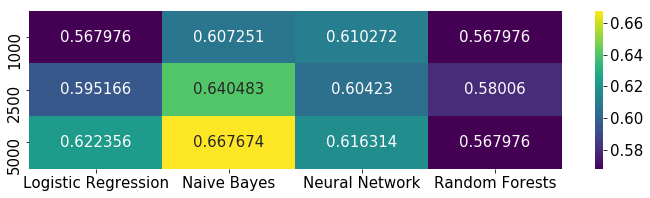

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


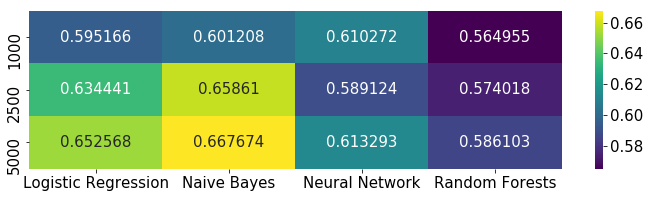

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


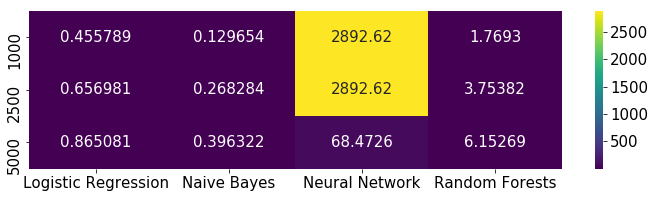

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


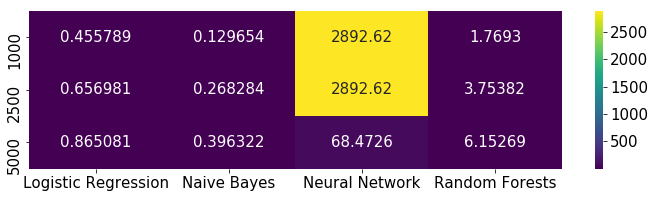

In [260]:
import seaborn as sns
from matplotlib import rcParams

rcParams.update({'figure.autolayout': True})

clfs = ['Logistic Regression', 'Naive Bayes', 'Neural Network', 'Random Forests']
fts = ['1000', '2500', '5000']

clf_ft = {}

for vec in ['cnt_vec', 'tfidf_vec']:
    for clf in clfs:
        ft_acc = {}
        for ft in fts:
            m = 0
            for key in d.keys():
                tmp = d[key][0]
                if clf in key and ft in key and tmp > m and vec in key:
                    m = tmp
            ft_acc.update({ft : m})
        clf_ft.update({clf : ft_acc})

    df = pd.DataFrame.from_dict(clf_ft)
    fig, ax = plt.subplots(figsize=(10,3))
    sns.heatmap(df, annot=True, fmt="g", cmap='viridis', ax=ax)
    plt.tight_layout()
    plt.savefig(vec +'_acc.jpg')
    plt.show()

clf_ft = {}
for vec in ['cnt_vec', 'tfidf_vec']:
    for clf in clfs:
        ft_time = {}
        for ft in fts:
            m = 0
            for key in d.keys():
                tmp = d[key][3]
                if clf in key and ft in key and tmp > m:
                    m = tmp
            ft_time.update({ft : m})
        clf_ft.update({clf : ft_time})

    df = pd.DataFrame.from_dict(clf_ft)
    fig, ax = plt.subplots(figsize=(10,3))
    sns.heatmap(df, annot=True, fmt="g", cmap='viridis', ax=ax)
    plt.tight_layout()
    plt.savefig(vec +'_time.jpg')
    plt.show()

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


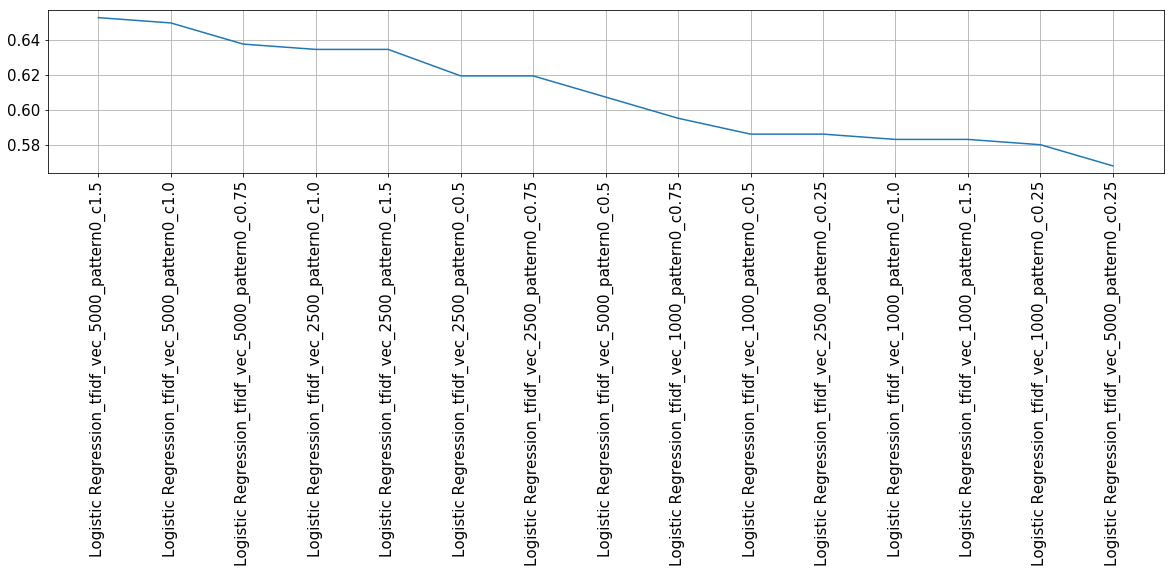

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


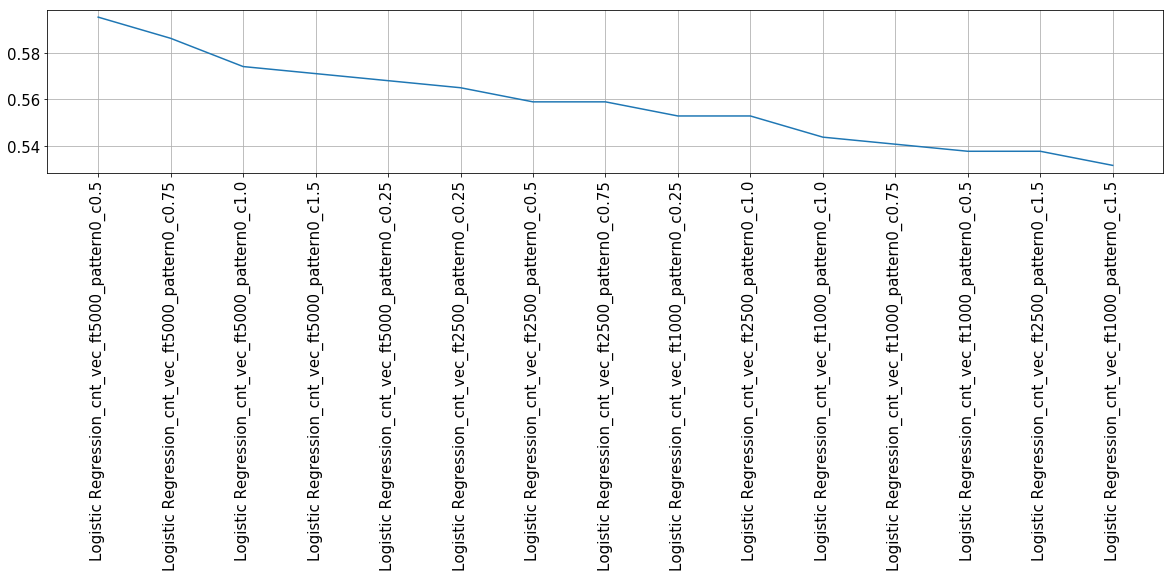

In [258]:
mydict = x_y_s[0]
mydict = sorted(mydict.items(), key = itemgetter(1), reverse = True)

ks1, vals1, ks2, vals2 = [], [], [], []
for item in mydict:
    if 'tfidf' in item[0]:
        ks1.append(item[0])
        vals1.append(item[1])
    else:
        ks2.append(item[0])
        vals2.append(item[1])

plt.clf()
plt.figure(figsize=(20,3))
plt.grid(True)
plt.xticks([i for i in range(len(ks1))], ks1, rotation=90)
plt.plot(vals1)
plt.savefig('tfidf.png', bbox_inches = "tight")
plt.show()    

plt.clf()
plt.figure(figsize=(20,3))
plt.grid(True)
plt.xticks([i for i in range(len(ks2))], ks2, rotation=90)
plt.plot(vals2)
plt.savefig('cnt.png', bbox_inches = "tight")
plt.show()

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


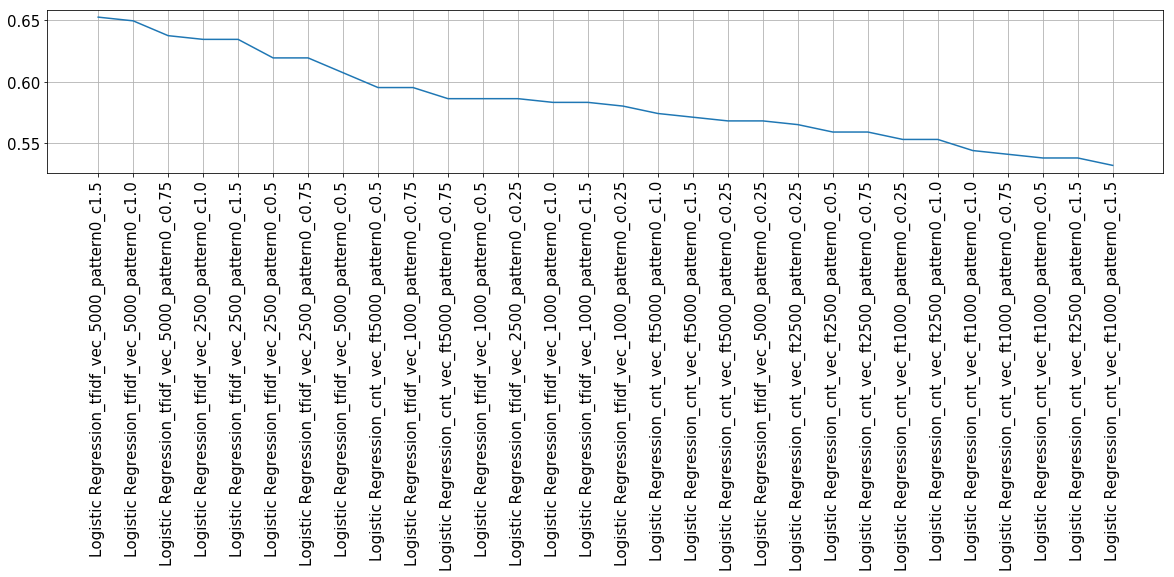

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


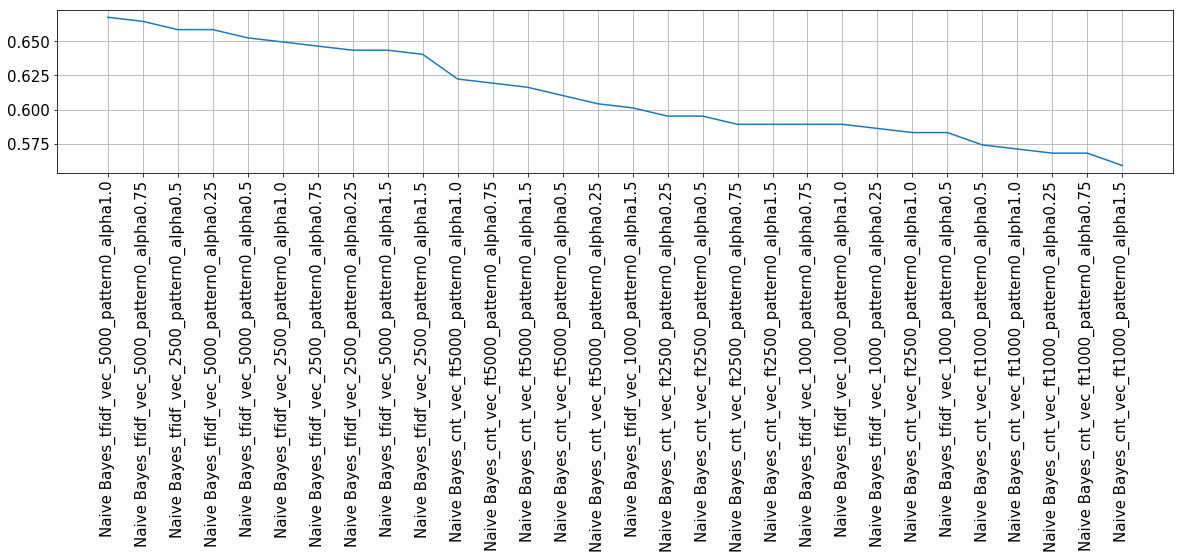

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


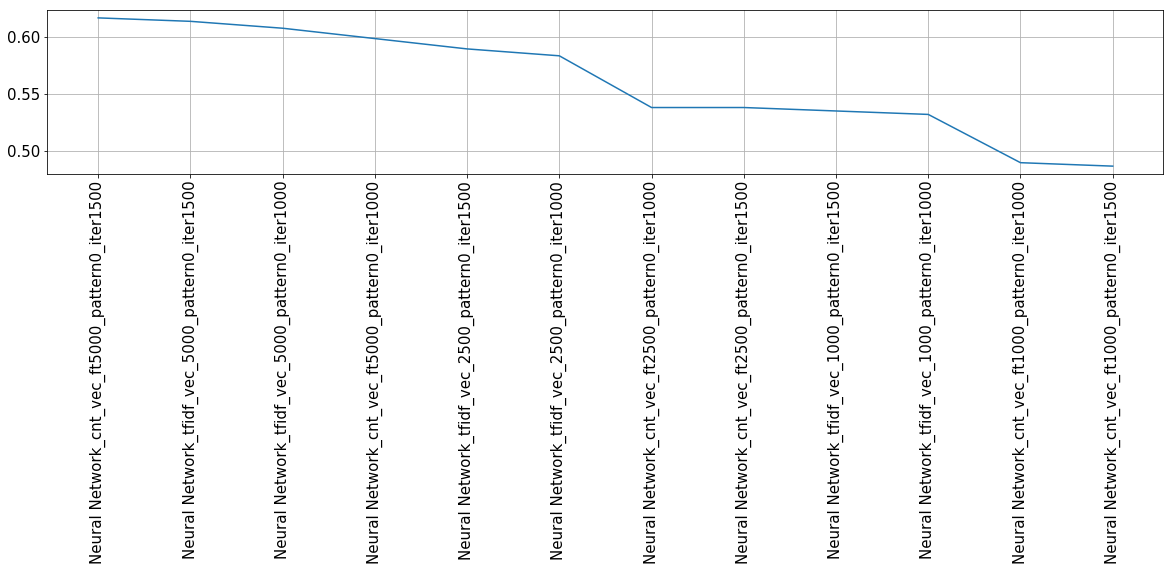

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


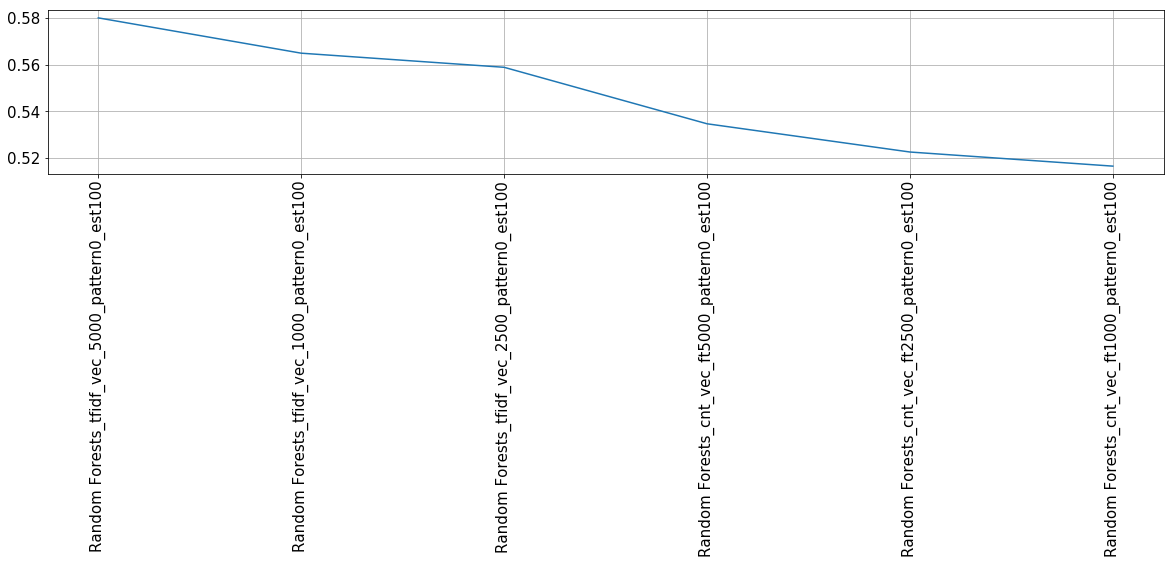

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


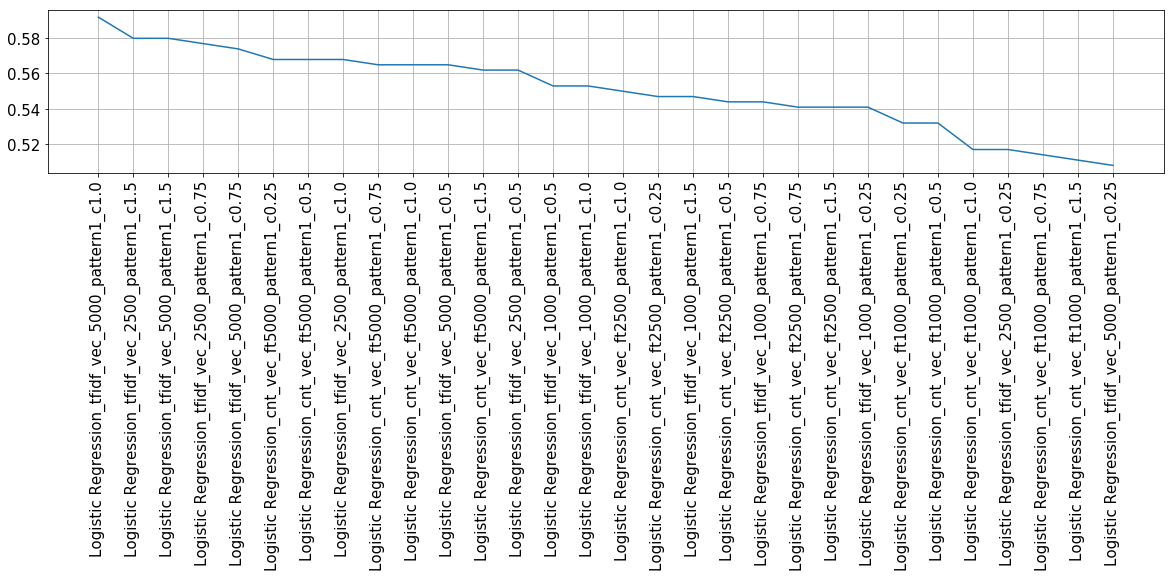

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


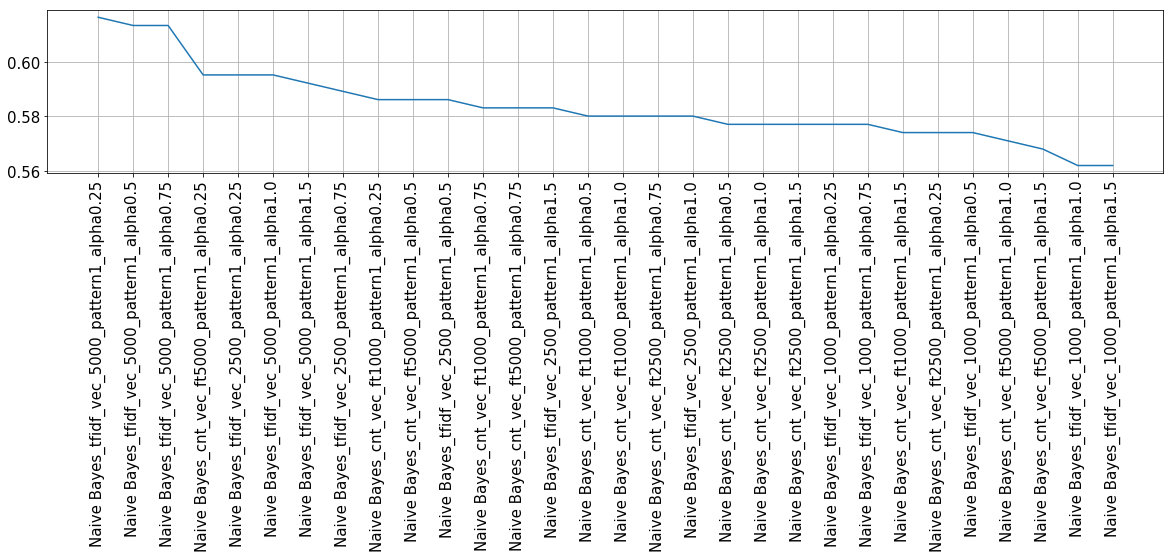

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


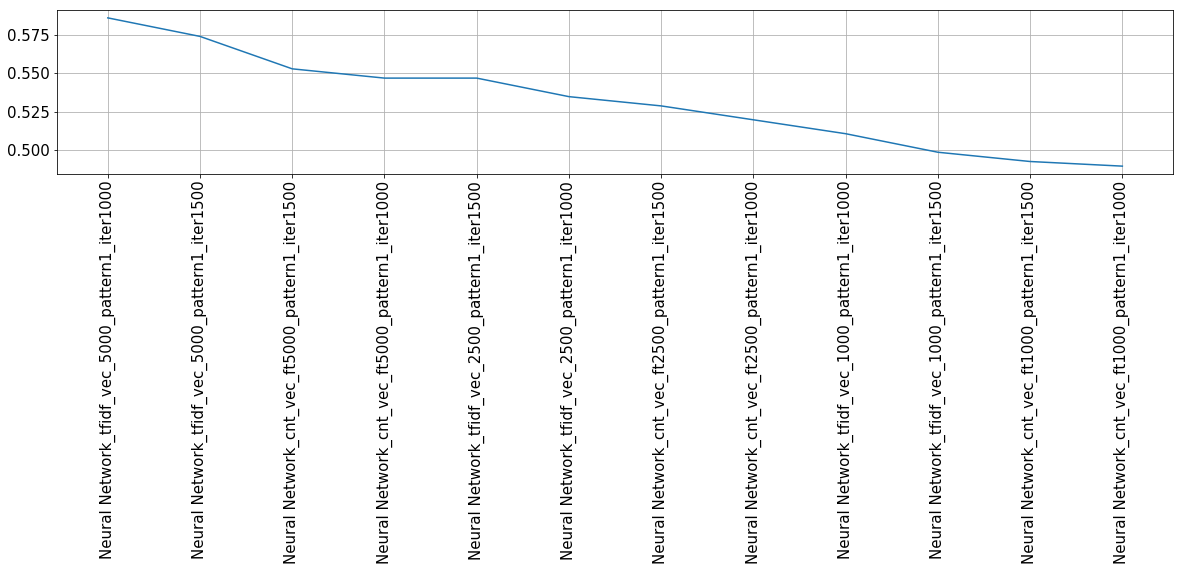

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


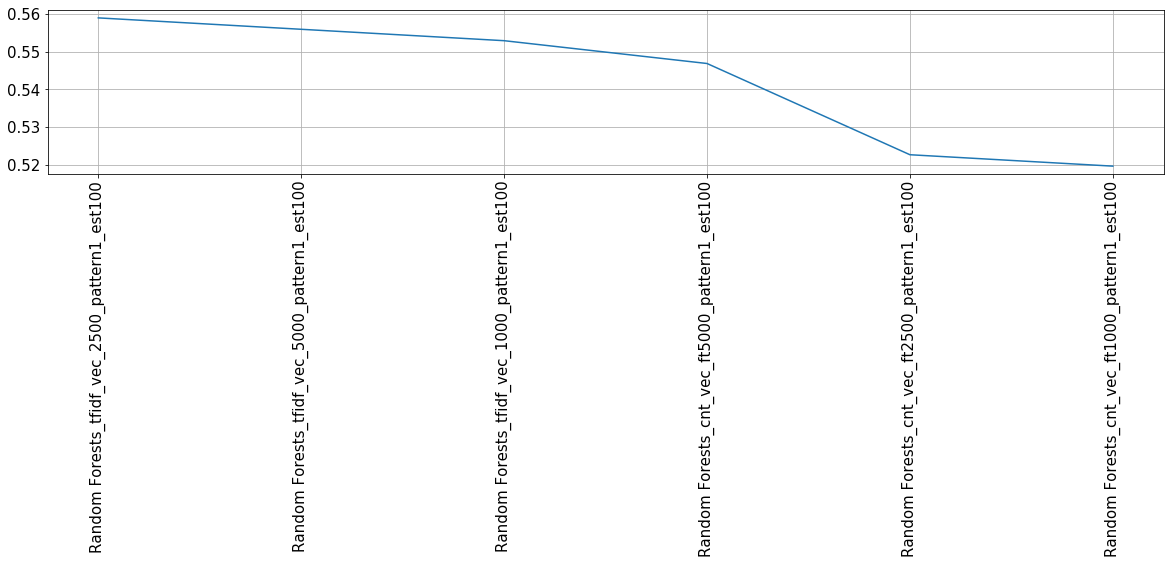

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


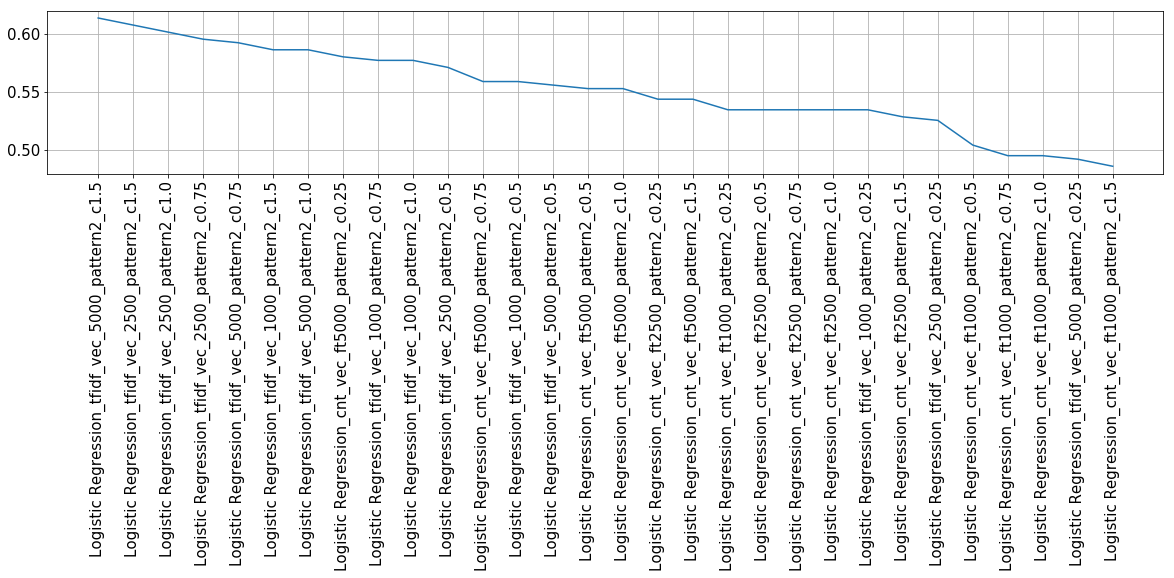

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


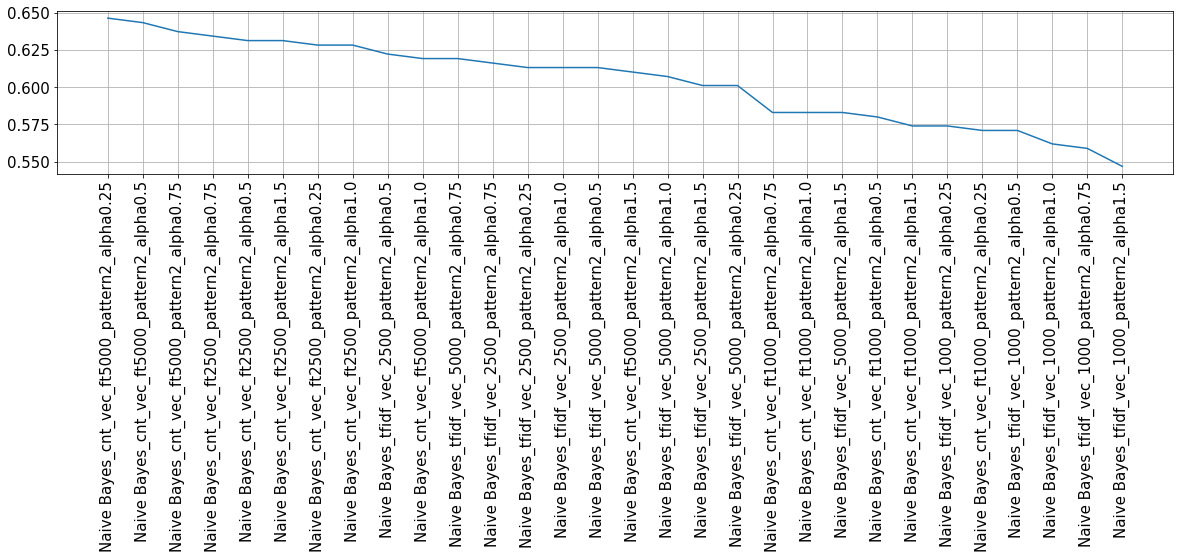

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


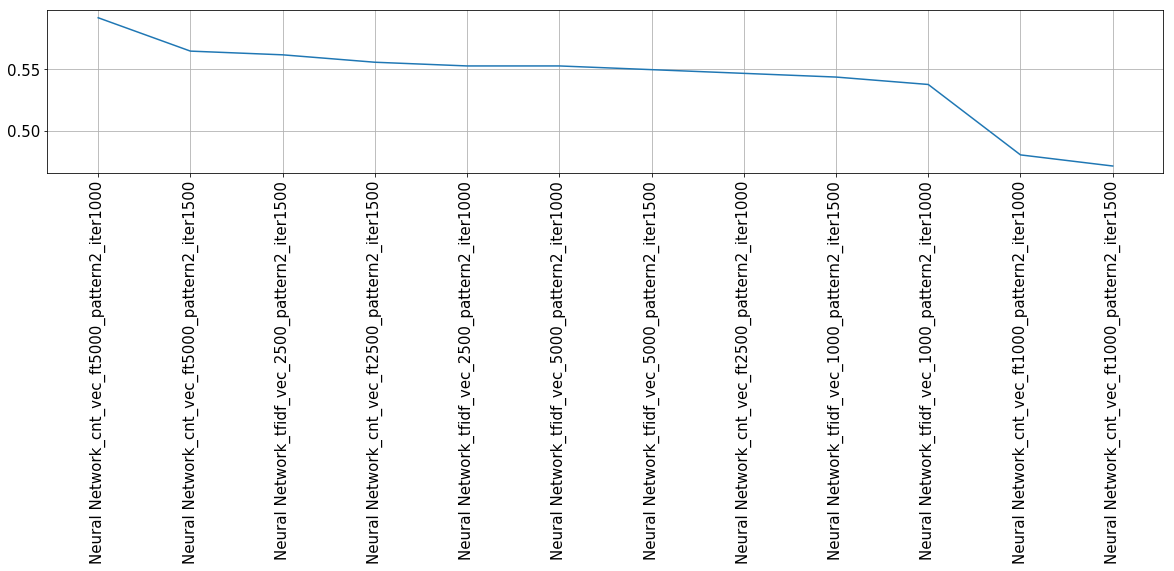

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


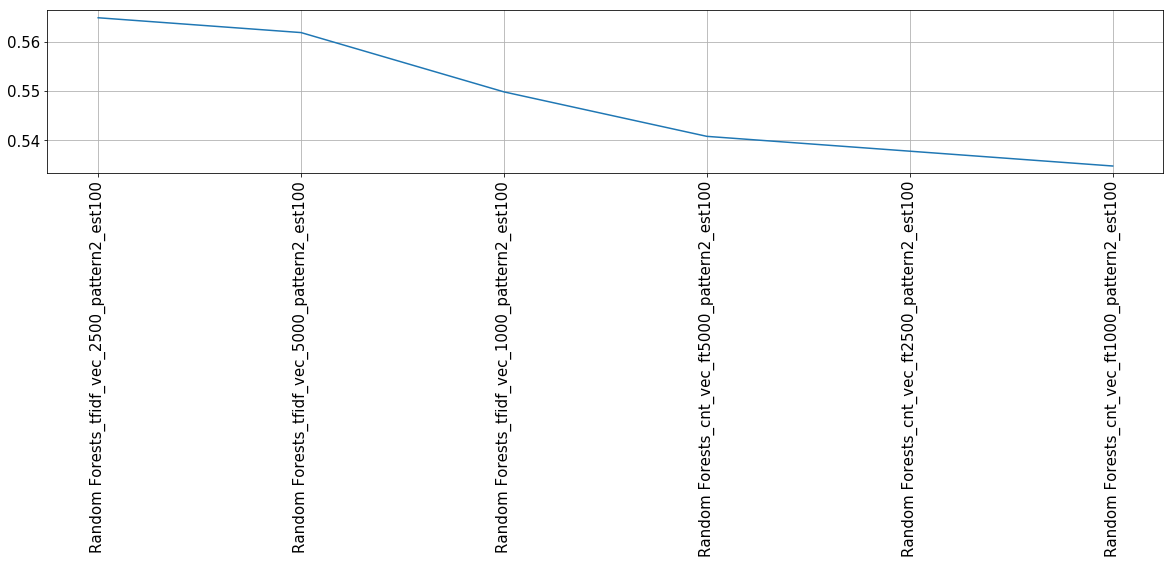

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


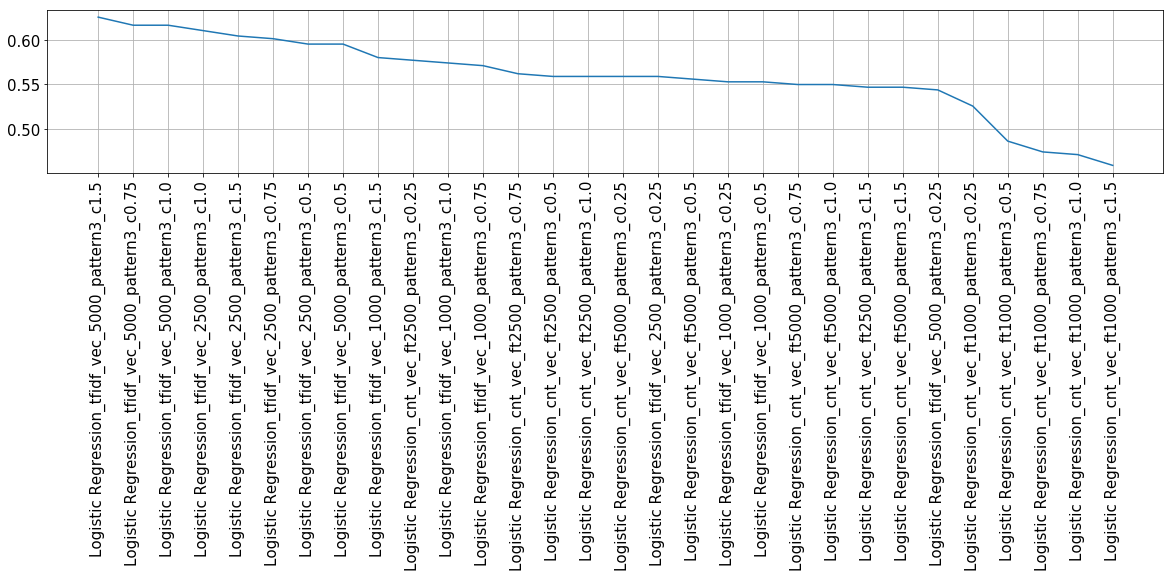

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


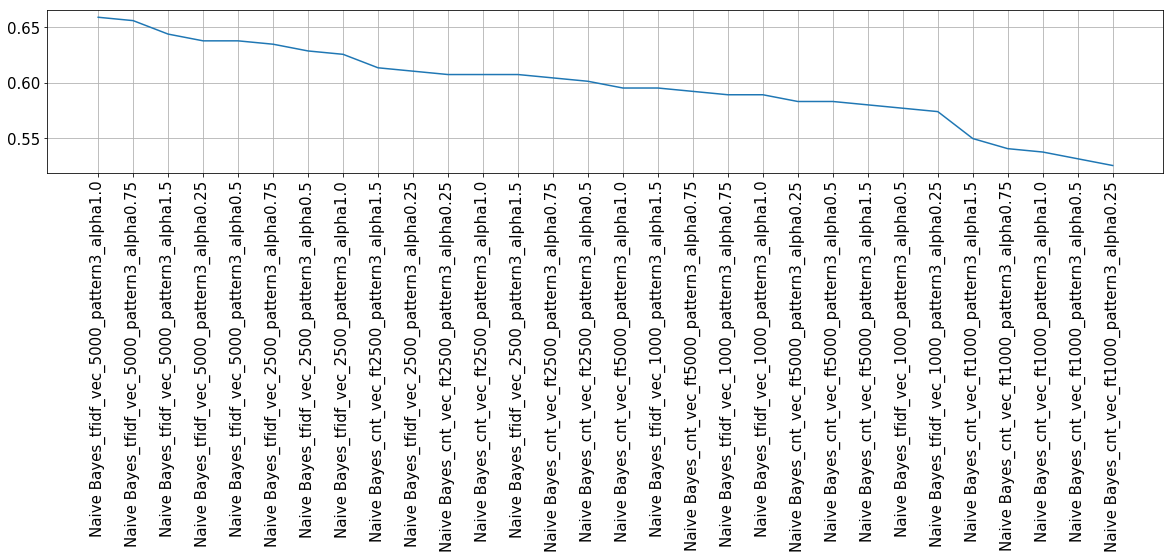

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


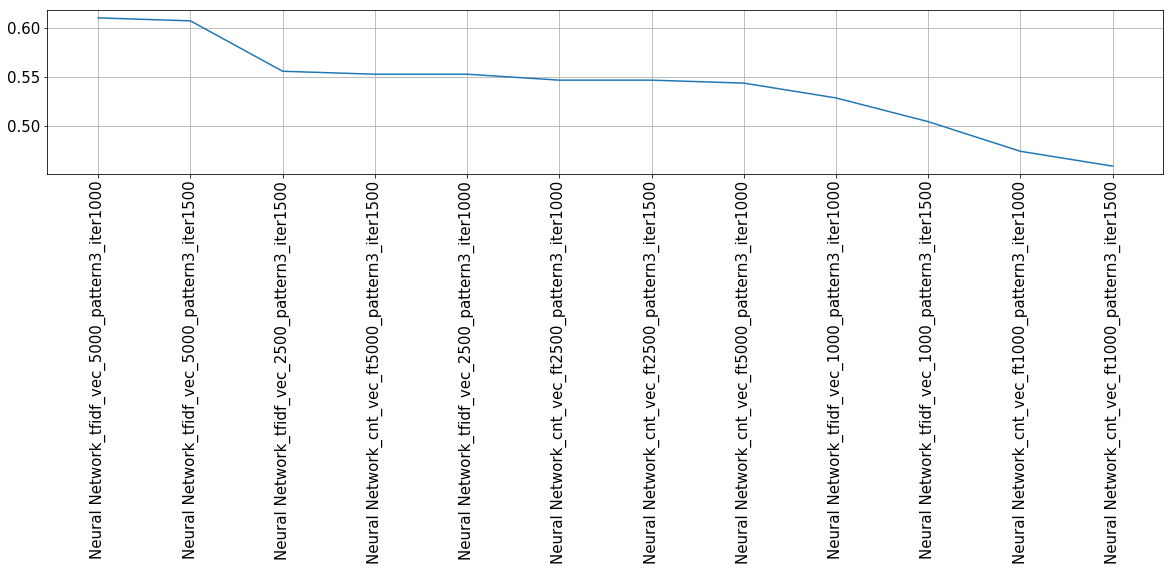

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


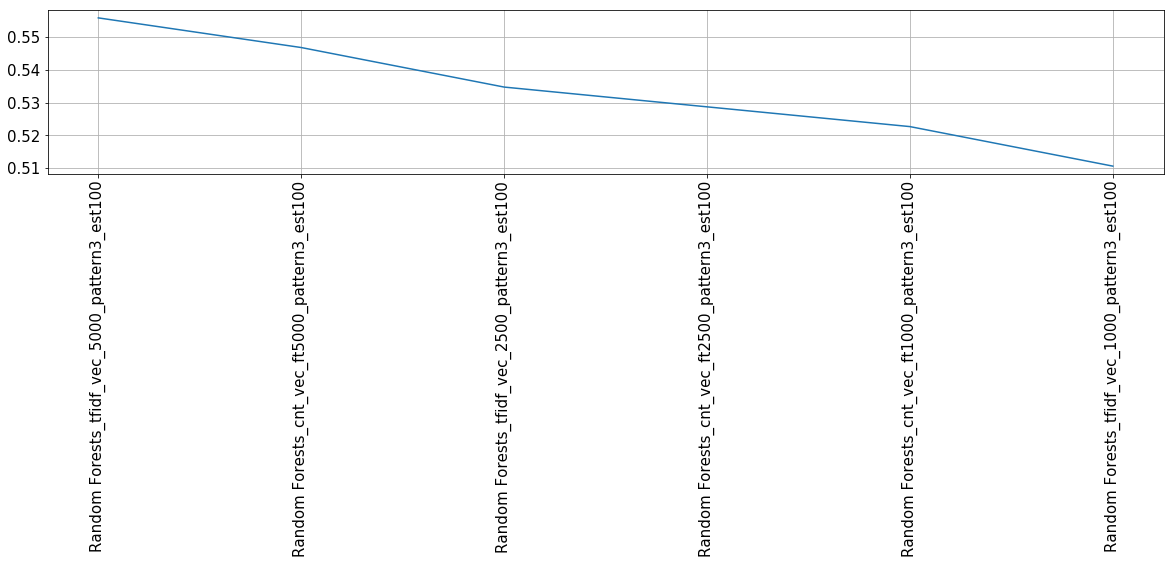

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


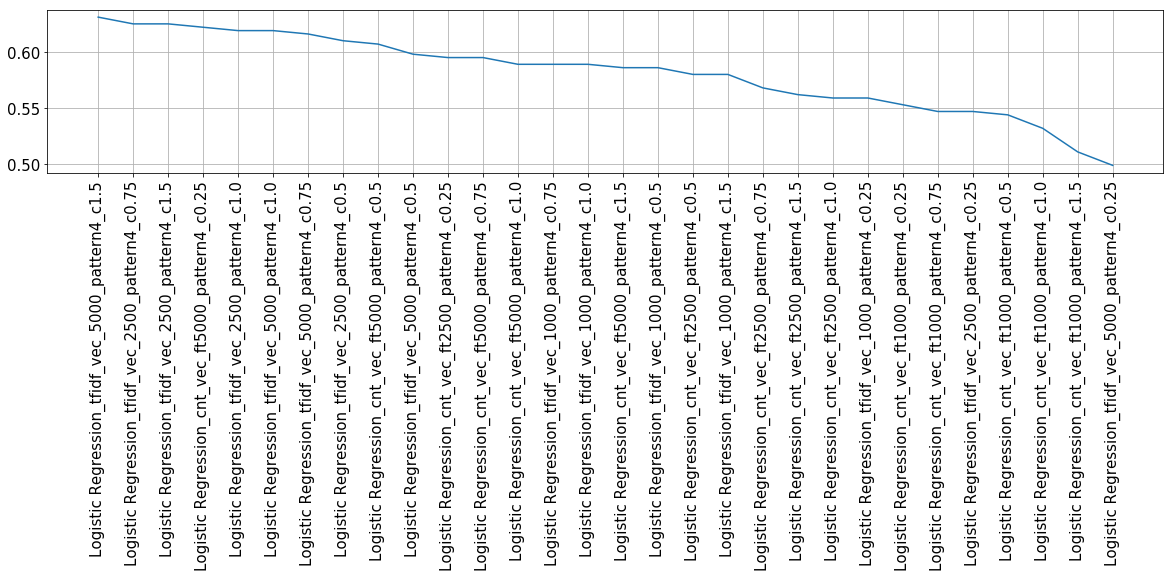

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


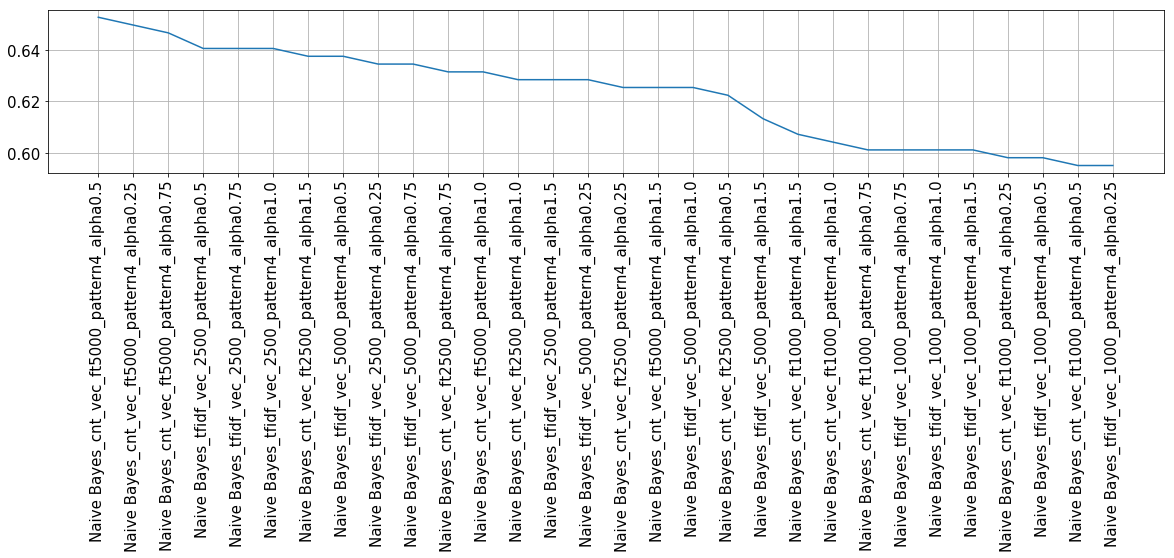

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


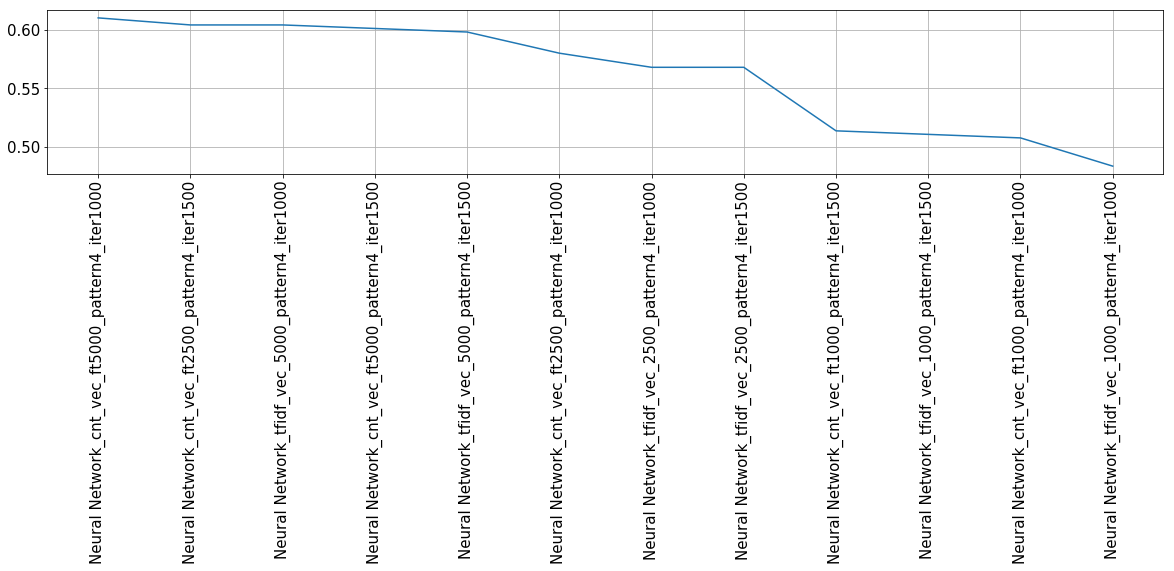

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


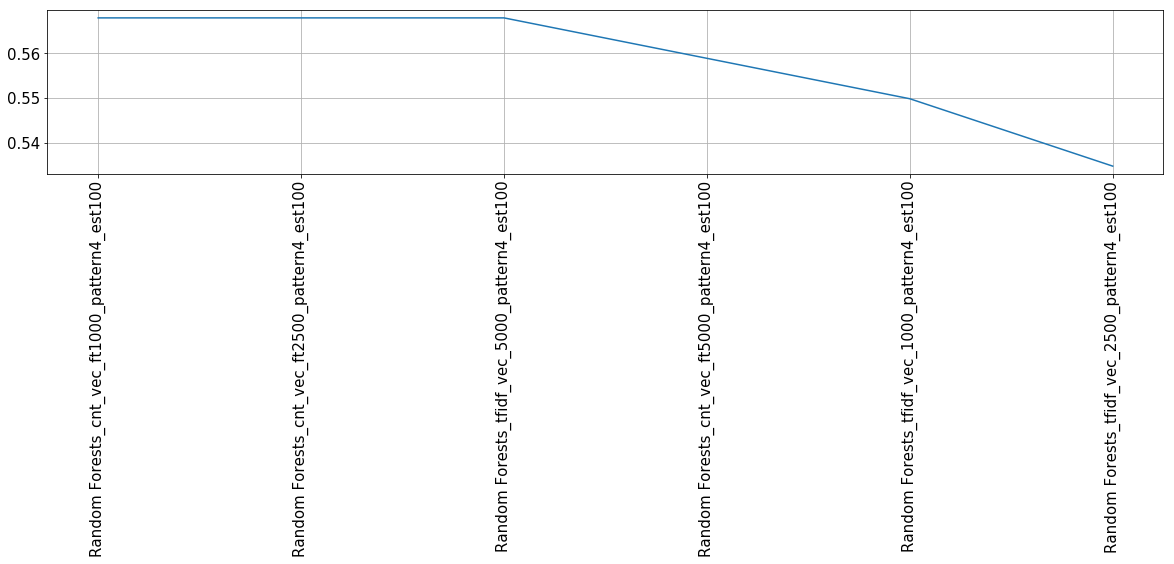

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


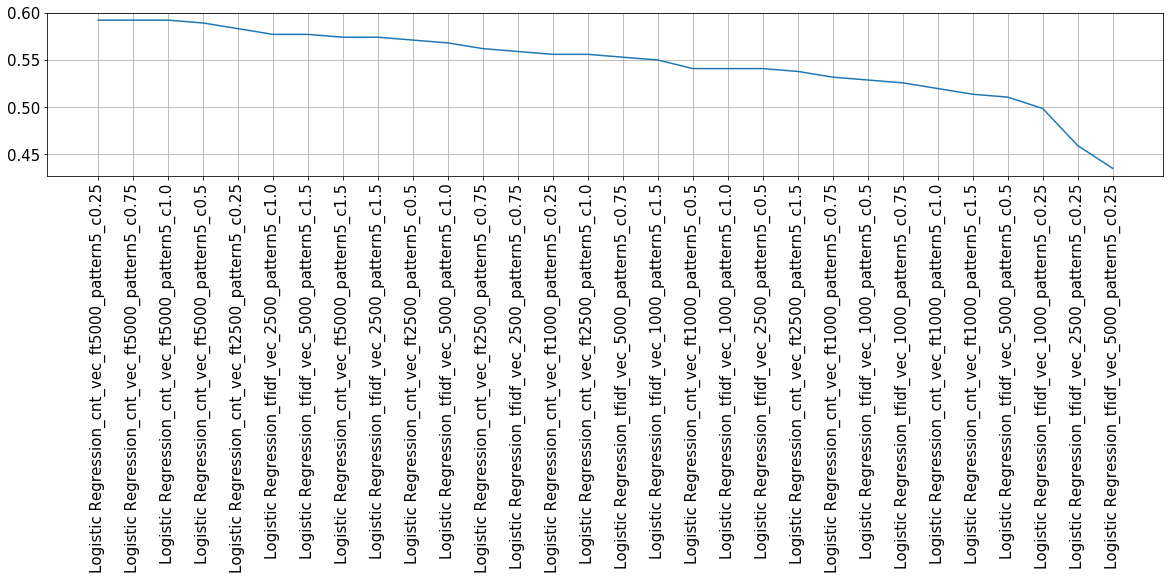

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


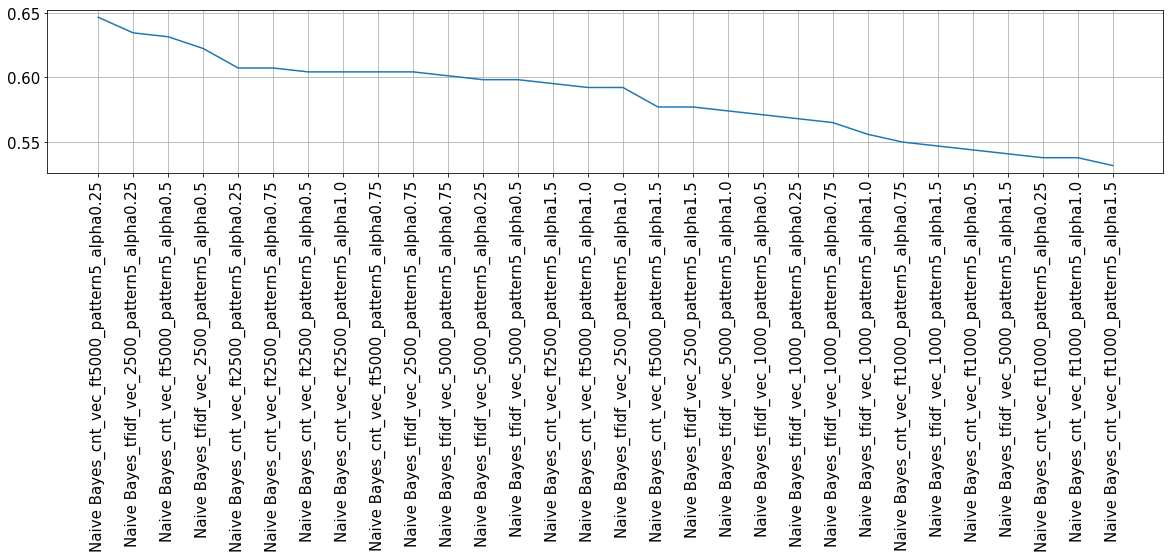

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


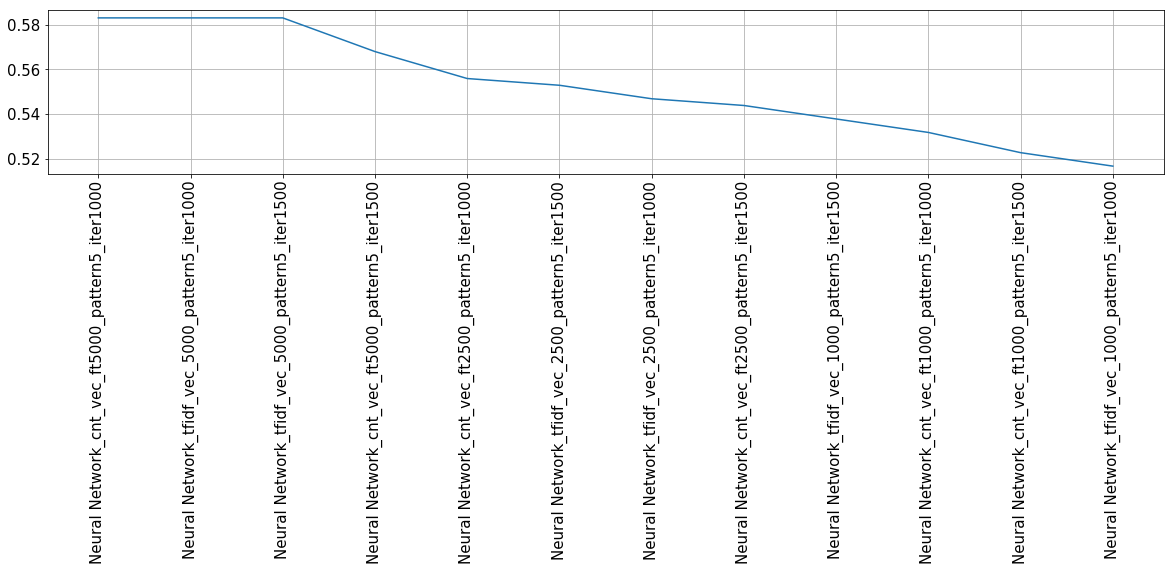

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


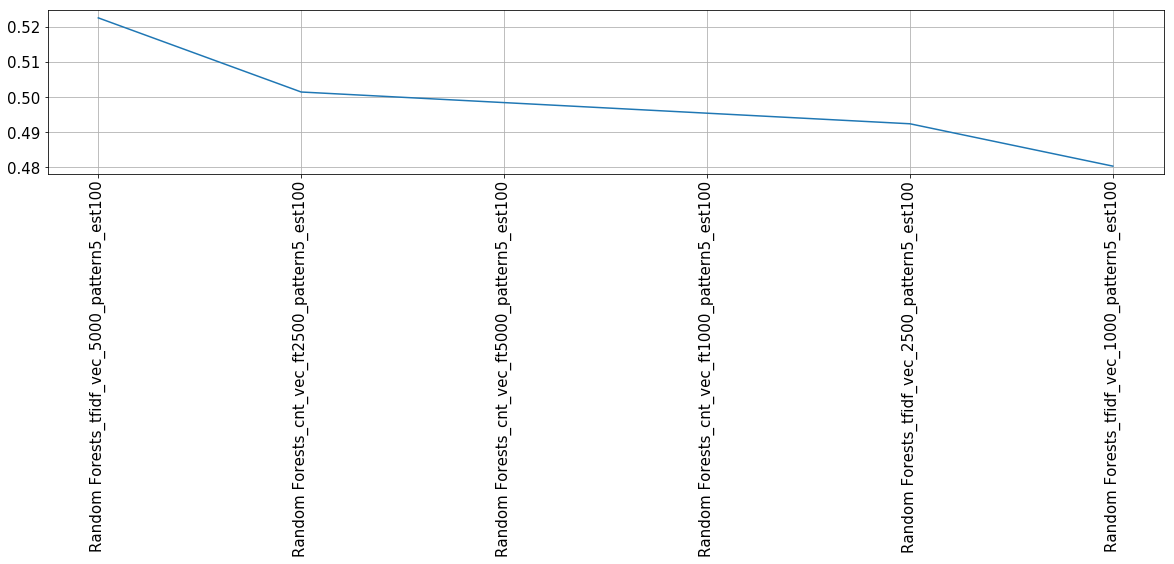

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


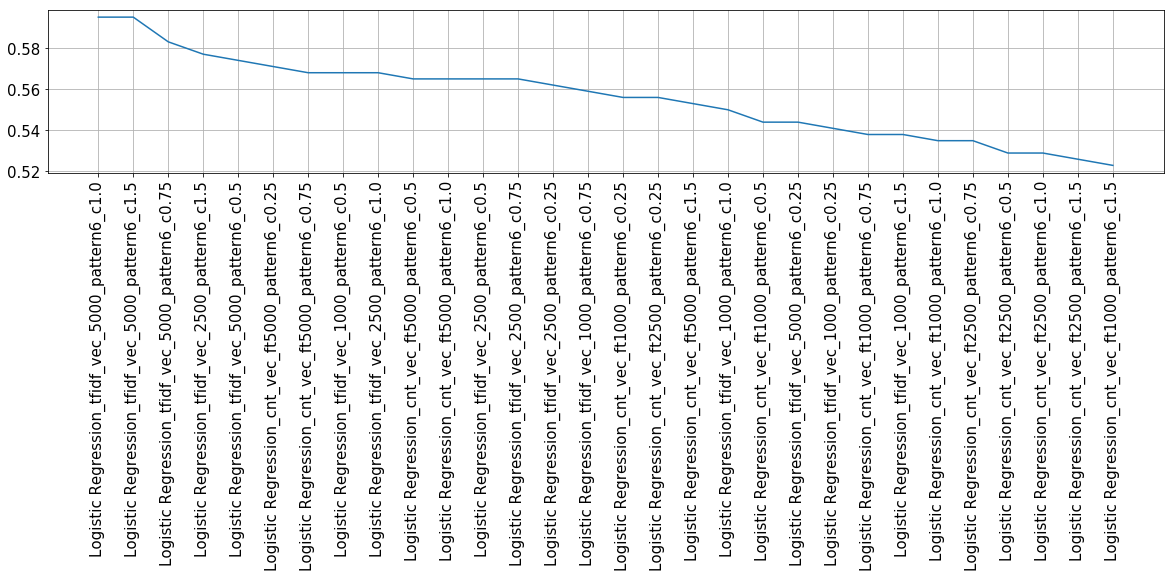

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


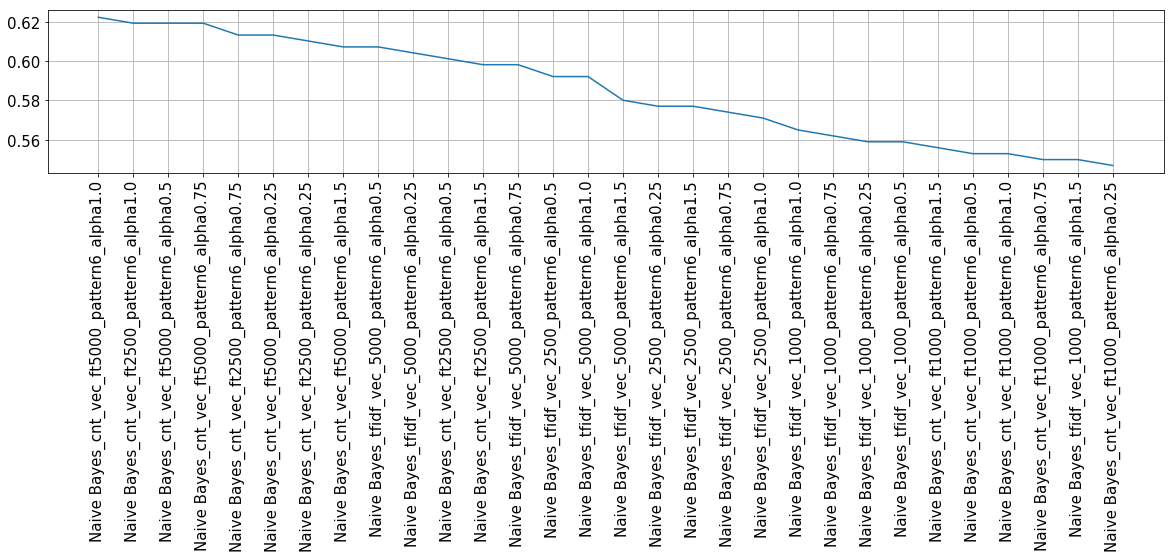

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


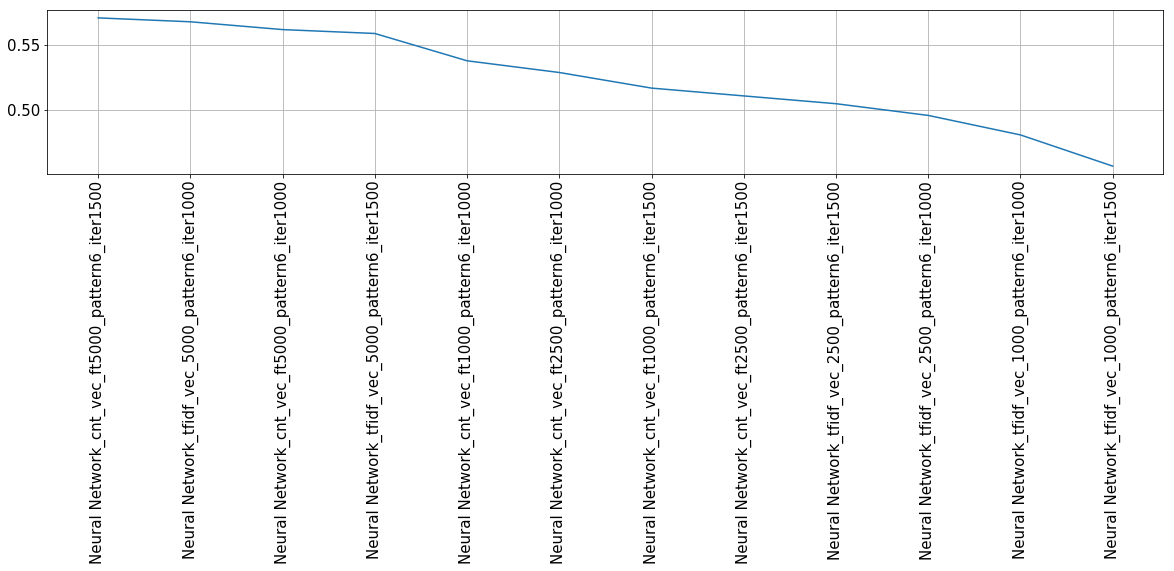

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


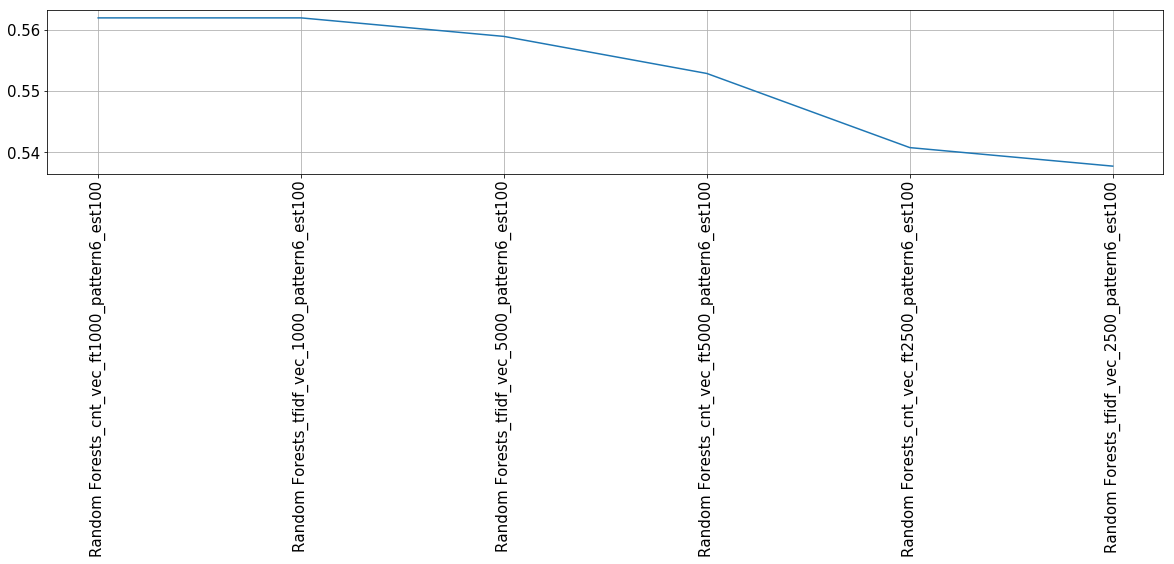

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


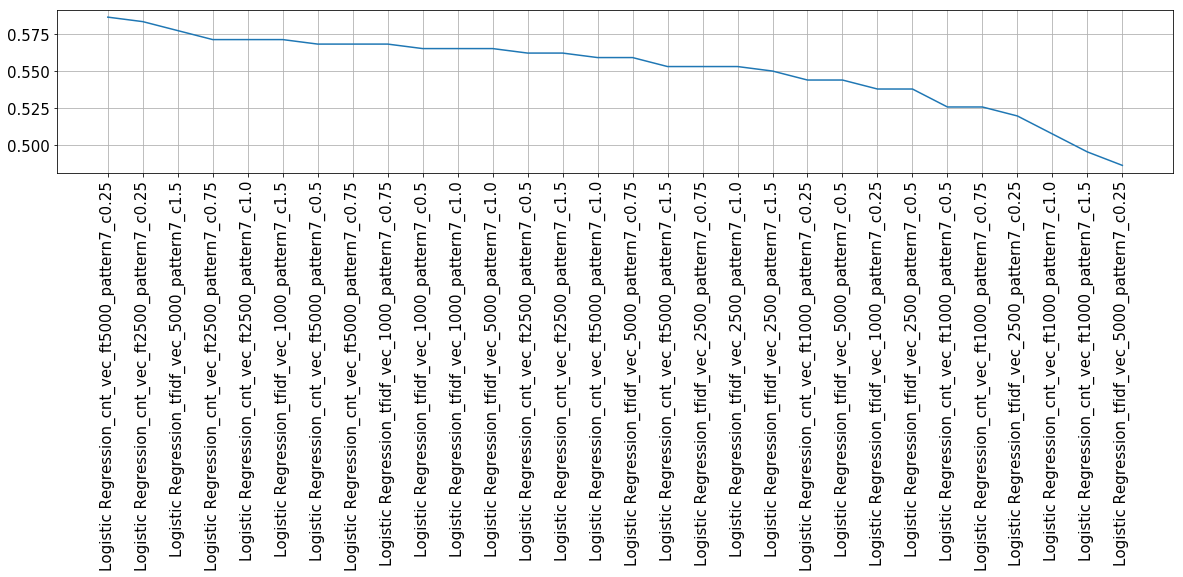

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


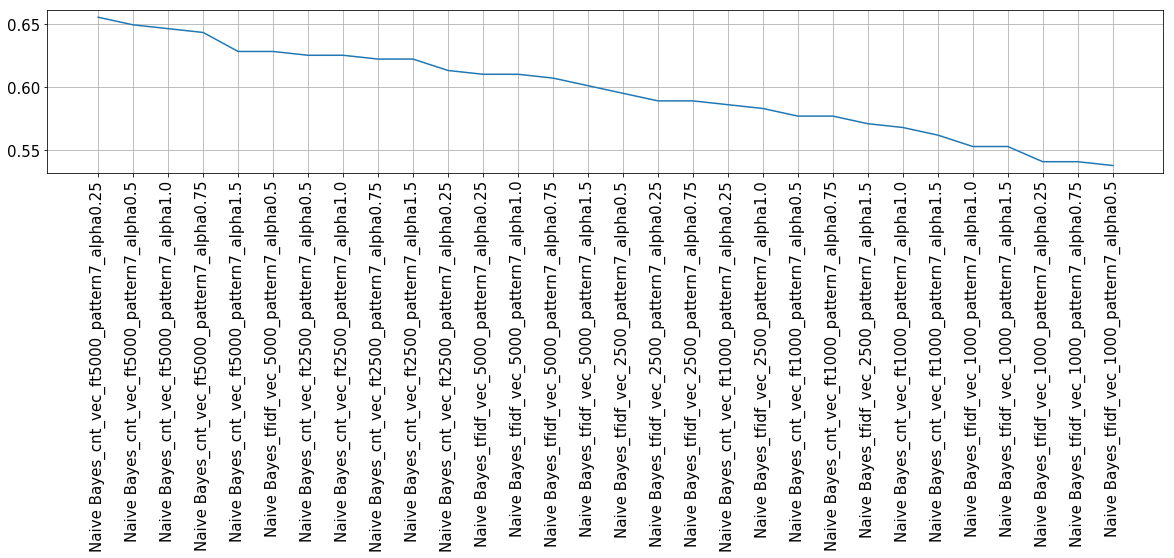

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


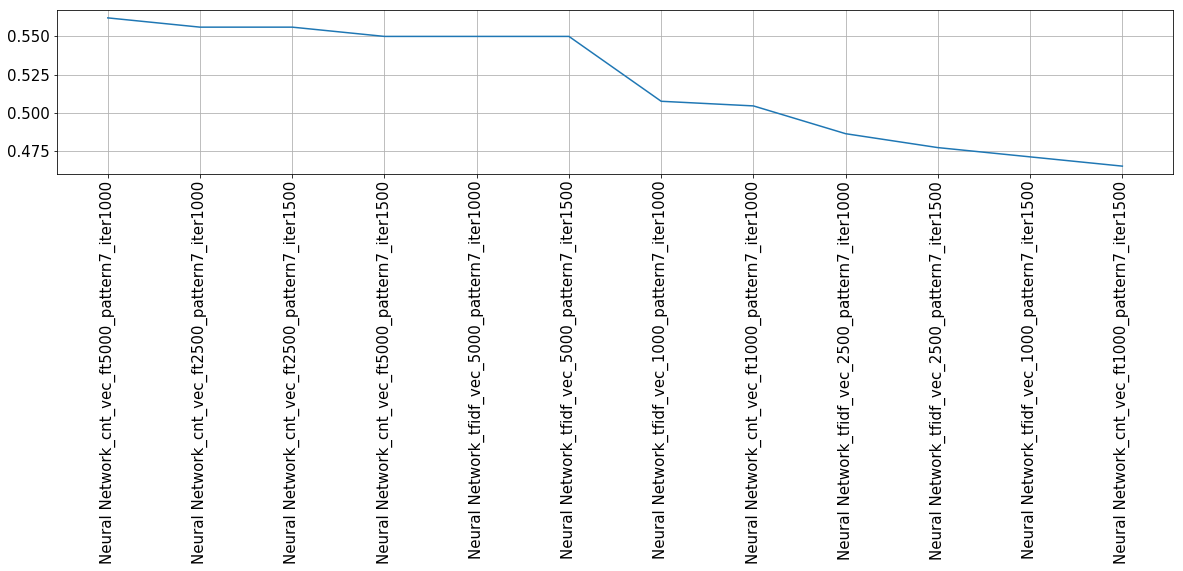

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


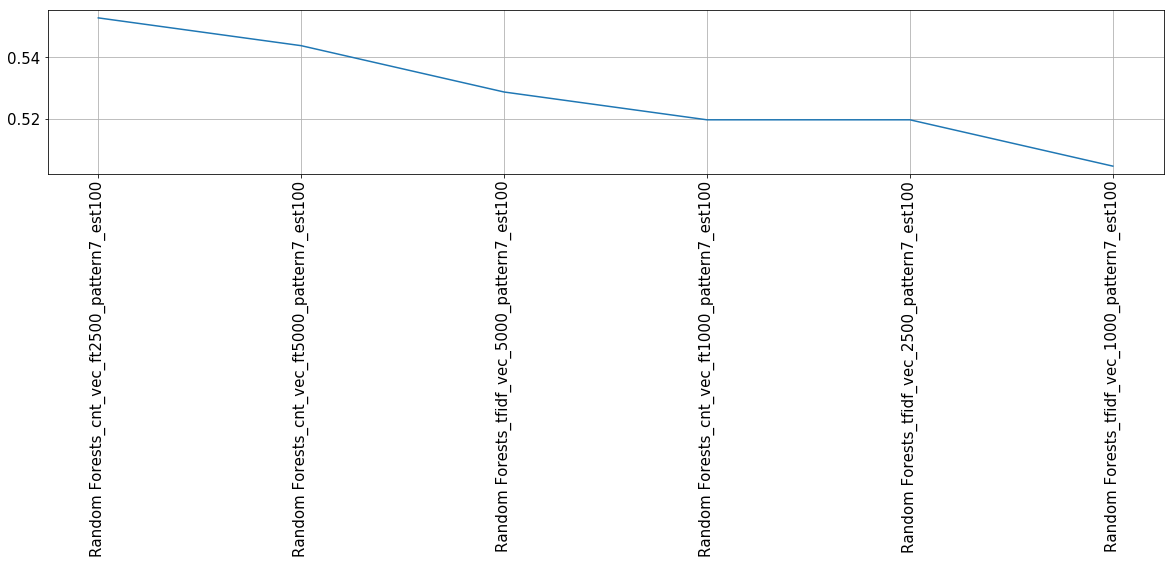

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


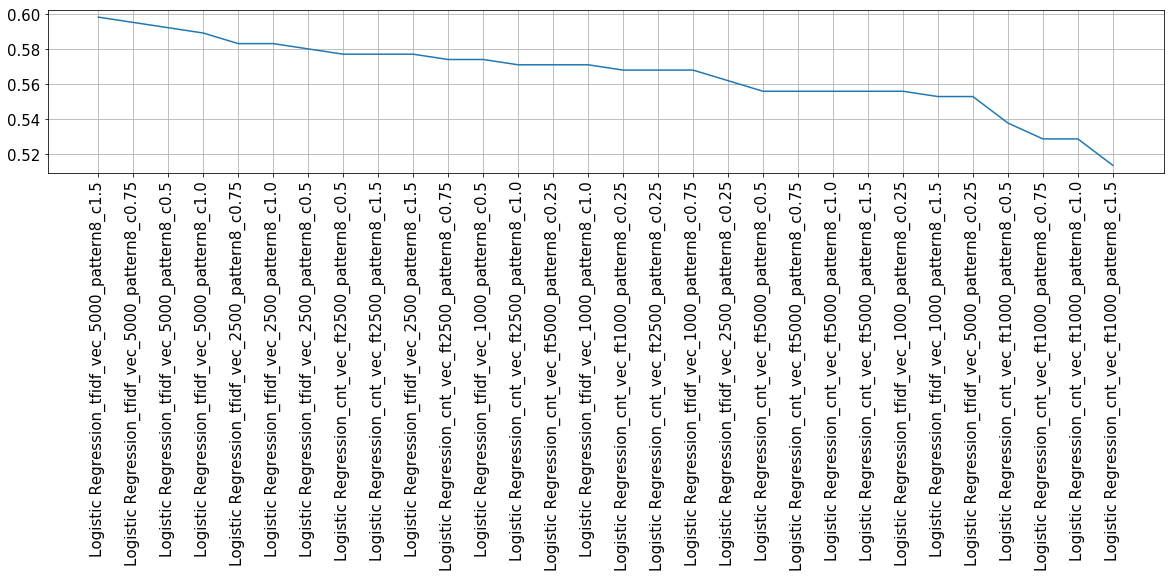

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


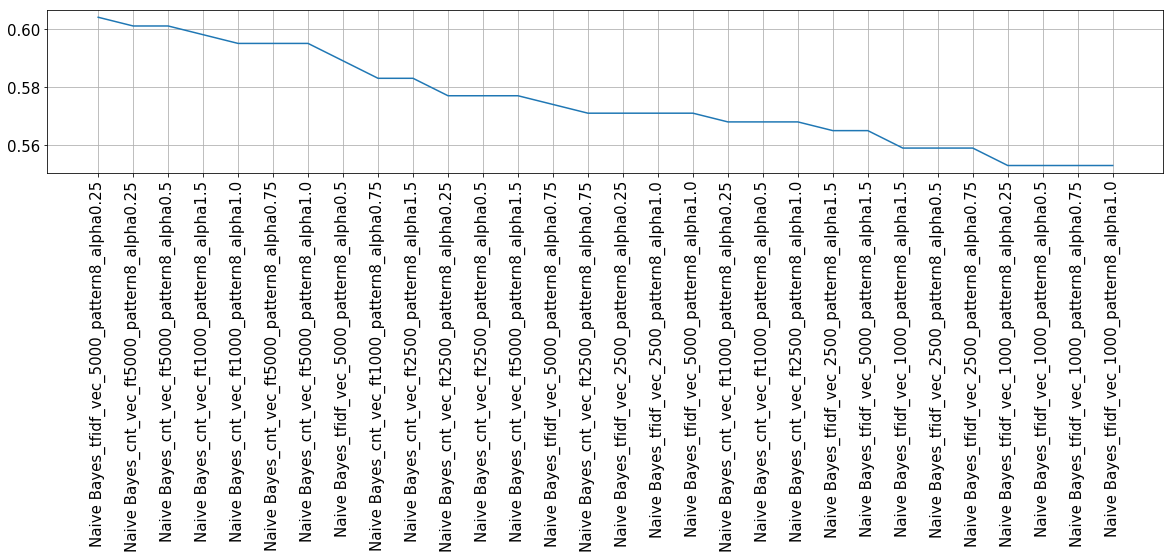

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


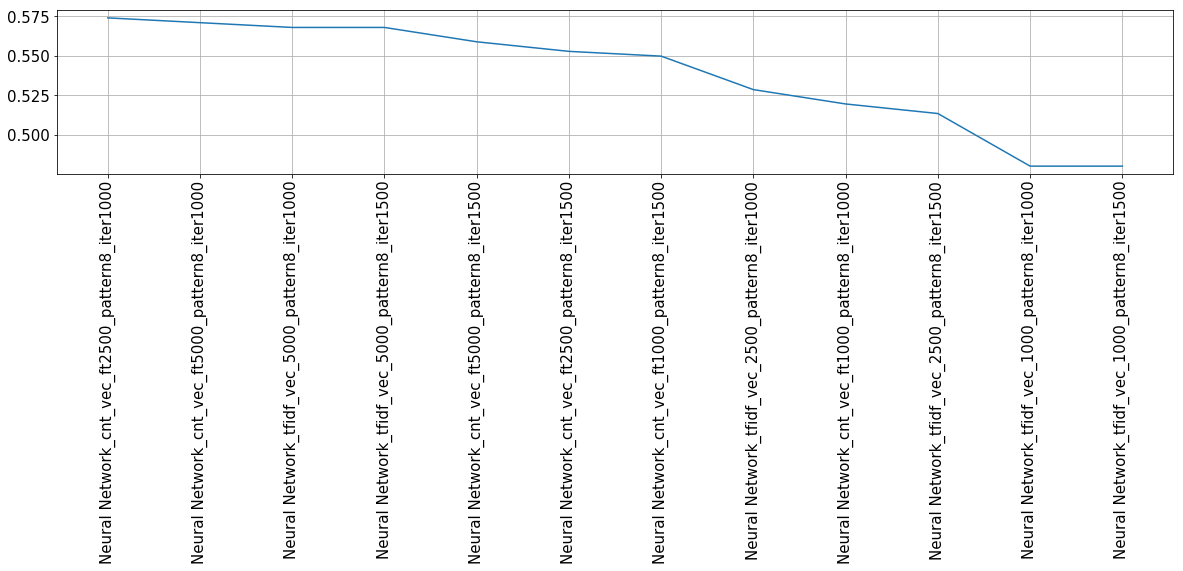

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


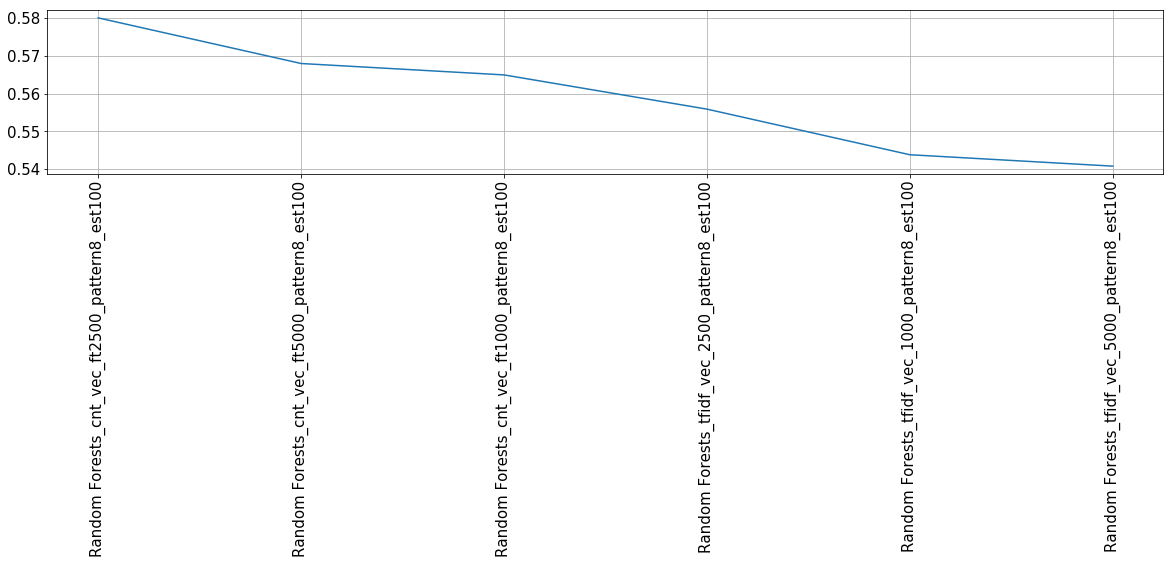

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


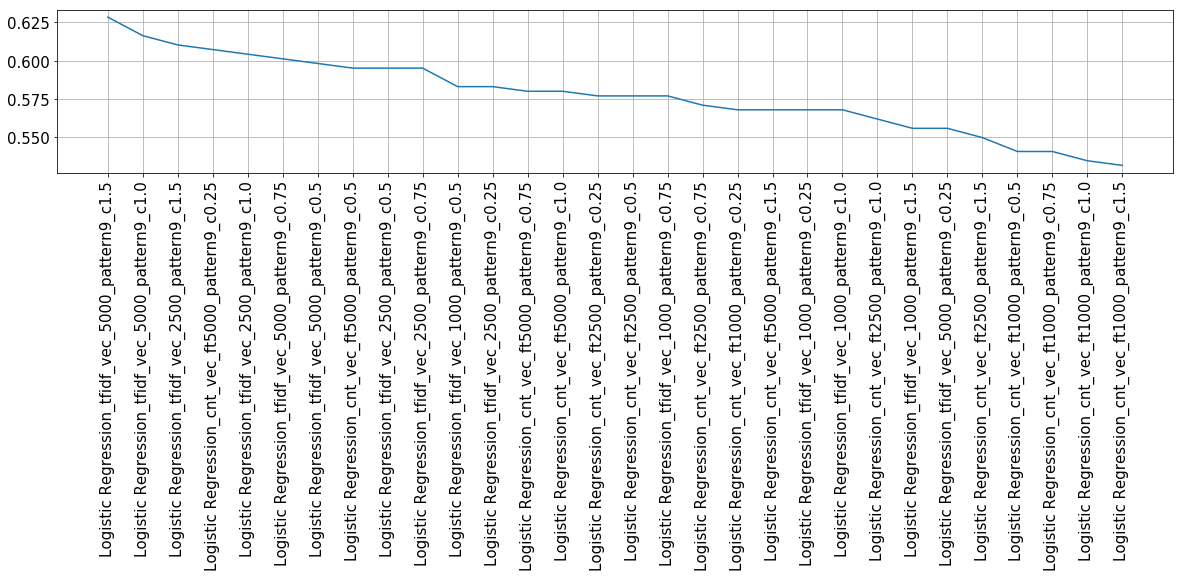

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


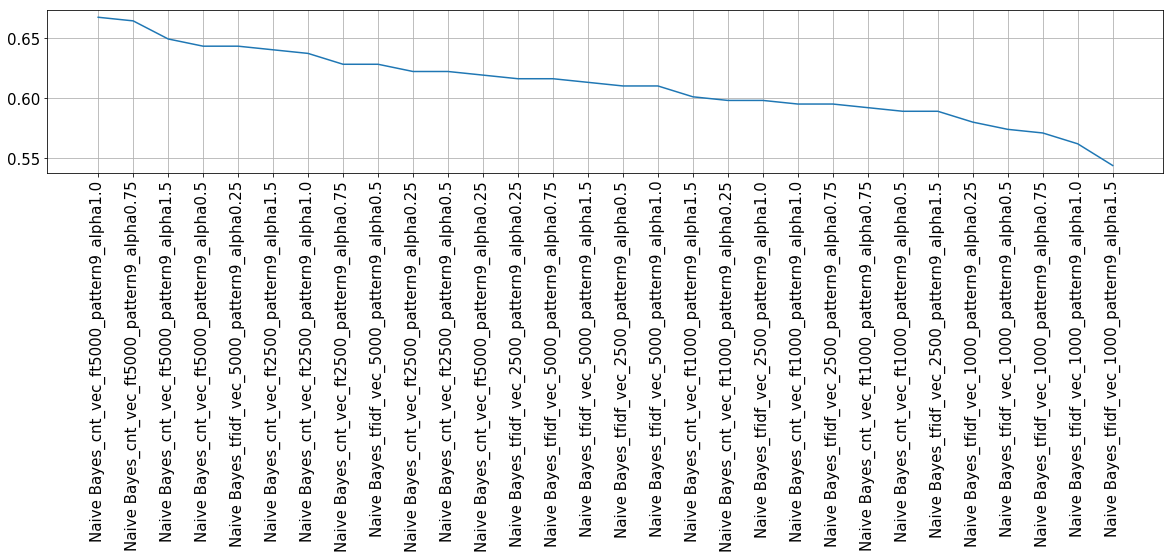

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


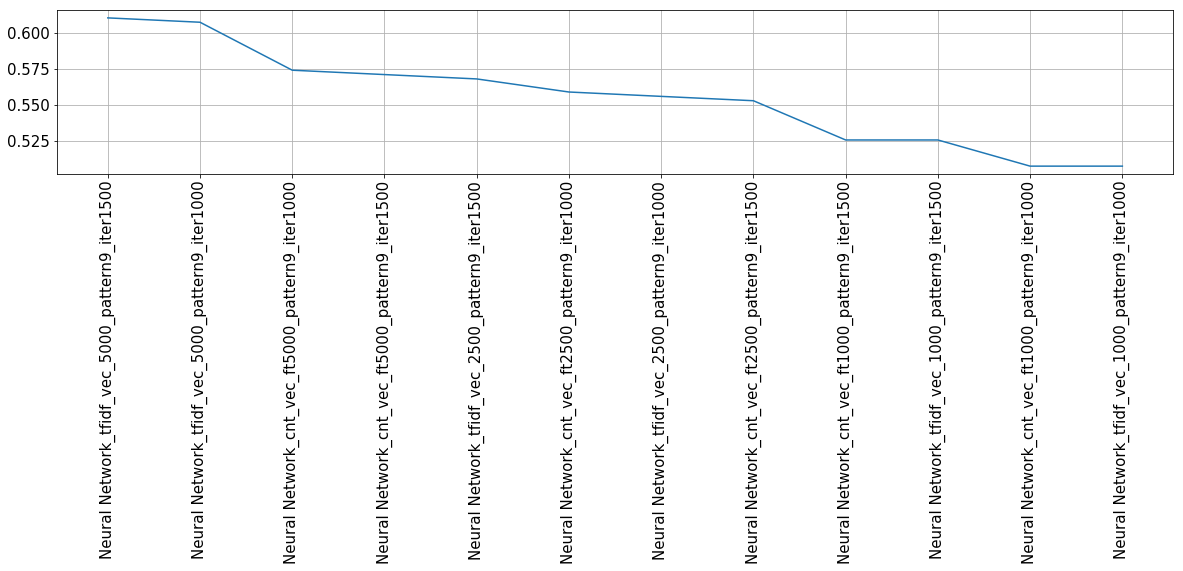

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

C:\Users\ivans\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


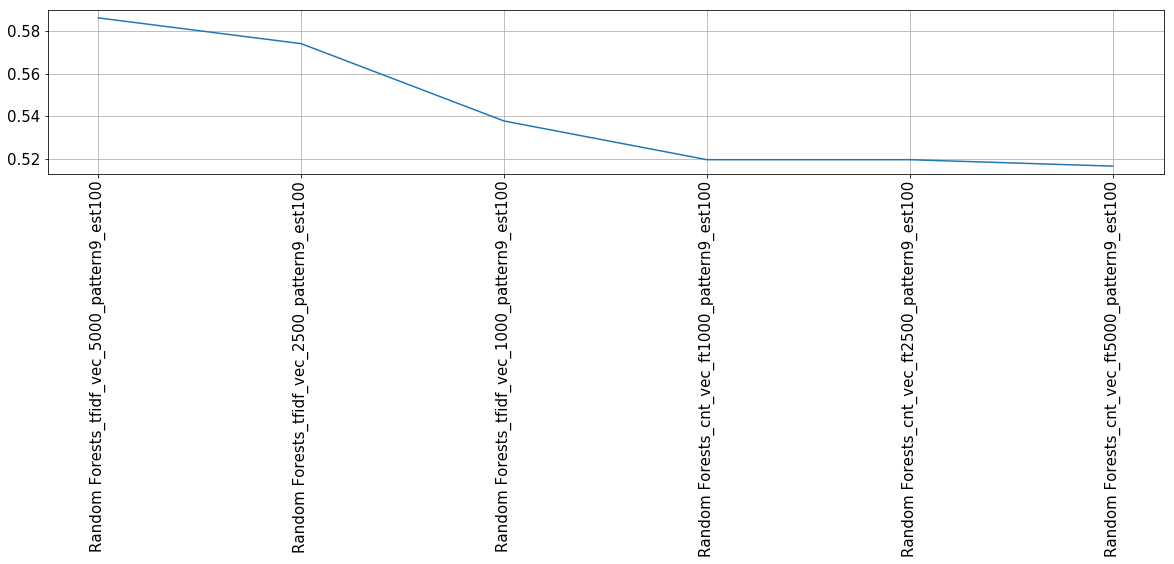

In [259]:
from operator import itemgetter

x_y_s = []

for p in range(len(patterns)):
    for clf in clfs:
        x_y = {}
        for key in d.keys():
            if clf in key and 'pattern'+str(p) in key:
                x_y.update({key : d[key][0]})
        x_y_s.append(x_y)

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

for mydict in x_y_s:
    mydict = sorted(mydict.items(), key = itemgetter(1), reverse = True)
    
    keys = [item[0] for item in mydict]
    values = [item[1] for item in mydict]
    
    plt.clf()
    plt.figure(figsize=(20,3))
    plt.grid(True)
    plt.xticks([i for i in range(len(keys))], keys, rotation=90)
    plt.plot(values)
    plt.savefig(keys[0].split('_')[4] +'.png', bbox_inches = "tight")
    plt.show()